## Imports

In [80]:
# Imports

#General
import numpy as np
import itertools

# System
import os, fnmatch

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

## Auxiliary Functions

In [61]:
# Function to Display a Website
def show_web(url):
    html_code='<center><iframe src="%s" width="800" height="600" frameborder="0" marginheight="0" marginwidth="0">Loading...</iframe></center>' \
		% (url)
    display(HTML(html_code))

## Dataset

## Get filenames

In [81]:
# Get files in data path
path='./audio/'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 3423 audio files in ./audio/


## Prepare labels from filenames

In [82]:
# Get Labels
labels =[]
classes=['cel','cla','flu', 'gac','gel','org']
color_dict={'cel':'blue', 'cla':'red', 'flu':'green', 'gac':'black', 'gel':'magenta', 'org': "white "}
color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

## Encode Labels

In [83]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

6 classes: cel, cla, flu, gac, gel, org


## Parameters for MFCC

In [84]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

## Function to Calculate Audio Features: MFCC

In [85]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

## Load audio files, calculate features and create feature vectors

In [86]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 3423 = ./audio/cel\008__[cel][nod][cla]0058__1.wav
get 2 of 3423 = ./audio/cel\008__[cel][nod][cla]0058__2.wav
get 3 of 3423 = ./audio/cel\008__[cel][nod][cla]0058__3.wav
get 4 of 3423 = ./audio/cel\012__[cel][nod][cla]0043__1.wav
get 5 of 3423 = ./audio/cel\012__[cel][nod][cla]0043__2.wav
get 6 of 3423 = ./audio/cel\012__[cel][nod][cla]0043__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.01 ... -0.12 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.02 ... -0.09 -0.05 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.08 ...  0.29  0.26  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.01 -0.03 ...  0.06  0.0

get 7 of 3423 = ./audio/cel\013__[cel][nod][cla]0025__1.wav
get 8 of 3423 = ./audio/cel\013__[cel][nod][cla]0025__2.wav
get 9 of 3423 = ./audio/cel\013__[cel][nod][cla]0025__3.wav
get 10 of 3423 = ./audio/cel\014__[cel][nod][cla]0041__1.wav
get 11 of 3423 = ./audio/cel\014__[cel][nod][cla]0041__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.12  0.12 ... -0.07 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.15 0.11 ... 0.07 0.06 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.37 0.35 0.31 ... 0.43 0.47 0.49] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.04  0.02 ... -0.34 -0.31 -0.29] as 

get 12 of 3423 = ./audio/cel\014__[cel][nod][cla]0041__3.wav
get 13 of 3423 = ./audio/cel\027__[cel][nod][cla]0027__1.wav
get 14 of 3423 = ./audio/cel\027__[cel][nod][cla]0027__2.wav
get 15 of 3423 = ./audio/cel\027__[cel][nod][cla]0027__3.wav
get 16 of 3423 = ./audio/cel\031__[cel][nod][cla]0020__1.wav
get 17 of 3423 = ./audio/cel\031__[cel][nod][cla]0020__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.2  -0.18 ... -0.2  -0.18 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.02 ... 0.19 0.13 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.28 0.28 ... 0.23 0.21 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.05 -0.08 ...  0.21  0.23  0.24] as 

get 18 of 3423 = ./audio/cel\031__[cel][nod][cla]0020__3.wav
get 19 of 3423 = ./audio/cel\032__[cel][nod][cla]0033__1.wav
get 20 of 3423 = ./audio/cel\032__[cel][nod][cla]0033__2.wav
get 21 of 3423 = ./audio/cel\032__[cel][nod][cla]0033__3.wav
get 22 of 3423 = ./audio/cel\033__[cel][nod][cla]0031__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.04 0.08 ... 0.17 0.17 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.43 -0.48 ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.33 -0.32 ...  0.25  0.31  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.27  0.26 ... -0.29 -0.29 -0.2

get 23 of 3423 = ./audio/cel\033__[cel][nod][cla]0031__2.wav
get 24 of 3423 = ./audio/cel\033__[cel][nod][cla]0031__3.wav
get 25 of 3423 = ./audio/cel\038__[cel][nod][cla]0039__1.wav
get 26 of 3423 = ./audio/cel\038__[cel][nod][cla]0039__2.wav
get 27 of 3423 = ./audio/cel\038__[cel][nod][cla]0039__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.04 -0.03 ...  0.01  0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.   -0.   ... -0.12 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.14 -0.18 ...  0.04 -0.   -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.37  0.41  0.44 ... -0.08 -0.0

get 28 of 3423 = ./audio/cel\041__[cel][nod][cla]0023__1.wav
get 29 of 3423 = ./audio/cel\041__[cel][nod][cla]0023__2.wav
get 30 of 3423 = ./audio/cel\041__[cel][nod][cla]0023__3.wav
get 31 of 3423 = ./audio/cel\042__[cel][nod][cla]0042__1.wav
get 32 of 3423 = ./audio/cel\042__[cel][nod][cla]0042__2.wav
get 33 of 3423 = ./audio/cel\042__[cel][nod][cla]0042__3.wav
get 34 of 3423 = ./audio/cel\043__[cel][nod][cla]0029__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.05 ... -0.06 -0.13 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.    0.02 ... -0.61 -0.65 -0.7 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.12 -0.09 ...  0.11  0.12  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.05 0.04 ... 0.11 0.13 0.1

get 35 of 3423 = ./audio/cel\043__[cel][nod][cla]0029__2.wav
get 36 of 3423 = ./audio/cel\043__[cel][nod][cla]0029__3.wav
get 37 of 3423 = ./audio/cel\046__[cel][nod][cla]0034__1.wav
get 38 of 3423 = ./audio/cel\046__[cel][nod][cla]0034__2.wav
get 39 of 3423 = ./audio/cel\046__[cel][nod][cla]0034__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.15 -0.15 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.29 -0.29 ... -0.02 -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.35  0.36  0.36 ... -0.04 -0.03 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.1   0.08 ... -0.14 -0.1

get 40 of 3423 = ./audio/cel\048__[cel][nod][cla]0022__1.wav
get 41 of 3423 = ./audio/cel\048__[cel][nod][cla]0022__2.wav
get 42 of 3423 = ./audio/cel\048__[cel][nod][cla]0022__3.wav
get 43 of 3423 = ./audio/cel\056__[cel][nod][cla]0038__1.wav
get 44 of 3423 = ./audio/cel\056__[cel][nod][cla]0038__2.wav
get 45 of 3423 = ./audio/cel\056__[cel][nod][cla]0038__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.05  0.03 ... -0.09 -0.07 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.4  -0.4  ... -0.3  -0.29 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.1   0.12 ... -0.08 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.4   0.45  0.51 ... -0.01 -0.0

get 46 of 3423 = ./audio/cel\057__[cel][nod][cla]0036__1.wav
get 47 of 3423 = ./audio/cel\057__[cel][nod][cla]0036__2.wav
get 48 of 3423 = ./audio/cel\057__[cel][nod][cla]0036__3.wav
get 49 of 3423 = ./audio/cel\060__[cel][nod][cla]0045__1.wav
get 50 of 3423 = ./audio/cel\060__[cel][nod][cla]0045__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.09 -0.09 ...  0.04 -0.05 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.42  0.44  0.44 ... -0.23 -0.3  -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.18 -0.21 ... -0.03 -0.05 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.11 -0.09 ... -0.35 -0.3

get 51 of 3423 = ./audio/cel\060__[cel][nod][cla]0045__3.wav
get 52 of 3423 = ./audio/cel\061__[cel][nod][cla]0032__1.wav
get 53 of 3423 = ./audio/cel\061__[cel][nod][cla]0032__2.wav
get 54 of 3423 = ./audio/cel\061__[cel][nod][cla]0032__3.wav
get 55 of 3423 = ./audio/cel\065__[cel][nod][cla]0059__1.wav
get 56 of 3423 = ./audio/cel\065__[cel][nod][cla]0059__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.22  0.22 ... -0.03 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.02 ... -0.19 -0.18 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.15  0.14 ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.02  0.02 ... -0.03 -0.0

get 57 of 3423 = ./audio/cel\065__[cel][nod][cla]0059__3.wav
get 58 of 3423 = ./audio/cel\071__[cel][nod][cla]0053__1.wav
get 59 of 3423 = ./audio/cel\071__[cel][nod][cla]0053__2.wav
get 60 of 3423 = ./audio/cel\071__[cel][nod][cla]0053__3.wav
get 61 of 3423 = ./audio/cel\074__[cel][nod][cla]0037__1.wav
get 62 of 3423 = ./audio/cel\074__[cel][nod][cla]0037__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.01 ... -0.32 -0.32 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.34 0.37 0.37 ... 0.28 0.28 0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.05  0.05 ... -0.04 -0.05 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.29  0.29 ... -0.19 -0.21 -0.2

get 63 of 3423 = ./audio/cel\074__[cel][nod][cla]0037__3.wav
get 64 of 3423 = ./audio/cel\075__[cel][nod][cla]0021__1.wav
get 65 of 3423 = ./audio/cel\075__[cel][nod][cla]0021__2.wav
get 66 of 3423 = ./audio/cel\075__[cel][nod][cla]0021__3.wav
get 67 of 3423 = ./audio/cel\078__[cel][nod][cla]0052__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.13 -0.14 ...  0.04 -0.01 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.17 0.16 ... 0.03 0.02 0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.07 ... -0.32 -0.29 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.51 -0.53 -0.54 ...  0.05  0.04  0.0

get 68 of 3423 = ./audio/cel\078__[cel][nod][cla]0052__2.wav
get 69 of 3423 = ./audio/cel\078__[cel][nod][cla]0052__3.wav
get 70 of 3423 = ./audio/cel\082__[cel][nod][cla]0035__1.wav
get 71 of 3423 = ./audio/cel\082__[cel][nod][cla]0035__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.07 0.05 ... 0.15 0.15 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.23 -0.25 ...  0.3   0.29  0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.13 -0.13 ... -0.14 -0.13 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.03 -0.   ...  0.17  0.12  0.0

get 72 of 3423 = ./audio/cel\082__[cel][nod][cla]0035__3.wav
get 73 of 3423 = ./audio/cel\083__[cel][nod][cla]0056__1.wav
get 74 of 3423 = ./audio/cel\083__[cel][nod][cla]0056__2.wav
get 75 of 3423 = ./audio/cel\083__[cel][nod][cla]0056__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.01 -0.01 ...  0.15  0.16  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.1  ... -0.34 -0.32 -0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.15 0.13 ... 0.29 0.28 0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.04 ... -0.   -0.02 -0.0

get 76 of 3423 = ./audio/cel\088__[cel][nod][cla]0044__1.wav
get 77 of 3423 = ./audio/cel\088__[cel][nod][cla]0044__2.wav
get 78 of 3423 = ./audio/cel\088__[cel][nod][cla]0044__3.wav
get 79 of 3423 = ./audio/cel\089__[cel][nod][cla]0026__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.05 0.05 ... 0.03 0.02 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.1  0.1  ... 0.23 0.23 0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.11 -0.08 ...  0.17  0.22  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.38 -0.3  ... -0.06 -0.05 -0.05] as 

get 80 of 3423 = ./audio/cel\089__[cel][nod][cla]0026__2.wav
get 81 of 3423 = ./audio/cel\089__[cel][nod][cla]0026__3.wav
get 82 of 3423 = ./audio/cel\090__[cel][nod][cla]0024__1.wav
get 83 of 3423 = ./audio/cel\090__[cel][nod][cla]0024__2.wav
get 84 of 3423 = ./audio/cel\090__[cel][nod][cla]0024__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.14 -0.13 ... -0.49 -0.43 -0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.03 0.05 ... 0.15 0.08 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.03 -0.01 ...  0.1   0.11  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.05 ...  0.07  0.06  0.0

get 85 of 3423 = ./audio/cel\101__[cel][nod][cla]0054__1.wav
get 86 of 3423 = ./audio/cel\101__[cel][nod][cla]0054__2.wav
get 87 of 3423 = ./audio/cel\101__[cel][nod][cla]0054__3.wav
get 88 of 3423 = ./audio/cel\106__[cel][nod][cla]0028__1.wav
get 89 of 3423 = ./audio/cel\106__[cel][nod][cla]0028__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.07 0.08 ... 0.04 0.05 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.15  0.12 ...  0.   -0.   -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.1   0.1  ... -0.11 -0.09 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.39 0.36 0.34 ... 0.26 0.26 0.26] as 

get 90 of 3423 = ./audio/cel\106__[cel][nod][cla]0028__3.wav
get 91 of 3423 = ./audio/cel\114__[cel][nod][cla]0049__1.wav
get 92 of 3423 = ./audio/cel\114__[cel][nod][cla]0049__2.wav
get 93 of 3423 = ./audio/cel\114__[cel][nod][cla]0049__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.17 -0.16 ... -0.01 -0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.02 -0.01 ... -0.19 -0.17 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.07 0.06 ... 0.06 0.1  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 94 of 3423 = ./audio/cel\115__[cel][nod][cla]0055__1.wav
get 95 of 3423 = ./audio/cel\115__[cel][nod][cla]0055__2.wav
get 96 of 3423 = ./audio/cel\115__[cel][nod][cla]0055__3.wav
get 97 of 3423 = ./audio/cel\117__[cel][nod][cla]0050__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.03 -0.06 ... -0.56 -0.58 -0.6 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.18 ...  0.24  0.24  0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.   0.   0.   ... 0.04 0.05 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.06 0.08 ... 0.44 0.48 0.5 ] as 

get 98 of 3423 = ./audio/cel\117__[cel][nod][cla]0050__2.wav
get 99 of 3423 = ./audio/cel\117__[cel][nod][cla]0050__3.wav
get 100 of 3423 = ./audio/cel\119__[cel][nod][cla]0057__1.wav
get 101 of 3423 = ./audio/cel\119__[cel][nod][cla]0057__2.wav
get 102 of 3423 = ./audio/cel\119__[cel][nod][cla]0057__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.16 0.13 ... 0.14 0.12 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01 -0.   ... -0.21 -0.19 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.06 ... -0.12 -0.12 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.27 -0.24 ...  0.31  0.39  0.4

get 103 of 3423 = ./audio/cel\120__[cel][nod][cla]0030__1.wav
get 104 of 3423 = ./audio/cel\120__[cel][nod][cla]0030__2.wav
get 105 of 3423 = ./audio/cel\120__[cel][nod][cla]0030__3.wav
get 106 of 3423 = ./audio/cel\125__[cel][nod][cla]0046__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.23 -0.25 ...  0.15  0.12  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.26  0.26 ... -0.03 -0.06 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.09  0.1  ... -0.07 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.17  0.15 ... -0.24 -0.2

get 107 of 3423 = ./audio/cel\125__[cel][nod][cla]0046__2.wav
get 108 of 3423 = ./audio/cel\125__[cel][nod][cla]0046__3.wav
get 109 of 3423 = ./audio/cel\127__[cel][nod][cla]0047__1.wav
get 110 of 3423 = ./audio/cel\127__[cel][nod][cla]0047__2.wav
get 111 of 3423 = ./audio/cel\127__[cel][nod][cla]0047__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.56 -0.6  -0.65 ...  0.02  0.02  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.02  0.01 ... -0.08 -0.05 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.08  0.09 ... -0.27 -0.23 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.33 0.3  0.28 ... 0.06 0.1  0.1

get 112 of 3423 = ./audio/cel\130__[cel][nod][cla]0040__1.wav
get 113 of 3423 = ./audio/cel\130__[cel][nod][cla]0040__2.wav
get 114 of 3423 = ./audio/cel\130__[cel][nod][cla]0040__3.wav
get 115 of 3423 = ./audio/cel\132__[cel][nod][cla]0048__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.27  0.22 ... -0.    0.04  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.02 ... -0.15 -0.14 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0.11 ... -0.23 -0.27 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.38  0.36  0.33 ... -0.05 -0.0

get 116 of 3423 = ./audio/cel\132__[cel][nod][cla]0048__2.wav
get 117 of 3423 = ./audio/cel\132__[cel][nod][cla]0048__3.wav
get 118 of 3423 = ./audio/cel\[cel][cla]0001__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.23  0.24 ... -0.26 -0.2  -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.03 ... -0.08 -0.04 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.   -0.01 ... -0.13 -0.15 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.04 -0.08 ... -0.08 -0.0

get 119 of 3423 = ./audio/cel\[cel][cla]0001__2.wav
get 120 of 3423 = ./audio/cel\[cel][cla]0001__3.wav
get 121 of 3423 = ./audio/cel\[cel][cla]0002__1.wav
get 122 of 3423 = ./audio/cel\[cel][cla]0002__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.02  0.03 ...  0.15  0.17  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.05 -0.09 ... -0.19 -0.26 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.02  0.01 ... -0.12 -0.13 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.27 -0.29 ...  0.01  0. 

get 123 of 3423 = ./audio/cel\[cel][cla]0002__3.wav
get 124 of 3423 = ./audio/cel\[cel][cla]0003__1.wav
get 125 of 3423 = ./audio/cel\[cel][cla]0003__2.wav
get 126 of 3423 = ./audio/cel\[cel][cla]0003__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.09  0.07 ... -0.57 -0.57 -0.58] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.03  0.01 ... -0.79 -0.82 -0.85] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.13  0.13 ... -0.06 -0.05 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 127 of 3423 = ./audio/cel\[cel][cla]0004__1.wav
get 128 of 3423 = ./audio/cel\[cel][cla]0004__2.wav
get 129 of 3423 = ./audio/cel\[cel][cla]0004__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.43  0.41  0.37 ... -0.02  0.    0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.57 -0.6  -0.63 ...  0.5   0.51  0.53] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.12 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.01 ...  0.27  0.3

get 130 of 3423 = ./audio/cel\[cel][cla]0005__1.wav
get 131 of 3423 = ./audio/cel\[cel][cla]0005__2.wav
get 132 of 3423 = ./audio/cel\[cel][cla]0005__3.wav
get 133 of 3423 = ./audio/cel\[cel][cla]0007__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ...  0.    0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.07  0.06 ... -0.31 -0.33 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.   0.   ... 0.07 0.05 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04 -0.03 ...  0.15  0.15  0.1

get 134 of 3423 = ./audio/cel\[cel][cla]0007__2.wav
get 135 of 3423 = ./audio/cel\[cel][cla]0007__3.wav
get 136 of 3423 = ./audio/cel\[cel][cla]0008__1.wav
get 137 of 3423 = ./audio/cel\[cel][cla]0008__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.01  0.02 ...  0.01  0.03  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.3   0.29 ... -0.19 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.15 -0.16 ...  0.13  0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.52  0.5   0.48 ...  0.01  0. 

get 138 of 3423 = ./audio/cel\[cel][cla]0008__3.wav
get 139 of 3423 = ./audio/cel\[cel][cla]0015__1.wav
get 140 of 3423 = ./audio/cel\[cel][cla]0015__2.wav
get 141 of 3423 = ./audio/cel\[cel][cla]0015__3.wav
get 142 of 3423 = ./audio/cel\[cel][cla]0017__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.79 -0.8  -0.8  ... -0.18 -0.23 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.23 -0.23 ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.1  -0.1  ...  0.12  0.11  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 143 of 3423 = ./audio/cel\[cel][cla]0017__2.wav
get 144 of 3423 = ./audio/cel\[cel][cla]0017__3.wav
get 145 of 3423 = ./audio/cel\[cel][cla]0019__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.04 ...  0.04  0.03  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.09 0.09 ... 0.7  0.7  0.7 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.35 0.37 ... 0.03 0.03 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.37 -0.34 ... -0.1  -0.1  -0.11] as 

get 146 of 3423 = ./audio/cel\[cel][cla]0019__2.wav
get 147 of 3423 = ./audio/cel\[cel][cla]0019__3.wav
get 148 of 3423 = ./audio/cel\[cel][cla]0068__1.wav
get 149 of 3423 = ./audio/cel\[cel][cla]0068__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ... -0.   -0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.05  0.04 ... -0.05 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.06 ... -0.25 -0.24 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 150 of 3423 = ./audio/cel\[cel][cla]0068__3.wav
get 151 of 3423 = ./audio/cel\[cel][cla]0069__1.wav
get 152 of 3423 = ./audio/cel\[cel][cla]0069__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.33 -0.34 ...  0.04  0.06  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.17 -0.17 ...  0.08  0.06  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.06 -0.1  ... -0.05 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.1  0.06 ... 0.02 0.02 0.0

get 153 of 3423 = ./audio/cel\[cel][cla]0070__1.wav
get 154 of 3423 = ./audio/cel\[cel][cla]0070__2.wav
get 155 of 3423 = ./audio/cel\[cel][cla]0070__3.wav
get 156 of 3423 = ./audio/cel\[cel][cla]0071__1.wav
get 157 of 3423 = ./audio/cel\[cel][cla]0071__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.06 0.09 ... 0.03 0.04 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.11 0.13 ... 0.12 0.12 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.03 0.03 ... 0.39 0.37 0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.14 -0.15 ...  0.05  0.04  0.04] as keywor

get 158 of 3423 = ./audio/cel\[cel][cla]0071__3.wav
get 159 of 3423 = ./audio/cel\[cel][cla]0072__1.wav
get 160 of 3423 = ./audio/cel\[cel][cla]0072__2.wav
get 161 of 3423 = ./audio/cel\[cel][cla]0072__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0.1  ... -0.03 -0.03 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.21 -0.19 ... -0.07 -0.07 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.4  -0.4  ... -0.17 -0.19 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.35 -0.38 ... -0.19 -0.1

get 162 of 3423 = ./audio/cel\[cel][cla]0073__1.wav
get 163 of 3423 = ./audio/cel\[cel][cla]0073__2.wav
get 164 of 3423 = ./audio/cel\[cel][cla]0073__3.wav
get 165 of 3423 = ./audio/cel\[cel][cla]0074__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.18 -0.14 ... -0.38 -0.36 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.   ... -0.15 -0.14 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.21 -0.21 ... -0.27 -0.26 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 166 of 3423 = ./audio/cel\[cel][cla]0074__2.wav
get 167 of 3423 = ./audio/cel\[cel][cla]0074__3.wav
get 168 of 3423 = ./audio/cel\[cel][cla]0075__1.wav
get 169 of 3423 = ./audio/cel\[cel][cla]0075__2.wav
get 170 of 3423 = ./audio/cel\[cel][cla]0075__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.07  0.06 ... -0.04 -0.02  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.15  0.15 ... -0.08 -0.04 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.05 ... -0.44 -0.42 -0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.23 -0.22 ...  0.23  0.2

get 171 of 3423 = ./audio/cel\[cel][cla]0076__1.wav
get 172 of 3423 = ./audio/cel\[cel][cla]0076__2.wav
get 173 of 3423 = ./audio/cel\[cel][cla]0076__3.wav
get 174 of 3423 = ./audio/cel\[cel][cla]0077__1.wav
get 175 of 3423 = ./audio/cel\[cel][cla]0077__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.51 -0.5  -0.49 ...  0.01  0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.09 0.1  ... 0.2  0.18 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.2  -0.34 ... -0.1  -0.11 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.01  0.01 ...  0.33  0.31  0.3

get 176 of 3423 = ./audio/cel\[cel][cla]0077__3.wav
get 177 of 3423 = ./audio/cel\[cel][cla]0078__1.wav
get 178 of 3423 = ./audio/cel\[cel][cla]0078__2.wav
get 179 of 3423 = ./audio/cel\[cel][cla]0078__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.28 0.24 ... 0.05 0.04 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.08 -0.04 ... -0.35 -0.37 -0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.12  0.16 ... -0.08 -0.08 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.35 -0.37 ...  0.08  0.07  0.0

get 180 of 3423 = ./audio/cel\[cel][cla]0079__1.wav
get 181 of 3423 = ./audio/cel\[cel][cla]0079__2.wav
get 182 of 3423 = ./audio/cel\[cel][cla]0079__3.wav
get 183 of 3423 = ./audio/cel\[cel][cla]0080__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.39 -0.4  ... -0.24 -0.26 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.42  0.44  0.46 ... -0.17 -0.19 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.34 -0.35 ...  0.23  0.22  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.05 -0.04 ...  0.02  0.0

get 184 of 3423 = ./audio/cel\[cel][cla]0080__2.wav
get 185 of 3423 = ./audio/cel\[cel][cla]0080__3.wav
get 186 of 3423 = ./audio/cel\[cel][cla]0081__1.wav
get 187 of 3423 = ./audio/cel\[cel][cla]0081__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.34 0.34 0.32 ... 0.12 0.1  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.2   0.21 ... -0.02 -0.03 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.02 -0.01 ...  0.2   0.21  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.43  0.37  0.3  ...  0.02  0.   -0.0

get 188 of 3423 = ./audio/cel\[cel][cla]0081__3.wav
get 189 of 3423 = ./audio/cel\[cel][cla]0082__1.wav
get 190 of 3423 = ./audio/cel\[cel][cla]0082__2.wav
get 191 of 3423 = ./audio/cel\[cel][cla]0082__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.13 -0.11 ... -0.08 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.45 -0.46 ... -0.14 -0.11 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.38  0.39  0.4  ... -0.17 -0.18 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.39 -0.35 ...  0.   -0. 

get 192 of 3423 = ./audio/cel\[cel][cla]0083__1.wav
get 193 of 3423 = ./audio/cel\[cel][cla]0083__2.wav
get 194 of 3423 = ./audio/cel\[cel][cla]0083__3.wav
get 195 of 3423 = ./audio/cel\[cel][cla]0084__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.48  0.43  0.38 ... -0.    0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.01 ... -0.16 -0.16 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.08 0.08 ... 0.08 0.07 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.27 -0.26 ...  0.02  0.02  0.0

get 196 of 3423 = ./audio/cel\[cel][cla]0084__2.wav
get 197 of 3423 = ./audio/cel\[cel][cla]0084__3.wav
get 198 of 3423 = ./audio/cel\[cel][cla]0105__1.wav
get 199 of 3423 = ./audio/cel\[cel][cla]0105__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.03 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.1   0.11 ... -0.    0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.14 -0.15 ...  0.03  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 200 of 3423 = ./audio/cel\[cel][cla]0105__3.wav
get 201 of 3423 = ./audio/cel\[cel][cla]0107__1.wav
get 202 of 3423 = ./audio/cel\[cel][cla]0107__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04 -0.04 ... -0.08 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.42  0.64  0.81 ... -0.22 -0.2  -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.05 ...  0.23  0.22  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.12 ...  0.08  0.1

get 203 of 3423 = ./audio/cel\[cel][cla]0107__3.wav
get 204 of 3423 = ./audio/cel\[cel][cla]0108__1.wav
get 205 of 3423 = ./audio/cel\[cel][cla]0108__2.wav
get 206 of 3423 = ./audio/cel\[cel][cla]0108__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.05 ... -0.2  -0.19 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02  0.   ...  0.02  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.01 ...  0.4   0.42  0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.02 -0.05 ... -0.09 -0.1

get 207 of 3423 = ./audio/cel\[cel][cla]0109__1.wav
get 208 of 3423 = ./audio/cel\[cel][cla]0109__2.wav
get 209 of 3423 = ./audio/cel\[cel][cla]0109__3.wav
get 210 of 3423 = ./audio/cel\[cel][cla]0112__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.14  0.14 ... -0.17 -0.18 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.07 0.03 ... 0.45 0.45 0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.05  0.06 ... -0.17 -0.16 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02  0.02  0.07 ... -0.18 -0.19 -0.2

get 211 of 3423 = ./audio/cel\[cel][cla]0112__2.wav
get 212 of 3423 = ./audio/cel\[cel][cla]0113__1.wav
get 213 of 3423 = ./audio/cel\[cel][cla]0113__2.wav
get 214 of 3423 = ./audio/cel\[cel][cla]0113__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.09 0.03 ... 0.31 0.41 0.56] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.19 -0.19 ...  0.35  0.34  0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.04  0.04 ... -0.53 -0.54 -0.55] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 215 of 3423 = ./audio/cel\[cel][cla]0114__1.wav
get 216 of 3423 = ./audio/cel\[cel][cla]0114__2.wav
get 217 of 3423 = ./audio/cel\[cel][cla]0114__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.07 -0.06 ... -0.16 -0.16 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.42 -0.41 -0.39 ... -0.47 -0.46 -0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.31 0.27 0.24 ... 0.01 0.   0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 218 of 3423 = ./audio/cel\[cel][cla]0115__1.wav
get 219 of 3423 = ./audio/cel\[cel][cla]0115__2.wav
get 220 of 3423 = ./audio/cel\[cel][cla]0115__3.wav
get 221 of 3423 = ./audio/cel\[cel][cla]0116__1.wav

C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.18 -0.15 ... -0.23 -0.24 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.02 ... -0.07 -0.14 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.03 ... -0.07 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.02 ...  0.55  0.5


get 222 of 3423 = ./audio/cel\[cel][cla]0116__2.wav
get 223 of 3423 = ./audio/cel\[cel][cla]0116__3.wav
get 224 of 3423 = ./audio/cel\[cel][cla]0117__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.18 0.34 ... 0.09 0.09 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.11 0.17 ... 0.04 0.08 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.22 -0.16 ... -0.7  -0.67 -0.62] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.11 0.14 ... 0.25 0.24 0.22] as keywor

get 225 of 3423 = ./audio/cel\[cel][cla]0117__2.wav
get 226 of 3423 = ./audio/cel\[cel][cla]0117__3.wav
get 227 of 3423 = ./audio/cel\[cel][cla]0119__1.wav
get 228 of 3423 = ./audio/cel\[cel][cla]0119__2.wav
get 229 of 3423 = ./audio/cel\[cel][cla]0119__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.03 0.02 ... 0.04 0.05 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.36 -0.37 ...  0.04  0.04  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.02 ... -0.09 -0.08 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.14  0.15 ...  0.01  0.   -0.0

get 230 of 3423 = ./audio/cel\[cel][cla]0121__1.wav
get 231 of 3423 = ./audio/cel\[cel][cla]0121__2.wav
get 232 of 3423 = ./audio/cel\[cel][cla]0121__3.wav
get 233 of 3423 = ./audio/cel\[cel][cla]0122__1.wav
get 234 of 3423 = ./audio/cel\[cel][cla]0122__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.17  0.17 ... -0.01 -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.17 -0.15 ... -0.15 -0.12 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.16 ...  0.11  0.11  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.06  0.04 ... -0.39 -0.4

get 235 of 3423 = ./audio/cel\[cel][cla]0122__3.wav
get 236 of 3423 = ./audio/cel\[cel][cla]0123__1.wav
get 237 of 3423 = ./audio/cel\[cel][cla]0123__2.wav
get 238 of 3423 = ./audio/cel\[cel][cla]0123__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.17 -0.17 ...  0.08  0.09  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.36  0.36  0.36 ... -0.03 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 239 of 3423 = ./audio/cel\[cel][cla]0124__1.wav
get 240 of 3423 = ./audio/cel\[cel][cla]0124__2.wav
get 241 of 3423 = ./audio/cel\[cel][cla]0124__3.wav
get 242 of 3423 = ./audio/cel\[cel][cla]0125__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.32  0.33  0.34 ... -0.18 -0.17 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.02 ...  0.32  0.32  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.3   0.32 ... -0.08 -0.05 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.22 -0.24 ...  0.33  0.3

get 243 of 3423 = ./audio/cel\[cel][cla]0125__2.wav
get 244 of 3423 = ./audio/cel\[cel][cla]0125__3.wav
get 245 of 3423 = ./audio/cel\[cel][cla]0148__1.wav
get 246 of 3423 = ./audio/cel\[cel][cla]0148__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.18 0.2  ... 0.32 0.31 0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.21 0.23 ... 0.16 0.23 0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.32  0.34 ... -0.04 -0.07 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.41 0.41 ... 0.04 0.03 0.02] as keywor

get 247 of 3423 = ./audio/cel\[cel][cla]0148__3.wav
get 248 of 3423 = ./audio/cel\[cel][jaz_blu]0009__1.wav
get 249 of 3423 = ./audio/cel\[cel][jaz_blu]0009__2.wav
get 250 of 3423 = ./audio/cel\[cel][jaz_blu]0009__3.wav
get 251 of 3423 = ./audio/cel\[cel][jaz_blu]0011__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.51 0.51 0.5  ... 0.2  0.21 0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.12 -0.12 ... -0.07 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.67 -0.66 -0.63 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.54 -0.54 -0.52 ...  0.03  0.04  0.0

get 252 of 3423 = ./audio/cel\[cel][jaz_blu]0011__2.wav
get 253 of 3423 = ./audio/cel\[cel][jaz_blu]0011__3.wav
get 254 of 3423 = ./audio/cel\[cel][jaz_blu]0012__1.wav
get 255 of 3423 = ./audio/cel\[cel][jaz_blu]0012__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.23 -0.23 ...  0.02  0.02  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.32 -0.3  ... -0.28 -0.29 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.06  0.08 ... -0.25 -0.23 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.05 -0.03 ... -0.05 -0.0

get 256 of 3423 = ./audio/cel\[cel][jaz_blu]0012__3.wav
get 257 of 3423 = ./audio/cel\[cel][jaz_blu]0013__1.wav
get 258 of 3423 = ./audio/cel\[cel][jaz_blu]0013__2.wav
get 259 of 3423 = ./audio/cel\[cel][jaz_blu]0013__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.05 ...  0.03  0.02  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.17  0.07 ... -0.34 -0.35 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.11  0.12 ...  0.05  0.02 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.29 0.29 0.26 ... 0.03 0.12 0.1

get 260 of 3423 = ./audio/cel\[cel][jaz_blu]0061__1.wav
get 261 of 3423 = ./audio/cel\[cel][jaz_blu]0066__1.wav
get 262 of 3423 = ./audio/cel\[cel][jaz_blu]0066__2.wav
get 263 of 3423 = ./audio/cel\[cel][jaz_blu]0067__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.07 ...  0.29  0.3   0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.07 -0.1  ...  0.24  0.24  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.35 0.35 0.37 ... 0.11 0.01 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.23  0.21  0.2  ... -0.11 -0.12 -0.1

get 264 of 3423 = ./audio/cel\[cel][jaz_blu]0067__2.wav
get 265 of 3423 = ./audio/cel\[cel][jaz_blu]0067__3.wav
get 266 of 3423 = ./audio/cel\[cel][jaz_blu]0085__1.wav
get 267 of 3423 = ./audio/cel\[cel][jaz_blu]0085__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.06 ... -0.06 -0.02  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.78  0.74  0.68 ... -0.04 -0.04 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.28 -0.27 ...  0.22  0.21  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.26  0.27 ... -0.07 -0.1

get 268 of 3423 = ./audio/cel\[cel][jaz_blu]0085__3.wav
get 269 of 3423 = ./audio/cel\[cel][jaz_blu]0086__1.wav
get 270 of 3423 = ./audio/cel\[cel][jaz_blu]0086__2.wav
get 271 of 3423 = ./audio/cel\[cel][pop_roc]0006__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.16 -0.23 ... -0.15 -0.06  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03  0.03  0.06 ...  0.24  0.25  0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.15 -0.03 ...  0.51  0.5   0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.05  0.03 ... -0.17 -0.1

get 272 of 3423 = ./audio/cel\[cel][pop_roc]0006__2.wav
get 273 of 3423 = ./audio/cel\[cel][pop_roc]0006__3.wav
get 274 of 3423 = ./audio/cel\[cel][pop_roc]0010__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.18 0.18 ... 0.26 0.32 0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.2  -0.22 ...  0.07  0.07  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.22 0.2  ... 0.15 0.14 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 275 of 3423 = ./audio/cel\[cel][pop_roc]0010__2.wav
get 276 of 3423 = ./audio/cel\[cel][pop_roc]0010__3.wav
get 277 of 3423 = ./audio/cel\[cel][pop_roc]0014__1.wav
get 278 of 3423 = ./audio/cel\[cel][pop_roc]0014__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.19 0.18 ... 0.08 0.09 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.38  0.41  0.44 ... -0.22 -0.23 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.05  0.08 ... -0.19 -0.19 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.29  0.29 ... -0.17 -0.16 -0.1

get 279 of 3423 = ./audio/cel\[cel][pop_roc]0014__3.wav
get 280 of 3423 = ./audio/cel\[cel][pop_roc]0016__1.wav
get 281 of 3423 = ./audio/cel\[cel][pop_roc]0016__2.wav
get 282 of 3423 = ./audio/cel\[cel][pop_roc]0016__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.26 -0.23 ... -0.06 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.08 0.09 ... 0.05 0.04 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.56 -0.56 -0.55 ...  0.15  0.16  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.27  0.26 ... -0.08 -0.01  0.0

get 283 of 3423 = ./audio/cel\[cel][pop_roc]0018__1.wav
get 284 of 3423 = ./audio/cel\[cel][pop_roc]0018__2.wav
get 285 of 3423 = ./audio/cel\[cel][pop_roc]0018__3.wav
get 286 of 3423 = ./audio/cel\[cel][pop_roc]0060__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-2.67e-01 -2.73e-01 -2.86e-01 ... -2.11e-04  1.16e-02  2.38e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.57 -0.56 -0.54 ... -0.27 -0.27 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.06 ...  0.07  0.07  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0

get 287 of 3423 = ./audio/cel\[cel][pop_roc]0060__2.wav
get 288 of 3423 = ./audio/cel\[cel][pop_roc]0062__1.wav
get 289 of 3423 = ./audio/cel\[cel][pop_roc]0062__2.wav
get 290 of 3423 = ./audio/cel\[cel][pop_roc]0062__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.06  0.   ... -0.68 -0.64 -0.59] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.12 0.14 ... 0.11 0.11 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.   -0.   ... -0.09 -0.09 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.46 -0.45 ...  0.64  0.65  0.6

get 291 of 3423 = ./audio/cel\[cel][pop_roc]0063__1.wav
get 292 of 3423 = ./audio/cel\[cel][pop_roc]0063__2.wav
get 293 of 3423 = ./audio/cel\[cel][pop_roc]0063__3.wav
get 294 of 3423 = ./audio/cel\[cel][pop_roc]0064__1.wav
get 295 of 3423 = ./audio/cel\[cel][pop_roc]0064__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.13 0.13 ... 0.05 0.05 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.18 ... -0.36 -0.34 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.14 -0.14 ... -0.14 -0.13 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.17  0.13 ...  0.05 -0.02 -0.0

get 296 of 3423 = ./audio/cel\[cel][pop_roc]0065__1.wav
get 297 of 3423 = ./audio/cel\[cel][pop_roc]0065__2.wav
get 298 of 3423 = ./audio/cel\[cel][pop_roc]0065__3.wav
get 299 of 3423 = ./audio/cel\[cel][pop_roc]0088__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.35 0.37 0.39 ... 0.14 0.13 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.06 ... -0.29 -0.28 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.09  0.08 ... -0.34 -0.35 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.31 -0.32 ...  0.18  0.17  0.1

get 300 of 3423 = ./audio/cel\[cel][pop_roc]0088__2.wav
get 301 of 3423 = ./audio/cel\[cel][pop_roc]0088__3.wav
get 302 of 3423 = ./audio/cel\[cel][pop_roc]0090__1.wav
get 303 of 3423 = ./audio/cel\[cel][pop_roc]0090__2.wav
get 304 of 3423 = ./audio/cel\[cel][pop_roc]0090__3.wav
get 305 of 3423 = ./audio/cel\[cel][pop_roc]0091__1.wav
get 306 of 3423 = ./audio/cel\[cel][pop_roc]0091__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.03 ...  0.11  0.11  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.3  -0.31 ...  0.26  0.26  0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.19 -0.19 ... -0.04 -0.05 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.05 ...  0.01 -0.0

get 307 of 3423 = ./audio/cel\[cel][pop_roc]0091__3.wav
get 308 of 3423 = ./audio/cel\[cel][pop_roc]0092__1.wav
get 309 of 3423 = ./audio/cel\[cel][pop_roc]0092__2.wav
get 310 of 3423 = ./audio/cel\[cel][pop_roc]0092__3.wav
get 311 of 3423 = ./audio/cel\[cel][pop_roc]0093__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.19 -0.18 ... -0.17 -0.2  -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.13  0.13 ...  0.03  0.   -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.36 -0.36 ... -0.13 -0.14 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01  0.   ...  0.07  0.0

get 312 of 3423 = ./audio/cel\[cel][pop_roc]0093__2.wav
get 313 of 3423 = ./audio/cel\[cel][pop_roc]0094__1.wav
get 314 of 3423 = ./audio/cel\[cel][pop_roc]0094__2.wav
get 315 of 3423 = ./audio/cel\[cel][pop_roc]0094__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.04 ...  0.49  0.44  0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.08 -0.01 ...  0.16  0.16  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.1   0.11 ... -0.44 -0.45 -0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.02  0.02 ...  0.02  0.0

get 316 of 3423 = ./audio/cel\[cel][pop_roc]0095__1.wav
get 317 of 3423 = ./audio/cel\[cel][pop_roc]0095__2.wav
get 318 of 3423 = ./audio/cel\[cel][pop_roc]0095__3.wav
get 319 of 3423 = ./audio/cel\[cel][pop_roc]0096__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.1  -0.09 ...  0.13  0.09  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.26 -0.2  ... -0.48 -0.58 -0.66] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02  0.06  0.1  ... -0.11 -0.01  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 320 of 3423 = ./audio/cel\[cel][pop_roc]0096__2.wav
get 321 of 3423 = ./audio/cel\[cel][pop_roc]0096__3.wav
get 322 of 3423 = ./audio/cel\[cel][pop_roc]0097__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.23  0.21 ... -0.15 -0.16 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.13 -0.17 ...  0.    0.   -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.27 -0.23 ...  0.13  0.18  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 323 of 3423 = ./audio/cel\[cel][pop_roc]0097__2.wav
get 324 of 3423 = ./audio/cel\[cel][pop_roc]0097__3.wav
get 325 of 3423 = ./audio/cel\[cel][pop_roc]0098__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.56 -0.48 -0.4  ...  0.16  0.14  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.35  0.36  0.35 ... -0.23 -0.18 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.17 -0.15 ... -0.47 -0.28 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.14  0.13 ... -0.16 -0.1

get 326 of 3423 = ./audio/cel\[cel][pop_roc]0098__2.wav
get 327 of 3423 = ./audio/cel\[cel][pop_roc]0098__3.wav
get 328 of 3423 = ./audio/cel\[cel][pop_roc]0099__1.wav
get 329 of 3423 = ./audio/cel\[cel][pop_roc]0099__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.09 -0.07 ...  0.34  0.33  0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.61 0.58 0.55 ... 0.43 0.43 0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.26 0.27 0.28 ... 0.11 0.12 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.59 -0.59 -0.6  ...  0.04  0.04  0.04] as 

get 330 of 3423 = ./audio/cel\[cel][pop_roc]0099__3.wav
get 331 of 3423 = ./audio/cel\[cel][pop_roc]0100__1.wav
get 332 of 3423 = ./audio/cel\[cel][pop_roc]0100__2.wav
get 333 of 3423 = ./audio/cel\[cel][pop_roc]0100__3.wav
get 334 of 3423 = ./audio/cel\[cel][pop_roc]0101__1.wav
get 335 of 3423 = ./audio/cel\[cel][pop_roc]0101__2.wav
get 336 of 3423 = ./audio/cel\[cel][pop_roc]0101__3.wav
get 337 of 3423 = ./audio/cel\[cel][pop_roc]0102__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.37 0.38 0.38 ... 0.12 0.09 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.08 ... -0.39 -0.37 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.08 -0.06 ... -0.05 -0.03  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.09 -0.1  ...  0.25  0.25  0.2

get 338 of 3423 = ./audio/cel\[cel][pop_roc]0102__2.wav
get 339 of 3423 = ./audio/cel\[cel][pop_roc]0102__3.wav
get 340 of 3423 = ./audio/cel\[cel][pop_roc]0103__1.wav
get 341 of 3423 = ./audio/cel\[cel][pop_roc]0103__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.34  0.36  0.36 ... -0.06  0.01  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.03 ... 0.13 0.14 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.45 0.46 0.49 ... 0.08 0.13 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.32 -0.32 ... -0.19 -0.18 -0.17] as 

get 342 of 3423 = ./audio/cel\[cel][pop_roc]0103__3.wav
get 343 of 3423 = ./audio/cel\[cel][pop_roc]0111__1.wav
get 344 of 3423 = ./audio/cel\[cel][pop_roc]0111__2.wav
get 345 of 3423 = ./audio/cel\[cel][pop_roc]0111__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.06 -0.05 ... -0.16 -0.14 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.38  0.06 ... -0.56 -0.54 -0.51] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.31  0.01 ... -0.13 -0.23 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.36 -0.2  ... -0.3  -0.3

get 346 of 3423 = ./audio/cel\[cel][pop_roc]0118__1.wav
get 347 of 3423 = ./audio/cel\[cel][pop_roc]0118__2.wav
get 348 of 3423 = ./audio/cel\[cel][pop_roc]0118__3.wav
get 349 of 3423 = ./audio/cel\[cel][pop_roc]0120__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.32 -0.28 ... -0.13 -0.14 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.04 ... -0.    0.14  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.23 0.12 ... 0.1  0.09 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.16 -0.18 ... -0.14 -0.16 -0.1

get 350 of 3423 = ./audio/cel\[cel][pop_roc]0120__2.wav
get 351 of 3423 = ./audio/cel\[cel][pop_roc]0126__1.wav
get 352 of 3423 = ./audio/cel\[cel][pop_roc]0126__2.wav
get 353 of 3423 = ./audio/cel\[cel][pop_roc]0126__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.35  0.39  0.42 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.26 -0.23 ... -0.11 -0.14 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.03 0.05 ... 0.27 0.26 0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.23 -0.22 ...  0.29  0.32  0.3

get 354 of 3423 = ./audio/cel\[cel][pop_roc]0127__1.wav
get 355 of 3423 = ./audio/cel\[cel][pop_roc]0127__2.wav
get 356 of 3423 = ./audio/cel\[cel][pop_roc]0127__3.wav
get 357 of 3423 = ./audio/cel\[cel][pop_roc]0130__1.wav
get 358 of 3423 = ./audio/cel\[cel][pop_roc]0130__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.5   0.49  0.44 ... -0.01 -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.55 -0.55 -0.53 ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.06  0.11 ... -0.25 -0.22 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.25 0.24 0.23 ... 0.4  0.51 0.5

get 359 of 3423 = ./audio/cel\[cel][pop_roc]0130__3.wav
get 360 of 3423 = ./audio/cel\[cel][pop_roc]0132__1.wav
get 361 of 3423 = ./audio/cel\[cel][pop_roc]0132__2.wav
get 362 of 3423 = ./audio/cel\[cel][pop_roc]0132__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.05  0.04 ... -0.35 -0.31 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.09  0.08 ... -0.38 -0.33 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.11 0.14 ... 0.14 0.12 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.64 0.64 0.65 ... 0.07 0.1  0.13] as 

get 363 of 3423 = ./audio/cel\[cel][pop_roc]0133__1.wav
get 364 of 3423 = ./audio/cel\[cel][pop_roc]0133__2.wav
get 365 of 3423 = ./audio/cel\[cel][pop_roc]0133__3.wav
get 366 of 3423 = ./audio/cel\[cel][pop_roc]0134__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.44 -0.42 ... -0.36 -0.35 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.42 0.43 0.42 ... 0.19 0.21 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.24 -0.24 ... -0.39 -0.36 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.2   0.19 ... -0.05 -0.05 -0.0

get 367 of 3423 = ./audio/cel\[cel][pop_roc]0134__2.wav
get 368 of 3423 = ./audio/cel\[cel][pop_roc]0134__3.wav
get 369 of 3423 = ./audio/cel\[cel][pop_roc]0136__1.wav
get 370 of 3423 = ./audio/cel\[cel][pop_roc]0136__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.14  0.15 ... -0.02 -0.01  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.05 0.03 ... 0.1  0.08 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.11 -0.09 ... -0.    0.01  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.14 -0.14 ... -0.01 -0.04  0. 

get 371 of 3423 = ./audio/cel\[cel][pop_roc]0136__3.wav
get 372 of 3423 = ./audio/cel\[cel][pop_roc]0137__1.wav
get 373 of 3423 = ./audio/cel\[cel][pop_roc]0137__2.wav
get 374 of 3423 = ./audio/cel\[cel][pop_roc]0137__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.04 ... -0.13 -0.11 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.02  0.04 ... -0.25 -0.23 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[2.43e-02 6.63e-03 2.61e-04 ... 5.38e-02 2.14e-01 2.91e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.04 -0

get 375 of 3423 = ./audio/cel\[cel][pop_roc]0138__1.wav
get 376 of 3423 = ./audio/cel\[cel][pop_roc]0139__1.wav
get 377 of 3423 = ./audio/cel\[cel][pop_roc]0139__2.wav
get 378 of 3423 = ./audio/cel\[cel][pop_roc]0140__1.wav
get 379 of 3423 = ./audio/cel\[cel][pop_roc]0140__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.05  0.09 ... -0.07 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.18 -0.24 ...  0.09  0.05 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.16 0.18 ... 0.23 0.2  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.17 0.16 ... 0.27 0.3  0.33] as 

get 380 of 3423 = ./audio/cel\[cel][pop_roc]0141__1.wav
get 381 of 3423 = ./audio/cel\[cel][pop_roc]0141__2.wav
get 382 of 3423 = ./audio/cel\[cel][pop_roc]0142__1.wav
get 383 of 3423 = ./audio/cel\[cel][pop_roc]0143__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.37 -0.32 ...  0.2   0.19  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.12 -0.11 ... -0.08 -0.08 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.    0.01 ...  0.11  0.14  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.21 -0.18 ...  0.18  0.2

get 384 of 3423 = ./audio/cel\[cel][pop_roc]0143__2.wav
get 385 of 3423 = ./audio/cel\[cel][pop_roc]0143__3.wav
get 386 of 3423 = ./audio/cel\[cel][pop_roc]0144__1.wav
get 387 of 3423 = ./audio/cel\[cel][pop_roc]0144__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.08 -0.07 ... -0.29 -0.29 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.17  0.17 ...  0.03 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.13 0.15 ... 0.42 0.43 0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.18 -0.18 ...  0.15  0.14  0.1

get 388 of 3423 = ./audio/cel\[cel][pop_roc]0144__3.wav
get 389 of 3423 = ./audio/cla\004__[cla][nod][cla]0242__1.wav
get 390 of 3423 = ./audio/cla\004__[cla][nod][cla]0242__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.34 0.37 0.4  ... 0.29 0.3  0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.42 -0.43 ... -0.43 -0.47 -0.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 391 of 3423 = ./audio/cla\004__[cla][nod][cla]0242__3.wav
get 392 of 3423 = ./audio/cla\012__[cla][nod][cla]0244__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.12 -0.13 ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.76 0.77 0.78 ... 0.33 0.3  0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.27  0.27 ... -0.14 -0.11 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 393 of 3423 = ./audio/cla\012__[cla][nod][cla]0244__2.wav
get 394 of 3423 = ./audio/cla\012__[cla][nod][cla]0244__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.33 0.34 0.35 ... 0.18 0.16 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.19 0.2  ... 0.07 0.05 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 395 of 3423 = ./audio/cla\017__[cla][nod][cla]0150__1.wav
get 396 of 3423 = ./audio/cla\017__[cla][nod][cla]0150__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.01 ... -0.35 -0.35 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.23 -0.2  ...  0.13  0.12  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.04 ... -0.19 -0.16 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 397 of 3423 = ./audio/cla\019__[cla][nod][cla]0223__1.wav
get 398 of 3423 = ./audio/cla\019__[cla][nod][cla]0223__2.wav
get 399 of 3423 = ./audio/cla\019__[cla][nod][cla]0223__3.wav
get 400 of 3423 = ./audio/cla\021__[cla][nod][cla]0237__1.wav
get 401 of 3423 = ./audio/cla\021__[cla][nod][cla]0237__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.03 ...  0.01  0.02  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.16 -0.15 ... -0.48 -0.49 -0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.15 0.16 ... 0.3  0.24 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.48 0.47 0.46 ... 0.08 0.07 0.06] as 

get 402 of 3423 = ./audio/cla\021__[cla][nod][cla]0237__3.wav
get 403 of 3423 = ./audio/cla\030__[cla][nod][cla]0240__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.17 -0.14 ...  0.35  0.38  0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.1  -0.08 ...  0.1   0.13  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.13  0.15 ... -0.   -0.09 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 404 of 3423 = ./audio/cla\030__[cla][nod][cla]0240__2.wav
get 405 of 3423 = ./audio/cla\030__[cla][nod][cla]0240__3.wav
get 406 of 3423 = ./audio/cla\031__[cla][nod][cla]0212__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.14 -0.1  ...  0.14  0.05 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.15 0.17 ... 0.01 0.03 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 407 of 3423 = ./audio/cla\031__[cla][nod][cla]0212__2.wav
get 408 of 3423 = ./audio/cla\031__[cla][nod][cla]0212__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.06 ...  0.01 -0.01 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.33 0.37 0.42 ... 0.17 0.15 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 409 of 3423 = ./audio/cla\040__[cla][nod][cla]0233__1.wav
get 410 of 3423 = ./audio/cla\040__[cla][nod][cla]0233__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.   -0.02 ... -0.29 -0.29 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.53 -0.5  -0.47 ...  0.    0.    0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 411 of 3423 = ./audio/cla\040__[cla][nod][cla]0233__3.wav
get 412 of 3423 = ./audio/cla\044__[cla][nod][cla]0249__1.wav
get 413 of 3423 = ./audio/cla\044__[cla][nod][cla]0249__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.06 -0.01 ...  0.   -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.19 -0.2  -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 414 of 3423 = ./audio/cla\044__[cla][nod][cla]0249__3.wav
get 415 of 3423 = ./audio/cla\047__[cla][nod][cla]0247__1.wav
get 416 of 3423 = ./audio/cla\047__[cla][nod][cla]0247__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.26 -0.24 ... -0.18 -0.14 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.2  0.19 ... 0.69 0.68 0.67] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.13  0.14 ...  0.   -0.05 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 417 of 3423 = ./audio/cla\047__[cla][nod][cla]0247__3.wav
get 418 of 3423 = ./audio/cla\053__[cla][nod][cla]0219__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.03 0.04 ... 0.02 0.02 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.06 -0.05 ...  0.34  0.37  0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 419 of 3423 = ./audio/cla\053__[cla][nod][cla]0219__2.wav
get 420 of 3423 = ./audio/cla\053__[cla][nod][cla]0219__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.34 -0.35 ...  0.4   0.4   0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.6  -0.54 -0.47 ...  0.15  0.14  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 421 of 3423 = ./audio/cla\054__[cla][nod][cla]0248__1.wav
get 422 of 3423 = ./audio/cla\054__[cla][nod][cla]0248__2.wav
get 423 of 3423 = ./audio/cla\054__[cla][nod][cla]0248__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.07 0.06 ... 0.03 0.05 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.31  0.34 ... -0.17 -0.16 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.13 0.13 ... 0.55 0.66 0.74] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 424 of 3423 = ./audio/cla\058__[cla][nod][cla]0226__1.wav
get 425 of 3423 = ./audio/cla\058__[cla][nod][cla]0226__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.11 -0.08 ... -0.3  -0.28 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03 -0.01 -0.05 ... -0.01 -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.17 -0.19 ... -0.64 -0.66 -0.68] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 426 of 3423 = ./audio/cla\058__[cla][nod][cla]0226__3.wav
get 427 of 3423 = ./audio/cla\060__[cla][nod][cla]0216__1.wav
get 428 of 3423 = ./audio/cla\060__[cla][nod][cla]0216__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.2  0.18 ... 0.03 0.03 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.08 ...  0.08  0.14  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 429 of 3423 = ./audio/cla\060__[cla][nod][cla]0216__3.wav
get 430 of 3423 = ./audio/cla\072__[cla][nod][cla]0245__1.wav
get 431 of 3423 = ./audio/cla\072__[cla][nod][cla]0245__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.04 ...  0.15  0.14  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.09 ...  0.13  0.13  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.16 0.17 ... 0.14 0.15 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 432 of 3423 = ./audio/cla\072__[cla][nod][cla]0245__3.wav
get 433 of 3423 = ./audio/cla\081__[cla][nod][cla]0316__1.wav
get 434 of 3423 = ./audio/cla\081__[cla][nod][cla]0316__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.48 0.47 0.46 ... 0.17 0.16 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.31 0.29 ... 0.25 0.28 0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.04 -0.06 ... -0.05 -0.02  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 435 of 3423 = ./audio/cla\081__[cla][nod][cla]0316__3.wav
get 436 of 3423 = ./audio/cla\083__[cla][nod][cla]0238__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.19 -0.14 ... -0.18 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.74 0.72 0.68 ... 0.45 0.46 0.46] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 437 of 3423 = ./audio/cla\083__[cla][nod][cla]0238__2.wav
get 438 of 3423 = ./audio/cla\083__[cla][nod][cla]0238__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.25 -0.26 ... -0.04 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.44  0.46  0.48 ... -0.19 -0.2  -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 439 of 3423 = ./audio/cla\088__[cla][nod][cla]0236__1.wav
get 440 of 3423 = ./audio/cla\088__[cla][nod][cla]0236__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.05 -0.07 ...  0.14  0.24  0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.16  0.13 ... -0.18 -0.21 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 441 of 3423 = ./audio/cla\088__[cla][nod][cla]0236__3.wav
get 442 of 3423 = ./audio/cla\093__[cla][nod][cla]0222__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.13 0.08 ... 0.52 0.49 0.46] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.41  0.44  0.46 ... -0.39 -0.52 -0.62] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 443 of 3423 = ./audio/cla\093__[cla][nod][cla]0222__2.wav
get 444 of 3423 = ./audio/cla\093__[cla][nod][cla]0222__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.11 -0.14 ... -0.03 -0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.2  -0.2  ... -0.31 -0.28 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.14 0.12 ... 0.1  0.07 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 445 of 3423 = ./audio/cla\097__[cla][nod][cla]0228__1.wav
get 446 of 3423 = ./audio/cla\097__[cla][nod][cla]0228__2.wav
get 447 of 3423 = ./audio/cla\097__[cla][nod][cla]0228__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.09 0.06 ... 0.03 0.06 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.28  0.28  0.27 ... -0.18 -0.17 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 448 of 3423 = ./audio/cla\098__[cla][nod][cla]0246__1.wav
get 449 of 3423 = ./audio/cla\098__[cla][nod][cla]0246__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.4  0.36 0.29 ... 0.54 0.56 0.56] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.34 0.37 ... 0.13 0.09 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 450 of 3423 = ./audio/cla\098__[cla][nod][cla]0246__3.wav
get 451 of 3423 = ./audio/cla\099__[cla][nod][cla]0218__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.16 -0.18 ...  0.15  0.15  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.11  0.08 ... -0.06 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 452 of 3423 = ./audio/cla\099__[cla][nod][cla]0218__2.wav
get 453 of 3423 = ./audio/cla\099__[cla][nod][cla]0218__3.wav
get 454 of 3423 = ./audio/cla\100__[cla][nod][cla]0224__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.27 -0.31 ...  0.43  0.38  0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.54 -0.54 -0.5  ... -0.18 -0.15 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.11  0.13 ... -0.52 -0.47 -0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 455 of 3423 = ./audio/cla\100__[cla][nod][cla]0224__2.wav
get 456 of 3423 = ./audio/cla\100__[cla][nod][cla]0224__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04 -0.03 ... -0.    0.03  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04  0.    0.02 ... -0.11 -0.04  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 457 of 3423 = ./audio/cla\101__[cla][nod][cla]0213__1.wav
get 458 of 3423 = ./audio/cla\101__[cla][nod][cla]0213__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.02 ...  0.62  0.62  0.6 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.47 -0.47 ... -0.35 -0.33 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.31 -0.37 ... -0.09 -0.08 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 459 of 3423 = ./audio/cla\101__[cla][nod][cla]0213__3.wav
get 460 of 3423 = ./audio/cla\112__[cla][nod][cla]0243__1.wav
get 461 of 3423 = ./audio/cla\112__[cla][nod][cla]0243__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.24  0.22 ... -0.16 -0.11 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.05  0.07 ... -0.   -0.04 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.13 0.08 ... 0.17 0.3  0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 462 of 3423 = ./audio/cla\112__[cla][nod][cla]0243__3.wav
get 463 of 3423 = ./audio/cla\114__[cla][nod][cla]0250__1.wav
get 464 of 3423 = ./audio/cla\114__[cla][nod][cla]0250__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.41  0.44  0.45 ... -0.03 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.19 -0.18 ... -0.32 -0.31 -0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 465 of 3423 = ./audio/cla\114__[cla][nod][cla]0250__3.wav
get 466 of 3423 = ./audio/cla\116__[cla][nod][cla]0251__1.wav
get 467 of 3423 = ./audio/cla\116__[cla][nod][cla]0251__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.36  0.39  0.41 ... -0.1  -0.14 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.04 0.06 ... 0.   0.01 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.43 -0.41 ... -0.19 -0.2  -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.08 0.1  ... 0.03 0.02 0.01] as 

get 468 of 3423 = ./audio/cla\116__[cla][nod][cla]0251__3.wav
get 469 of 3423 = ./audio/cla\125__[cla][nod][cla]0229__1.wav
get 470 of 3423 = ./audio/cla\125__[cla][nod][cla]0229__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.35 -0.38 ...  0.18  0.17  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.33  0.36 ... -0.19 -0.21 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.18 -0.2  ... -0.36 -0.32 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 471 of 3423 = ./audio/cla\125__[cla][nod][cla]0229__3.wav
get 472 of 3423 = ./audio/cla\135__[cla][nod][cla]0231__1.wav
get 473 of 3423 = ./audio/cla\135__[cla][nod][cla]0231__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.18  0.17 ... -0.29 -0.3  -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.28 0.29 ... 0.11 0.11 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.27  0.23 ... -0.14 -0.07  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 474 of 3423 = ./audio/cla\135__[cla][nod][cla]0231__3.wav
get 475 of 3423 = ./audio/cla\140__[cla][nod][cla]0241__1.wav
get 476 of 3423 = ./audio/cla\140__[cla][nod][cla]0241__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.59 -0.58 -0.56 ... -0.19 -0.27 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.02 ... -0.25 -0.27 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.09 -0.12 ...  0.07  0.07  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 477 of 3423 = ./audio/cla\140__[cla][nod][cla]0241__3.wav
get 478 of 3423 = ./audio/cla\144__[cla][nod][cla]0232__1.wav
get 479 of 3423 = ./audio/cla\144__[cla][nod][cla]0232__2.wav
get 480 of 3423 = ./audio/cla\144__[cla][nod][cla]0232__3.wav
get 481 of 3423 = ./audio/cla\145__[cla][nod][cla]0234__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.32 -0.35 ...  0.36  0.33  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.27 -0.29 ...  0.53  0.47  0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.23 -0.28 ... -0.18 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.02 ... -0.01  0.0

get 482 of 3423 = ./audio/cla\145__[cla][nod][cla]0234__2.wav
get 483 of 3423 = ./audio/cla\145__[cla][nod][cla]0234__3.wav
get 484 of 3423 = ./audio/cla\152__[cla][nod][cla]0217__1.wav
get 485 of 3423 = ./audio/cla\152__[cla][nod][cla]0217__2.wav
get 486 of 3423 = ./audio/cla\152__[cla][nod][cla]0217__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.15 -0.18 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.15 ...  0.2   0.2   0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.44 0.45 ... 0.11 0.13 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.36 -0.34 ...  0.1   0.11  0.1

get 487 of 3423 = ./audio/cla\156__[cla][nod][cla]0230__1.wav
get 488 of 3423 = ./audio/cla\156__[cla][nod][cla]0230__2.wav
get 489 of 3423 = ./audio/cla\156__[cla][nod][cla]0230__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.86  0.83  0.78 ... -0.17 -0.18 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.24 -0.25 ... -0.15 -0.14 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 490 of 3423 = ./audio/cla\163__[cla][nod][cla]0235__1.wav
get 491 of 3423 = ./audio/cla\163__[cla][nod][cla]0235__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.02 -0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.03  0.04 ...  0.03  0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 492 of 3423 = ./audio/cla\163__[cla][nod][cla]0235__3.wav
get 493 of 3423 = ./audio/cla\180__[cla][nod][cla]0227__1.wav
get 494 of 3423 = ./audio/cla\180__[cla][nod][cla]0227__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.59 -0.57 -0.55 ...  0.63  0.67  0.7 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.36 0.27 0.17 ... 0.13 0.16 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.31 -0.22 ... -0.01 -0.06 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 495 of 3423 = ./audio/cla\180__[cla][nod][cla]0227__3.wav
get 496 of 3423 = ./audio/cla\181__[cla][nod][cla]0215__1.wav
get 497 of 3423 = ./audio/cla\181__[cla][nod][cla]0215__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.37 0.37 0.37 ... 0.14 0.19 0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.01 -0.01 ...  0.36  0.35  0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.14  0.16 ... -0.02 -0.05 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 498 of 3423 = ./audio/cla\181__[cla][nod][cla]0215__3.wav
get 499 of 3423 = ./audio/cla\183__[cla][nod][cla]0221__1.wav
get 500 of 3423 = ./audio/cla\183__[cla][nod][cla]0221__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.08 0.05 ... 0.11 0.07 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.08 0.08 ... 0.12 0.11 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.07 0.05 ... 0.18 0.19 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 501 of 3423 = ./audio/cla\183__[cla][nod][cla]0221__3.wav
get 502 of 3423 = ./audio/cla\184__[cla][nod][cla]0225__1.wav
get 503 of 3423 = ./audio/cla\184__[cla][nod][cla]0225__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.08 0.09 ... 0.69 0.72 0.71] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.07 -0.06 ... -0.09 -0.09 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.03 ... -0.05 -0.04 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 504 of 3423 = ./audio/cla\184__[cla][nod][cla]0225__3.wav
get 505 of 3423 = ./audio/cla\187__[cla][nod][cla]0220__1.wav
get 506 of 3423 = ./audio/cla\187__[cla][nod][cla]0220__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.03 0.03 ... 0.44 0.42 0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.12 -0.1  ... -0.03 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.09 0.08 ... 0.06 0.07 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.27 -0.25 ... -0.09 -0.09 -0.1 ] as 

get 507 of 3423 = ./audio/cla\187__[cla][nod][cla]0220__3.wav
get 508 of 3423 = ./audio/cla\[cla][cla]0150__1.wav
get 509 of 3423 = ./audio/cla\[cla][cla]0150__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01 -0.   ... -0.35 -0.34 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.39  0.36  0.33 ... -0.14 -0.14 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 510 of 3423 = ./audio/cla\[cla][cla]0152__1.wav
get 511 of 3423 = ./audio/cla\[cla][cla]0152__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.2  0.2  0.2  ... 0.19 0.2  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.18 -0.2  ... -0.19 -0.21 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 512 of 3423 = ./audio/cla\[cla][cla]0152__3.wav
get 513 of 3423 = ./audio/cla\[cla][cla]0157__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.66 0.67 0.67 ... 0.15 0.18 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.31 -0.29 ...  0.17  0.2   0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 514 of 3423 = ./audio/cla\[cla][cla]0157__2.wav
get 515 of 3423 = ./audio/cla\[cla][cla]0157__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.31  0.33 ... -0.58 -0.57 -0.56] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.12 -0.08 ... -0.16 -0.15 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.31 -0.31 ...  0.12  0.14  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 516 of 3423 = ./audio/cla\[cla][cla]0159__1.wav
get 517 of 3423 = ./audio/cla\[cla][cla]0159__2.wav
get 518 of 3423 = ./audio/cla\[cla][cla]0159__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.02 ... -0.26 -0.27 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.14 0.12 ... 0.04 0.08 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 519 of 3423 = ./audio/cla\[cla][cla]0162__1.wav
get 520 of 3423 = ./audio/cla\[cla][cla]0162__2.wav
get 521 of 3423 = ./audio/cla\[cla][cla]0162__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.21 -0.24 ...  0.32  0.36  0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.03 ...  0.39  0.36  0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 522 of 3423 = ./audio/cla\[cla][cla]0163__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.04  0.05 ... -0.39 -0.39 -0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.39 -0.35 ...  0.2   0.2   0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.   ...  0.52  0.42  0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 523 of 3423 = ./audio/cla\[cla][cla]0163__2.wav
get 524 of 3423 = ./audio/cla\[cla][cla]0163__3.wav
get 525 of 3423 = ./audio/cla\[cla][cla]0173__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.4  -0.4  ... -0.28 -0.19 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.26  0.27 ... -0.16 -0.17 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 526 of 3423 = ./audio/cla\[cla][cla]0173__2.wav
get 527 of 3423 = ./audio/cla\[cla][cla]0173__3.wav
get 528 of 3423 = ./audio/cla\[cla][cla]0174__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.02 0.02 ... 0.08 0.11 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.28 -0.3  ...  0.24  0.24  0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.23 0.27 ... 0.13 0.16 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 529 of 3423 = ./audio/cla\[cla][cla]0174__2.wav
get 530 of 3423 = ./audio/cla\[cla][cla]0174__3.wav
get 531 of 3423 = ./audio/cla\[cla][cla]0188__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.12  0.15 ... -0.16 -0.13 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.4  -0.41 ... -0.19 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.17 -0.19 ... -0.33 -0.37 -0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 532 of 3423 = ./audio/cla\[cla][cla]0188__2.wav
get 533 of 3423 = ./audio/cla\[cla][cla]0188__3.wav
get 534 of 3423 = ./audio/cla\[cla][cla]0189__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.13 0.15 ... 0.16 0.16 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.31 -0.3  ... -0.15 -0.15 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.22  0.23 ... -0.25 -0.24 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 535 of 3423 = ./audio/cla\[cla][cla]0189__2.wav
get 536 of 3423 = ./audio/cla\[cla][cla]0189__3.wav
get 537 of 3423 = ./audio/cla\[cla][cla]0190__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.02 -0.01 ...  0.    0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.06 0.06 ... 0.24 0.22 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 538 of 3423 = ./audio/cla\[cla][cla]0190__2.wav
get 539 of 3423 = ./audio/cla\[cla][cla]0190__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.04 ...  0.44  0.48  0.51] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.02 ... -0.09 -0.06 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 540 of 3423 = ./audio/cla\[cla][cla]0196__1.wav
get 541 of 3423 = ./audio/cla\[cla][cla]0196__2.wav
get 542 of 3423 = ./audio/cla\[cla][cla]0196__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.19 -0.2  ... -0.04 -0.03 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.13  0.14 ... -0.12 -0.12 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.11 -0.1  ... -0.24 -0.27 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 543 of 3423 = ./audio/cla\[cla][cla]0204__1.wav
get 544 of 3423 = ./audio/cla\[cla][cla]0204__2.wav
get 545 of 3423 = ./audio/cla\[cla][cla]0204__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.23 -0.19 ...  0.94  0.97  0.98] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.33 -0.33 ...  0.05  0.1   0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.7  0.68 0.66 ... 0.04 0.05 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 546 of 3423 = ./audio/cla\[cla][cla]0211__1.wav
get 547 of 3423 = ./audio/cla\[cla][cla]0211__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.2  -0.2  ...  0.02  0.06  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.13 -0.06  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 548 of 3423 = ./audio/cla\[cla][cla]0211__3.wav
get 549 of 3423 = ./audio/cla\[cla][cla]0257__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.33 -0.33 ... -0.1  -0.09 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.    0.   ... -0.11 -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.12 0.09 ... 0.04 0.03 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 550 of 3423 = ./audio/cla\[cla][cla]0257__2.wav
get 551 of 3423 = ./audio/cla\[cla][cla]0257__3.wav
get 552 of 3423 = ./audio/cla\[cla][cla]0258__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.26 -0.26 ...  0.22  0.21  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.22 -0.23 ...  0.21  0.14  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.04  0.02 ... -0.03 -0.06 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 553 of 3423 = ./audio/cla\[cla][cla]0258__2.wav
get 554 of 3423 = ./audio/cla\[cla][cla]0258__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.03  0.03 ... -0.31 -0.41 -0.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.05 0.05 ... 0.08 0.06 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.09 ...  0.25  0.22  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 555 of 3423 = ./audio/cla\[cla][cla]0259__1.wav
get 556 of 3423 = ./audio/cla\[cla][cla]0259__2.wav
get 557 of 3423 = ./audio/cla\[cla][cla]0259__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.09 -0.09 ... -0.12 -0.13 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.12  0.13 ... -0.01 -0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 558 of 3423 = ./audio/cla\[cla][cla]0260__1.wav
get 559 of 3423 = ./audio/cla\[cla][cla]0260__2.wav
get 560 of 3423 = ./audio/cla\[cla][cla]0260__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.02 ... -0.11 -0.11 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.08 0.09 ... 0.27 0.3  0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.62 0.59 0.54 ... 0.11 0.12 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 561 of 3423 = ./audio/cla\[cla][cla]0261__1.wav
get 562 of 3423 = ./audio/cla\[cla][cla]0261__2.wav
get 563 of 3423 = ./audio/cla\[cla][cla]0261__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.44 -0.42 ...  0.14  0.17  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.89 -0.85 -0.8  ... -0.35 -0.37 -0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.26 -0.26 ... -0.18 -0.17 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 564 of 3423 = ./audio/cla\[cla][cla]0262__1.wav
get 565 of 3423 = ./audio/cla\[cla][cla]0262__2.wav
get 566 of 3423 = ./audio/cla\[cla][cla]0262__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.18 -0.16 ...  0.8   0.86  0.9 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.01 -0.02 ... -0.09 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 567 of 3423 = ./audio/cla\[cla][cla]0263__1.wav
get 568 of 3423 = ./audio/cla\[cla][cla]0263__2.wav
get 569 of 3423 = ./audio/cla\[cla][cla]0263__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.68 0.7  0.71 ... 0.27 0.27 0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.27 -0.25 ...  0.21  0.26  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.92 0.9  0.86 ... 0.28 0.3  0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 570 of 3423 = ./audio/cla\[cla][cla]0264__1.wav
get 571 of 3423 = ./audio/cla\[cla][cla]0264__2.wav
get 572 of 3423 = ./audio/cla\[cla][cla]0264__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.11 0.15 ... 0.04 0.05 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.2  0.17 0.15 ... 0.03 0.05 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.03 -0.02 ... -0.03 -0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.1   0.13 ...  0.04  0.01 -0.03] as 

get 573 of 3423 = ./audio/cla\[cla][cla]0265__1.wav
get 574 of 3423 = ./audio/cla\[cla][cla]0265__2.wav
get 575 of 3423 = ./audio/cla\[cla][cla]0265__3.wav
get 576 of 3423 = ./audio/cla\[cla][cla]0266__1.wav
get 577 of 3423 = ./audio/cla\[cla][cla]0266__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.14  0.14 ... -0.73 -0.9  -0.97] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.07 0.08 ... 0.26 0.25 0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.05 0.05 ... 0.2  0.17 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.05  0.11 ...  0.3   0.27  0.25] as 

get 578 of 3423 = ./audio/cla\[cla][cla]0266__3.wav
get 579 of 3423 = ./audio/cla\[cla][cla]0267__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.11 ...  0.17  0.14  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.04 -0.05 ...  0.13  0.05 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 580 of 3423 = ./audio/cla\[cla][cla]0267__2.wav
get 581 of 3423 = ./audio/cla\[cla][cla]0267__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.29 0.27 0.26 ... 0.2  0.2  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.15 ...  0.05  0.05  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.08 -0.06 ...  0.25  0.28  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 582 of 3423 = ./audio/cla\[cla][cla]0268__1.wav
get 583 of 3423 = ./audio/cla\[cla][cla]0268__2.wav
get 584 of 3423 = ./audio/cla\[cla][cla]0268__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.21  0.21 ... -0.17 -0.2  -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.3  -0.26 ...  0.28  0.18  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 585 of 3423 = ./audio/cla\[cla][cla]0269__1.wav
get 586 of 3423 = ./audio/cla\[cla][cla]0269__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.01 ...  0.09  0.11  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.28 0.27 0.26 ... 0.09 0.09 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.28  0.27 ... -0.11 -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 587 of 3423 = ./audio/cla\[cla][cla]0269__3.wav
get 588 of 3423 = ./audio/cla\[cla][cla]0312__1.wav
get 589 of 3423 = ./audio/cla\[cla][cla]0312__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.16  0.16 ... -0.11 -0.09 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.04 ... -0.14 -0.13 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.33 0.37 0.41 ... 0.24 0.23 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 590 of 3423 = ./audio/cla\[cla][cla]0312__3.wav
get 591 of 3423 = ./audio/cla\[cla][cla]0314__1.wav
get 592 of 3423 = ./audio/cla\[cla][cla]0314__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.05 0.05 ... 0.12 0.07 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.07 -0.05 ... -0.15 -0.17 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.04 -0.   ...  0.03  0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 593 of 3423 = ./audio/cla\[cla][cla]0314__3.wav
get 594 of 3423 = ./audio/cla\[cla][cla]0315__1.wav
get 595 of 3423 = ./audio/cla\[cla][cla]0315__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.03 0.04 ... 0.73 0.74 0.74] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.03 ... -0.27 -0.26 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 596 of 3423 = ./audio/cla\[cla][cla]0315__3.wav
get 597 of 3423 = ./audio/cla\[cla][cla]0316__1.wav
get 598 of 3423 = ./audio/cla\[cla][cla]0316__2.wav
get 599 of 3423 = ./audio/cla\[cla][cla]0316__3.wav
get 600 of 3423 = ./audio/cla\[cla][cla]0322__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.14 -0.07 ... -0.18 -0.17 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.16  0.15 ... -0.21 -0.17 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 601 of 3423 = ./audio/cla\[cla][cla]0322__2.wav
get 602 of 3423 = ./audio/cla\[cla][cla]0322__3.wav
get 603 of 3423 = ./audio/cla\[cla][cla]0323__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.78 -0.82 -0.82 ...  0.1   0.06  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.15 -0.14 ...  0.01  0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.43 0.49 0.53 ... 0.43 0.37 0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 604 of 3423 = ./audio/cla\[cla][cla]0323__2.wav
get 605 of 3423 = ./audio/cla\[cla][cla]0323__3.wav
get 606 of 3423 = ./audio/cla\[cla][cla]0324__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.05  0.07 ... -0.1  -0.06 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.03 ... -0.31 -0.32 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.17 -0.1  ...  0.23  0.25  0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 607 of 3423 = ./audio/cla\[cla][cla]0324__2.wav
get 608 of 3423 = ./audio/cla\[cla][cla]0324__3.wav
get 609 of 3423 = ./audio/cla\[cla][cla]0326__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.1  -0.12 ... -0.04 -0.08 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.04 0.04 ... 0.06 0.07 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.19 -0.17 ...  0.37  0.39  0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 610 of 3423 = ./audio/cla\[cla][cla]0326__2.wav
get 611 of 3423 = ./audio/cla\[cla][cla]0326__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.05 0.05 ... 0.34 0.38 0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.19  0.11 ... -0.18 -0.17 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.03  0.04 ... -0.01 -0.02 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 612 of 3423 = ./audio/cla\[cla][jaz_blu]0151__1.wav
get 613 of 3423 = ./audio/cla\[cla][jaz_blu]0151__2.wav
get 614 of 3423 = ./audio/cla\[cla][jaz_blu]0151__3.wav

C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.37  0.18 -0.03 ... -0.03 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.03 ... -0.11 -0.06 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.49 0.44 0.42 ... 0.05 0.04 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)



get 615 of 3423 = ./audio/cla\[cla][jaz_blu]0153__1.wav
get 616 of 3423 = ./audio/cla\[cla][jaz_blu]0153__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.05 ...  0.17  0.17  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.02 0.01 ... 0.41 0.44 0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 617 of 3423 = ./audio/cla\[cla][jaz_blu]0153__3.wav
get 618 of 3423 = ./audio/cla\[cla][jaz_blu]0156__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.08 0.08 ... 0.02 0.02 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.2  -0.21 ...  0.08  0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.06 -0.1  ...  0.13  0.13  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 619 of 3423 = ./audio/cla\[cla][jaz_blu]0156__2.wav
get 620 of 3423 = ./audio/cla\[cla][jaz_blu]0156__3.wav
get 621 of 3423 = ./audio/cla\[cla][jaz_blu]0160__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.08 -0.1  ... -0.18 -0.16 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.07  0.11 ... -0.04 -0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.47 0.5  ... 0.31 0.28 0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 622 of 3423 = ./audio/cla\[cla][jaz_blu]0161__1.wav
get 623 of 3423 = ./audio/cla\[cla][jaz_blu]0161__2.wav
get 624 of 3423 = ./audio/cla\[cla][jaz_blu]0161__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.06  0.05 ... -0.72 -0.71 -0.69] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.11  0.09 ... -0.39 -0.4  -0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.01 -0.   ...  0.14  0.15  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 625 of 3423 = ./audio/cla\[cla][jaz_blu]0164__1.wav
get 626 of 3423 = ./audio/cla\[cla][jaz_blu]0164__2.wav
get 627 of 3423 = ./audio/cla\[cla][jaz_blu]0164__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.    0.05 ...  0.22  0.24  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.1  0.11 ... 0.24 0.24 0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.06 ... -0.12 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 628 of 3423 = ./audio/cla\[cla][jaz_blu]0166__1.wav
get 629 of 3423 = ./audio/cla\[cla][jaz_blu]0166__2.wav
get 630 of 3423 = ./audio/cla\[cla][jaz_blu]0166__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.78 -0.75 -0.71 ... -0.03 -0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.25 -0.31 ... -0.04 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.21 -0.17 ...  0.14  0.13  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 631 of 3423 = ./audio/cla\[cla][jaz_blu]0167__1.wav
get 632 of 3423 = ./audio/cla\[cla][jaz_blu]0167__2.wav
get 633 of 3423 = ./audio/cla\[cla][jaz_blu]0167__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.19 -0.13 ... -0.12 -0.11 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.15 0.15 ... 0.34 0.39 0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.22 -0.16 ... -0.    0.    0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 634 of 3423 = ./audio/cla\[cla][jaz_blu]0170__1.wav
get 635 of 3423 = ./audio/cla\[cla][jaz_blu]0170__2.wav
get 636 of 3423 = ./audio/cla\[cla][jaz_blu]0170__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.08 ... -0.12 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.13 -0.16 ...  0.38  0.35  0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.45  0.47  0.48 ... -0.47 -0.43 -0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 637 of 3423 = ./audio/cla\[cla][jaz_blu]0171__1.wav
get 638 of 3423 = ./audio/cla\[cla][jaz_blu]0171__2.wav
get 639 of 3423 = ./audio/cla\[cla][jaz_blu]0171__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.07 0.07 ... 0.1  0.1  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.34 -0.29 ...  0.52  0.54  0.55] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.17 0.14 ... 0.04 0.03 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 640 of 3423 = ./audio/cla\[cla][jaz_blu]0172__1.wav
get 641 of 3423 = ./audio/cla\[cla][jaz_blu]0172__2.wav
get 642 of 3423 = ./audio/cla\[cla][jaz_blu]0172__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.09 -0.13 ...  0.02 -0.09 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.22 -0.24 ...  0.13  0.13  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.04 0.04 ... 0.28 0.27 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 643 of 3423 = ./audio/cla\[cla][jaz_blu]0176__1.wav
get 644 of 3423 = ./audio/cla\[cla][jaz_blu]0176__2.wav
get 645 of 3423 = ./audio/cla\[cla][jaz_blu]0176__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.24 -0.25 ...  0.25  0.24  0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.03 ... -0.06 -0.07 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.49 -0.46 -0.43 ... -0.13 -0.11 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 646 of 3423 = ./audio/cla\[cla][jaz_blu]0177__1.wav
get 647 of 3423 = ./audio/cla\[cla][jaz_blu]0177__2.wav
get 648 of 3423 = ./audio/cla\[cla][jaz_blu]0177__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.04 ... -0.01 -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.07 ...  0.    0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.36  0.37  0.37 ... -0.15 -0.15 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 649 of 3423 = ./audio/cla\[cla][jaz_blu]0178__1.wav
get 650 of 3423 = ./audio/cla\[cla][jaz_blu]0178__2.wav
get 651 of 3423 = ./audio/cla\[cla][jaz_blu]0178__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.27 -0.26 ... -0.08 -0.05 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.11 0.07 ... 0.25 0.18 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.28 -0.27 ...  0.07  0.07  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 652 of 3423 = ./audio/cla\[cla][jaz_blu]0181__1.wav
get 653 of 3423 = ./audio/cla\[cla][jaz_blu]0181__2.wav
get 654 of 3423 = ./audio/cla\[cla][jaz_blu]0181__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.05  0.07 ... -0.78 -0.79 -0.77] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.5  0.5  0.49 ... 0.21 0.26 0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.44 0.45 0.46 ... 0.22 0.17 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 655 of 3423 = ./audio/cla\[cla][jaz_blu]0182__1.wav
get 656 of 3423 = ./audio/cla\[cla][jaz_blu]0182__2.wav
get 657 of 3423 = ./audio/cla\[cla][jaz_blu]0182__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.3  0.29 0.29 ... 0.24 0.22 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.16 -0.11 ... -0.11 -0.07  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.06 ...  0.05  0.06  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 658 of 3423 = ./audio/cla\[cla][jaz_blu]0183__1.wav
get 659 of 3423 = ./audio/cla\[cla][jaz_blu]0183__2.wav
get 660 of 3423 = ./audio/cla\[cla][jaz_blu]0183__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.18 0.24 ... 0.3  0.3  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.63 -0.66 -0.65 ... -0.15 -0.14 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-1.29 -1.43 -1.55 ...  0.05  0.06  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.02 -0.06 ...  0.32  0.36  0.3

get 661 of 3423 = ./audio/cla\[cla][jaz_blu]0185__1.wav
get 662 of 3423 = ./audio/cla\[cla][jaz_blu]0185__2.wav
get 663 of 3423 = ./audio/cla\[cla][jaz_blu]0185__3.wav
get 664 of 3423 = ./audio/cla\[cla][jaz_blu]0191__1.wav
get 665 of 3423 = ./audio/cla\[cla][jaz_blu]0191__2.wav
get 666 of 3423 = ./audio/cla\[cla][jaz_blu]0191__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.04 -0.03 ... -0.11 -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0.11 ...  0.05  0.03  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.22 -0.21 ... -0.17 -0.19 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 667 of 3423 = ./audio/cla\[cla][jaz_blu]0192__1.wav
get 668 of 3423 = ./audio/cla\[cla][jaz_blu]0192__2.wav
get 669 of 3423 = ./audio/cla\[cla][jaz_blu]0195__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.16 0.14 ... 0.36 0.29 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.28 0.36 0.41 ... 0.21 0.22 0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 670 of 3423 = ./audio/cla\[cla][jaz_blu]0195__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.48 -0.47 ... -0.29 -0.28 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.29 -0.31 ... -0.1  -0.09 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.04 0.03 ... 0.2  0.21 0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.18 -0.19 ...  0.14  0.15  0.1

get 671 of 3423 = ./audio/cla\[cla][jaz_blu]0195__3.wav
get 672 of 3423 = ./audio/cla\[cla][jaz_blu]0197__1.wav
get 673 of 3423 = ./audio/cla\[cla][jaz_blu]0197__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.29 -0.29 ...  0.07  0.05  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.17 -0.15 ... -0.01 -0.03 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.65 0.66 0.65 ... 0.03 0.04 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 674 of 3423 = ./audio/cla\[cla][jaz_blu]0197__3.wav
get 675 of 3423 = ./audio/cla\[cla][jaz_blu]0199__1.wav
get 676 of 3423 = ./audio/cla\[cla][jaz_blu]0199__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.14 ... -0.08 -0.04  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.27 -0.26 ...  0.12  0.12  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.02 ...  0.25  0.22  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 677 of 3423 = ./audio/cla\[cla][jaz_blu]0199__3.wav
get 678 of 3423 = ./audio/cla\[cla][jaz_blu]0200__1.wav
get 679 of 3423 = ./audio/cla\[cla][jaz_blu]0200__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.05 ... -0.27 -0.28 -0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.12  0.13 ... -0.02 -0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 680 of 3423 = ./audio/cla\[cla][jaz_blu]0200__3.wav
get 681 of 3423 = ./audio/cla\[cla][jaz_blu]0201__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.09  0.01 ... -0.02  0.05  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.01  0.15 ... -0.06  0.03  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02  0.04  0.08 ...  0.02 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 682 of 3423 = ./audio/cla\[cla][jaz_blu]0201__2.wav
get 683 of 3423 = ./audio/cla\[cla][jaz_blu]0201__3.wav
get 684 of 3423 = ./audio/cla\[cla][jaz_blu]0205__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.07 -0.06 ... -0.32 -0.24 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.07 ...  0.11  0.11  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.02 -0.01 ... -0.07 -0.13 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 685 of 3423 = ./audio/cla\[cla][jaz_blu]0205__2.wav
get 686 of 3423 = ./audio/cla\[cla][jaz_blu]0205__3.wav
get 687 of 3423 = ./audio/cla\[cla][jaz_blu]0210__1.wav
get 688 of 3423 = ./audio/cla\[cla][jaz_blu]0210__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.06 ... -0.28 -0.21 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.24 0.19 0.16 ... 0.04 0.03 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.29 -0.31 ...  0.17  0.18  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 689 of 3423 = ./audio/cla\[cla][jaz_blu]0210__3.wav
get 690 of 3423 = ./audio/cla\[cla][jaz_blu]0270__1.wav
get 691 of 3423 = ./audio/cla\[cla][jaz_blu]0270__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.34 0.36 0.36 ... 0.14 0.14 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.3   0.32 ... -0.01 -0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.   0.01 0.01 ... 0.05 0.02 0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 692 of 3423 = ./audio/cla\[cla][jaz_blu]0270__3.wav
get 693 of 3423 = ./audio/cla\[cla][jaz_blu]0271__1.wav
get 694 of 3423 = ./audio/cla\[cla][jaz_blu]0271__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.07 -0.1  ...  0.57  0.67  0.63] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.39 -0.31 ...  0.34  0.3   0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.57 -0.55 -0.51 ... -0.14 -0.22 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 695 of 3423 = ./audio/cla\[cla][jaz_blu]0271__3.wav
get 696 of 3423 = ./audio/cla\[cla][jaz_blu]0273__1.wav
get 697 of 3423 = ./audio/cla\[cla][jaz_blu]0273__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.44 0.43 0.45 ... 0.35 0.33 0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.24 0.21 0.18 ... 0.8  0.8  0.81] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.17 ...  0.03  0.04  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 698 of 3423 = ./audio/cla\[cla][jaz_blu]0273__3.wav
get 699 of 3423 = ./audio/cla\[cla][jaz_blu]0274__1.wav
get 700 of 3423 = ./audio/cla\[cla][jaz_blu]0274__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.08 0.1  ... 0.04 0.04 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.15  0.15 ... -0.05 -0.05 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.28 -0.28 ... -0.13 -0.13 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 701 of 3423 = ./audio/cla\[cla][jaz_blu]0274__3.wav
get 702 of 3423 = ./audio/cla\[cla][jaz_blu]0275__1.wav
get 703 of 3423 = ./audio/cla\[cla][jaz_blu]0275__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.3  -0.3  ...  0.11  0.13  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.07 0.06 ... 0.37 0.36 0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 704 of 3423 = ./audio/cla\[cla][jaz_blu]0275__3.wav
get 705 of 3423 = ./audio/cla\[cla][jaz_blu]0276__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.28 0.32 0.37 ... 0.11 0.13 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.09 0.01 ... 0.16 0.17 0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.36 0.36 0.4  ... 0.12 0.1  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 706 of 3423 = ./audio/cla\[cla][jaz_blu]0276__2.wav
get 707 of 3423 = ./audio/cla\[cla][jaz_blu]0276__3.wav
get 708 of 3423 = ./audio/cla\[cla][jaz_blu]0277__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.04  0.03 ... -0.2  -0.19 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.03 0.03 ... 0.05 0.04 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.25 -0.24 ...  0.18  0.19  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 709 of 3423 = ./audio/cla\[cla][jaz_blu]0277__2.wav
get 710 of 3423 = ./audio/cla\[cla][jaz_blu]0277__3.wav
get 711 of 3423 = ./audio/cla\[cla][jaz_blu]0278__1.wav
get 712 of 3423 = ./audio/cla\[cla][jaz_blu]0278__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.06 ... -0.22 -0.21 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.66 -0.64 -0.59 ...  0.24  0.25  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.07  0.08 ...  0.   -0.02 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 713 of 3423 = ./audio/cla\[cla][jaz_blu]0278__3.wav
get 714 of 3423 = ./audio/cla\[cla][jaz_blu]0279__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.19 -0.19 ...  0.51  0.52  0.52] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.05 0.06 ... 0.1  0.09 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.12 -0.11 ...  0.22  0.22  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 715 of 3423 = ./audio/cla\[cla][jaz_blu]0279__2.wav
get 716 of 3423 = ./audio/cla\[cla][jaz_blu]0279__3.wav
get 717 of 3423 = ./audio/cla\[cla][jaz_blu]0280__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.58 0.59 0.58 ... 0.06 0.06 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.11 -0.06 ...  0.04  0.07  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.41  0.38  0.35 ... -0.21 -0.22 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 718 of 3423 = ./audio/cla\[cla][jaz_blu]0280__2.wav
get 719 of 3423 = ./audio/cla\[cla][jaz_blu]0280__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.47 0.51 0.53 ... 0.32 0.2  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.14 ... -0.16 -0.19 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 720 of 3423 = ./audio/cla\[cla][jaz_blu]0281__1.wav
get 721 of 3423 = ./audio/cla\[cla][jaz_blu]0281__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.16  0.16 ... -0.   -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.17 -0.19 ...  0.02  0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.12 -0.08 ...  0.06  0.07  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.13 -0.14 ...  0.16  0.1

get 722 of 3423 = ./audio/cla\[cla][jaz_blu]0281__3.wav
get 723 of 3423 = ./audio/cla\[cla][jaz_blu]0282__1.wav
get 724 of 3423 = ./audio/cla\[cla][jaz_blu]0282__2.wav
get 725 of 3423 = ./audio/cla\[cla][jaz_blu]0283__1.wav
get 726 of 3423 = ./audio/cla\[cla][jaz_blu]0283__2.wav
get 727 of 3423 = ./audio/cla\[cla][jaz_blu]0283__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.01  0.03 ... -0.74 -0.76 -0.78] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.04 0.03 ... 0.06 0.04 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.13 -0.14 ... -0.13 -0.1  -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 728 of 3423 = ./audio/cla\[cla][jaz_blu]0284__1.wav
get 729 of 3423 = ./audio/cla\[cla][jaz_blu]0284__2.wav
get 730 of 3423 = ./audio/cla\[cla][jaz_blu]0284__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.12 0.11 ... 0.23 0.17 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.18  0.24 ... -0.12 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.4  -0.35 ...  0.15  0.16  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.18  0.18 ... -0.2  -0.19 -0.1

get 731 of 3423 = ./audio/cla\[cla][jaz_blu]0285__1.wav
get 732 of 3423 = ./audio/cla\[cla][jaz_blu]0285__2.wav
get 733 of 3423 = ./audio/cla\[cla][jaz_blu]0285__3.wav
get 734 of 3423 = ./audio/cla\[cla][jaz_blu]0286__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.03 ...  0.13  0.11  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.33  0.33  0.33 ... -0.01  0.03  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.1  -0.07 ...  0.03  0.03  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.47 -0.5  -0.49 ... -0.09 -0.1

get 735 of 3423 = ./audio/cla\[cla][jaz_blu]0286__2.wav
get 736 of 3423 = ./audio/cla\[cla][jaz_blu]0286__3.wav
get 737 of 3423 = ./audio/cla\[cla][jaz_blu]0287__1.wav
get 738 of 3423 = ./audio/cla\[cla][jaz_blu]0287__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.19  0.17 ... -0.02  0.03  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.24 -0.24 ...  0.3   0.3   0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.23 -0.22 ...  0.04  0.04  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.    0.   ...  0.09  0.0

get 739 of 3423 = ./audio/cla\[cla][jaz_blu]0287__3.wav
get 740 of 3423 = ./audio/cla\[cla][jaz_blu]0311__1.wav
get 741 of 3423 = ./audio/cla\[cla][jaz_blu]0311__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.04 ... -0.14 -0.19 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.07  0.08 ... -0.05 -0.03 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.27  0.28 ... -0.14 -0.17 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 742 of 3423 = ./audio/cla\[cla][jaz_blu]0311__3.wav
get 743 of 3423 = ./audio/cla\[cla][jaz_blu]0313__1.wav
get 744 of 3423 = ./audio/cla\[cla][jaz_blu]0313__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.39 -0.46 ... -0.41 -0.47 -0.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.66 -0.65 -0.62 ...  0.08  0.06  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.07 -0.02 ...  0.2   0.13  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 745 of 3423 = ./audio/cla\[cla][jaz_blu]0313__3.wav
get 746 of 3423 = ./audio/cla\[cla][jaz_blu]0319__1.wav
get 747 of 3423 = ./audio/cla\[cla][jaz_blu]0319__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.08 0.12 ... 0.18 0.19 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.25 -0.25 ... -0.02 -0.03 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.16 0.11 ... 0.15 0.13 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 748 of 3423 = ./audio/cla\[cla][jaz_blu]0319__3.wav
get 749 of 3423 = ./audio/cla\[cla][jaz_blu]0321__1.wav
get 750 of 3423 = ./audio/cla\[cla][jaz_blu]0321__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.72 0.76 0.74 ... 0.17 0.15 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.09 -0.1  ... -0.37 -0.42 -0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.61  0.69  0.65 ... -0.12 -0.12 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.22  0.23 ... -0.35 -0.36 -0.3

get 751 of 3423 = ./audio/cla\[cla][jaz_blu]0321__3.wav
get 752 of 3423 = ./audio/cla\[cla][jaz_blu]0325__1.wav
get 753 of 3423 = ./audio/cla\[cla][jaz_blu]0325__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.12  0.17 ... -0.2  -0.23 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.19  0.2  ... -0.01 -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.36 -0.38 ...  0.61  0.66  0.69] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 754 of 3423 = ./audio/cla\[cla][jaz_blu]0325__3.wav
get 755 of 3423 = ./audio/cla\[cla][pop_roc]0154__1.wav
get 756 of 3423 = ./audio/cla\[cla][pop_roc]0154__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.26 -0.23 ... -0.06 -0.    0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.04  0.03 ... -0.21 -0.22 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.09 -0.05 ... -0.01 -0.02 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 757 of 3423 = ./audio/cla\[cla][pop_roc]0154__3.wav
get 758 of 3423 = ./audio/cla\[cla][pop_roc]0155__1.wav
get 759 of 3423 = ./audio/cla\[cla][pop_roc]0155__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.07  0.05 ... -0.43 -0.47 -0.49] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.49 -0.49 -0.49 ...  0.2   0.19  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.1  -0.07 ...  0.11  0.07  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 760 of 3423 = ./audio/cla\[cla][pop_roc]0155__3.wav
get 761 of 3423 = ./audio/cla\[cla][pop_roc]0158__1.wav
get 762 of 3423 = ./audio/cla\[cla][pop_roc]0158__2.wav
get 763 of 3423 = ./audio/cla\[cla][pop_roc]0158__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.1  -0.13 ...  0.03  0.06  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.22 -0.2  ... -0.29 -0.3  -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.21 -0.17 ...  0.21  0.23  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 764 of 3423 = ./audio/cla\[cla][pop_roc]0165__1.wav
get 765 of 3423 = ./audio/cla\[cla][pop_roc]0165__2.wav
get 766 of 3423 = ./audio/cla\[cla][pop_roc]0165__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.12 -0.14 ... -0.03 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.06 ...  0.06  0.1   0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.07 -0.09 ...  0.06  0.09  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 767 of 3423 = ./audio/cla\[cla][pop_roc]0168__1.wav
get 768 of 3423 = ./audio/cla\[cla][pop_roc]0168__2.wav
get 769 of 3423 = ./audio/cla\[cla][pop_roc]0168__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.35 -0.34 ... -0.29 -0.26 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.51 -0.64 -0.66 ... -0.16 -0.16 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.42 -0.47 ...  0.47  0.47  0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 770 of 3423 = ./audio/cla\[cla][pop_roc]0169__1.wav
get 771 of 3423 = ./audio/cla\[cla][pop_roc]0169__2.wav
get 772 of 3423 = ./audio/cla\[cla][pop_roc]0169__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.37 -0.38 ... -0.1  -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.29 0.28 0.28 ... 0.43 0.42 0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.06 ...  0.01  0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 773 of 3423 = ./audio/cla\[cla][pop_roc]0179__1.wav
get 774 of 3423 = ./audio/cla\[cla][pop_roc]0179__2.wav
get 775 of 3423 = ./audio/cla\[cla][pop_roc]0179__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.17 -0.15 ...  0.19  0.19  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.22 -0.23 ... -0.49 -0.41 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.02 -0.03 ... -0.43 -0.46 -0.49] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.2  -0.18 ...  0.08  0.0

get 776 of 3423 = ./audio/cla\[cla][pop_roc]0180__1.wav
get 777 of 3423 = ./audio/cla\[cla][pop_roc]0180__2.wav
get 778 of 3423 = ./audio/cla\[cla][pop_roc]0180__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.06 ...  0.26  0.17  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.17 -0.1  ...  0.29  0.31  0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.01 -0.   ...  0.29  0.3   0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 779 of 3423 = ./audio/cla\[cla][pop_roc]0184__1.wav
get 780 of 3423 = ./audio/cla\[cla][pop_roc]0184__2.wav
get 781 of 3423 = ./audio/cla\[cla][pop_roc]0184__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.24 -0.26 ...  0.01  0.04  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.   -0.01 ... -0.34 -0.36 -0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 782 of 3423 = ./audio/cla\[cla][pop_roc]0186__1.wav
get 783 of 3423 = ./audio/cla\[cla][pop_roc]0186__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.74 0.81 0.86 ... 0.29 0.29 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.09 -0.11 ...  0.19  0.21  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.07 -0.07 ... -0.07 -0.06 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 784 of 3423 = ./audio/cla\[cla][pop_roc]0186__3.wav
get 785 of 3423 = ./audio/cla\[cla][pop_roc]0187__1.wav
get 786 of 3423 = ./audio/cla\[cla][pop_roc]0187__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0.09 ...  0.08  0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.04  0.16 ... -0.23 -0.23 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.35 -0.31 ... -0.61 -0.64 -0.67] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 787 of 3423 = ./audio/cla\[cla][pop_roc]0187__3.wav
get 788 of 3423 = ./audio/cla\[cla][pop_roc]0193__1.wav
get 789 of 3423 = ./audio/cla\[cla][pop_roc]0193__2.wav
get 790 of 3423 = ./audio/cla\[cla][pop_roc]0193__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.39 -0.41 ... -0.07 -0.04 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.21  0.21 ... -0.03 -0.    0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 791 of 3423 = ./audio/cla\[cla][pop_roc]0194__1.wav
get 792 of 3423 = ./audio/cla\[cla][pop_roc]0194__2.wav
get 793 of 3423 = ./audio/cla\[cla][pop_roc]0194__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.09 -0.04 ...  0.05  0.04  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.27 -0.26 ... -0.12 -0.13 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ... -0.22 -0.18 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 794 of 3423 = ./audio/cla\[cla][pop_roc]0198__1.wav
get 795 of 3423 = ./audio/cla\[cla][pop_roc]0198__2.wav
get 796 of 3423 = ./audio/cla\[cla][pop_roc]0198__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.44 -0.39 ... -0.16 -0.17 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.2   0.19 ... -0.05 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.22 -0.28 ... -0.12 -0.09 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 797 of 3423 = ./audio/cla\[cla][pop_roc]0202__1.wav
get 798 of 3423 = ./audio/cla\[cla][pop_roc]0202__2.wav
get 799 of 3423 = ./audio/cla\[cla][pop_roc]0202__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.14  0.19 ... -0.23 -0.27 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.12 -0.11 ...  0.27  0.27  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.04 -0.04 ...  0.16  0.11  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.5  -0.48 -0.45 ... -0.09 -0.1

get 800 of 3423 = ./audio/cla\[cla][pop_roc]0203__1.wav
get 801 of 3423 = ./audio/cla\[cla][pop_roc]0203__2.wav
get 802 of 3423 = ./audio/cla\[cla][pop_roc]0203__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.19 -0.23 ...  0.25  0.33  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.06 -0.01 ...  0.16  0.15  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.29 -0.25 ...  0.04  0.08  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 803 of 3423 = ./audio/cla\[cla][pop_roc]0206__1.wav
get 804 of 3423 = ./audio/cla\[cla][pop_roc]0206__2.wav
get 805 of 3423 = ./audio/cla\[cla][pop_roc]0206__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.3  -0.33 ... -0.32 -0.36 -0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.11 -0.02 ...  0.05  0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.06 ...  0.2   0.18  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 806 of 3423 = ./audio/cla\[cla][pop_roc]0207__1.wav
get 807 of 3423 = ./audio/cla\[cla][pop_roc]0207__2.wav
get 808 of 3423 = ./audio/cla\[cla][pop_roc]0207__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.35  0.32  0.29 ... -0.23 -0.29 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.04 ...  0.37  0.37  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.23  0.24 ... -0.1  -0.1  -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 809 of 3423 = ./audio/cla\[cla][pop_roc]0208__1.wav
get 810 of 3423 = ./audio/cla\[cla][pop_roc]0208__2.wav
get 811 of 3423 = ./audio/cla\[cla][pop_roc]0208__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.2  0.21 ... 0.16 0.17 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.1  0.1  ... 0.08 0.09 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.28 0.29 0.31 ... 0.07 0.06 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 812 of 3423 = ./audio/cla\[cla][pop_roc]0209__1.wav
get 813 of 3423 = ./audio/cla\[cla][pop_roc]0209__2.wav
get 814 of 3423 = ./audio/cla\[cla][pop_roc]0209__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.49 -0.5  -0.49 ...  0.33  0.25  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.03 ...  0.13  0.11  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.07 -0.1  ...  0.06  0.06  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 815 of 3423 = ./audio/cla\[cla][pop_roc]0252__1.wav
get 816 of 3423 = ./audio/cla\[cla][pop_roc]0252__2.wav
get 817 of 3423 = ./audio/cla\[cla][pop_roc]0252__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.24 -0.19 ...  0.    0.03  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.27  0.28 ...  0.   -0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.19 ...  0.16  0.17  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 818 of 3423 = ./audio/cla\[cla][pop_roc]0254__1.wav
get 819 of 3423 = ./audio/cla\[cla][pop_roc]0254__2.wav
get 820 of 3423 = ./audio/cla\[cla][pop_roc]0254__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.39  0.35  0.31 ... -0.02 -0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.12  0.12 ... -0.41 -0.38 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.15 0.14 ... 0.34 0.32 0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 821 of 3423 = ./audio/cla\[cla][pop_roc]0255__1.wav
get 822 of 3423 = ./audio/cla\[cla][pop_roc]0255__2.wav
get 823 of 3423 = ./audio/cla\[cla][pop_roc]0255__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.1   0.13 ... -0.09 -0.14 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.29 0.33 0.36 ... 0.18 0.17 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.54 -0.75 ... -0.05 -0.05 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 824 of 3423 = ./audio/cla\[cla][pop_roc]0256__1.wav
get 825 of 3423 = ./audio/cla\[cla][pop_roc]0256__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.3  0.26 0.21 ... 0.05 0.05 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.52 -0.47 -0.37 ...  0.23  0.3   0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.05 -0.   ... -0.15 -0.1  -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 826 of 3423 = ./audio/cla\[cla][pop_roc]0256__3.wav
get 827 of 3423 = ./audio/cla\[cla][pop_roc]0288__1.wav
get 828 of 3423 = ./audio/cla\[cla][pop_roc]0288__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.03 ... -0.09 -0.12 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.9  0.83 0.76 ... 0.35 0.34 0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.05 ...  0.19  0.15  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.03 ... -0.01  0.01  0.0

get 829 of 3423 = ./audio/cla\[cla][pop_roc]0288__3.wav
get 830 of 3423 = ./audio/cla\[cla][pop_roc]0289__1.wav
get 831 of 3423 = ./audio/cla\[cla][pop_roc]0289__2.wav
get 832 of 3423 = ./audio/cla\[cla][pop_roc]0289__3.wav
get 833 of 3423 = ./audio/cla\[cla][pop_roc]0290__1.wav
get 834 of 3423 = ./audio/cla\[cla][pop_roc]0290__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.22 -0.28 ... -0.    0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.36 -0.38 ... -0.19 -0.17 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.4  0.37 0.34 ... 0.13 0.11 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 835 of 3423 = ./audio/cla\[cla][pop_roc]0290__3.wav
get 836 of 3423 = ./audio/cla\[cla][pop_roc]0291__1.wav
get 837 of 3423 = ./audio/cla\[cla][pop_roc]0291__2.wav
get 838 of 3423 = ./audio/cla\[cla][pop_roc]0291__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.39 0.41 0.43 ... 0.42 0.45 0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.01 ...  0.    0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.03  0.04 ... -0.22 -0.24 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.08 -0.08 ...  0.12  0.04 -0.0

get 839 of 3423 = ./audio/cla\[cla][pop_roc]0293__1.wav
get 840 of 3423 = ./audio/cla\[cla][pop_roc]0293__2.wav
get 841 of 3423 = ./audio/cla\[cla][pop_roc]0294__1.wav
get 842 of 3423 = ./audio/cla\[cla][pop_roc]0294__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.14 -0.15 ... -0.08 -0.09 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.22 -0.22 ...  0.18  0.19  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.04 0.06 ... 0.08 0.09 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 843 of 3423 = ./audio/cla\[cla][pop_roc]0294__3.wav
get 844 of 3423 = ./audio/cla\[cla][pop_roc]0296__1.wav
get 845 of 3423 = ./audio/cla\[cla][pop_roc]0296__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.15  0.14 ... -0.33 -0.33 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.32 0.31 ... 0.28 0.28 0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.02 ... -0.13 -0.19 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 846 of 3423 = ./audio/cla\[cla][pop_roc]0296__3.wav
get 847 of 3423 = ./audio/cla\[cla][pop_roc]0297__1.wav
get 848 of 3423 = ./audio/cla\[cla][pop_roc]0297__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.23  0.25 ... -0.14 -0.13 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.54 -0.42 -0.49 ... -0.34 -0.43 -0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.09 -0.09 ... -0.08 -0.06 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.69 0.68 0.66 ... 0.27 0.27 0.2

get 849 of 3423 = ./audio/cla\[cla][pop_roc]0298__1.wav
get 850 of 3423 = ./audio/cla\[cla][pop_roc]0298__2.wav
get 851 of 3423 = ./audio/cla\[cla][pop_roc]0298__3.wav
get 852 of 3423 = ./audio/cla\[cla][pop_roc]0299__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.18 -0.18 ...  0.1   0.11  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.03  0.02 ... -0.11 -0.2  -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.32  0.34  0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 853 of 3423 = ./audio/cla\[cla][pop_roc]0299__2.wav
get 854 of 3423 = ./audio/cla\[cla][pop_roc]0299__3.wav
get 855 of 3423 = ./audio/cla\[cla][pop_roc]0300__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.19 0.17 ... 0.32 0.34 0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-1.13 -1.29 -1.3  ... -0.19 -0.17 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.07 0.1  ... 0.02 0.04 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 856 of 3423 = ./audio/cla\[cla][pop_roc]0300__2.wav
get 857 of 3423 = ./audio/cla\[cla][pop_roc]0300__3.wav
get 858 of 3423 = ./audio/cla\[cla][pop_roc]0301__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.43 0.44 0.44 ... 0.54 0.54 0.55] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.56  0.53  0.52 ... -0.24 -0.22 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.23  0.26  0.3  ... -0.05 -0.02  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 859 of 3423 = ./audio/cla\[cla][pop_roc]0301__2.wav
get 860 of 3423 = ./audio/cla\[cla][pop_roc]0301__3.wav
get 861 of 3423 = ./audio/cla\[cla][pop_roc]0302__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.16 ...  0.34  0.35  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.11 0.09 ... 0.09 0.08 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.18  0.18  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.18  0.19 ... -0.08 -0.1  -0.1

get 862 of 3423 = ./audio/cla\[cla][pop_roc]0302__2.wav
get 863 of 3423 = ./audio/cla\[cla][pop_roc]0302__3.wav
get 864 of 3423 = ./audio/cla\[cla][pop_roc]0303__1.wav
get 865 of 3423 = ./audio/cla\[cla][pop_roc]0303__2.wav
get 866 of 3423 = ./audio/cla\[cla][pop_roc]0303__3.wav
get 867 of 3423 = ./audio/cla\[cla][pop_roc]0304__1.wav
get 868 of 3423 = ./audio/cla\[cla][pop_roc]0304__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.16 -0.15 ...  0.01 -0.15 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.02  0.04 ...  0.19  0.21  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.49 -0.66 -0.78 ...  0.14  0.13  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.26 0.27 ... 0.02 0.02 0.0

get 869 of 3423 = ./audio/cla\[cla][pop_roc]0304__3.wav
get 870 of 3423 = ./audio/cla\[cla][pop_roc]0305__1.wav
get 871 of 3423 = ./audio/cla\[cla][pop_roc]0305__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.39 -0.38 ...  0.25  0.3   0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.21 -0.19 ... -0.13 -0.18 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.03 ... -0.46 -0.44 -0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 872 of 3423 = ./audio/cla\[cla][pop_roc]0305__3.wav
get 873 of 3423 = ./audio/cla\[cla][pop_roc]0306__1.wav
get 874 of 3423 = ./audio/cla\[cla][pop_roc]0306__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.08  0.03 ... -0.27 -0.29 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.01 ...  0.1   0.12  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 875 of 3423 = ./audio/cla\[cla][pop_roc]0306__3.wav
get 876 of 3423 = ./audio/cla\[cla][pop_roc]0307__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.1  0.08 ... 0.01 0.01 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.25 -0.26 ... -0.23 -0.28 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.07 0.05 ... 0.28 0.27 0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 877 of 3423 = ./audio/cla\[cla][pop_roc]0307__2.wav
get 878 of 3423 = ./audio/cla\[cla][pop_roc]0307__3.wav
get 879 of 3423 = ./audio/cla\[cla][pop_roc]0308__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.09  0.08 ... -0.04 -0.07 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.19 -0.21 ...  0.05  0.04  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.4  0.41 0.43 ... 0.05 0.13 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 880 of 3423 = ./audio/cla\[cla][pop_roc]0308__2.wav
get 881 of 3423 = ./audio/cla\[cla][pop_roc]0308__3.wav
get 882 of 3423 = ./audio/cla\[cla][pop_roc]0309__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.34  0.34  0.34 ...  0.01 -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.08 0.08 ... 0.   0.   0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.81 -0.81 -0.81 ...  0.33  0.32  0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 883 of 3423 = ./audio/cla\[cla][pop_roc]0309__2.wav
get 884 of 3423 = ./audio/cla\[cla][pop_roc]0309__3.wav
get 885 of 3423 = ./audio/cla\[cla][pop_roc]0310__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.39 0.38 0.37 ... 0.04 0.04 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.31 0.31 ... 0.01 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.19  0.18 ... -0.05 -0.05 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 886 of 3423 = ./audio/cla\[cla][pop_roc]0310__2.wav
get 887 of 3423 = ./audio/cla\[cla][pop_roc]0310__3.wav
get 888 of 3423 = ./audio/cla\[cla][pop_roc]0317__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.29 -0.29 ... -0.07 -0.08 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.42 -0.41 ...  0.1   0.1   0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.12 -0.11 ...  0.35  0.34  0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 889 of 3423 = ./audio/cla\[cla][pop_roc]0317__2.wav
get 890 of 3423 = ./audio/cla\[cla][pop_roc]0317__3.wav
get 891 of 3423 = ./audio/cla\[cla][pop_roc]0318__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.18  0.28 ... -0.15 -0.13 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.14 0.11 ... 0.19 0.22 0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.32 0.29 ... 0.05 0.05 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 892 of 3423 = ./audio/cla\[cla][pop_roc]0318__2.wav
get 893 of 3423 = ./audio/cla\[cla][pop_roc]0318__3.wav
get 894 of 3423 = ./audio/flu\008__[flu][nod][cla]0393__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.34  0.33  0.32 ... -0.01  0.02  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.1  -0.1  ...  0.07  0.07  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.06 -0.03 ... -0.   -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 895 of 3423 = ./audio/flu\008__[flu][nod][cla]0393__2.wav
get 896 of 3423 = ./audio/flu\008__[flu][nod][cla]0393__3.wav
get 897 of 3423 = ./audio/flu\009__[flu][nod][cou_fol]0410__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.3  -0.25 ... -0.44 -0.45 -0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.17 -0.16 ... -0.31 -0.29 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.05 -0.03 ... -0.08 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 898 of 3423 = ./audio/flu\009__[flu][nod][cou_fol]0410__2.wav
get 899 of 3423 = ./audio/flu\009__[flu][nod][cou_fol]0410__3.wav
get 900 of 3423 = ./audio/flu\018__[flu][nod][pop_roc]0421__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.09  0.11 ... -0.19 -0.2  -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.4   0.42  0.44 ... -0.27 -0.29 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.04  0.04 ... -0.05 -0.04 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 901 of 3423 = ./audio/flu\018__[flu][nod][pop_roc]0421__2.wav
get 902 of 3423 = ./audio/flu\018__[flu][nod][pop_roc]0421__3.wav
get 903 of 3423 = ./audio/flu\024__[flu][nod][cla]0355__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.39 -0.39 ...  0.04  0.1   0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.03 ...  0.44  0.49  0.51] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.23 -0.26 ...  0.5   0.48  0.46] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 904 of 3423 = ./audio/flu\024__[flu][nod][cla]0355__2.wav
get 905 of 3423 = ./audio/flu\030__[flu][nod][cla]0373__1.wav
get 906 of 3423 = ./audio/flu\030__[flu][nod][cla]0373__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.71 0.62 0.51 ... 0.05 0.08 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.55 0.59 0.6  ... 0.08 0.08 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.08 -0.17 ...  0.12  0.08  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 907 of 3423 = ./audio/flu\030__[flu][nod][cla]0373__3.wav
get 908 of 3423 = ./audio/flu\033__[flu][dru][cou_fol]0415__1.wav
get 909 of 3423 = ./audio/flu\033__[flu][dru][cou_fol]0415__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.34 -0.37 ... -0.02  0.1   0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.38  0.35  0.32 ... -0.14 -0.19 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 910 of 3423 = ./audio/flu\033__[flu][dru][cou_fol]0415__3.wav
get 911 of 3423 = ./audio/flu\040__[flu][nod][cou_fol]0409__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.22 -0.23 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.03  0.01 ... -0.   -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.42 -0.42 -0.43 ... -0.73 -0.73 -0.73] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 912 of 3423 = ./audio/flu\040__[flu][nod][cou_fol]0409__2.wav
get 913 of 3423 = ./audio/flu\040__[flu][nod][cou_fol]0409__3.wav
get 914 of 3423 = ./audio/flu\044__[flu][dru][cou_fol]0408__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.17 -0.07 ... -0.32 -0.3  -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.22 0.14 ... 0.22 0.22 0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.16  0.13 ... -0.1  -0.01  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 915 of 3423 = ./audio/flu\044__[flu][dru][cou_fol]0408__2.wav
get 916 of 3423 = ./audio/flu\044__[flu][dru][cou_fol]0408__3.wav
get 917 of 3423 = ./audio/flu\051__[flu][nod][cou_fol]0413__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.07 -0.09 ... -0.27 -0.21 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.22  0.21 ... -0.01  0.01  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.21 -0.26 ...  0.05  0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 918 of 3423 = ./audio/flu\051__[flu][nod][cou_fol]0413__2.wav
get 919 of 3423 = ./audio/flu\051__[flu][nod][cou_fol]0413__3.wav
get 920 of 3423 = ./audio/flu\057__[flu][dru][cou_fol]0407__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.33  0.32  0.39 ... -0.08 -0.01  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.43 0.42 0.39 ... 0.36 0.37 0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.37 -0.4  ... -0.19 -0.19 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 921 of 3423 = ./audio/flu\057__[flu][dru][cou_fol]0407__2.wav
get 922 of 3423 = ./audio/flu\057__[flu][dru][cou_fol]0407__3.wav
get 923 of 3423 = ./audio/flu\058__[flu][nod][jaz_blu]0775__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.02 -0.   ...  0.04  0.04  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.06  0.07 ... -0.17 -0.16 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.38  0.36  0.32 ...  0.02 -0.11 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 924 of 3423 = ./audio/flu\058__[flu][nod][jaz_blu]0775__2.wav
get 925 of 3423 = ./audio/flu\058__[flu][nod][jaz_blu]0775__3.wav
get 926 of 3423 = ./audio/flu\061__[flu][dru][pop_roc]0419__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.26  0.21 ... -0.18 -0.17 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.04  0.02 ... -0.22 -0.28 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.06  0.08 ... -0.33 -0.32 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 927 of 3423 = ./audio/flu\061__[flu][dru][pop_roc]0419__2.wav
get 928 of 3423 = ./audio/flu\061__[flu][dru][pop_roc]0419__3.wav
get 929 of 3423 = ./audio/flu\093__[flu][dru][pop_roc]0420__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.07  0.05 ... -0.25 -0.26 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.03  0.03 ... -0.3  -0.23 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.01  0.01 ... -0.1  -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 930 of 3423 = ./audio/flu\093__[flu][dru][pop_roc]0420__2.wav
get 931 of 3423 = ./audio/flu\093__[flu][dru][pop_roc]0420__3.wav
get 932 of 3423 = ./audio/flu\105__[flu][nod][cou_fol]0414__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.48  0.5   0.5  ... -0.51 -0.52 -0.53] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.16 0.15 ... 0.04 0.03 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.16 -0.16 ... -0.3  -0.32 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 933 of 3423 = ./audio/flu\105__[flu][nod][cou_fol]0414__2.wav
get 934 of 3423 = ./audio/flu\105__[flu][nod][cou_fol]0414__3.wav
get 935 of 3423 = ./audio/flu\139__[flu][nod][cou_fol]0411__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.11  0.14 ... -0.55 -0.52 -0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.31 0.31 0.31 ... 0.06 0.04 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.18 -0.18 ... -0.2  -0.16 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 936 of 3423 = ./audio/flu\139__[flu][nod][cou_fol]0411__2.wav
get 937 of 3423 = ./audio/flu\139__[flu][nod][cou_fol]0411__3.wav
get 938 of 3423 = ./audio/flu\150__[flu][dru][cou_fol]0417__1.wav
get 939 of 3423 = ./audio/flu\150__[flu][dru][cou_fol]0417__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.59 0.57 0.51 ... 0.43 0.48 0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.14 -0.12 ...  0.25  0.3   0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.3  0.36 0.39 ... 0.09 0.09 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 940 of 3423 = ./audio/flu\150__[flu][dru][cou_fol]0417__3.wav
get 941 of 3423 = ./audio/flu\151__[flu][dru][jaz_blu]0418__1.wav
get 942 of 3423 = ./audio/flu\151__[flu][dru][jaz_blu]0418__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.14  0.18 ... -0.15 -0.14 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.34 -0.31 ... -0.26 -0.24 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.03 ... -0.13 -0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 943 of 3423 = ./audio/flu\151__[flu][dru][jaz_blu]0418__3.wav
get 944 of 3423 = ./audio/flu\155__[flu][nod][cou_fol]0416__1.wav
get 945 of 3423 = ./audio/flu\155__[flu][nod][cou_fol]0416__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.07 -0.08 ...  0.36  0.35  0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.34 0.36 0.36 ... 0.62 0.64 0.66] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.25 0.25 0.24 ... 0.3  0.3  0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 946 of 3423 = ./audio/flu\155__[flu][nod][cou_fol]0416__3.wav
get 947 of 3423 = ./audio/flu\159__[flu][nod][cou_fol]0412__1.wav
get 948 of 3423 = ./audio/flu\159__[flu][nod][cou_fol]0412__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.27 -0.29 ... -0.44 -0.46 -0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.19 -0.18 ... -0.46 -0.47 -0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 949 of 3423 = ./audio/flu\159__[flu][nod][cou_fol]0412__3.wav
get 950 of 3423 = ./audio/flu\160__[flu][dru][pop_roc]0422__1.wav
get 951 of 3423 = ./audio/flu\160__[flu][dru][pop_roc]0422__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.4   0.47  0.48 ... -0.65 -0.63 -0.6 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.48 0.45 0.43 ... 0.28 0.25 0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.24 -0.3  ... -0.04 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 952 of 3423 = ./audio/flu\160__[flu][dru][pop_roc]0422__3.wav
get 953 of 3423 = ./audio/flu\[flu][cla]0346__1.wav
get 954 of 3423 = ./audio/flu\[flu][cla]0346__2.wav
get 955 of 3423 = ./audio/flu\[flu][cla]0346__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.06  0.04 ...  0.42  0.45  0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.36 -0.36 ...  0.15  0.15  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.26  0.27 ... -0.23 -0.21 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.17 -0.15 ...  0.24  0.2

get 956 of 3423 = ./audio/flu\[flu][cla]0347__1.wav
get 957 of 3423 = ./audio/flu\[flu][cla]0347__2.wav
get 958 of 3423 = ./audio/flu\[flu][cla]0347__3.wav
get 959 of 3423 = ./audio/flu\[flu][cla]0348__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.38 -0.45 ... -0.24 -0.19 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.14 -0.13 ...  0.36  0.37  0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.16 -0.16 ... -0.11 -0.11 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.12 0.1  ... 0.14 0.15 0.1

get 960 of 3423 = ./audio/flu\[flu][cla]0348__2.wav
get 961 of 3423 = ./audio/flu\[flu][cla]0348__3.wav
get 962 of 3423 = ./audio/flu\[flu][cla]0349__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.2  -0.27 ... -0.71 -0.68 -0.62] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.18  0.17 ... -0.1  -0.07 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.12  0.04 ... -0.17 -0.16 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 963 of 3423 = ./audio/flu\[flu][cla]0349__2.wav
get 964 of 3423 = ./audio/flu\[flu][cla]0349__3.wav
get 965 of 3423 = ./audio/flu\[flu][cla]0350__1.wav
get 966 of 3423 = ./audio/flu\[flu][cla]0350__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.   -0.   ...  0.22  0.22  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.12  0.12 ... -0.02 -0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.13 -0.1  -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 967 of 3423 = ./audio/flu\[flu][cla]0350__3.wav
get 968 of 3423 = ./audio/flu\[flu][cla]0351__1.wav
get 969 of 3423 = ./audio/flu\[flu][cla]0351__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[6.03e-03 3.38e-03 8.05e-05 ... 6.72e-01 6.14e-01 5.44e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.31 -0.32 ...  0.34  0.31  0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.11  0.12 ... -0.1  -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 970 of 3423 = ./audio/flu\[flu][cla]0351__3.wav
get 971 of 3423 = ./audio/flu\[flu][cla]0353__1.wav
get 972 of 3423 = ./audio/flu\[flu][cla]0353__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.49 0.5  0.5  ... 0.02 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.14 -0.13 ...  0.05 -0.01 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.3  -0.32 ...  0.15  0.18  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 973 of 3423 = ./audio/flu\[flu][cla]0353__3.wav
get 974 of 3423 = ./audio/flu\[flu][cla]0355__1.wav
get 975 of 3423 = ./audio/flu\[flu][cla]0355__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.04 ...  0.49  0.51  0.51] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.02  0.01 ... -0.04 -0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.03 0.04 ... 0.27 0.24 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 976 of 3423 = ./audio/flu\[flu][cla]0357__1.wav
get 977 of 3423 = ./audio/flu\[flu][cla]0357__2.wav
get 978 of 3423 = ./audio/flu\[flu][cla]0357__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.02  0.   ... -0.12 -0.12 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.23 -0.21 ... -0.19 -0.22 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 979 of 3423 = ./audio/flu\[flu][cla]0359__1.wav
get 980 of 3423 = ./audio/flu\[flu][cla]0359__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.05 -0.03 ...  0.36  0.37  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.24 -0.24 ...  0.11  0.08  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.3   0.28 ... -0.05 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 981 of 3423 = ./audio/flu\[flu][cla]0361__1.wav
get 982 of 3423 = ./audio/flu\[flu][cla]0361__2.wav
get 983 of 3423 = ./audio/flu\[flu][cla]0361__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.89 -0.84 -0.8  ...  0.2   0.21  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.27 0.28 ... 0.2  0.15 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.02 ... -0.04  0.16  0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 984 of 3423 = ./audio/flu\[flu][cla]0362__1.wav
get 985 of 3423 = ./audio/flu\[flu][cla]0362__2.wav
get 986 of 3423 = ./audio/flu\[flu][cla]0362__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.1  -0.15 ... -0.15 -0.1  -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.06 ...  0.05  0.04  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.21  0.22 ... -0.21 -0.22 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 987 of 3423 = ./audio/flu\[flu][cla]0363__1.wav
get 988 of 3423 = ./audio/flu\[flu][cla]0363__2.wav
get 989 of 3423 = ./audio/flu\[flu][cla]0363__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.35  0.3   0.24 ... -0.19 -0.19 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.18 0.16 ... 0.01 0.01 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.   -0.   ... -0.04 -0.13 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 990 of 3423 = ./audio/flu\[flu][cla]0366__1.wav
get 991 of 3423 = ./audio/flu\[flu][cla]0366__2.wav
get 992 of 3423 = ./audio/flu\[flu][cla]0366__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.28  0.27 ... -0.07 -0.05 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.16 -0.19 ...  0.08  0.11  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.2   0.17 ...  0.01 -0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.14  0.12 ... -0.35 -0.3

get 993 of 3423 = ./audio/flu\[flu][cla]0367__1.wav
get 994 of 3423 = ./audio/flu\[flu][cla]0367__2.wav
get 995 of 3423 = ./audio/flu\[flu][cla]0367__3.wav
get 996 of 3423 = ./audio/flu\[flu][cla]0368__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.03  0.05 ... -0.04 -0.08 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.44 -0.46 -0.49 ...  0.24  0.18  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.08  0.07 ... -0.09 -0.11 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.69 -0.68 -0.68 ...  0.57  0.5

get 997 of 3423 = ./audio/flu\[flu][cla]0368__2.wav
get 998 of 3423 = ./audio/flu\[flu][cla]0368__3.wav
get 999 of 3423 = ./audio/flu\[flu][cla]0369__1.wav
get 1000 of 3423 = ./audio/flu\[flu][cla]0369__2.wav
get 1001 of 3423 = ./audio/flu\[flu][cla]0369__3.wav
get 1002 of 3423 = ./audio/flu\[flu][cla]0370__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.02 ...  0.    0.05  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.04 ...  0.43  0.33  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.09 -0.03 ... -0.12 -0.14 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1003 of 3423 = ./audio/flu\[flu][cla]0370__2.wav
get 1004 of 3423 = ./audio/flu\[flu][cla]0370__3.wav
get 1005 of 3423 = ./audio/flu\[flu][cla]0373__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.13 -0.23 ... -0.08 -0.06 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.25 -0.25 ...  0.09  0.06  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1006 of 3423 = ./audio/flu\[flu][cla]0373__2.wav
get 1007 of 3423 = ./audio/flu\[flu][cla]0373__3.wav
get 1008 of 3423 = ./audio/flu\[flu][cla]0376__1.wav
get 1009 of 3423 = ./audio/flu\[flu][cla]0376__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.62 0.51 0.41 ... 0.08 0.1  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.59 0.6  0.6  ... 0.08 0.08 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.18 -0.2  ... -0.05 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.4  -0.45 ... -0.14 -0.17 -0.2 ] as 

get 1010 of 3423 = ./audio/flu\[flu][cla]0376__3.wav
get 1011 of 3423 = ./audio/flu\[flu][cla]0377__1.wav
get 1012 of 3423 = ./audio/flu\[flu][cla]0377__2.wav
get 1013 of 3423 = ./audio/flu\[flu][cla]0377__3.wav
get 1014 of 3423 = ./audio/flu\[flu][cla]0378__1.wav
get 1015 of 3423 = ./audio/flu\[flu][cla]0378__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.28  0.31  0.34 ... -0.07 -0.04 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.08 ... -0.03 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.12 -0.09 ...  0.01  0.02  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1016 of 3423 = ./audio/flu\[flu][cla]0382__1.wav
get 1017 of 3423 = ./audio/flu\[flu][cla]0382__2.wav
get 1018 of 3423 = ./audio/flu\[flu][cla]0382__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.18 -0.19 ... -0.05 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.06 0.04 ... 0.15 0.15 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.33  0.36 ... -0.18 -0.18 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.17 0.16 ... 0.19 0.13 0.07] as 

get 1019 of 3423 = ./audio/flu\[flu][cla]0383__1.wav
get 1020 of 3423 = ./audio/flu\[flu][cla]0383__2.wav
get 1021 of 3423 = ./audio/flu\[flu][cla]0383__3.wav
get 1022 of 3423 = ./audio/flu\[flu][cla]0385__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.04 ...  0.12  0.12  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.09 0.11 ... 0.13 0.09 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.11  0.01 ... -0.23 -0.24 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.08 0.08 ... 0.21 0.18 0.16] as 

get 1023 of 3423 = ./audio/flu\[flu][cla]0385__2.wav
get 1024 of 3423 = ./audio/flu\[flu][cla]0385__3.wav
get 1025 of 3423 = ./audio/flu\[flu][cla]0386__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.3  0.36 ... 0.01 0.01 0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.15 ... -0.1  -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.01 -0.02 ... -0.06  0.02  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1026 of 3423 = ./audio/flu\[flu][cla]0386__2.wav
get 1027 of 3423 = ./audio/flu\[flu][cla]0386__3.wav
get 1028 of 3423 = ./audio/flu\[flu][cla]0389__1.wav
get 1029 of 3423 = ./audio/flu\[flu][cla]0389__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.15  0.19 ... -0.34 -0.34 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.29 -0.28 ... -0.2  -0.17 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.01 -0.04 ... -0.13 -0.23 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.11 0.1  ... 0.44 0.42 0.3

get 1030 of 3423 = ./audio/flu\[flu][cla]0389__3.wav
get 1031 of 3423 = ./audio/flu\[flu][cla]0390__1.wav
get 1032 of 3423 = ./audio/flu\[flu][cla]0390__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.    0.01 ...  0.24  0.18  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.07 0.04 ... 0.11 0.11 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04 -0.04 ...  0.09  0.08  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1033 of 3423 = ./audio/flu\[flu][cla]0391__1.wav
get 1034 of 3423 = ./audio/flu\[flu][cla]0391__2.wav
get 1035 of 3423 = ./audio/flu\[flu][cla]0391__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.48 -0.47 -0.45 ...  0.61  0.59  0.54] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.64 0.66 0.69 ... 0.17 0.16 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1036 of 3423 = ./audio/flu\[flu][cla]0393__1.wav
get 1037 of 3423 = ./audio/flu\[flu][cla]0393__2.wav
get 1038 of 3423 = ./audio/flu\[flu][cla]0393__3.wav
get 1039 of 3423 = ./audio/flu\[flu][cla]0394__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.03 -0.02 ... -0.01 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.11 -0.11 ...  0.03  0.03  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.24 0.29 ... 0.18 0.18 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.24 0.22 ... 0.02 0.02 0.03] as 

get 1040 of 3423 = ./audio/flu\[flu][cla]0394__2.wav
get 1041 of 3423 = ./audio/flu\[flu][cla]0394__3.wav
get 1042 of 3423 = ./audio/flu\[flu][cla]0396__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.16 -0.16 ... -0.13 -0.12 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01  0.01 ... -0.02 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04  0.01  0.06 ...  0.17  0.14  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.19  0.18 ... -0.    0.0

get 1043 of 3423 = ./audio/flu\[flu][cla]0396__2.wav
get 1044 of 3423 = ./audio/flu\[flu][cla]0396__3.wav
get 1045 of 3423 = ./audio/flu\[flu][cla]0397__1.wav
get 1046 of 3423 = ./audio/flu\[flu][cla]0397__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.03  0.06 ... -0.08 -0.12 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.15 -0.08 ... -0.03 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.01  0.04 ...  0.12  0.11  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1047 of 3423 = ./audio/flu\[flu][cla]0397__3.wav
get 1048 of 3423 = ./audio/flu\[flu][cla]0399__1.wav
get 1049 of 3423 = ./audio/flu\[flu][cla]0399__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.14 -0.17 ... -0.18 -0.19 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.22 -0.22 ...  0.    0.02  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02  0.    0.03 ...  0.07  0.1   0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1050 of 3423 = ./audio/flu\[flu][cla]0399__3.wav
get 1051 of 3423 = ./audio/flu\[flu][cla]0400__1.wav
get 1052 of 3423 = ./audio/flu\[flu][cla]0400__2.wav
get 1053 of 3423 = ./audio/flu\[flu][cla]0400__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.53 -0.41 -0.27 ...  0.2   0.19  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.17 -0.14 ... -0.11 -0.1  -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.16 0.25 ... 0.22 0.24 0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1054 of 3423 = ./audio/flu\[flu][cla]0401__1.wav
get 1055 of 3423 = ./audio/flu\[flu][cla]0401__2.wav
get 1056 of 3423 = ./audio/flu\[flu][cla]0401__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.46 0.49 ... 0.36 0.32 0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.5  -0.56 ...  0.24  0.18  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.24 -0.2  ...  0.26  0.26  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1057 of 3423 = ./audio/flu\[flu][cla]0402__1.wav
get 1058 of 3423 = ./audio/flu\[flu][cla]0402__2.wav
get 1059 of 3423 = ./audio/flu\[flu][cla]0402__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.65 -0.64 -0.62 ...  0.03 -0.01 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.01 -0.04 ...  0.07 -0.05 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.25  0.29 ... -0.37 -0.35 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1060 of 3423 = ./audio/flu\[flu][cla]0425__1.wav
get 1061 of 3423 = ./audio/flu\[flu][cla]0425__2.wav
get 1062 of 3423 = ./audio/flu\[flu][cla]0425__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.23  0.23  0.23 ... -0.23 -0.24 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.   -0.02 ...  0.   -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.07 -0.14 ... -0.27 -0.19 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.04 ...  0.14  0.0

get 1063 of 3423 = ./audio/flu\[flu][cla]0426__1.wav
get 1064 of 3423 = ./audio/flu\[flu][cla]0426__2.wav
get 1065 of 3423 = ./audio/flu\[flu][cla]0426__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01 -0.   ...  0.05  0.06  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.17 -0.14 ...  0.43  0.4   0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.03 0.05 ... 0.21 0.24 0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1066 of 3423 = ./audio/flu\[flu][cla]0427__1.wav
get 1067 of 3423 = ./audio/flu\[flu][cla]0427__2.wav
get 1068 of 3423 = ./audio/flu\[flu][cla]0428__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.97 -0.96 -0.94 ... -0.17 -0.17 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.11 -0.14 ... -0.36 -0.33 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.35 -0.38 ...  0.18  0.21  0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1069 of 3423 = ./audio/flu\[flu][cla]0428__2.wav
get 1070 of 3423 = ./audio/flu\[flu][cla]0428__3.wav
get 1071 of 3423 = ./audio/flu\[flu][cla]0429__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.34 -0.33 ...  0.    0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.13 -0.14 ...  0.03  0.04  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.19  0.18 ... -0.18 -0.19 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1072 of 3423 = ./audio/flu\[flu][cla]0429__2.wav
get 1073 of 3423 = ./audio/flu\[flu][cla]0429__3.wav
get 1074 of 3423 = ./audio/flu\[flu][cla]0430__1.wav
get 1075 of 3423 = ./audio/flu\[flu][cla]0430__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.18  0.17 ... -0.14 -0.11 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.08  0.08 ... -0.42 -0.43 -0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.32 -0.34 ...  0.03  0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.16 -0.18 ... -0.08 -0.0

get 1076 of 3423 = ./audio/flu\[flu][cla]0430__3.wav
get 1077 of 3423 = ./audio/flu\[flu][cla]0431__1.wav
get 1078 of 3423 = ./audio/flu\[flu][cla]0431__2.wav
get 1079 of 3423 = ./audio/flu\[flu][cla]0431__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.48  0.44  0.36 ... -0.02 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.15 0.16 ... 0.07 0.07 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.09 -0.01 ... -0.16 -0.16 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1080 of 3423 = ./audio/flu\[flu][cla]0433__1.wav
get 1081 of 3423 = ./audio/flu\[flu][cla]0433__2.wav
get 1082 of 3423 = ./audio/flu\[flu][cla]0433__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.12  0.15 ... -0.11 -0.08 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.11  0.11 ... -0.07 -0.08 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.04 0.04 ... 0.06 0.03 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1083 of 3423 = ./audio/flu\[flu][cla]0434__1.wav
get 1084 of 3423 = ./audio/flu\[flu][cla]0434__2.wav
get 1085 of 3423 = ./audio/flu\[flu][cla]0434__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.03 ... -0.42 -0.42 -0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.73 -0.65 -0.56 ... -0.06 -0.05 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.25 0.26 0.27 ... 0.07 0.07 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1086 of 3423 = ./audio/flu\[flu][cla]0435__1.wav
get 1087 of 3423 = ./audio/flu\[flu][cla]0435__2.wav
get 1088 of 3423 = ./audio/flu\[flu][cla]0435__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.52 -0.46 -0.4  ...  0.04  0.04  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.32 -0.3  ... -0.11 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1089 of 3423 = ./audio/flu\[flu][cla]0437__1.wav
get 1090 of 3423 = ./audio/flu\[flu][cla]0437__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.35  0.35  0.34 ... -0.2  -0.17 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.15 0.17 ... 0.03 0.03 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.06 -0.07 ...  0.5   0.47  0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1091 of 3423 = ./audio/flu\[flu][cla]0438__1.wav
get 1092 of 3423 = ./audio/flu\[flu][cla]0438__2.wav
get 1093 of 3423 = ./audio/flu\[flu][cla]0438__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.26 -0.27 ... -0.01 -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.06 -0.03 ... -0.17 -0.17 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.36 -0.35 ... -0.41 -0.44 -0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1094 of 3423 = ./audio/flu\[flu][cla]0439__1.wav
get 1095 of 3423 = ./audio/flu\[flu][cla]0439__2.wav
get 1096 of 3423 = ./audio/flu\[flu][cla]0439__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.4  -0.42 ... -0.19 -0.16 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.02 0.01 ... 0.19 0.18 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.14 0.2  ... 0.02 0.02 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1097 of 3423 = ./audio/flu\[flu][cla]0440__1.wav
get 1098 of 3423 = ./audio/flu\[flu][cla]0440__2.wav
get 1099 of 3423 = ./audio/flu\[flu][cla]0440__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.07  0.05 ... -0.03 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.09 ... -0.37 -0.42 -0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.01  0.02 ... -0.01 -0.05 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1100 of 3423 = ./audio/flu\[flu][cla]0441__1.wav
get 1101 of 3423 = ./audio/flu\[flu][cla]0441__2.wav
get 1102 of 3423 = ./audio/flu\[flu][cla]0441__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.39 -0.35 ...  0.39  0.35  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.03  0.05 ... -0.16 -0.18 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.11  0.15 ... -0.34 -0.35 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1103 of 3423 = ./audio/flu\[flu][cla]0442__1.wav
get 1104 of 3423 = ./audio/flu\[flu][cla]0442__2.wav
get 1105 of 3423 = ./audio/flu\[flu][cla]0442__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.1  -0.12 ...  0.17  0.17  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.09 -0.08 ... -0.4  -0.38 -0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.08 -0.11 ...  0.26  0.26  0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1106 of 3423 = ./audio/flu\[flu][jaz_blu]0380__1.wav
get 1107 of 3423 = ./audio/flu\[flu][jaz_blu]0380__2.wav
get 1108 of 3423 = ./audio/flu\[flu][jaz_blu]0380__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.04  0.05 ... -0.05 -0.03 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.01  0.03 ... -0.16 -0.16 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.03 ... -0.16 -0.17 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1109 of 3423 = ./audio/flu\[flu][jaz_blu]0381__1.wav
get 1110 of 3423 = ./audio/flu\[flu][jaz_blu]0381__2.wav
get 1111 of 3423 = ./audio/flu\[flu][jaz_blu]0381__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.28 -0.25 ...  0.7   0.73  0.78] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.31 -0.32 ... -0.08 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.14 -0.04 ...  0.4   0.37  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1112 of 3423 = ./audio/flu\[flu][jaz_blu]0398__1.wav
get 1113 of 3423 = ./audio/flu\[flu][jaz_blu]0398__2.wav
get 1114 of 3423 = ./audio/flu\[flu][jaz_blu]0398__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.14  0.15 ... -0.05 -0.03  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.03 0.03 ... 0.02 0.02 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.3  -0.3  ...  0.01 -0.03 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1115 of 3423 = ./audio/flu\[flu][jaz_blu]0403__1.wav
get 1116 of 3423 = ./audio/flu\[flu][jaz_blu]0403__2.wav
get 1117 of 3423 = ./audio/flu\[flu][jaz_blu]0403__3.wav
get 1118 of 3423 = ./audio/flu\[flu][jaz_blu]0404__1.wav
get 1119 of 3423 = ./audio/flu\[flu][jaz_blu]0404__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.11 -0.11 ... -0.02 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.13 -0.11 ... -0.    0.    0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.47 -0.48 ...  0.01  0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1120 of 3423 = ./audio/flu\[flu][jaz_blu]0404__3.wav
get 1121 of 3423 = ./audio/flu\[flu][jaz_blu]0405__1.wav
get 1122 of 3423 = ./audio/flu\[flu][jaz_blu]0405__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.4   0.39  0.38 ... -0.02 -0.03 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.25  0.24 ... -0.52 -0.52 -0.49] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05 -0.04 -0.13 ...  0.02  0.04  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1123 of 3423 = ./audio/flu\[flu][jaz_blu]0405__3.wav
get 1124 of 3423 = ./audio/flu\[flu][jaz_blu]0423__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.19 -0.19 ... -0.29 -0.31 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.23 0.21 ... 0.11 0.11 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1125 of 3423 = ./audio/flu\[flu][jaz_blu]0423__2.wav
get 1126 of 3423 = ./audio/flu\[flu][jaz_blu]0423__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06  0.   -0.02 ... -0.09 -0.02  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.29 0.27 0.24 ... 0.13 0.16 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.03 0.04 ... 0.02 0.01 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1127 of 3423 = ./audio/flu\[flu][jaz_blu]0432__1.wav
get 1128 of 3423 = ./audio/flu\[flu][jaz_blu]0432__2.wav
get 1129 of 3423 = ./audio/flu\[flu][jaz_blu]0432__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.45  0.51  0.5  ... -0.38 -0.38 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.06 -0.09 ...  0.01 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.18 -0.11 ... -0.42 -0.49 -0.55] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.11 0.1  ... 0.07 0.08 0.0

get 1130 of 3423 = ./audio/flu\[flu][jaz_blu]0443__1.wav
get 1131 of 3423 = ./audio/flu\[flu][jaz_blu]0443__2.wav
get 1132 of 3423 = ./audio/flu\[flu][jaz_blu]0443__3.wav
get 1133 of 3423 = ./audio/flu\[flu][jaz_blu]0444__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.34 -0.27 ... -0.07 -0.07 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.    0.   ... -0.09 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.08  0.06 ... -0.03 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1134 of 3423 = ./audio/flu\[flu][jaz_blu]0444__2.wav
get 1135 of 3423 = ./audio/flu\[flu][jaz_blu]0444__3.wav
get 1136 of 3423 = ./audio/flu\[flu][jaz_blu]0445__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.06 ...  0.06  0.03  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.02 ...  0.21  0.2   0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.15 -0.16 ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1137 of 3423 = ./audio/flu\[flu][jaz_blu]0445__2.wav
get 1138 of 3423 = ./audio/flu\[flu][jaz_blu]0445__3.wav
get 1139 of 3423 = ./audio/flu\[flu][jaz_blu]0446__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.01  0.03 ...  0.18  0.19  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.14 0.12 ... 0.29 0.27 0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.14 0.13 ... 0.02 0.04 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1140 of 3423 = ./audio/flu\[flu][jaz_blu]0446__2.wav
get 1141 of 3423 = ./audio/flu\[flu][jaz_blu]0446__3.wav
get 1142 of 3423 = ./audio/flu\[flu][jaz_blu]0447__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.01  0.01 ... -0.09 -0.08 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.08 -0.07 ... -0.13 -0.14 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.04  0.03 ... -0.35 -0.43 -0.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1143 of 3423 = ./audio/flu\[flu][jaz_blu]0447__2.wav
get 1144 of 3423 = ./audio/flu\[flu][jaz_blu]0447__3.wav
get 1145 of 3423 = ./audio/flu\[flu][jaz_blu]0448__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.01 ...  0.04  0.05  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.01 ... -0.3  -0.3  -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.57 -0.53 -0.5  ...  0.37  0.38  0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1146 of 3423 = ./audio/flu\[flu][jaz_blu]0448__2.wav
get 1147 of 3423 = ./audio/flu\[flu][jaz_blu]0448__3.wav
get 1148 of 3423 = ./audio/flu\[flu][jaz_blu]0450__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.43 -0.45 ... -0.68 -0.72 -0.73] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.13 0.15 ... 0.22 0.21 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.22 0.22 ... 0.11 0.12 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.2  -0.19 ...  0.04  0.05  0.07] as 

get 1149 of 3423 = ./audio/flu\[flu][jaz_blu]0450__2.wav
get 1150 of 3423 = ./audio/flu\[flu][jaz_blu]0450__3.wav
get 1151 of 3423 = ./audio/flu\[flu][jaz_blu]0451__1.wav
get 1152 of 3423 = ./audio/flu\[flu][jaz_blu]0451__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.28 0.32 ... 0.16 0.19 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.52 0.5  0.5  ... 0.38 0.38 0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.18 -0.17 ...  0.15  0.16  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.05 -0.04 ... -0.34 -0.33 -0.33] as 

get 1153 of 3423 = ./audio/flu\[flu][jaz_blu]0451__3.wav
get 1154 of 3423 = ./audio/flu\[flu][jaz_blu]0452__1.wav
get 1155 of 3423 = ./audio/flu\[flu][jaz_blu]0452__2.wav
get 1156 of 3423 = ./audio/flu\[flu][jaz_blu]0452__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 2.31e-05 -4.64e-03 -6.57e-03 ...  3.57e-03 -3.76e-03 -2.26e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08  0.01 -0.04 ...  0.04  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.48 0.46 0.42 ... 0.05 0.05 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0

get 1157 of 3423 = ./audio/flu\[flu][jaz_blu]0453__1.wav
get 1158 of 3423 = ./audio/flu\[flu][jaz_blu]0453__2.wav
get 1159 of 3423 = ./audio/flu\[flu][jaz_blu]0453__3.wav
get 1160 of 3423 = ./audio/flu\[flu][jaz_blu]0454__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.03 0.09 ... 0.07 0.09 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.08 -0.05 ... -0.36 -0.38 -0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01 -0.01 ...  0.99  1.    1.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1161 of 3423 = ./audio/flu\[flu][jaz_blu]0454__2.wav
get 1162 of 3423 = ./audio/flu\[flu][jaz_blu]0454__3.wav
get 1163 of 3423 = ./audio/flu\[flu][jaz_blu]0455__1.wav
get 1164 of 3423 = ./audio/flu\[flu][jaz_blu]0455__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.25 0.24 0.23 ... 0.24 0.25 0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01  0.   ...  0.12 -0.06 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.12  0.11 ... -0.28 -0.24 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.08 0.06 ... 0.17 0.18 0.2 ] as 

get 1165 of 3423 = ./audio/flu\[flu][jaz_blu]0455__3.wav
get 1166 of 3423 = ./audio/flu\[flu][jaz_blu]0456__1.wav
get 1167 of 3423 = ./audio/flu\[flu][jaz_blu]0456__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.25 0.28 ... 0.41 0.4  0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.19 -0.19 ... -0.    0.    0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.01 0.   ... 0.34 0.38 0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.07 0.06 ... 0.2  0.17 0.13] as keywor

get 1168 of 3423 = ./audio/flu\[flu][jaz_blu]0456__3.wav
get 1169 of 3423 = ./audio/flu\[flu][jaz_blu]0457__1.wav
get 1170 of 3423 = ./audio/flu\[flu][jaz_blu]0457__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.18 0.15 ... 0.24 0.27 0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.32 -0.3  -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.44  0.41  0.3  ... -0.07 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.6  -0.54 -0.42 ...  0.09  0.14  0.2

get 1171 of 3423 = ./audio/flu\[flu][jaz_blu]0457__3.wav
get 1172 of 3423 = ./audio/flu\[flu][jaz_blu]0458__1.wav
get 1173 of 3423 = ./audio/flu\[flu][jaz_blu]0458__2.wav
get 1174 of 3423 = ./audio/flu\[flu][jaz_blu]0458__3.wav
get 1175 of 3423 = ./audio/flu\[flu][jaz_blu]0459__1.wav
get 1176 of 3423 = ./audio/flu\[flu][jaz_blu]0459__2.wav
get 1177 of 3423 = ./audio/flu\[flu][jaz_blu]0459__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.17 ... -0.33 -0.3  -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.19 0.2  ... 0.01 0.03 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.02 ... -0.01 -0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.   -0.01 ... -0.22 -0.22 -0.2

get 1178 of 3423 = ./audio/flu\[flu][jaz_blu]0460__1.wav
get 1179 of 3423 = ./audio/flu\[flu][jaz_blu]0460__2.wav
get 1180 of 3423 = ./audio/flu\[flu][jaz_blu]0460__3.wav
get 1181 of 3423 = ./audio/flu\[flu][jaz_blu]0461__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.47 -0.47 -0.46 ...  0.09  0.08  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.19 ... -0.18 -0.17 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05 -0.    0.04 ...  0.33  0.31  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.01 -0.01 ...  0.2   0.2

get 1182 of 3423 = ./audio/flu\[flu][jaz_blu]0461__2.wav
get 1183 of 3423 = ./audio/flu\[flu][jaz_blu]0461__3.wav
get 1184 of 3423 = ./audio/flu\[flu][jaz_blu]0462__1.wav
get 1185 of 3423 = ./audio/flu\[flu][jaz_blu]0462__2.wav
get 1186 of 3423 = ./audio/flu\[flu][jaz_blu]0462__3.wav
get 1187 of 3423 = ./audio/flu\[flu][jaz_blu]0492__1.wav
get 1188 of 3423 = ./audio/flu\[flu][jaz_blu]0493__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.04  0.05 ... -0.14 -0.12 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.35 -0.31 ... -0.21 -0.2  -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.27  0.21 ... -0.09 -0.11 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.2  0.25 ... 0.13 0.14 0.1

get 1189 of 3423 = ./audio/flu\[flu][jaz_blu]0493__2.wav
get 1190 of 3423 = ./audio/flu\[flu][jaz_blu]0494__1.wav
get 1191 of 3423 = ./audio/flu\[flu][jaz_blu]0494__2.wav
get 1192 of 3423 = ./audio/flu\[flu][jaz_blu]0498__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.2  0.19 0.2  ... 0.22 0.22 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.87  0.84  0.81 ... -0.24 -0.24 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.18 -0.15 ... -0.25 -0.29 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.18  0.17 ... -0.01  0.01  0.0

get 1193 of 3423 = ./audio/flu\[flu][jaz_blu]0498__2.wav
get 1194 of 3423 = ./audio/flu\[flu][jaz_blu]0498__3.wav
get 1195 of 3423 = ./audio/flu\[flu][jaz_blu]0499__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.1   0.1  ... -0.06 -0.05 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.31 -0.33 ...  0.21  0.21  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.08 0.06 ... 0.05 0.06 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.27  0.24 ... -0.   -0.02 -0.0

get 1196 of 3423 = ./audio/flu\[flu][jaz_blu]0499__2.wav
get 1197 of 3423 = ./audio/flu\[flu][jaz_blu]0499__3.wav
get 1198 of 3423 = ./audio/flu\[flu][jaz_blu]0500__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.04 -0.03 ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.19 -0.19 ...  0.11  0.15  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.13 -0.12 ... -0.66 -0.7  -0.56] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1199 of 3423 = ./audio/flu\[flu][jaz_blu]0500__2.wav
get 1200 of 3423 = ./audio/flu\[flu][jaz_blu]0500__3.wav
get 1201 of 3423 = ./audio/flu\[flu][jaz_blu]0501__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.17 0.16 ... 0.02 0.02 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.22 -0.21 ... -0.03  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1202 of 3423 = ./audio/flu\[flu][jaz_blu]0501__2.wav
get 1203 of 3423 = ./audio/flu\[flu][jaz_blu]0501__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.31 -0.35 ...  0.01 -0.06 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.4  -0.38 ... -0.32 -0.3  -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.01 ...  0.14  0.14  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1204 of 3423 = ./audio/flu\[flu][jaz_blu]0502__1.wav
get 1205 of 3423 = ./audio/flu\[flu][jaz_blu]0502__2.wav
get 1206 of 3423 = ./audio/flu\[flu][jaz_blu]0502__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.11 ... -0.16 -0.2  -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.06 0.07 ... 0.31 0.29 0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.31 0.2  0.05 ... 0.77 0.72 0.66] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1207 of 3423 = ./audio/flu\[flu][jaz_blu]0503__1.wav
get 1208 of 3423 = ./audio/flu\[flu][jaz_blu]0503__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.06 ...  0.13  0.13  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.02  0.02 ... -0.01  0.05  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.01  0.02 ...  0.    0.05  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1209 of 3423 = ./audio/flu\[flu][jaz_blu]0503__3.wav
get 1210 of 3423 = ./audio/flu\[flu][jaz_blu]0504__1.wav
get 1211 of 3423 = ./audio/flu\[flu][jaz_blu]0504__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03  0.11  0.2  ...  0.43  0.46  0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.53 -0.59 -0.56 ...  0.   -0.07 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.4  -0.36 ... -0.21 -0.2  -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1212 of 3423 = ./audio/flu\[flu][jaz_blu]0504__3.wav
get 1213 of 3423 = ./audio/flu\[flu][jaz_blu]0512__1.wav
get 1214 of 3423 = ./audio/flu\[flu][jaz_blu]0512__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.04  0.03 ... -0.51 -0.5  -0.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.03 ... 0.15 0.17 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.09 -0.06 ... -0.09 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1215 of 3423 = ./audio/flu\[flu][jaz_blu]0513__1.wav
get 1216 of 3423 = ./audio/flu\[flu][jaz_blu]0513__2.wav
get 1217 of 3423 = ./audio/flu\[flu][jaz_blu]0513__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.04 ... -0.07 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.15  0.15 ... -0.05 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.05  0.05 ... -0.24 -0.23 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.24 -0.26 ...  0.12  0.4

get 1218 of 3423 = ./audio/flu\[flu][jaz_blu]0514__1.wav
get 1219 of 3423 = ./audio/flu\[flu][jaz_blu]0514__2.wav
get 1220 of 3423 = ./audio/flu\[flu][pop_roc]0354__1.wav
get 1221 of 3423 = ./audio/flu\[flu][pop_roc]0354__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.04 -0.08 ...  0.02  0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.27 -0.32 ... -0.06 -0.11 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.29 0.33 0.36 ... 0.27 0.21 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.35 -0.34 ...  0.13  0.12  0.1

get 1222 of 3423 = ./audio/flu\[flu][pop_roc]0354__3.wav
get 1223 of 3423 = ./audio/flu\[flu][pop_roc]0356__1.wav
get 1224 of 3423 = ./audio/flu\[flu][pop_roc]0356__2.wav
get 1225 of 3423 = ./audio/flu\[flu][pop_roc]0356__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.55 0.49 0.43 ... 0.83 0.82 0.8 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.03 -0.1  ... -0.21 -0.32 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.15 -0.11 ... -0.02 -0.    0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.47 -0.54 -0.58 ...  0.17  0.2   0.0

get 1226 of 3423 = ./audio/flu\[flu][pop_roc]0358__1.wav
get 1227 of 3423 = ./audio/flu\[flu][pop_roc]0358__2.wav
get 1228 of 3423 = ./audio/flu\[flu][pop_roc]0358__3.wav
get 1229 of 3423 = ./audio/flu\[flu][pop_roc]0360__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.31 -0.28 ...  0.06  0.09  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.22 -0.25 ... -0.28 -0.29 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.14  0.14 ... -0.01 -0.   -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1230 of 3423 = ./audio/flu\[flu][pop_roc]0360__2.wav
get 1231 of 3423 = ./audio/flu\[flu][pop_roc]0360__3.wav
get 1232 of 3423 = ./audio/flu\[flu][pop_roc]0364__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.19  0.22 ... -0.27 -0.31 -0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.06 ...  0.03  0.04  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.55 -0.48 -0.4  ...  0.4   0.42  0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.19 -0.2  ...  0.1   0.0

get 1233 of 3423 = ./audio/flu\[flu][pop_roc]0364__2.wav
get 1234 of 3423 = ./audio/flu\[flu][pop_roc]0365__1.wav
get 1235 of 3423 = ./audio/flu\[flu][pop_roc]0365__2.wav
get 1236 of 3423 = ./audio/flu\[flu][pop_roc]0365__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.32 -0.47 ... -0.37 -0.32 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.09 0.1  ... 0.41 0.38 0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.19 -0.18 ... -0.19 -0.24 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1237 of 3423 = ./audio/flu\[flu][pop_roc]0371__1.wav
get 1238 of 3423 = ./audio/flu\[flu][pop_roc]0371__2.wav
get 1239 of 3423 = ./audio/flu\[flu][pop_roc]0371__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.05 ...  0.41  0.45  0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.06  0.06 ... -0.2  -0.2  -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.56 -0.53 -0.51 ...  0.11  0.09  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.01 -0.06 ... -0.1  -0.0

get 1240 of 3423 = ./audio/flu\[flu][pop_roc]0372__1.wav
get 1241 of 3423 = ./audio/flu\[flu][pop_roc]0372__2.wav
get 1242 of 3423 = ./audio/flu\[flu][pop_roc]0372__3.wav
get 1243 of 3423 = ./audio/flu\[flu][pop_roc]0374__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.07  0.08 ... -0.02 -0.   -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.06 ... -0.12 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.05 ... -0.19 -0.17 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1244 of 3423 = ./audio/flu\[flu][pop_roc]0374__2.wav
get 1245 of 3423 = ./audio/flu\[flu][pop_roc]0375__1.wav
get 1246 of 3423 = ./audio/flu\[flu][pop_roc]0375__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.05 -0.02 ... -0.03 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.01 -0.02 ... -0.09 -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.1  -0.09 ...  0.12  0.11  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1247 of 3423 = ./audio/flu\[flu][pop_roc]0375__3.wav
get 1248 of 3423 = ./audio/flu\[flu][pop_roc]0379__1.wav
get 1249 of 3423 = ./audio/flu\[flu][pop_roc]0379__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.21 -0.14 ...  0.16  0.19  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.03 ... -0.12 -0.11 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.04 ...  0.1   0.1   0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.27  0.29 ... -0.08 -0.1

get 1250 of 3423 = ./audio/flu\[flu][pop_roc]0379__3.wav
get 1251 of 3423 = ./audio/flu\[flu][pop_roc]0387__1.wav
get 1252 of 3423 = ./audio/flu\[flu][pop_roc]0387__2.wav
get 1253 of 3423 = ./audio/flu\[flu][pop_roc]0387__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.06 0.01 ... 0.36 0.37 0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.18 -0.21 ... -0.1  -0.09 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.18 0.19 ... 0.04 0.05 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1254 of 3423 = ./audio/flu\[flu][pop_roc]0388__1.wav
get 1255 of 3423 = ./audio/flu\[flu][pop_roc]0388__2.wav
get 1256 of 3423 = ./audio/flu\[flu][pop_roc]0388__3.wav
get 1257 of 3423 = ./audio/flu\[flu][pop_roc]0392__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.28 -0.24 ... -0.07 -0.05 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.1   0.09 ... -0.02 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.27 0.24 ... 0.06 0.06 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1258 of 3423 = ./audio/flu\[flu][pop_roc]0392__2.wav
get 1259 of 3423 = ./audio/flu\[flu][pop_roc]0392__3.wav
get 1260 of 3423 = ./audio/flu\[flu][pop_roc]0395__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.28 -0.29 ...  0.13  0.1   0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.17 0.18 ... 0.13 0.12 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.07 ...  0.15  0.14  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.04 0.04 ... 0.1  0.09 0.05] as 

get 1261 of 3423 = ./audio/flu\[flu][pop_roc]0395__2.wav
get 1262 of 3423 = ./audio/flu\[flu][pop_roc]0395__3.wav
get 1263 of 3423 = ./audio/flu\[flu][pop_roc]0406__1.wav
get 1264 of 3423 = ./audio/flu\[flu][pop_roc]0406__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.1  -0.11 ... -0.11 -0.09 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.14 -0.17 ... -0.26 -0.23 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.13 -0.1  ...  0.38  0.44  0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1265 of 3423 = ./audio/flu\[flu][pop_roc]0406__3.wav
get 1266 of 3423 = ./audio/flu\[flu][pop_roc]0424__1.wav
get 1267 of 3423 = ./audio/flu\[flu][pop_roc]0424__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.07 ...  0.22  0.21  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 2.83e-03  5.51e-04 -3.67e-05 ... -1.11e-01 -8.61e-02 -5.93e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.17 -0.21 ...  0.28  0.27  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0

get 1268 of 3423 = ./audio/flu\[flu][pop_roc]0424__3.wav
get 1269 of 3423 = ./audio/flu\[flu][pop_roc]0465__1.wav
get 1270 of 3423 = ./audio/flu\[flu][pop_roc]0465__2.wav
get 1271 of 3423 = ./audio/flu\[flu][pop_roc]0465__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.28  0.19  0.11 ...  0.12  0.02 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.02 -0.04 ... -0.01 -0.04 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.74 -0.67 -0.61 ...  0.24  0.24  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1272 of 3423 = ./audio/flu\[flu][pop_roc]0466__1.wav
get 1273 of 3423 = ./audio/flu\[flu][pop_roc]0466__2.wav
get 1274 of 3423 = ./audio/flu\[flu][pop_roc]0466__3.wav
get 1275 of 3423 = ./audio/flu\[flu][pop_roc]0467__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.18  0.22 ... -0.23 -0.24 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.51 -0.53 -0.54 ...  0.1   0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.03  0.01 ... -0.08 -0.05 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.03  0.02 ... -0.48 -0.4

get 1276 of 3423 = ./audio/flu\[flu][pop_roc]0467__2.wav
get 1277 of 3423 = ./audio/flu\[flu][pop_roc]0467__3.wav
get 1278 of 3423 = ./audio/flu\[flu][pop_roc]0469__1.wav
get 1279 of 3423 = ./audio/flu\[flu][pop_roc]0469__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.1  0.15 ... 0.02 0.04 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.01  0.03 ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.26 -0.28 ...  0.26  0.23  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.06 -0.07 ... -0.3  -0.23 -0.2

get 1280 of 3423 = ./audio/flu\[flu][pop_roc]0469__3.wav
get 1281 of 3423 = ./audio/flu\[flu][pop_roc]0470__1.wav
get 1282 of 3423 = ./audio/flu\[flu][pop_roc]0470__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.04  0.05 ... -0.06 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.1  0.05 ... 0.23 0.25 0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.12 0.13 ... 0.17 0.12 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.03 -0.06 ... -0.07 -0.09 -0.07] as 

get 1283 of 3423 = ./audio/flu\[flu][pop_roc]0470__3.wav
get 1284 of 3423 = ./audio/flu\[flu][pop_roc]0471__1.wav
get 1285 of 3423 = ./audio/flu\[flu][pop_roc]0471__2.wav
get 1286 of 3423 = ./audio/flu\[flu][pop_roc]0471__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.    0.01 ...  0.03  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.12 -0.13 ...  0.06  0.02  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.04  0.06 ... -0.02 -0.   -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.04 -0.01 ...  0.37  0.3

get 1287 of 3423 = ./audio/flu\[flu][pop_roc]0472__1.wav
get 1288 of 3423 = ./audio/flu\[flu][pop_roc]0472__2.wav
get 1289 of 3423 = ./audio/flu\[flu][pop_roc]0472__3.wav
get 1290 of 3423 = ./audio/flu\[flu][pop_roc]0473__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.17  0.15 ... -0.23 -0.2  -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.08 ... -0.04 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.22 0.2  ... 0.01 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.09 -0.1  ...  0.14  0.14  0.1

get 1291 of 3423 = ./audio/flu\[flu][pop_roc]0473__2.wav
get 1292 of 3423 = ./audio/flu\[flu][pop_roc]0473__3.wav
get 1293 of 3423 = ./audio/flu\[flu][pop_roc]0475__1.wav
get 1294 of 3423 = ./audio/flu\[flu][pop_roc]0475__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.05 -0.05 ... -0.02 -0.03 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.05 ... -0.22 -0.21 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.07 -0.12 ...  0.26  0.28  0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.64  0.65  0.65 ... -0.21 -0.2

get 1295 of 3423 = ./audio/flu\[flu][pop_roc]0475__3.wav
get 1296 of 3423 = ./audio/flu\[flu][pop_roc]0476__1.wav
get 1297 of 3423 = ./audio/flu\[flu][pop_roc]0476__2.wav
get 1298 of 3423 = ./audio/flu\[flu][pop_roc]0476__3.wav
get 1299 of 3423 = ./audio/flu\[flu][pop_roc]0477__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[1.85e-01 1.88e-01 1.90e-01 ... 2.60e-03 9.22e-04 1.08e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.01 ... -0.09 -0.08 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.16 -0.19 ...  0.1   0.1   0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1300 of 3423 = ./audio/flu\[flu][pop_roc]0477__2.wav
get 1301 of 3423 = ./audio/flu\[flu][pop_roc]0477__3.wav
get 1302 of 3423 = ./audio/flu\[flu][pop_roc]0479__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.04 -0.01 ...  0.2   0.25  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.27  0.08 ... -0.19 -0.17 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.28  0.37  0.4  ... -0.05 -0.05 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.38  0.34  0.27 ... -0.04 -0.0

get 1303 of 3423 = ./audio/flu\[flu][pop_roc]0479__2.wav
get 1304 of 3423 = ./audio/flu\[flu][pop_roc]0479__3.wav
get 1305 of 3423 = ./audio/flu\[flu][pop_roc]0481__1.wav
get 1306 of 3423 = ./audio/flu\[flu][pop_roc]0481__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.04  0.04 ... -0.01 -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.03 ... -0.15 -0.14 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.2  0.23 0.28 ... 0.15 0.13 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1307 of 3423 = ./audio/flu\[flu][pop_roc]0481__3.wav
get 1308 of 3423 = ./audio/flu\[flu][pop_roc]0482__1.wav
get 1309 of 3423 = ./audio/flu\[flu][pop_roc]0482__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.07  0.03 ... -0.48 -0.51 -0.57] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.14  0.23 ... -0.47 -0.29 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.1  -0.1  ... -0.09 -0.08 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.02 0.02 ... 0.27 0.24 0.2

get 1310 of 3423 = ./audio/flu\[flu][pop_roc]0482__3.wav
get 1311 of 3423 = ./audio/flu\[flu][pop_roc]0483__1.wav
get 1312 of 3423 = ./audio/flu\[flu][pop_roc]0483__2.wav
get 1313 of 3423 = ./audio/flu\[flu][pop_roc]0483__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.18 0.18 ... 0.01 0.02 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.37  0.36  0.34 ... -0.33 -0.3  -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1314 of 3423 = ./audio/flu\[flu][pop_roc]0484__1.wav
get 1315 of 3423 = ./audio/flu\[flu][pop_roc]0484__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03  0.01  0.04 ... -0.26 -0.2  -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.07  0.07 ...  0.   -0.03 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.64 -0.63 -0.65 ... -0.12 -0.14 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.02  0.04 ... -0.41 -0.4

get 1316 of 3423 = ./audio/flu\[flu][pop_roc]0484__3.wav
get 1317 of 3423 = ./audio/flu\[flu][pop_roc]0485__1.wav
get 1318 of 3423 = ./audio/flu\[flu][pop_roc]0485__2.wav
get 1319 of 3423 = ./audio/flu\[flu][pop_roc]0485__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.04  0.07 ... -0.25 -0.26 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.24 0.25 ... 0.09 0.07 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.01 ... -0.42 -0.41 -0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.24 -0.26 ...  0.05  0.05  0.0

get 1320 of 3423 = ./audio/flu\[flu][pop_roc]0486__1.wav
get 1321 of 3423 = ./audio/flu\[flu][pop_roc]0486__2.wav
get 1322 of 3423 = ./audio/flu\[flu][pop_roc]0486__3.wav
get 1323 of 3423 = ./audio/flu\[flu][pop_roc]0487__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.29 -0.31 ... -0.23 -0.23 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.32  0.33 ... -0.1  -0.08 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.36  0.34  0.33 ... -0.02  0.01  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1324 of 3423 = ./audio/flu\[flu][pop_roc]0487__2.wav
get 1325 of 3423 = ./audio/flu\[flu][pop_roc]0487__3.wav
get 1326 of 3423 = ./audio/flu\[flu][pop_roc]0488__1.wav
get 1327 of 3423 = ./audio/flu\[flu][pop_roc]0488__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.83  0.84  0.83 ... -0.18 -0.18 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.54 -0.55 -0.57 ... -0.07 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.36 -0.34 ... -0.    0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1328 of 3423 = ./audio/flu\[flu][pop_roc]0488__3.wav
get 1329 of 3423 = ./audio/flu\[flu][pop_roc]0489__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.    0.02 ...  0.31  0.19  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.2  -0.21 ... -0.32 -0.34 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.01 ... -0.02 -0.05 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1330 of 3423 = ./audio/flu\[flu][pop_roc]0489__2.wav
get 1331 of 3423 = ./audio/flu\[flu][pop_roc]0489__3.wav
get 1332 of 3423 = ./audio/flu\[flu][pop_roc]0490__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.64  0.65  0.65 ... -0.19 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.14 -0.15 ...  0.46  0.46  0.46] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.18 -0.23 ... -0.04 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.57 -0.54 -0.44 ...  0.13  0.1

get 1333 of 3423 = ./audio/flu\[flu][pop_roc]0490__2.wav
get 1334 of 3423 = ./audio/flu\[flu][pop_roc]0490__3.wav
get 1335 of 3423 = ./audio/flu\[flu][pop_roc]0491__1.wav
get 1336 of 3423 = ./audio/flu\[flu][pop_roc]0491__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.07 -0.06 ... -0.53 -0.49 -0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.06 -0.1  ... -0.43 -0.41 -0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.17  0.19 ... -0.27 -0.31 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1337 of 3423 = ./audio/flu\[flu][pop_roc]0491__3.wav
get 1338 of 3423 = ./audio/flu\[flu][pop_roc]0495__1.wav
get 1339 of 3423 = ./audio/flu\[flu][pop_roc]0496__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 1.81e-01  2.05e-01  2.28e-01 ... -2.59e-02 -1.14e-02  4.88e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.44 -0.37 ...  0.19  0.18  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.08 0.07 ... 0.41 0.43 0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.18  0

get 1340 of 3423 = ./audio/flu\[flu][pop_roc]0496__2.wav
get 1341 of 3423 = ./audio/flu\[flu][pop_roc]0496__3.wav
get 1342 of 3423 = ./audio/flu\[flu][pop_roc]0497__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.14  0.13 ... -0.1  -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.04 ... -0.03 -0.06 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.17 -0.21 ...  0.45  0.49  0.56] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1343 of 3423 = ./audio/flu\[flu][pop_roc]0497__2.wav
get 1344 of 3423 = ./audio/flu\[flu][pop_roc]0497__3.wav
get 1345 of 3423 = ./audio/gac\014__[gac][nod][cou_fol]0770__1.wav
get 1346 of 3423 = ./audio/gac\014__[gac][nod][cou_fol]0770__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.41  0.43  0.4  ... -0.13 -0.12 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.37  0.41  0.48 ... -0.12 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.08  0.06 ... -0.09 -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1347 of 3423 = ./audio/gac\014__[gac][nod][cou_fol]0770__3.wav
get 1348 of 3423 = ./audio/gac\016__[gac][dru][cou_fol]0671__1.wav
get 1349 of 3423 = ./audio/gac\016__[gac][dru][cou_fol]0671__2.wav
get 1350 of 3423 = ./audio/gac\016__[gac][dru][cou_fol]0671__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.02 -0.03 ...  0.07  0.08  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.14 -0.14 ... -0.1  -0.1  -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.04 ... -0.23 -0.23 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.11  0.08 ...  0.    0. 

get 1351 of 3423 = ./audio/gac\040__[gac][nod][cou_fol]0713__1.wav
get 1352 of 3423 = ./audio/gac\040__[gac][nod][cou_fol]0713__2.wav
get 1353 of 3423 = ./audio/gac\045__[gac][nod][jaz_blu]0823__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12  0.04  0.18 ... -0.25 -0.25 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.12 -0.12 ... -0.33 -0.33 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.46 -0.47 ... -0.2  -0.21 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.16  0.18 ... -0.3  -0.3

get 1354 of 3423 = ./audio/gac\045__[gac][nod][jaz_blu]0823__2.wav
get 1355 of 3423 = ./audio/gac\045__[gac][nod][jaz_blu]0823__3.wav
get 1356 of 3423 = ./audio/gac\046__[gac][dru][cou_fol]0709__1.wav
get 1357 of 3423 = ./audio/gac\046__[gac][dru][cou_fol]0709__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.4  -0.38 ... -0.07 -0.08 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.   -0.01 ... -0.13 -0.1  -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.04  0.01 ... -0.07 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.43 -0.37 ... -0.08 -0.0

get 1358 of 3423 = ./audio/gac\046__[gac][dru][cou_fol]0709__3.wav
get 1359 of 3423 = ./audio/gac\051__[gac][dru][pop_roc]0624__1.wav
get 1360 of 3423 = ./audio/gac\051__[gac][dru][pop_roc]0624__2.wav
get 1361 of 3423 = ./audio/gac\051__[gac][dru][pop_roc]0624__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.25  0.23 ... -0.48 -0.49 -0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.29 -0.36 ...  0.28  0.23  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.17 0.16 ... 0.23 0.24 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.06 -0.1  ...  0.05  0.01 -0.0

get 1362 of 3423 = ./audio/gac\052__[gac][nod][cou_fol]0769__1.wav
get 1363 of 3423 = ./audio/gac\052__[gac][nod][cou_fol]0769__2.wav
get 1364 of 3423 = ./audio/gac\052__[gac][nod][cou_fol]0769__3.wav
get 1365 of 3423 = ./audio/gac\054__[gac][dru][cou_fol]0763__1.wav
get 1366 of 3423 = ./audio/gac\054__[gac][dru][cou_fol]0763__2.wav
get 1367 of 3423 = ./audio/gac\054__[gac][dru][cou_fol]0763__3.wav
get 1368 of 3423 = ./audio/gac\068__[gac][nod][cou_fol]0774__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.17 -0.16 ...  0.06  0.1   0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.42 -0.4  ...  0.15  0.13  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.11  0.15 ... -0.01 -0.02 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1369 of 3423 = ./audio/gac\068__[gac][nod][cou_fol]0774__2.wav
get 1370 of 3423 = ./audio/gac\068__[gac][nod][cou_fol]0774__3.wav
get 1371 of 3423 = ./audio/gac\080__[gac][dru][cou_fol]0672__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.09 0.05 ... 0.21 0.2  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.11 -0.27 ... -0.13 -0.1  -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.45 -0.45 ... -0.06 -0.11 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1372 of 3423 = ./audio/gac\080__[gac][dru][cou_fol]0672__2.wav
get 1373 of 3423 = ./audio/gac\080__[gac][dru][cou_fol]0672__3.wav
get 1374 of 3423 = ./audio/gac\082__[gac][nod][cou_fol]0670__1.wav
get 1375 of 3423 = ./audio/gac\082__[gac][nod][cou_fol]0670__2.wav
get 1376 of 3423 = ./audio/gac\082__[gac][nod][cou_fol]0670__3.wav
get 1377 of 3423 = ./audio/gac\092__[gac][nod][pop_roc]0525__1.wav
get 1378 of 3423 = ./audio/gac\092__[gac][nod][pop_roc]0525__2.wav
get 1379 of 3423 = ./audio/gac\092__[gac][nod][pop_roc]0525__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.19  0.2  ... -0.06 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.07 ... -0.13 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.11 0.11 ... 0.01 0.03 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.05  0.07 ... -0.2  -0.14 -0.0

get 1380 of 3423 = ./audio/gac\110__[gac][nod][cou_fol]0771__1.wav
get 1381 of 3423 = ./audio/gac\110__[gac][nod][cou_fol]0771__2.wav
get 1382 of 3423 = ./audio/gac\110__[gac][nod][cou_fol]0771__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.33  0.34  0.32 ... -0.16 -0.18 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.26 0.24 ... 0.32 0.3  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1383 of 3423 = ./audio/gac\122__[gac][nod][cou_fol]0715__1.wav
get 1384 of 3423 = ./audio/gac\122__[gac][nod][cou_fol]0715__2.wav
get 1385 of 3423 = ./audio/gac\122__[gac][nod][cou_fol]0715__3.wav
get 1386 of 3423 = ./audio/gac\131__[gac][nod][cou_fol]0767__1.wav
get 1387 of 3423 = ./audio/gac\131__[gac][nod][cou_fol]0767__2.wav
get 1388 of 3423 = ./audio/gac\133__[gac][dru][jaz_blu]0808__1.wav
get 1389 of 3423 = ./audio/gac\133__[gac][dru][jaz_blu]0808__2.wav
get 1390 of 3423 = ./audio/gac\133__[gac][dru][jaz_blu]0808__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.02  0.04 ... -0.09 -0.1  -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.05 ...  0.01  0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.1  0.1  ... 0.15 0.14 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1391 of 3423 = ./audio/gac\137__[gac][nod][cou_fol]0717__1.wav
get 1392 of 3423 = ./audio/gac\137__[gac][nod][cou_fol]0717__2.wav
get 1393 of 3423 = ./audio/gac\137__[gac][nod][cou_fol]0717__3.wav
get 1394 of 3423 = ./audio/gac\150__[gac][nod][cou_fol]0712__1.wav
get 1395 of 3423 = ./audio/gac\150__[gac][nod][cou_fol]0712__2.wav
get 1396 of 3423 = ./audio/gac\150__[gac][nod][cou_fol]0712__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04 -0.03 ... -0.06 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.07 -0.08 ... -0.24 -0.27 -0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.15 0.15 ... 0.42 0.41 0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.1  -0.12 ...  0.01  0.01  0.0

get 1397 of 3423 = ./audio/gac\154__[gac][nod][cou_fol]0765__1.wav
get 1398 of 3423 = ./audio/gac\154__[gac][nod][cou_fol]0765__2.wav
get 1399 of 3423 = ./audio/gac\154__[gac][nod][cou_fol]0765__3.wav
get 1400 of 3423 = ./audio/gac\158__[gac][nod][cou_fol]0766__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.1  0.1  ... 0.11 0.11 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05  0.02  0.04 ...  0.16  0.18  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1401 of 3423 = ./audio/gac\158__[gac][nod][cou_fol]0766__2.wav
get 1402 of 3423 = ./audio/gac\158__[gac][nod][cou_fol]0766__3.wav
get 1403 of 3423 = ./audio/gac\159__[gac][nod][cou_fol]0718__1.wav
get 1404 of 3423 = ./audio/gac\159__[gac][nod][cou_fol]0718__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.17 0.16 ... 0.1  0.1  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.16 -0.15 ...  0.69  0.69  0.64] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.05 ... -0.03 -0.06 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.18  0.18 ... -0.03 -0.04 -0.0

get 1405 of 3423 = ./audio/gac\159__[gac][nod][cou_fol]0718__3.wav
get 1406 of 3423 = ./audio/gac\168__[gac][dru][cou_fol]0674__1.wav
get 1407 of 3423 = ./audio/gac\168__[gac][dru][cou_fol]0674__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.07  0.08 ... -0.1  -0.13 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.    0.01 ...  0.13  0.13  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.01 ... -0.06 -0.07 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1408 of 3423 = ./audio/gac\168__[gac][dru][cou_fol]0674__3.wav
get 1409 of 3423 = ./audio/gac\170__[gac][nod][pop_roc]0628__1.wav
get 1410 of 3423 = ./audio/gac\170__[gac][nod][pop_roc]0628__2.wav
get 1411 of 3423 = ./audio/gac\170__[gac][nod][pop_roc]0628__3.wav
get 1412 of 3423 = ./audio/gac\174__[gac][nod][cou_fol]0716__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.14 0.14 ... 0.06 0.05 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.12 -0.13 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1413 of 3423 = ./audio/gac\174__[gac][nod][cou_fol]0716__2.wav
get 1414 of 3423 = ./audio/gac\174__[gac][nod][cou_fol]0716__3.wav
get 1415 of 3423 = ./audio/gac\176__[gac][nod][cou_fol]0772__1.wav
get 1416 of 3423 = ./audio/gac\176__[gac][nod][cou_fol]0772__2.wav
get 1417 of 3423 = ./audio/gac\176__[gac][nod][cou_fol]0772__3.wav
get 1418 of 3423 = ./audio/gac\182__[gac][nod][cou_fol]0711__1.wav
get 1419 of 3423 = ./audio/gac\182__[gac][nod][cou_fol]0711__2.wav
get 1420 of 3423 = ./audio/gac\182__[gac][nod][cou_fol]0711__3.wav
get 1421 of 3423 = ./audio/gac\187__[gac][nod][pop_roc]0623__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.26 -0.26 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.03 ...  0.04  0.02  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.33 -0.33 ...  0.01  0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1422 of 3423 = ./audio/gac\187__[gac][nod][pop_roc]0623__2.wav
get 1423 of 3423 = ./audio/gac\187__[gac][nod][pop_roc]0623__3.wav
get 1424 of 3423 = ./audio/gac\193__[gac][nod][cou_fol]0719__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.32  0.34 ... -0.08 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.07  0.07 ... -0.41 -0.41 -0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.24  0.25 ... -0.31 -0.32 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1425 of 3423 = ./audio/gac\193__[gac][nod][cou_fol]0719__2.wav
get 1426 of 3423 = ./audio/gac\193__[gac][nod][cou_fol]0719__3.wav
get 1427 of 3423 = ./audio/gac\195__[gac][nod][cou_fol]0773__1.wav
get 1428 of 3423 = ./audio/gac\195__[gac][nod][cou_fol]0773__2.wav
get 1429 of 3423 = ./audio/gac\195__[gac][nod][cou_fol]0773__3.wav
get 1430 of 3423 = ./audio/gac\200__[gac][nod][cou_fol]0714__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.2  -0.19 ... -0.21 -0.21 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.2   0.21 ... -0.15 -0.13 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1431 of 3423 = ./audio/gac\200__[gac][nod][cou_fol]0714__2.wav
get 1432 of 3423 = ./audio/gac\200__[gac][nod][cou_fol]0714__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.18 -0.19 ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.09  0.1  ... -0.21 -0.21 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1433 of 3423 = ./audio/gac\202__[gac][dru][cou_fol]0673__1.wav
get 1434 of 3423 = ./audio/gac\202__[gac][dru][cou_fol]0673__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07 -0.01 -0.06 ...  0.07  0.07  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.02 0.02 ... 0.17 0.16 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1435 of 3423 = ./audio/gac\202__[gac][dru][cou_fol]0673__3.wav
get 1436 of 3423 = ./audio/gac\218__[gac][nod][cou_fol]0768__1.wav
get 1437 of 3423 = ./audio/gac\218__[gac][nod][cou_fol]0768__2.wav
get 1438 of 3423 = ./audio/gac\218__[gac][nod][cou_fol]0768__3.wav
get 1439 of 3423 = ./audio/gac\[gac][cla]0518__1.wav
get 1440 of 3423 = ./audio/gac\[gac][cla]0518__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.45 0.46 0.46 ... 0.22 0.22 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.08  0.09 ...  0.02  0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1441 of 3423 = ./audio/gac\[gac][cla]0518__3.wav
get 1442 of 3423 = ./audio/gac\[gac][cla]0526__1.wav
get 1443 of 3423 = ./audio/gac\[gac][cla]0526__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.07 ...  0.03  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.58  0.57  0.55 ... -0.42 -0.38 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.33 0.34 0.34 ... 0.26 0.27 0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1444 of 3423 = ./audio/gac\[gac][cla]0526__3.wav
get 1445 of 3423 = ./audio/gac\[gac][cla]0527__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.09  0.09 ... -0.   -0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.43 -0.44 ... -0.18 -0.17 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1446 of 3423 = ./audio/gac\[gac][cla]0527__2.wav
get 1447 of 3423 = ./audio/gac\[gac][cla]0527__3.wav
get 1448 of 3423 = ./audio/gac\[gac][cla]0528__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.42 -0.42 -0.41 ...  0.04  0.04  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.    0.01 ... -0.06 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.48 -0.47 -0.46] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.31 -0.2

get 1449 of 3423 = ./audio/gac\[gac][cla]0528__2.wav
get 1450 of 3423 = ./audio/gac\[gac][cla]0528__3.wav
get 1451 of 3423 = ./audio/gac\[gac][cla]0529__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.13 -0.16 ...  0.01  0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.19 -0.17 ...  0.04  0.05  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.04 ... -0.07 -0.11 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1452 of 3423 = ./audio/gac\[gac][cla]0529__2.wav
get 1453 of 3423 = ./audio/gac\[gac][cla]0529__3.wav
get 1454 of 3423 = ./audio/gac\[gac][cla]0530__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.23 -0.24 ... -0.06 -0.04 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.25 0.23 0.22 ... 0.07 0.07 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1455 of 3423 = ./audio/gac\[gac][cla]0530__2.wav
get 1456 of 3423 = ./audio/gac\[gac][cla]0530__3.wav
get 1457 of 3423 = ./audio/gac\[gac][cla]0533__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.16  0.15 ... -0.07 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.56 -0.54 -0.51 ...  0.05  0.06  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.02 0.01 ... 0.16 0.18 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1458 of 3423 = ./audio/gac\[gac][cla]0533__2.wav
get 1459 of 3423 = ./audio/gac\[gac][cla]0533__3.wav
get 1460 of 3423 = ./audio/gac\[gac][cla]0540__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.19  0.18 ... -0.12 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.07 ...  0.05  0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.2  -0.22 ... -0.69 -0.69 -0.7 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.5  0.52 0.53 ... 0.03 0.03 0.0

get 1461 of 3423 = ./audio/gac\[gac][cla]0540__2.wav
get 1462 of 3423 = ./audio/gac\[gac][cla]0540__3.wav
get 1463 of 3423 = ./audio/gac\[gac][cla]0542__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.03 -0.04 ... -0.32 -0.37 -0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.01 0.01 ... 0.25 0.24 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.02 ... -0.13 -0.13 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1464 of 3423 = ./audio/gac\[gac][cla]0542__2.wav
get 1465 of 3423 = ./audio/gac\[gac][cla]0542__3.wav
get 1466 of 3423 = ./audio/gac\[gac][cla]0548__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04 -0.03 ...  0.37  0.36  0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.06 ...  0.23  0.22  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.03 0.02 ... 0.12 0.13 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1467 of 3423 = ./audio/gac\[gac][cla]0548__2.wav
get 1468 of 3423 = ./audio/gac\[gac][cla]0548__3.wav
get 1469 of 3423 = ./audio/gac\[gac][cla]0551__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.02  0.04 ... -0.18 -0.18 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.    0.   ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.08 0.08 ... 0.01 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1470 of 3423 = ./audio/gac\[gac][cla]0551__2.wav
get 1471 of 3423 = ./audio/gac\[gac][cla]0551__3.wav
get 1472 of 3423 = ./audio/gac\[gac][cla]0552__1.wav
get 1473 of 3423 = ./audio/gac\[gac][cla]0552__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.    0.01 ...  0.    0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.18 -0.22 ...  0.03  0.   -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.06 ... -0.21 -0.2  -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1474 of 3423 = ./audio/gac\[gac][cla]0552__3.wav
get 1475 of 3423 = ./audio/gac\[gac][cla]0553__1.wav
get 1476 of 3423 = ./audio/gac\[gac][cla]0553__2.wav
get 1477 of 3423 = ./audio/gac\[gac][cla]0553__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.03 0.02 ... 0.32 0.31 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.12 -0.12 ... -0.1  -0.09 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.34 -0.34 ... -0.03 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1478 of 3423 = ./audio/gac\[gac][cla]0554__1.wav
get 1479 of 3423 = ./audio/gac\[gac][cla]0554__2.wav
get 1480 of 3423 = ./audio/gac\[gac][cla]0554__3.wav
get 1481 of 3423 = ./audio/gac\[gac][cla]0555__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.56 0.56 0.57 ... 0.05 0.05 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.3   0.31 ...  0.02  0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.03 -0.06 ...  0.25  0.27  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.05 0.04 ... 0.22 0.23 0.25] as 

get 1482 of 3423 = ./audio/gac\[gac][cla]0555__2.wav
get 1483 of 3423 = ./audio/gac\[gac][cla]0555__3.wav
get 1484 of 3423 = ./audio/gac\[gac][cla]0561__1.wav
get 1485 of 3423 = ./audio/gac\[gac][cla]0561__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.05 0.05 ... 0.09 0.08 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.07 ... -0.05 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.13  0.12 ... -0.29 -0.29 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.08 -0.09 ...  0.06  0.05  0.0

get 1486 of 3423 = ./audio/gac\[gac][cla]0561__3.wav
get 1487 of 3423 = ./audio/gac\[gac][cla]0562__1.wav
get 1488 of 3423 = ./audio/gac\[gac][cla]0562__2.wav
get 1489 of 3423 = ./audio/gac\[gac][cla]0562__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.08 ...  0.05  0.05  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.01  0.   ... -0.04 -0.04 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.11 0.1  ... 0.05 0.08 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.23  0.23  0.2

get 1490 of 3423 = ./audio/gac\[gac][cla]0563__1.wav
get 1491 of 3423 = ./audio/gac\[gac][cla]0563__2.wav
get 1492 of 3423 = ./audio/gac\[gac][cla]0563__3.wav
get 1493 of 3423 = ./audio/gac\[gac][cla]0572__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.13 0.14 ... 0.67 0.67 0.66] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.21 0.22 ... 0.44 0.4  0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.32 0.32 ... 0.49 0.48 0.46] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.21 -0.22 ... -0.25 -0.23 -0.2 ] as keywor

get 1494 of 3423 = ./audio/gac\[gac][cla]0572__2.wav
get 1495 of 3423 = ./audio/gac\[gac][cla]0572__3.wav
get 1496 of 3423 = ./audio/gac\[gac][cla]0575__1.wav
get 1497 of 3423 = ./audio/gac\[gac][cla]0575__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.07 ... -0.05 -0.01  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.34  0.29  0.23 ...  0.04  0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.23 0.27 ... 0.06 0.06 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.02 ... -0.16 -0.13 -0.1

get 1498 of 3423 = ./audio/gac\[gac][cla]0575__3.wav
get 1499 of 3423 = ./audio/gac\[gac][cla]0579__1.wav
get 1500 of 3423 = ./audio/gac\[gac][cla]0579__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.1   0.12 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.4   0.4   0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.04 -0.03 ...  0.05  0.04  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1501 of 3423 = ./audio/gac\[gac][cla]0579__3.wav
get 1502 of 3423 = ./audio/gac\[gac][cla]0582__1.wav
get 1503 of 3423 = ./audio/gac\[gac][cla]0582__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.03  0.05 ... -0.27 -0.28 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.07  0.06 ... -0.02 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.47 -0.5  -0.53 ... -0.06 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.31 -0.2

get 1504 of 3423 = ./audio/gac\[gac][cla]0582__3.wav
get 1505 of 3423 = ./audio/gac\[gac][cla]0585__1.wav
get 1506 of 3423 = ./audio/gac\[gac][cla]0585__2.wav
get 1507 of 3423 = ./audio/gac\[gac][cla]0585__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.16  0.15 ... -0.08 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.04  0.05 ... -0.03 -0.02  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.05 ... -0.21 -0.24 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.11 0.08 ... 0.14 0.16 0.1

get 1508 of 3423 = ./audio/gac\[gac][cla]0586__1.wav
get 1509 of 3423 = ./audio/gac\[gac][cla]0586__2.wav
get 1510 of 3423 = ./audio/gac\[gac][cla]0586__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.22 0.22 ... 0.14 0.14 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.05 ... -0.07 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ...  0.13  0.14  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1511 of 3423 = ./audio/gac\[gac][cla]0588__1.wav
get 1512 of 3423 = ./audio/gac\[gac][cla]0588__2.wav
get 1513 of 3423 = ./audio/gac\[gac][cla]0588__3.wav
get 1514 of 3423 = ./audio/gac\[gac][cla]0590__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.25 -0.23 ...  0.14  0.14  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.09 -0.08 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.24 -0.26 ...  0.43  0.42  0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.23 -0.21 ... -0.22 -0.2

get 1515 of 3423 = ./audio/gac\[gac][cla]0590__2.wav
get 1516 of 3423 = ./audio/gac\[gac][cla]0590__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.17 ...  0.03  0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.24  0.23 ... -0.08 -0.08 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.14  0.12 ... -0.03 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1517 of 3423 = ./audio/gac\[gac][cla]0591__1.wav
get 1518 of 3423 = ./audio/gac\[gac][cla]0591__2.wav
get 1519 of 3423 = ./audio/gac\[gac][cla]0591__3.wav
get 1520 of 3423 = ./audio/gac\[gac][cla]0595__1.wav
get 1521 of 3423 = ./audio/gac\[gac][cla]0595__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.14 ... -0.04 -0.03 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.03 ...  0.33  0.3   0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.25  0.22 ... -0.28 -0.31 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1522 of 3423 = ./audio/gac\[gac][cla]0595__3.wav
get 1523 of 3423 = ./audio/gac\[gac][cla]0596__1.wav
get 1524 of 3423 = ./audio/gac\[gac][cla]0596__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.15 -0.16 ...  0.02  0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.08 ...  0.27  0.27  0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.13 -0.15 ...  0.2   0.2   0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.15 -0.15 ...  0.24  0.2

get 1525 of 3423 = ./audio/gac\[gac][cla]0596__3.wav
get 1526 of 3423 = ./audio/gac\[gac][cla]0600__1.wav
get 1527 of 3423 = ./audio/gac\[gac][cla]0600__2.wav
get 1528 of 3423 = ./audio/gac\[gac][cla]0600__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.22  0.14 ... -0.1  -0.1  -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.05  0.05 ... -0.29 -0.29 -0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.09  0.12 ... -0.05 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1529 of 3423 = ./audio/gac\[gac][cla]0608__1.wav
get 1530 of 3423 = ./audio/gac\[gac][cla]0608__2.wav
get 1531 of 3423 = ./audio/gac\[gac][cla]0608__3.wav
get 1532 of 3423 = ./audio/gac\[gac][cla]0609__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.22 0.25 ... 0.03 0.03 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.06 ... -0.01  0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.04  0.05 ... -0.35 -0.32 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.28 -0.28 ...  0.13  0.13  0.1

get 1533 of 3423 = ./audio/gac\[gac][cla]0609__2.wav
get 1534 of 3423 = ./audio/gac\[gac][cla]0609__3.wav
get 1535 of 3423 = ./audio/gac\[gac][cla]0610__1.wav
get 1536 of 3423 = ./audio/gac\[gac][cla]0610__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.05 ... -0.17 -0.18 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.12  0.14 ... -0.12 -0.16 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.09  0.1  ... -0.1  -0.09 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.02 ... -0.62 -0.6

get 1537 of 3423 = ./audio/gac\[gac][cla]0610__3.wav
get 1538 of 3423 = ./audio/gac\[gac][cla]0615__1.wav
get 1539 of 3423 = ./audio/gac\[gac][cla]0615__2.wav
get 1540 of 3423 = ./audio/gac\[gac][cla]0615__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.05  0.06 ... -0.29 -0.29 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.   0.01 0.02 ... 0.04 0.04 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.01 ...  0.27  0.27  0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.05 0.07 ... 0.17 0.16 0.16] as 

get 1541 of 3423 = ./audio/gac\[gac][cla]0619__1.wav
get 1542 of 3423 = ./audio/gac\[gac][cla]0619__2.wav
get 1543 of 3423 = ./audio/gac\[gac][cla]0619__3.wav
get 1544 of 3423 = ./audio/gac\[gac][cla]0631__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.07  0.07 ... -0.   -0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.31  0.32 ... -0.11 -0.09 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.24 0.22 0.21 ... 0.13 0.13 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.25 -0.24 ...  0.11  0.13  0.1

get 1545 of 3423 = ./audio/gac\[gac][cla]0631__2.wav
get 1546 of 3423 = ./audio/gac\[gac][cla]0631__3.wav
get 1547 of 3423 = ./audio/gac\[gac][cla]0632__1.wav
get 1548 of 3423 = ./audio/gac\[gac][cla]0632__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[4.90e-04 6.12e-04 6.12e-04 ... 7.20e-01 6.83e-01 6.46e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.02 ... -0.25 -0.28 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.13 0.13 ... 0.   0.02 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1549 of 3423 = ./audio/gac\[gac][cla]0633__1.wav
get 1550 of 3423 = ./audio/gac\[gac][cla]0633__2.wav
get 1551 of 3423 = ./audio/gac\[gac][cla]0633__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.12 ...  0.01  0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.07 -0.08 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.26 -0.25 ... -0.03 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.08 -0.1  ...  0.03  0.0

get 1552 of 3423 = ./audio/gac\[gac][cla]0634__1.wav
get 1553 of 3423 = ./audio/gac\[gac][cla]0634__2.wav
get 1554 of 3423 = ./audio/gac\[gac][cla]0634__3.wav
get 1555 of 3423 = ./audio/gac\[gac][cla]0635__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.37 -0.38 ... -0.06 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.21  0.21 ... -0.39 -0.38 -0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.3  0.3  0.29 ... 0.38 0.39 0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.23 -0.24 ...  0.19  0.2   0.2

get 1556 of 3423 = ./audio/gac\[gac][cla]0635__2.wav
get 1557 of 3423 = ./audio/gac\[gac][cla]0635__3.wav
get 1558 of 3423 = ./audio/gac\[gac][cla]0636__1.wav
get 1559 of 3423 = ./audio/gac\[gac][cla]0636__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.34 -0.31 ... -0.1  -0.09 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.14  0.15 ... -0.01 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.1   0.14 ... -0.35 -0.37 -0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.14 -0.13 ... -0.02 -0.0

get 1560 of 3423 = ./audio/gac\[gac][cla]0636__3.wav
get 1561 of 3423 = ./audio/gac\[gac][cla]0658__1.wav
get 1562 of 3423 = ./audio/gac\[gac][cla]0658__2.wav
get 1563 of 3423 = ./audio/gac\[gac][cla]0658__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.17 -0.17 ... -0.25 -0.23 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.21 -0.21 ...  0.09  0.09  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.62 -0.64 -0.65 ... -0.22 -0.21 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ... -0.41 -0.4

get 1564 of 3423 = ./audio/gac\[gac][cla]0659__1.wav
get 1565 of 3423 = ./audio/gac\[gac][cla]0659__2.wav
get 1566 of 3423 = ./audio/gac\[gac][cla]0659__3.wav
get 1567 of 3423 = ./audio/gac\[gac][cla]0661__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.02 ... -0.76 -0.75 -0.72] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.27 -0.26 ... -0.01 -0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.22 -0.22 ... -0.01 -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1568 of 3423 = ./audio/gac\[gac][cla]0661__2.wav
get 1569 of 3423 = ./audio/gac\[gac][cla]0661__3.wav
get 1570 of 3423 = ./audio/gac\[gac][cla]0662__1.wav
get 1571 of 3423 = ./audio/gac\[gac][cla]0662__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.05 ...  0.22  0.22  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.23 0.25 ... 0.16 0.22 0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.12 -0.17 ... -0.2  -0.2  -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.01 ... -0.01 -0.02 -0.0

get 1572 of 3423 = ./audio/gac\[gac][cla]0662__3.wav
get 1573 of 3423 = ./audio/gac\[gac][cla]0663__1.wav
get 1574 of 3423 = ./audio/gac\[gac][cla]0663__2.wav
get 1575 of 3423 = ./audio/gac\[gac][cla]0663__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.36 0.36 0.36 ... 0.15 0.13 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.1  -0.11 ...  0.09  0.13  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.09  0.08 ... -0.05 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.02 ... 0.23 0.24 0.24] as 

get 1576 of 3423 = ./audio/gac\[gac][cla]0664__1.wav
get 1577 of 3423 = ./audio/gac\[gac][cla]0664__2.wav
get 1578 of 3423 = ./audio/gac\[gac][cla]0664__3.wav
get 1579 of 3423 = ./audio/gac\[gac][cla]0665__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.2  0.2  0.19 ... 0.14 0.16 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.22 -0.22 ... -0.27 -0.26 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.15 -0.15 ...  0.18  0.16  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.03 ... 0.31 0.29 0.26] as 

get 1580 of 3423 = ./audio/gac\[gac][cla]0665__2.wav
get 1581 of 3423 = ./audio/gac\[gac][cla]0665__3.wav
get 1582 of 3423 = ./audio/gac\[gac][cla]0666__1.wav
get 1583 of 3423 = ./audio/gac\[gac][cla]0666__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.14 ... -0.17 -0.14 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ...  0.48  0.49  0.49] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.17  0.17 ... -0.24 -0.24 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.13 -0.13 ...  0.06  0.0

get 1584 of 3423 = ./audio/gac\[gac][cla]0666__3.wav
get 1585 of 3423 = ./audio/gac\[gac][cla]0667__1.wav
get 1586 of 3423 = ./audio/gac\[gac][cla]0667__2.wav
get 1587 of 3423 = ./audio/gac\[gac][cla]0667__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.32 -0.32 ... -0.18 -0.17 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.42 -0.44 -0.45 ... -0.06 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.   -0.01 ... -0.06 -0.05 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.16 -0.15 ...  0.02  0.0

get 1588 of 3423 = ./audio/gac\[gac][jaz_blu]0523__1.wav
get 1589 of 3423 = ./audio/gac\[gac][jaz_blu]0523__2.wav
get 1590 of 3423 = ./audio/gac\[gac][jaz_blu]0523__3.wav
get 1591 of 3423 = ./audio/gac\[gac][jaz_blu]0524__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.05  0.05 ...  0.02  0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.13 0.13 ... 0.44 0.44 0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.23 -0.24 ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.39 0.41 0.43 ... 0.14 0.13 0.13] as 

get 1592 of 3423 = ./audio/gac\[gac][jaz_blu]0524__2.wav
get 1593 of 3423 = ./audio/gac\[gac][jaz_blu]0524__3.wav
get 1594 of 3423 = ./audio/gac\[gac][jaz_blu]0531__1.wav
get 1595 of 3423 = ./audio/gac\[gac][jaz_blu]0531__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.04 0.05 ... 0.3  0.27 0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.04 ... -0.25 -0.29 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.09  0.14 ... -0.03 -0.03 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.08 -0.07 ...  0.29  0.28  0.2

get 1596 of 3423 = ./audio/gac\[gac][jaz_blu]0531__3.wav
get 1597 of 3423 = ./audio/gac\[gac][jaz_blu]0532__1.wav
get 1598 of 3423 = ./audio/gac\[gac][jaz_blu]0532__2.wav
get 1599 of 3423 = ./audio/gac\[gac][jaz_blu]0532__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.1  -0.1  ...  0.08  0.09  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.08  0.14 ...  0.09  0.14  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.    0.   ... -0.14 -0.14 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.13 -0.13 ...  0.04  0.0

get 1600 of 3423 = ./audio/gac\[gac][jaz_blu]0535__1.wav
get 1601 of 3423 = ./audio/gac\[gac][jaz_blu]0535__2.wav
get 1602 of 3423 = ./audio/gac\[gac][jaz_blu]0535__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.06 ... -0.27 -0.27 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.16 ...  0.02  0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.06 ...  0.1   0.1   0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.14 -0.15 ...  0.27  0.2

get 1603 of 3423 = ./audio/gac\[gac][jaz_blu]0536__1.wav
get 1604 of 3423 = ./audio/gac\[gac][jaz_blu]0536__2.wav
get 1605 of 3423 = ./audio/gac\[gac][jaz_blu]0536__3.wav
get 1606 of 3423 = ./audio/gac\[gac][jaz_blu]0538__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.39  0.39  0.38 ... -0.15 -0.14 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.09 0.09 ... 0.17 0.16 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.11 -0.11 ... -0.01 -0.01  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 3.47e-03  1.28e-04 -7.00e-03 ... -2.0

get 1607 of 3423 = ./audio/gac\[gac][jaz_blu]0538__2.wav
get 1608 of 3423 = ./audio/gac\[gac][jaz_blu]0538__3.wav
get 1609 of 3423 = ./audio/gac\[gac][jaz_blu]0539__1.wav
get 1610 of 3423 = ./audio/gac\[gac][jaz_blu]0539__2.wav
get 1611 of 3423 = ./audio/gac\[gac][jaz_blu]0539__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.07 ... -0.11 -0.1  -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.01 -0.02 ... -0.01 -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.05 ...  0.42  0.44  0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.05  0.03 ... -0.04 -0. 

get 1612 of 3423 = ./audio/gac\[gac][jaz_blu]0543__1.wav
get 1613 of 3423 = ./audio/gac\[gac][jaz_blu]0543__2.wav
get 1614 of 3423 = ./audio/gac\[gac][jaz_blu]0543__3.wav
get 1615 of 3423 = ./audio/gac\[gac][jaz_blu]0544__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.14 -0.14 ...  0.02  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.38 0.38 0.38 ... 0.15 0.17 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.03  0.02 ... -0.03 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.32 -0.32 ...  0.06  0.06  0.0

get 1616 of 3423 = ./audio/gac\[gac][jaz_blu]0544__2.wav
get 1617 of 3423 = ./audio/gac\[gac][jaz_blu]0544__3.wav
get 1618 of 3423 = ./audio/gac\[gac][jaz_blu]0549__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.15 -0.15 ...  0.1   0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.18 -0.17 ...  0.41  0.4   0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.21 -0.24 ...  0.27  0.3   0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.02 -0.04 ... -0.01 -0.0

get 1619 of 3423 = ./audio/gac\[gac][jaz_blu]0549__2.wav
get 1620 of 3423 = ./audio/gac\[gac][jaz_blu]0549__3.wav
get 1621 of 3423 = ./audio/gac\[gac][jaz_blu]0559__1.wav
get 1622 of 3423 = ./audio/gac\[gac][jaz_blu]0559__2.wav
get 1623 of 3423 = ./audio/gac\[gac][jaz_blu]0559__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.2   0.2  ... -0.09 -0.09 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.13  0.13 ... -0.41 -0.42 -0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.14  0.13 ... -0.17 -0.17 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02 -0.   ... -0.11 -0.1

get 1624 of 3423 = ./audio/gac\[gac][jaz_blu]0566__1.wav
get 1625 of 3423 = ./audio/gac\[gac][jaz_blu]0566__2.wav
get 1626 of 3423 = ./audio/gac\[gac][jaz_blu]0566__3.wav
get 1627 of 3423 = ./audio/gac\[gac][jaz_blu]0568__1.wav
get 1628 of 3423 = ./audio/gac\[gac][jaz_blu]0568__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.06 -0.06 ... -0.16 -0.14 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.19  0.14 ... -0.03 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.01 ...  0.04  0.04  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.37 -0.32 ...  0.11  0.1

get 1629 of 3423 = ./audio/gac\[gac][jaz_blu]0568__3.wav
get 1630 of 3423 = ./audio/gac\[gac][jaz_blu]0574__1.wav
get 1631 of 3423 = ./audio/gac\[gac][jaz_blu]0574__2.wav
get 1632 of 3423 = ./audio/gac\[gac][jaz_blu]0574__3.wav
get 1633 of 3423 = ./audio/gac\[gac][jaz_blu]0577__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.09  0.09 ... -0.18 -0.18 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.37 -0.38 ...  0.28  0.27  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.04 0.03 ... 0.27 0.28 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.15 -0.13 ...  0.17  0.17  0.1

get 1634 of 3423 = ./audio/gac\[gac][jaz_blu]0577__2.wav
get 1635 of 3423 = ./audio/gac\[gac][jaz_blu]0577__3.wav
get 1636 of 3423 = ./audio/gac\[gac][jaz_blu]0583__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.07 0.08 ... 0.1  0.09 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.36 -0.37 ... -0.16 -0.16 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.07 ...  0.15  0.16  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1637 of 3423 = ./audio/gac\[gac][jaz_blu]0583__2.wav
get 1638 of 3423 = ./audio/gac\[gac][jaz_blu]0587__1.wav
get 1639 of 3423 = ./audio/gac\[gac][jaz_blu]0587__2.wav
get 1640 of 3423 = ./audio/gac\[gac][jaz_blu]0587__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.09 ... -0.05 -0.05 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.46  0.46  0.46 ... -0.09 -0.11 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[6.54e-05 1.46e-02 2.98e-02 ... 1.81e-01 2.06e-01 2.45e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.05  0

get 1641 of 3423 = ./audio/gac\[gac][jaz_blu]0593__1.wav
get 1642 of 3423 = ./audio/gac\[gac][jaz_blu]0593__2.wav
get 1643 of 3423 = ./audio/gac\[gac][jaz_blu]0593__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.61 -0.58 -0.53 ... -0.03 -0.03 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.09 0.09 ... 0.26 0.28 0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.02 ... -0.09 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.02 ... -0.49 -0.51 -0.5

get 1644 of 3423 = ./audio/gac\[gac][jaz_blu]0597__1.wav
get 1645 of 3423 = ./audio/gac\[gac][jaz_blu]0597__2.wav
get 1646 of 3423 = ./audio/gac\[gac][jaz_blu]0597__3.wav
get 1647 of 3423 = ./audio/gac\[gac][jaz_blu]0598__1.wav
get 1648 of 3423 = ./audio/gac\[gac][jaz_blu]0598__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.12 -0.12 ...  0.03  0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.2  -0.21 ...  0.3   0.3   0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.25  0.25 ... -0.66 -0.66 -0.66] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.05 -0.04 ... -0.13 -0.1

get 1649 of 3423 = ./audio/gac\[gac][jaz_blu]0598__3.wav
get 1650 of 3423 = ./audio/gac\[gac][jaz_blu]0603__1.wav
get 1651 of 3423 = ./audio/gac\[gac][jaz_blu]0603__2.wav
get 1652 of 3423 = ./audio/gac\[gac][jaz_blu]0603__3.wav
get 1653 of 3423 = ./audio/gac\[gac][jaz_blu]0607__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.11 -0.11 ... -0.27 -0.27 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.16 ...  0.3   0.34  0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.29 -0.28 ... -0.08 -0.08 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1654 of 3423 = ./audio/gac\[gac][jaz_blu]0607__2.wav
get 1655 of 3423 = ./audio/gac\[gac][jaz_blu]0607__3.wav
get 1656 of 3423 = ./audio/gac\[gac][jaz_blu]0613__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.08 ...  0.05  0.05  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.06 ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.04  0.04 ... -0.15 -0.14 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.01 ... -0.15 -0.1

get 1657 of 3423 = ./audio/gac\[gac][jaz_blu]0613__2.wav
get 1658 of 3423 = ./audio/gac\[gac][jaz_blu]0613__3.wav
get 1659 of 3423 = ./audio/gac\[gac][jaz_blu]0626__1.wav
get 1660 of 3423 = ./audio/gac\[gac][jaz_blu]0626__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.15  0.15 ... -0.35 -0.39 -0.46] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.34 -0.36 ... -0.05 -0.05 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.04 0.04 ... 0.09 0.08 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1661 of 3423 = ./audio/gac\[gac][jaz_blu]0626__3.wav
get 1662 of 3423 = ./audio/gac\[gac][jaz_blu]0637__1.wav
get 1663 of 3423 = ./audio/gac\[gac][jaz_blu]0637__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.1  ...  0.01  0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.08 0.09 ... 0.03 0.03 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-1.06e-04  7.50e-03  1.49e-02 ...  1.88e-01  1.82e-01  1.78e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.4  -0

get 1664 of 3423 = ./audio/gac\[gac][jaz_blu]0637__3.wav
get 1665 of 3423 = ./audio/gac\[gac][jaz_blu]0638__1.wav
get 1666 of 3423 = ./audio/gac\[gac][jaz_blu]0638__2.wav
get 1667 of 3423 = ./audio/gac\[gac][jaz_blu]0638__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.22  0.22 ... -0.31 -0.32 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.03 -0.05 ...  0.21  0.21  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.05 ...  0.16  0.15  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.08  0.12 ... -0.09 -0.1

get 1668 of 3423 = ./audio/gac\[gac][jaz_blu]0639__1.wav
get 1669 of 3423 = ./audio/gac\[gac][jaz_blu]0639__2.wav
get 1670 of 3423 = ./audio/gac\[gac][jaz_blu]0639__3.wav
get 1671 of 3423 = ./audio/gac\[gac][jaz_blu]0640__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.19 -0.2  ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.13 0.11 ... 0.28 0.28 0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.01  0.01 ... -0.05 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1672 of 3423 = ./audio/gac\[gac][jaz_blu]0640__2.wav
get 1673 of 3423 = ./audio/gac\[gac][jaz_blu]0640__3.wav
get 1674 of 3423 = ./audio/gac\[gac][jaz_blu]0641__1.wav
get 1675 of 3423 = ./audio/gac\[gac][jaz_blu]0641__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.15 ... -0.04 -0.04 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.03 ... -0.05 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.01  0.02 ...  0.02 -0.   -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.26 0.28 ... 0.04 0.03 0.0

get 1676 of 3423 = ./audio/gac\[gac][jaz_blu]0641__3.wav
get 1677 of 3423 = ./audio/gac\[gac][jaz_blu]0660__1.wav
get 1678 of 3423 = ./audio/gac\[gac][jaz_blu]0660__2.wav
get 1679 of 3423 = ./audio/gac\[gac][jaz_blu]0660__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.01 ...  0.03  0.04  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.    0.   ... -0.13 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.01 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.03  0.04 ... -0.08 -0.1

get 1680 of 3423 = ./audio/gac\[gac][pop_roc]0520__1.wav
get 1681 of 3423 = ./audio/gac\[gac][pop_roc]0520__2.wav
get 1682 of 3423 = ./audio/gac\[gac][pop_roc]0520__3.wav
get 1683 of 3423 = ./audio/gac\[gac][pop_roc]0521__1.wav
get 1684 of 3423 = ./audio/gac\[gac][pop_roc]0521__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.09  0.05 ... -0.21 -0.19 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.13 -0.1  ... -0.67 -0.66 -0.66] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.39 -0.39 ... -0.05 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.15 0.15 ... 0.11 0.15 0.1

get 1685 of 3423 = ./audio/gac\[gac][pop_roc]0521__3.wav
get 1686 of 3423 = ./audio/gac\[gac][pop_roc]0522__1.wav
get 1687 of 3423 = ./audio/gac\[gac][pop_roc]0522__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.27 -0.24 ...  0.04  0.08  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.14 -0.16 ... -0.06 -0.1  -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.2   0.2  ... -0.06 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.06 ... -0.12 -0.1

get 1688 of 3423 = ./audio/gac\[gac][pop_roc]0522__3.wav
get 1689 of 3423 = ./audio/gac\[gac][pop_roc]0525__1.wav
get 1690 of 3423 = ./audio/gac\[gac][pop_roc]0525__2.wav
get 1691 of 3423 = ./audio/gac\[gac][pop_roc]0525__3.wav
get 1692 of 3423 = ./audio/gac\[gac][pop_roc]0534__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.11 0.12 ... 0.03 0.06 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.1   0.08 ...  0.03  0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.25  0.26 ... -0.01 -0.02 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.12 -0.14 ... -0.12 -0.15 -0.1

get 1693 of 3423 = ./audio/gac\[gac][pop_roc]0534__2.wav
get 1694 of 3423 = ./audio/gac\[gac][pop_roc]0534__3.wav
get 1695 of 3423 = ./audio/gac\[gac][pop_roc]0537__1.wav
get 1696 of 3423 = ./audio/gac\[gac][pop_roc]0537__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.02 -0.04 ...  0.09  0.1   0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.13 0.13 ... 0.08 0.07 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.07 -0.03 ...  0.12  0.11  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.26 0.25 0.26 ... 0.17 0.17 0.17] as 

get 1697 of 3423 = ./audio/gac\[gac][pop_roc]0537__3.wav
get 1698 of 3423 = ./audio/gac\[gac][pop_roc]0541__1.wav
get 1699 of 3423 = ./audio/gac\[gac][pop_roc]0545__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.01 ...  0.1   0.12  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03  0.05 ...  0.16  0.16  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.04 0.04 ... 0.03 0.03 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1700 of 3423 = ./audio/gac\[gac][pop_roc]0545__2.wav
get 1701 of 3423 = ./audio/gac\[gac][pop_roc]0545__3.wav
get 1702 of 3423 = ./audio/gac\[gac][pop_roc]0546__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.16 ... -0.2  -0.16 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.21  0.2  ... -0.09 -0.1  -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.09 0.09 ... 0.43 0.37 0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.34 -0.35 ...  0.15  0.1  -0.1

get 1703 of 3423 = ./audio/gac\[gac][pop_roc]0546__2.wav
get 1704 of 3423 = ./audio/gac\[gac][pop_roc]0546__3.wav
get 1705 of 3423 = ./audio/gac\[gac][pop_roc]0547__1.wav
get 1706 of 3423 = ./audio/gac\[gac][pop_roc]0547__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.04 -0.01 ...  0.11  0.09  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.11 0.04 ... 0.09 0.09 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.09  0.06 ... -0.48 -0.5  -0.52] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0.09 ... -0.03 -0.02 -0.0

get 1707 of 3423 = ./audio/gac\[gac][pop_roc]0547__3.wav
get 1708 of 3423 = ./audio/gac\[gac][pop_roc]0550__1.wav
get 1709 of 3423 = ./audio/gac\[gac][pop_roc]0550__2.wav
get 1710 of 3423 = ./audio/gac\[gac][pop_roc]0550__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.48 -0.48 ...  0.14  0.15  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.03 ...  0.02  0.04  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.03 ... -0.19 -0.18 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.21  0.21 ... -0.05 -0.0

get 1711 of 3423 = ./audio/gac\[gac][pop_roc]0556__1.wav
get 1712 of 3423 = ./audio/gac\[gac][pop_roc]0556__2.wav
get 1713 of 3423 = ./audio/gac\[gac][pop_roc]0556__3.wav
get 1714 of 3423 = ./audio/gac\[gac][pop_roc]0557__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.2  -0.3  ...  0.1  -0.03  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.06 ... -0.14 -0.3  -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.15 -0.1  ... -0.14 -0.35 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.   -0.   ... -0.03 -0.0

get 1715 of 3423 = ./audio/gac\[gac][pop_roc]0557__2.wav
get 1716 of 3423 = ./audio/gac\[gac][pop_roc]0557__3.wav
get 1717 of 3423 = ./audio/gac\[gac][pop_roc]0558__1.wav
get 1718 of 3423 = ./audio/gac\[gac][pop_roc]0558__2.wav
get 1719 of 3423 = ./audio/gac\[gac][pop_roc]0560__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.08 0.1  ... 0.14 0.13 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.1  -0.1  ... -0.06 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.06 -0.05 ...  0.17  0.14  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.28 -0.27 ... -0.22 -0.27 -0.3

get 1720 of 3423 = ./audio/gac\[gac][pop_roc]0560__2.wav
get 1721 of 3423 = ./audio/gac\[gac][pop_roc]0560__3.wav
get 1722 of 3423 = ./audio/gac\[gac][pop_roc]0564__1.wav
get 1723 of 3423 = ./audio/gac\[gac][pop_roc]0564__2.wav
get 1724 of 3423 = ./audio/gac\[gac][pop_roc]0564__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.08  0.07 ... -0.15 -0.14 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.03 -0.01 ... -0.23 -0.27 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.05 ...  0.32  0.31  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.11 0.1  ... 0.13 0.13 0.1

get 1725 of 3423 = ./audio/gac\[gac][pop_roc]0565__1.wav
get 1726 of 3423 = ./audio/gac\[gac][pop_roc]0565__2.wav
get 1727 of 3423 = ./audio/gac\[gac][pop_roc]0565__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.01 0.02 ... 0.23 0.22 0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.2  -0.19 ... -0.03 -0.02  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.06 -0.04 ...  0.2   0.21  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.02 ... -0.09 -0.06 -0.0

get 1728 of 3423 = ./audio/gac\[gac][pop_roc]0567__1.wav
get 1729 of 3423 = ./audio/gac\[gac][pop_roc]0567__2.wav
get 1730 of 3423 = ./audio/gac\[gac][pop_roc]0567__3.wav
get 1731 of 3423 = ./audio/gac\[gac][pop_roc]0569__1.wav
get 1732 of 3423 = ./audio/gac\[gac][pop_roc]0569__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.07 ... -0.1  -0.11 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.04 ...  0.08  0.08  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.32 -0.32 ...  0.12  0.12  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.2  -0.21 ... -0.38 -0.3

get 1733 of 3423 = ./audio/gac\[gac][pop_roc]0569__3.wav
get 1734 of 3423 = ./audio/gac\[gac][pop_roc]0570__1.wav
get 1735 of 3423 = ./audio/gac\[gac][pop_roc]0570__2.wav
get 1736 of 3423 = ./audio/gac\[gac][pop_roc]0570__3.wav
get 1737 of 3423 = ./audio/gac\[gac][pop_roc]0571__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.16 -0.14 ... -0.38 -0.37 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.13  0.13 ... -0.13 -0.08 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.13 0.13 ... 0.21 0.21 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1738 of 3423 = ./audio/gac\[gac][pop_roc]0571__2.wav
get 1739 of 3423 = ./audio/gac\[gac][pop_roc]0571__3.wav
get 1740 of 3423 = ./audio/gac\[gac][pop_roc]0576__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.13 -0.09 ... -0.13 -0.11 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.33 0.35 ... 0.26 0.28 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.16 0.18 ... 0.1  0.14 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1741 of 3423 = ./audio/gac\[gac][pop_roc]0576__2.wav
get 1742 of 3423 = ./audio/gac\[gac][pop_roc]0576__3.wav
get 1743 of 3423 = ./audio/gac\[gac][pop_roc]0578__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.    0.   ... -0.06 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.09  0.09 ...  0.02 -0.05 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1744 of 3423 = ./audio/gac\[gac][pop_roc]0578__2.wav
get 1745 of 3423 = ./audio/gac\[gac][pop_roc]0578__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.1  -0.17 ... -0.42 -0.38 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.08 -0.06 ...  0.04  0.07  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.09 0.07 ... 0.52 0.58 0.64] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1746 of 3423 = ./audio/gac\[gac][pop_roc]0580__1.wav
get 1747 of 3423 = ./audio/gac\[gac][pop_roc]0580__2.wav
get 1748 of 3423 = ./audio/gac\[gac][pop_roc]0580__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.01  0.03 ... -0.16 -0.17 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.13 -0.14 ... -0.04  0.01  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.43 0.42 0.42 ... 0.27 0.19 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1749 of 3423 = ./audio/gac\[gac][pop_roc]0584__1.wav
get 1750 of 3423 = ./audio/gac\[gac][pop_roc]0584__2.wav
get 1751 of 3423 = ./audio/gac\[gac][pop_roc]0584__3.wav
get 1752 of 3423 = ./audio/gac\[gac][pop_roc]0589__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.11  0.11 ... -0.12 -0.11 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.04 -0.01 ... -0.16 -0.16 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.18  0.16 ... -0.13 -0.17  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1753 of 3423 = ./audio/gac\[gac][pop_roc]0589__2.wav
get 1754 of 3423 = ./audio/gac\[gac][pop_roc]0589__3.wav
get 1755 of 3423 = ./audio/gac\[gac][pop_roc]0594__1.wav
get 1756 of 3423 = ./audio/gac\[gac][pop_roc]0594__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.4   0.39  0.38 ... -0.18 -0.15 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.38  0.38  0.38 ... -0.57 -0.57 -0.58] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.18  0.17  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1757 of 3423 = ./audio/gac\[gac][pop_roc]0594__3.wav
get 1758 of 3423 = ./audio/gac\[gac][pop_roc]0599__1.wav
get 1759 of 3423 = ./audio/gac\[gac][pop_roc]0599__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.28 0.26 0.23 ... 0.08 0.08 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0.1  ... -0.19 -0.2  -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03 -0.06 -0.1  ...  0.14  0.12  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.01  0.02 ... -0.11 -0.13 -0.1

get 1760 of 3423 = ./audio/gac\[gac][pop_roc]0599__3.wav
get 1761 of 3423 = ./audio/gac\[gac][pop_roc]0601__1.wav
get 1762 of 3423 = ./audio/gac\[gac][pop_roc]0601__2.wav
get 1763 of 3423 = ./audio/gac\[gac][pop_roc]0601__3.wav
get 1764 of 3423 = ./audio/gac\[gac][pop_roc]0602__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.08 ...  0.09  0.07  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.    0.01 ...  0.09  0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.07  0.09 ... -0.11 -0.09 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[2.84e-04 9.47e-05 0.00e+00 ... 1

get 1765 of 3423 = ./audio/gac\[gac][pop_roc]0602__2.wav
get 1766 of 3423 = ./audio/gac\[gac][pop_roc]0602__3.wav
get 1767 of 3423 = ./audio/gac\[gac][pop_roc]0604__1.wav
get 1768 of 3423 = ./audio/gac\[gac][pop_roc]0604__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.15 0.14 ... 0.32 0.26 0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.04 -0.01 ...  0.16 -0.02 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.17 -0.16 ...  0.11  0.11  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.04 ... -0.31 -0.27 -0.2

get 1769 of 3423 = ./audio/gac\[gac][pop_roc]0604__3.wav
get 1770 of 3423 = ./audio/gac\[gac][pop_roc]0605__1.wav
get 1771 of 3423 = ./audio/gac\[gac][pop_roc]0605__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.21 -0.21 ...  0.12  0.11  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.13 -0.14 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.23  0.2  ... -0.13 -0.11 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.08 0.12 ... 0.16 0.18 0.2

get 1772 of 3423 = ./audio/gac\[gac][pop_roc]0605__3.wav
get 1773 of 3423 = ./audio/gac\[gac][pop_roc]0606__1.wav
get 1774 of 3423 = ./audio/gac\[gac][pop_roc]0606__2.wav
get 1775 of 3423 = ./audio/gac\[gac][pop_roc]0606__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.03  0.07 ... -0.2  -0.16 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.08 -0.04 ... -0.03 -0.01  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.13 -0.12 ...  0.06  0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1776 of 3423 = ./audio/gac\[gac][pop_roc]0611__1.wav
get 1777 of 3423 = ./audio/gac\[gac][pop_roc]0611__2.wav
get 1778 of 3423 = ./audio/gac\[gac][pop_roc]0611__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.25 -0.23 ...  0.19  0.15  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.25  0.23 ... -0.13 -0.15 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.21 0.21 ... 0.17 0.16 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.21  0.19 ... -0.07 -0.06 -0.0

get 1779 of 3423 = ./audio/gac\[gac][pop_roc]0614__1.wav
get 1780 of 3423 = ./audio/gac\[gac][pop_roc]0614__2.wav
get 1781 of 3423 = ./audio/gac\[gac][pop_roc]0614__3.wav
get 1782 of 3423 = ./audio/gac\[gac][pop_roc]0616__1.wav
get 1783 of 3423 = ./audio/gac\[gac][pop_roc]0616__2.wav
get 1784 of 3423 = ./audio/gac\[gac][pop_roc]0616__3.wav
get 1785 of 3423 = ./audio/gac\[gac][pop_roc]0617__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.1  -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.17 ...  0.09  0.03 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.11 ...  0.15  0.16  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.14 ...  0.24  0.2

get 1786 of 3423 = ./audio/gac\[gac][pop_roc]0617__2.wav
get 1787 of 3423 = ./audio/gac\[gac][pop_roc]0617__3.wav
get 1788 of 3423 = ./audio/gac\[gac][pop_roc]0618__1.wav
get 1789 of 3423 = ./audio/gac\[gac][pop_roc]0618__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.19 -0.18 ...  0.16  0.15  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.25 -0.25 ...  0.06  0.06  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.05 0.08 ... 0.13 0.15 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.14 -0.09 ...  0.11  0.1   0.1

get 1790 of 3423 = ./audio/gac\[gac][pop_roc]0618__3.wav
get 1791 of 3423 = ./audio/gac\[gac][pop_roc]0620__1.wav
get 1792 of 3423 = ./audio/gac\[gac][pop_roc]0620__2.wav
get 1793 of 3423 = ./audio/gac\[gac][pop_roc]0620__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.22 -0.21 ...  0.09  0.09  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.07  0.07 ... -0.09 -0.06 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.44 -0.43 ... -0.04 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.07 -0.05 ...  0.41  0.3

get 1794 of 3423 = ./audio/gac\[gac][pop_roc]0621__1.wav
get 1795 of 3423 = ./audio/gac\[gac][pop_roc]0621__2.wav
get 1796 of 3423 = ./audio/gac\[gac][pop_roc]0622__1.wav
get 1797 of 3423 = ./audio/gac\[gac][pop_roc]0622__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.29 -0.31 ... -0.21 -0.22 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.27 -0.27 ...  0.2   0.2   0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.31 -0.32 ...  0.18  0.13  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.08 -0.03 ...  0.1   0.1

get 1798 of 3423 = ./audio/gac\[gac][pop_roc]0622__3.wav
get 1799 of 3423 = ./audio/gac\[gac][pop_roc]0625__1.wav
get 1800 of 3423 = ./audio/gac\[gac][pop_roc]0625__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.16 0.16 ... 0.15 0.15 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.35 -0.35 ...  0.06  0.06  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ...  0.02  0.02  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1801 of 3423 = ./audio/gac\[gac][pop_roc]0627__1.wav
get 1802 of 3423 = ./audio/gac\[gac][pop_roc]0627__2.wav
get 1803 of 3423 = ./audio/gac\[gac][pop_roc]0627__3.wav
get 1804 of 3423 = ./audio/gac\[gac][pop_roc]0628__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.22 -0.4  ...  0.1   0.09  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.07  0.06 ...  0.05 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.01 -0.02 ...  0.16  0.21  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.01 ... -0.07 -0.0

get 1805 of 3423 = ./audio/gac\[gac][pop_roc]0628__2.wav
get 1806 of 3423 = ./audio/gac\[gac][pop_roc]0628__3.wav
get 1807 of 3423 = ./audio/gac\[gac][pop_roc]0629__1.wav
get 1808 of 3423 = ./audio/gac\[gac][pop_roc]0629__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.17  0.17 ... -0.11 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.18 0.19 ... 0.32 0.34 0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.   -0.01 ...  0.13  0.1   0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.06 0.06 ... 0.03 0.03 0.02] as 

get 1809 of 3423 = ./audio/gac\[gac][pop_roc]0629__3.wav
get 1810 of 3423 = ./audio/gac\[gac][pop_roc]0630__1.wav
get 1811 of 3423 = ./audio/gac\[gac][pop_roc]0630__2.wav
get 1812 of 3423 = ./audio/gac\[gac][pop_roc]0630__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.13 0.14 ... 0.01 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.07 ... -0.12 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.2   0.2  ... -0.07 -0.03 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.01 -0.05 ...  0.06  0.12  0.1

get 1813 of 3423 = ./audio/gac\[gac][pop_roc]0642__1.wav
get 1814 of 3423 = ./audio/gac\[gac][pop_roc]0642__2.wav
get 1815 of 3423 = ./audio/gac\[gac][pop_roc]0642__3.wav
get 1816 of 3423 = ./audio/gac\[gac][pop_roc]0643__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.2  -0.19 ...  0.11  0.11  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.14 -0.13 ...  0.09  0.09  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.09 0.1  ... 0.18 0.18 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.43  0.44  0.47 ... -0.1  -0.11 -0.1

get 1817 of 3423 = ./audio/gac\[gac][pop_roc]0643__2.wav
get 1818 of 3423 = ./audio/gac\[gac][pop_roc]0643__3.wav
get 1819 of 3423 = ./audio/gac\[gac][pop_roc]0644__1.wav
get 1820 of 3423 = ./audio/gac\[gac][pop_roc]0644__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.01 -0.   ...  0.09  0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.    0.   ... -0.16 -0.17 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.13  0.14  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1821 of 3423 = ./audio/gac\[gac][pop_roc]0644__3.wav
get 1822 of 3423 = ./audio/gac\[gac][pop_roc]0645__1.wav
get 1823 of 3423 = ./audio/gac\[gac][pop_roc]0645__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.   ... -0.13 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.35 -0.36 ...  0.01  0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.08 -0.07 ...  0.14  0.14  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.26 0.26 0.25 ... 0.03 0.03 0.0

get 1824 of 3423 = ./audio/gac\[gac][pop_roc]0645__3.wav
get 1825 of 3423 = ./audio/gac\[gac][pop_roc]0646__1.wav
get 1826 of 3423 = ./audio/gac\[gac][pop_roc]0646__2.wav
get 1827 of 3423 = ./audio/gac\[gac][pop_roc]0646__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.   -0.01 ...  0.06  0.06  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.02 -0.08 ...  0.04  0.04  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.26 0.27 0.3  ... 0.02 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1828 of 3423 = ./audio/gac\[gac][pop_roc]0647__1.wav
get 1829 of 3423 = ./audio/gac\[gac][pop_roc]0647__2.wav
get 1830 of 3423 = ./audio/gac\[gac][pop_roc]0647__3.wav
get 1831 of 3423 = ./audio/gac\[gac][pop_roc]0650__1.wav
get 1832 of 3423 = ./audio/gac\[gac][pop_roc]0650__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.04 0.04 ... 0.2  0.13 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.07  0.1  ... -0.14 -0.11 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.06  0.09 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.23 -0.23 ...  0.24  0.21  0.1

get 1833 of 3423 = ./audio/gac\[gac][pop_roc]0650__3.wav
get 1834 of 3423 = ./audio/gac\[gac][pop_roc]0652__1.wav
get 1835 of 3423 = ./audio/gac\[gac][pop_roc]0652__2.wav
get 1836 of 3423 = ./audio/gac\[gac][pop_roc]0652__3.wav
get 1837 of 3423 = ./audio/gac\[gac][pop_roc]0654__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.22 -0.21 ...  0.29  0.29  0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.05 -0.03 ...  0.06  0.08  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.12  0.1  ...  0.03  0.01 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.04 -0.05 ...  0.14  0.0

get 1838 of 3423 = ./audio/gac\[gac][pop_roc]0654__2.wav
get 1839 of 3423 = ./audio/gac\[gac][pop_roc]0654__3.wav
get 1840 of 3423 = ./audio/gac\[gac][pop_roc]0655__1.wav
get 1841 of 3423 = ./audio/gac\[gac][pop_roc]0655__2.wav
get 1842 of 3423 = ./audio/gac\[gac][pop_roc]0655__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.03 0.09 ... 0.1  0.07 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.14  0.2  ... -0.16 -0.19 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.29 -0.28 ... -0.37 -0.36 -0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.2  -0.   ...  0.07  0.02  0.0

get 1843 of 3423 = ./audio/gac\[gac][pop_roc]0657__1.wav
get 1844 of 3423 = ./audio/gac\[gac][pop_roc]0657__2.wav
get 1845 of 3423 = ./audio/gac\[gac][pop_roc]0657__3.wav
get 1846 of 3423 = ./audio/gac\[gac][pop_roc]0669__1.wav
get 1847 of 3423 = ./audio/gac\[gac][pop_roc]0669__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.18 0.16 ... 0.31 0.35 0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.28 -0.24 ...  0.01  0.    0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.17 -0.18 ... -0.1  -0.05 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.08 0.08 ... 0.02 0.02 0.  ] as 

get 1848 of 3423 = ./audio/gac\[gac][pop_roc]0669__3.wav
get 1849 of 3423 = ./audio/gac\[gac][pop_roc]0677__1.wav
get 1850 of 3423 = ./audio/gac\[gac][pop_roc]0677__2.wav
get 1851 of 3423 = ./audio/gac\[gac][pop_roc]0677__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.06 ...  0.07  0.17  0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.07  0.08 ... -0.09 -0.06 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.04 0.06 ... 0.04 0.08 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.16  0.17 ... -0.1  -0.12 -0.1

get 1852 of 3423 = ./audio/gac\[gac][pop_roc]0678__1.wav
get 1853 of 3423 = ./audio/gac\[gac][pop_roc]0678__2.wav
get 1854 of 3423 = ./audio/gac\[gac][pop_roc]0678__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.05 0.03 ... 0.17 0.24 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.33  0.35 ... -0.23 -0.24 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.57 0.59 0.6  ... 0.28 0.17 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1855 of 3423 = ./audio/gac\[gac][pop_roc]0679__1.wav
get 1856 of 3423 = ./audio/gac\[gac][pop_roc]0679__2.wav
get 1857 of 3423 = ./audio/gac\[gac][pop_roc]0679__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.08 0.05 ... 0.14 0.12 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.18 0.23 ... 0.05 0.04 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.11 -0.07 ...  0.1   0.12  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.07  0.07 ... -0.26 -0.25 -0.25] as 

get 1858 of 3423 = ./audio/gac\[gac][pop_roc]0680__1.wav
get 1859 of 3423 = ./audio/gac\[gac][pop_roc]0680__2.wav
get 1860 of 3423 = ./audio/gac\[gac][pop_roc]0680__3.wav
get 1861 of 3423 = ./audio/gac\[gac][pop_roc]0681__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.   -0.01 ... -0.12 -0.07 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.32  0.31  0.31 ... -0.32 -0.29 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.09  0.06 ... -0.28 -0.26 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.15 -0.15 ...  0.16  0.1

get 1862 of 3423 = ./audio/gac\[gac][pop_roc]0681__2.wav
get 1863 of 3423 = ./audio/gac\[gac][pop_roc]0681__3.wav
get 1864 of 3423 = ./audio/gac\[gac][pop_roc]0682__1.wav
get 1865 of 3423 = ./audio/gac\[gac][pop_roc]0682__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.55 0.55 0.55 ... 0.03 0.02 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.26 0.35 0.46 ... 0.4  0.45 0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.37 0.38 0.41 ... 0.06 0.07 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1866 of 3423 = ./audio/gac\[gac][pop_roc]0684__1.wav
get 1867 of 3423 = ./audio/gac\[gac][pop_roc]0684__2.wav
get 1868 of 3423 = ./audio/gac\[gac][pop_roc]0684__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.15  0.15 ... -0.28 -0.27 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03 -0.04 -0.02 ...  0.1   0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.11 0.1  ... 0.05 0.05 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.14 -0.15 ...  0.45  0.46  0.4

get 1869 of 3423 = ./audio/gac\[gac][pop_roc]0685__1.wav
get 1870 of 3423 = ./audio/gac\[gac][pop_roc]0685__2.wav
get 1871 of 3423 = ./audio/gac\[gac][pop_roc]0685__3.wav
get 1872 of 3423 = ./audio/gac\[gac][pop_roc]0686__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.02 ... 0.1  0.08 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.05 ... -0.01 -0.03 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03  0.07  0.08 ...  0.08  0.07  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06 -0.01 -0.03 ...  0.08  0.06  0.0

get 1873 of 3423 = ./audio/gac\[gac][pop_roc]0686__2.wav
get 1874 of 3423 = ./audio/gac\[gac][pop_roc]0687__1.wav
get 1875 of 3423 = ./audio/gac\[gac][pop_roc]0687__2.wav
get 1876 of 3423 = ./audio/gac\[gac][pop_roc]0687__3.wav
get 1877 of 3423 = ./audio/gac\[gac][pop_roc]0688__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ...  0.02  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.   -0.01 ... -0.15 -0.16 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.06 0.06 ... 0.04 0.03 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.08 -0.08 ... -0.19 -0.42 -0.1

get 1878 of 3423 = ./audio/gac\[gac][pop_roc]0688__2.wav
get 1879 of 3423 = ./audio/gac\[gac][pop_roc]0689__1.wav
get 1880 of 3423 = ./audio/gac\[gac][pop_roc]0689__2.wav
get 1881 of 3423 = ./audio/gac\[gac][pop_roc]0690__1.wav
get 1882 of 3423 = ./audio/gac\[gac][pop_roc]0690__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.05 0.02 ... 0.07 0.07 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.02 -0.13 ...  0.15  0.14  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.06 -0.05 ...  0.06  0.04  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.42 0.42 0.43 ... 0.09 0.08 0.07] as 

get 1883 of 3423 = ./audio/gac\[gac][pop_roc]0690__3.wav
get 1884 of 3423 = ./audio/gac\[gac][pop_roc]0691__1.wav
get 1885 of 3423 = ./audio/gac\[gac][pop_roc]0691__2.wav
get 1886 of 3423 = ./audio/gac\[gac][pop_roc]0691__3.wav
get 1887 of 3423 = ./audio/gac\[gac][pop_roc]0692__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.31  0.31 ... -0.09 -0.13 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.28 -0.27 ... -0.02  0.    0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0.1  ... -0.24 -0.24 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.06 -0.06 ... -0.15 -0.1

get 1888 of 3423 = ./audio/gac\[gac][pop_roc]0692__2.wav
get 1889 of 3423 = ./audio/gac\[gac][pop_roc]0692__3.wav
get 1890 of 3423 = ./audio/gac\[gac][pop_roc]0693__1.wav
get 1891 of 3423 = ./audio/gac\[gac][pop_roc]0693__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.1   0.1  ...  0.02 -0.01 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.15 0.15 ... 0.02 0.01 0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.02 ... 0.04 0.03 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.29 -0.27 ...  0.04  0.01  0.03] as 

get 1892 of 3423 = ./audio/gac\[gac][pop_roc]0693__3.wav
get 1893 of 3423 = ./audio/gac\[gac][pop_roc]0694__1.wav
get 1894 of 3423 = ./audio/gac\[gac][pop_roc]0694__2.wav
get 1895 of 3423 = ./audio/gac\[gac][pop_roc]0694__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.07 ...  0.28  0.24  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.15 -0.07 ... -0.01  0.18 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.22 0.22 ... 0.29 0.29 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.19  0.19 ... -0.34 -0.33 -0.3

get 1896 of 3423 = ./audio/gac\[gac][pop_roc]0695__1.wav
get 1897 of 3423 = ./audio/gac\[gac][pop_roc]0695__2.wav
get 1898 of 3423 = ./audio/gac\[gac][pop_roc]0695__3.wav
get 1899 of 3423 = ./audio/gac\[gac][pop_roc]0696__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.17  0.16 ... -0.06 -0.03  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.07 -0.06 ...  0.05  0.04  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.04 -0.01 ... -0.05 -0.04 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.14  0.15 ... -0.06 -0.0

get 1900 of 3423 = ./audio/gac\[gac][pop_roc]0696__2.wav
get 1901 of 3423 = ./audio/gac\[gac][pop_roc]0696__3.wav
get 1902 of 3423 = ./audio/gac\[gac][pop_roc]0697__1.wav
get 1903 of 3423 = ./audio/gac\[gac][pop_roc]0697__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.11  0.12 ... -0.18 -0.16 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.26 -0.25 ...  0.17  0.18  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.02 0.02 ... 0.14 0.13 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1904 of 3423 = ./audio/gac\[gac][pop_roc]0697__3.wav
get 1905 of 3423 = ./audio/gac\[gac][pop_roc]0698__1.wav
get 1906 of 3423 = ./audio/gac\[gac][pop_roc]0698__2.wav
get 1907 of 3423 = ./audio/gac\[gac][pop_roc]0698__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.43 -0.48 ... -0.04 -0.05 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.72 -0.69 -0.7  ... -0.25 -0.26 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.17 -0.24 ... -0.21 -0.19 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.26 -0.27 ... -0.05 -0.0

get 1908 of 3423 = ./audio/gac\[gac][pop_roc]0699__1.wav
get 1909 of 3423 = ./audio/gac\[gac][pop_roc]0699__2.wav
get 1910 of 3423 = ./audio/gac\[gac][pop_roc]0699__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.1  ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.06 ...  0.14  0.14  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.16 -0.16 ... -0.02 -0.    0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.12 0.11 ... 0.07 0.05 0.0

get 1911 of 3423 = ./audio/gac\[gac][pop_roc]0700__1.wav
get 1912 of 3423 = ./audio/gac\[gac][pop_roc]0700__2.wav
get 1913 of 3423 = ./audio/gac\[gac][pop_roc]0700__3.wav
get 1914 of 3423 = ./audio/gac\[gac][pop_roc]0701__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.01 -0.03 ...  0.08  0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.28 0.28 ... 0.09 0.08 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.1  -0.09 ... -0.15 -0.16 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1915 of 3423 = ./audio/gac\[gac][pop_roc]0701__2.wav
get 1916 of 3423 = ./audio/gac\[gac][pop_roc]0701__3.wav
get 1917 of 3423 = ./audio/gac\[gac][pop_roc]0702__1.wav
get 1918 of 3423 = ./audio/gac\[gac][pop_roc]0702__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.07 -0.08 ... -0.23 -0.24 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.09 0.09 ... 0.15 0.16 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.34 -0.34 ... -0.06 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.   0.   ... 0.01 0.   0.01] as 

get 1919 of 3423 = ./audio/gac\[gac][pop_roc]0702__3.wav
get 1920 of 3423 = ./audio/gac\[gac][pop_roc]0703__1.wav
get 1921 of 3423 = ./audio/gac\[gac][pop_roc]0703__2.wav
get 1922 of 3423 = ./audio/gac\[gac][pop_roc]0703__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.22 -0.22 ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.06 -0.04 ...  0.01  0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.02 ... -0.31 -0.31 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.08 -0.08 ... -0.43 -0.4

get 1923 of 3423 = ./audio/gac\[gac][pop_roc]0704__1.wav
get 1924 of 3423 = ./audio/gac\[gac][pop_roc]0704__2.wav
get 1925 of 3423 = ./audio/gac\[gac][pop_roc]0704__3.wav
get 1926 of 3423 = ./audio/gac\[gac][pop_roc]0705__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.14  0.11 ... -0.1  -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.14 -0.14 ... -0.07 -0.07 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.12 -0.12 ... -0.07 -0.06 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.12  0.1  ... -0.02 -0.0

get 1927 of 3423 = ./audio/gac\[gac][pop_roc]0705__2.wav
get 1928 of 3423 = ./audio/gac\[gac][pop_roc]0705__3.wav
get 1929 of 3423 = ./audio/gac\[gac][pop_roc]0706__1.wav
get 1930 of 3423 = ./audio/gac\[gac][pop_roc]0706__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.03  0.03 ... -0.29 -0.28 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.13 0.13 ... 0.15 0.1  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.09 -0.06 ...  0.19  0.18  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-1.78e-04  1.11e-03  2.18e-03 ...  2.0

get 1931 of 3423 = ./audio/gac\[gac][pop_roc]0707__1.wav
get 1932 of 3423 = ./audio/gac\[gac][pop_roc]0707__2.wav
get 1933 of 3423 = ./audio/gac\[gac][pop_roc]0707__3.wav
get 1934 of 3423 = ./audio/gac\[gac][pop_roc]0720__1.wav
get 1935 of 3423 = ./audio/gac\[gac][pop_roc]0720__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.1  -0.1  ... -0.35 -0.35 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.12 ... -0.19 -0.07 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.25  0.22 ... -0.08 -0.08 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.02 ... -0.28 -0.3

get 1936 of 3423 = ./audio/gac\[gac][pop_roc]0720__3.wav
get 1937 of 3423 = ./audio/gac\[gac][pop_roc]0721__1.wav
get 1938 of 3423 = ./audio/gac\[gac][pop_roc]0721__2.wav
get 1939 of 3423 = ./audio/gac\[gac][pop_roc]0721__3.wav
get 1940 of 3423 = ./audio/gac\[gac][pop_roc]0722__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.19 -0.18 ... -0.16 -0.2  -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02  0.01  0.05 ...  0.3   0.29  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.2  -0.19 ... -0.1  -0.13 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 1.96e-04  5.60e-04 -1.16e-02 ..

get 1941 of 3423 = ./audio/gac\[gac][pop_roc]0722__2.wav
get 1942 of 3423 = ./audio/gac\[gac][pop_roc]0722__3.wav
get 1943 of 3423 = ./audio/gac\[gac][pop_roc]0723__1.wav
get 1944 of 3423 = ./audio/gac\[gac][pop_roc]0723__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.03 ...  0.17  0.18  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.09  0.09 ... -0.18 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.25 -0.23 ... -0.36 -0.37 -0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01 -0.01 ...  0.03  0.0

get 1945 of 3423 = ./audio/gac\[gac][pop_roc]0723__3.wav
get 1946 of 3423 = ./audio/gac\[gac][pop_roc]0724__1.wav
get 1947 of 3423 = ./audio/gac\[gac][pop_roc]0724__2.wav
get 1948 of 3423 = ./audio/gac\[gac][pop_roc]0724__3.wav
get 1949 of 3423 = ./audio/gac\[gac][pop_roc]0725__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.12  0.12 ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.11 0.09 ... 0.17 0.15 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.14 -0.14 ...  0.19  0.21  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.07 0.07 ... 0.01 0.01 0.02] as 

get 1950 of 3423 = ./audio/gac\[gac][pop_roc]0725__2.wav
get 1951 of 3423 = ./audio/gac\[gac][pop_roc]0725__3.wav
get 1952 of 3423 = ./audio/gac\[gac][pop_roc]0726__1.wav
get 1953 of 3423 = ./audio/gac\[gac][pop_roc]0726__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.39 -0.38 ... -0.02 -0.01  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.13 0.12 ... 0.16 0.17 0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.23 -0.22 ...  0.12  0.12  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1954 of 3423 = ./audio/gac\[gac][pop_roc]0726__3.wav
get 1955 of 3423 = ./audio/gac\[gac][pop_roc]0727__1.wav
get 1956 of 3423 = ./audio/gac\[gac][pop_roc]0727__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.07 0.06 ... 0.42 0.43 0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.    0.02 ...  0.07  0.06  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.08  0.07 ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1957 of 3423 = ./audio/gac\[gac][pop_roc]0727__3.wav
get 1958 of 3423 = ./audio/gac\[gac][pop_roc]0728__1.wav
get 1959 of 3423 = ./audio/gac\[gac][pop_roc]0728__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.05 ... -0.36 -0.36 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.44 -0.45 ...  0.1   0.1   0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.22 0.22 ... 0.08 0.01 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1960 of 3423 = ./audio/gac\[gac][pop_roc]0728__3.wav
get 1961 of 3423 = ./audio/gac\[gac][pop_roc]0729__1.wav
get 1962 of 3423 = ./audio/gac\[gac][pop_roc]0729__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.47 -0.51 -0.55 ...  0.72  0.71  0.73] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.2   0.2  ... -0.29 -0.24 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.17 0.15 ... 0.18 0.16 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.23  0.25  0.27 ...  0.02 -0.   -0.0

get 1963 of 3423 = ./audio/gac\[gac][pop_roc]0729__3.wav
get 1964 of 3423 = ./audio/gac\[gac][pop_roc]0730__1.wav
get 1965 of 3423 = ./audio/gac\[gac][pop_roc]0730__2.wav
get 1966 of 3423 = ./audio/gac\[gac][pop_roc]0731__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.16 ... -0.34 -0.35 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.02 ... -0.22 -0.23 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.14 0.15 ... 0.14 0.14 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 1967 of 3423 = ./audio/gac\[gac][pop_roc]0731__2.wav
get 1968 of 3423 = ./audio/gac\[gac][pop_roc]0732__1.wav
get 1969 of 3423 = ./audio/gac\[gac][pop_roc]0732__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.03 0.03 ... 0.17 0.12 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.33  0.34  0.33 ... -0.09 -0.08 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.14  0.14 ... -0.12 -0.11 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.07 -0.05 ...  0.02  0.01 -0. 

get 1970 of 3423 = ./audio/gac\[gac][pop_roc]0732__3.wav
get 1971 of 3423 = ./audio/gac\[gac][pop_roc]0733__1.wav
get 1972 of 3423 = ./audio/gac\[gac][pop_roc]0733__2.wav
get 1973 of 3423 = ./audio/gac\[gac][pop_roc]0733__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.18  0.23 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.1   0.1  ... -0.22 -0.26 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.06 0.03 ... 0.15 0.13 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.19 -0.27 ... -0.18 -0.2  -0.2

get 1974 of 3423 = ./audio/gac\[gac][pop_roc]0734__1.wav
get 1975 of 3423 = ./audio/gac\[gac][pop_roc]0734__2.wav
get 1976 of 3423 = ./audio/gac\[gac][pop_roc]0734__3.wav
get 1977 of 3423 = ./audio/gac\[gac][pop_roc]0736__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.6  -0.59 -0.56 ...  0.09  0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.1  ...  0.12  0.13  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.13  0.13 ... -0.27 -0.24 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.06 ...  0.17  0.1

get 1978 of 3423 = ./audio/gac\[gac][pop_roc]0736__2.wav
get 1979 of 3423 = ./audio/gac\[gac][pop_roc]0737__1.wav
get 1980 of 3423 = ./audio/gac\[gac][pop_roc]0737__2.wav
get 1981 of 3423 = ./audio/gac\[gac][pop_roc]0737__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.2  -0.25 ... -0.51 -0.51 -0.51] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.38 -0.33 ...  0.1   0.23  0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.07 -0.09 ...  0.26  0.29  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.01 -0.02 ...  0.27  0.3

get 1982 of 3423 = ./audio/gel\001__[gel][dru][pop_roc]0829__1.wav
get 1983 of 3423 = ./audio/gel\001__[gel][dru][pop_roc]0829__2.wav
get 1984 of 3423 = ./audio/gel\001__[gel][dru][pop_roc]0829__3.wav
get 1985 of 3423 = ./audio/gel\004__[gel][dru][pop_roc]0941__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.15  0.1  ... -0.2  -0.2  -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.49  0.41  0.38 ... -0.08 -0.04 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.19 -0.16 ...  0.12  0.12  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.34 -0.35 ... -0.43 -0.4

get 1986 of 3423 = ./audio/gel\004__[gel][dru][pop_roc]0941__2.wav
get 1987 of 3423 = ./audio/gel\004__[gel][dru][pop_roc]0941__3.wav
get 1988 of 3423 = ./audio/gel\005__[gel][nod][jaz_blu]0822__1.wav
get 1989 of 3423 = ./audio/gel\005__[gel][nod][jaz_blu]0822__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.36 0.37 0.38 ... 0.28 0.28 0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.05 ...  0.78  0.76  0.73] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.04 0.03 ... 0.01 0.22 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04 -0.02 ...  0.05  0.08  0.07] as 

get 1990 of 3423 = ./audio/gel\005__[gel][nod][jaz_blu]0822__3.wav
get 1991 of 3423 = ./audio/gel\006__[gel][dru][pop_roc]0975__1.wav
get 1992 of 3423 = ./audio/gel\006__[gel][dru][pop_roc]0975__2.wav
get 1993 of 3423 = ./audio/gel\006__[gel][dru][pop_roc]0975__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.11 -0.09 ...  0.08  0.08  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.11  0.03 ... -0.25 -0.19 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.17 0.23 ... 0.02 0.06 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.32  0.29  0.24 ... -0.2  -0.22 -0.2

get 1994 of 3423 = ./audio/gel\007__[gel][dru][pop_roc]0943__1.wav
get 1995 of 3423 = ./audio/gel\007__[gel][dru][pop_roc]0943__2.wav
get 1996 of 3423 = ./audio/gel\007__[gel][dru][pop_roc]0943__3.wav
get 1997 of 3423 = ./audio/gel\012__[gel][dru][pop_roc]0846__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.14  0.04 ...  0.09  0.06  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.3  -0.28 ...  0.16  0.2   0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.02 -0.13 ...  0.18  0.29  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.1  -0.2  ... -0.1   0.0

get 1998 of 3423 = ./audio/gel\012__[gel][dru][pop_roc]0846__2.wav
get 1999 of 3423 = ./audio/gel\012__[gel][dru][pop_roc]0846__3.wav
get 2000 of 3423 = ./audio/gel\014__[gel][---][pop_roc]0978__1.wav
get 2001 of 3423 = ./audio/gel\014__[gel][---][pop_roc]0978__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.42 -0.39 -0.3  ...  0.17  0.22  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.35 0.43 0.42 ... 0.17 0.17 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.13 0.14 ... 0.11 0.14 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.15  0.14 ... -0.03 -0.06 -0.09] as 

get 2002 of 3423 = ./audio/gel\014__[gel][---][pop_roc]0978__3.wav
get 2003 of 3423 = ./audio/gel\017__[gel][dru][jaz_blu]0827__1.wav
get 2004 of 3423 = ./audio/gel\017__[gel][dru][jaz_blu]0827__2.wav
get 2005 of 3423 = ./audio/gel\017__[gel][dru][jaz_blu]0827__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.01 ... -0.    0.05  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.1  -0.14 ... -0.34 -0.45 -0.49] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.01  0.09 ... -0.38 -0.31 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.37 -0.34 ...  0.27  0.2

get 2006 of 3423 = ./audio/gel\018__[gel][dru][pop_roc]0935__1.wav
get 2007 of 3423 = ./audio/gel\018__[gel][dru][pop_roc]0935__2.wav
get 2008 of 3423 = ./audio/gel\018__[gel][dru][pop_roc]0935__3.wav
get 2009 of 3423 = ./audio/gel\020__[gel][dru][pop_roc]0939__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.19 -0.19 ... -0.25 -0.21 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.33 -0.38 ... -0.14 -0.1  -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.37 -0.38 ...  0.29  0.37  0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.01  0.03 ...  0.03  0.0

get 2010 of 3423 = ./audio/gel\020__[gel][dru][pop_roc]0939__2.wav
get 2011 of 3423 = ./audio/gel\020__[gel][dru][pop_roc]0939__3.wav
get 2012 of 3423 = ./audio/gel\023__[gel][dru][pop_roc]0855__1.wav
get 2013 of 3423 = ./audio/gel\023__[gel][dru][pop_roc]0855__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.15 -0.17 ...  0.07  0.06  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.   ...  0.03  0.03  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.01 0.01 ... 0.05 0.05 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.09  0.08 ... -0.01  0.01  0.0

get 2014 of 3423 = ./audio/gel\023__[gel][dru][pop_roc]0855__3.wav
get 2015 of 3423 = ./audio/gel\025__[gel][dru][jaz_blu]0806__1.wav
get 2016 of 3423 = ./audio/gel\025__[gel][dru][jaz_blu]0806__2.wav
get 2017 of 3423 = ./audio/gel\025__[gel][dru][jaz_blu]0806__3.wav
get 2018 of 3423 = ./audio/gel\026__[gel][dru][pop_roc]0856__1.wav
get 2019 of 3423 = ./audio/gel\026__[gel][dru][pop_roc]0856__2.wav
get 2020 of 3423 = ./audio/gel\026__[gel][dru][pop_roc]0856__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.15 -0.16 ... -0.1  -0.11 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.07 -0.09 ... -0.12 -0.13 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.14 -0.14 ...  0.34  0.33  0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.13 -0.12 ...  0.11  0.1

get 2021 of 3423 = ./audio/gel\028__[gel][dru][pop_roc]0930__1.wav
get 2022 of 3423 = ./audio/gel\028__[gel][dru][pop_roc]0930__2.wav
get 2023 of 3423 = ./audio/gel\028__[gel][dru][pop_roc]0930__3.wav
get 2024 of 3423 = ./audio/gel\031__[gel][dru][pop_roc]0974__1.wav
get 2025 of 3423 = ./audio/gel\031__[gel][dru][pop_roc]0974__2.wav
get 2026 of 3423 = ./audio/gel\031__[gel][dru][pop_roc]0974__3.wav
get 2027 of 3423 = ./audio/gel\032__[gel][dru][pop_roc]0834__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.18  0.18 ... -0.28 -0.22 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.05 -0.01 ... -0.27 -0.33 -0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.32 -0.36 ...  0.17  0.14  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.14  0.32 ... -0.15 -0.1

get 2028 of 3423 = ./audio/gel\032__[gel][dru][pop_roc]0834__2.wav
get 2029 of 3423 = ./audio/gel\032__[gel][dru][pop_roc]0834__3.wav
get 2030 of 3423 = ./audio/gel\034__[gel][dru][pop_roc]0965__1.wav
get 2031 of 3423 = ./audio/gel\034__[gel][dru][pop_roc]0965__2.wav
get 2032 of 3423 = ./audio/gel\034__[gel][dru][pop_roc]0965__3.wav
get 2033 of 3423 = ./audio/gel\036__[gel][dru][jaz_blu]0785__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.07 -0.06 ...  0.08  0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04  0.03  0.08 ... -0.12 -0.11 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.28  0.32  0.35 ...  0.15  0.07 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.02 ... 0.2  0.21 0.2

get 2034 of 3423 = ./audio/gel\036__[gel][dru][jaz_blu]0785__2.wav
get 2035 of 3423 = ./audio/gel\036__[gel][dru][jaz_blu]0785__3.wav
get 2036 of 3423 = ./audio/gel\041__[gel][dru][cou_fol]0759__1.wav
get 2037 of 3423 = ./audio/gel\041__[gel][dru][cou_fol]0759__2.wav
get 2038 of 3423 = ./audio/gel\041__[gel][dru][cou_fol]0759__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.02 -0.01 ... -0.12 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.2  0.22 0.23 ... 0.31 0.3  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2039 of 3423 = ./audio/gel\042__[gel][dru][pop_roc]0849__1.wav
get 2040 of 3423 = ./audio/gel\042__[gel][dru][pop_roc]0849__2.wav
get 2041 of 3423 = ./audio/gel\042__[gel][dru][pop_roc]0849__3.wav
get 2042 of 3423 = ./audio/gel\044__[gel][dru][pop_roc]0951__1.wav
get 2043 of 3423 = ./audio/gel\044__[gel][dru][pop_roc]0951__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.03 0.04 ... 0.05 0.05 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.12 0.08 ... 0.19 0.2  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.1   0.05 ... -0.46 -0.48 -0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.09 -0.08 ...  0.03  0.09  0.16] as 

get 2044 of 3423 = ./audio/gel\044__[gel][dru][pop_roc]0951__3.wav
get 2045 of 3423 = ./audio/gel\045__[gel][dru][cou_fol]0744__1.wav
get 2046 of 3423 = ./audio/gel\045__[gel][dru][cou_fol]0744__2.wav
get 2047 of 3423 = ./audio/gel\045__[gel][dru][cou_fol]0744__3.wav
get 2048 of 3423 = ./audio/gel\047__[gel][dru][pop_roc]0947__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.37 0.35 0.3  ... 0.01 0.03 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.32 -0.27 ...  0.02 -0.06 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.12 -0.03 ... -0.24 -0.3  -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.02 ...  0.04  0.02 -0.0

get 2049 of 3423 = ./audio/gel\047__[gel][dru][pop_roc]0947__2.wav
get 2050 of 3423 = ./audio/gel\047__[gel][dru][pop_roc]0947__3.wav
get 2051 of 3423 = ./audio/gel\048__[gel][dru][pop_roc]0929__1.wav
get 2052 of 3423 = ./audio/gel\048__[gel][dru][pop_roc]0929__2.wav
get 2053 of 3423 = ./audio/gel\048__[gel][dru][pop_roc]0929__3.wav
get 2054 of 3423 = ./audio/gel\050__[gel][dru][pop_roc]0860__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.1  0.1  ... 0.14 0.22 0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.2  0.19 0.15 ... 0.08 0.04 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.29 0.24 0.14 ... 0.04 0.03 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.37 0.41 ... 0.06 0.06 0.05] as keyword args

get 2055 of 3423 = ./audio/gel\050__[gel][dru][pop_roc]0860__2.wav
get 2056 of 3423 = ./audio/gel\050__[gel][dru][pop_roc]0860__3.wav
get 2057 of 3423 = ./audio/gel\052__[gel][dru][pop_roc]0963__1.wav
get 2058 of 3423 = ./audio/gel\052__[gel][dru][pop_roc]0963__2.wav
get 2059 of 3423 = ./audio/gel\052__[gel][dru][pop_roc]0963__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.07  0.11 ...  0.05  0.04  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.07  0.07 ... -0.29 -0.29 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.24 -0.23 ... -0.14 -0.15 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2060 of 3423 = ./audio/gel\056__[gel][nod][jaz_blu]0794__1.wav
get 2061 of 3423 = ./audio/gel\056__[gel][nod][jaz_blu]0794__2.wav
get 2062 of 3423 = ./audio/gel\056__[gel][nod][jaz_blu]0794__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.04 ... -0.03 -0.03 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.16 -0.16 ...  0.14  0.08 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.26  0.32 ... -0.01  0.02  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.19 -0.16 ...  0.14  0.1

get 2063 of 3423 = ./audio/gel\057__[gel][dru][jaz_blu]0788__1.wav
get 2064 of 3423 = ./audio/gel\057__[gel][dru][jaz_blu]0788__2.wav
get 2065 of 3423 = ./audio/gel\057__[gel][dru][jaz_blu]0788__3.wav
get 2066 of 3423 = ./audio/gel\060__[gel][dru][jaz_blu]0824__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.43 0.43 0.43 ... 0.08 0.1  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.46 -0.46 ...  0.12  0.12  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.12 -0.11 ... -0.12 -0.11 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.73  0.73  0.75 ... -0.13 -0.11 -0.0

get 2067 of 3423 = ./audio/gel\060__[gel][dru][jaz_blu]0824__2.wav
get 2068 of 3423 = ./audio/gel\060__[gel][dru][jaz_blu]0824__3.wav
get 2069 of 3423 = ./audio/gel\062__[gel][dru][pop_roc]0830__1.wav
get 2070 of 3423 = ./audio/gel\062__[gel][dru][pop_roc]0830__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.17 0.11 ... 0.01 0.01 0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.09 -0.15 ... -0.05 -0.04 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.34  0.29  0.24 ... -0.1  -0.11 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.16 0.16 ... 0.06 0.09 0.13] as 

get 2071 of 3423 = ./audio/gel\062__[gel][dru][pop_roc]0830__3.wav
get 2072 of 3423 = ./audio/gel\063__[gel][dru][pop_roc]0851__1.wav
get 2073 of 3423 = ./audio/gel\063__[gel][dru][pop_roc]0851__2.wav
get 2074 of 3423 = ./audio/gel\063__[gel][dru][pop_roc]0851__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.59  0.55  0.51 ... -0.19 -0.23 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.31  0.34 ... -0.06 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.07 -0.07 ... -0.06 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.14 0.11 ... 0.19 0.15 0.0

get 2075 of 3423 = ./audio/gel\064__[gel][dru][jaz_blu]0786__1.wav
get 2076 of 3423 = ./audio/gel\064__[gel][dru][jaz_blu]0786__2.wav
get 2077 of 3423 = ./audio/gel\064__[gel][dru][jaz_blu]0786__3.wav
get 2078 of 3423 = ./audio/gel\066__[gel][dru][jaz_blu]0820__1.wav
get 2079 of 3423 = ./audio/gel\066__[gel][dru][jaz_blu]0820__2.wav
get 2080 of 3423 = ./audio/gel\066__[gel][dru][jaz_blu]0820__3.wav
get 2081 of 3423 = ./audio/gel\068__[gel][dru][jaz_blu]0807__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.12 -0.09 ... -0.09 -0.08 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.09 ... -0.01  0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.04 0.05 ... 0.44 0.45 0.46] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.02 ...  0.19  0.2   0.2

get 2082 of 3423 = ./audio/gel\068__[gel][dru][jaz_blu]0807__2.wav
get 2083 of 3423 = ./audio/gel\068__[gel][dru][jaz_blu]0807__3.wav
get 2084 of 3423 = ./audio/gel\069__[gel][dru][cou_fol]0762__1.wav
get 2085 of 3423 = ./audio/gel\069__[gel][dru][cou_fol]0762__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.03 0.02 ... 0.09 0.09 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.18 ... -0.25 -0.25 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.05 -0.05 ... -0.26 -0.25 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.22 -0.24 ...  0.17  0.15  0.1

get 2086 of 3423 = ./audio/gel\069__[gel][dru][cou_fol]0762__3.wav
get 2087 of 3423 = ./audio/gel\071__[gel][dru][cou_fol]0754__1.wav
get 2088 of 3423 = ./audio/gel\071__[gel][dru][cou_fol]0754__2.wav
get 2089 of 3423 = ./audio/gel\071__[gel][dru][cou_fol]0754__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.21 -0.14 ... -0.02 -0.03 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.27  0.27 ... -0.05 -0.12 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.23 -0.25 ... -0.16 -0.22 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.11 -0.13 ... -0.36 -0.3

get 2090 of 3423 = ./audio/gel\072__[gel][dru][pop_roc]0956__1.wav
get 2091 of 3423 = ./audio/gel\072__[gel][dru][pop_roc]0956__2.wav
get 2092 of 3423 = ./audio/gel\072__[gel][dru][pop_roc]0956__3.wav
get 2093 of 3423 = ./audio/gel\073__[gel][dru][jaz_blu]0811__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.49  0.44  0.46 ... -0.15 -0.19 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.11 -0.03 ...  0.13  0.08  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.04  0.03 ... -0.39 -0.45 -0.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.33 0.33 0.31 ... 0.46 0.5  0.5

get 2094 of 3423 = ./audio/gel\073__[gel][dru][jaz_blu]0811__2.wav
get 2095 of 3423 = ./audio/gel\073__[gel][dru][jaz_blu]0811__3.wav
get 2096 of 3423 = ./audio/gel\074__[gel][nod][jaz_blu]0792__1.wav
get 2097 of 3423 = ./audio/gel\074__[gel][nod][jaz_blu]0792__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.04 0.04 ... 0.23 0.3  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.3  0.3  ... 0.14 0.16 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.4  0.4  ... 0.01 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.32 -0.32 ... -0.06 -0.05 -0.03] as keywor

get 2098 of 3423 = ./audio/gel\074__[gel][nod][jaz_blu]0792__3.wav
get 2099 of 3423 = ./audio/gel\075__[gel][nod][cou_fol]0752__1.wav
get 2100 of 3423 = ./audio/gel\075__[gel][nod][cou_fol]0752__2.wav
get 2101 of 3423 = ./audio/gel\075__[gel][nod][cou_fol]0752__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.06  0.05 ... -0.31 -0.32 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.24 -0.22 ... -0.37 -0.36 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.08 0.09 ... 0.17 0.15 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.23 -0.23 ...  0.25  0.24  0.2

get 2102 of 3423 = ./audio/gel\076__[gel][dru][pop_roc]0861__1.wav
get 2103 of 3423 = ./audio/gel\076__[gel][dru][pop_roc]0861__2.wav
get 2104 of 3423 = ./audio/gel\076__[gel][dru][pop_roc]0861__3.wav
get 2105 of 3423 = ./audio/gel\077__[gel][dru][cou_fol]0749__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.48  0.48  0.46 ... -0.05 -0.07 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.14 -0.04 ...  0.41  0.44  0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.46 -0.45 ... -0.02  0.04  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.05  0.07 ... -0.53 -0.5

get 2106 of 3423 = ./audio/gel\077__[gel][dru][cou_fol]0749__2.wav
get 2107 of 3423 = ./audio/gel\079__[gel][dru][pop_roc]0958__1.wav
get 2108 of 3423 = ./audio/gel\079__[gel][dru][pop_roc]0958__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.15  0.16 ... -0.13 -0.14 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04  0.01  0.06 ...  0.08  0.09  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.24  0.19 ... -0.04 -0.06 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2109 of 3423 = ./audio/gel\079__[gel][dru][pop_roc]0958__3.wav
get 2110 of 3423 = ./audio/gel\080__[gel][dru][jaz_blu]0809__1.wav
get 2111 of 3423 = ./audio/gel\080__[gel][dru][jaz_blu]0809__2.wav
get 2112 of 3423 = ./audio/gel\080__[gel][dru][jaz_blu]0809__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.03 ... -0.19 -0.17 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.13 -0.1  ...  0.07  0.06  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.05 ... -0.09 -0.06 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.06  0.0

get 2113 of 3423 = ./audio/gel\081__[gel][dru][pop_roc]0966__1.wav
get 2114 of 3423 = ./audio/gel\081__[gel][dru][pop_roc]0966__2.wav
get 2115 of 3423 = ./audio/gel\081__[gel][dru][pop_roc]0966__3.wav
get 2116 of 3423 = ./audio/gel\082__[gel][dru][jaz_blu]0779__1.wav
get 2117 of 3423 = ./audio/gel\082__[gel][dru][jaz_blu]0779__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.17 ...  0.15  0.17  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.11  0.08 ... -0.22 -0.18 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.13 -0.01 ... -0.17 -0.18 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.39 0.38 0.37 ... 0.14 0.13 0.1

get 2118 of 3423 = ./audio/gel\082__[gel][dru][jaz_blu]0779__3.wav
get 2119 of 3423 = ./audio/gel\083__[gel][dru][cou_fol]0748__1.wav
get 2120 of 3423 = ./audio/gel\083__[gel][dru][cou_fol]0748__2.wav
get 2121 of 3423 = ./audio/gel\084__[gel][dru][jaz_blu]0804__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.45 0.44 0.42 ... 0.11 0.12 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.17 0.17 ... 0.13 0.14 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.12 ...  0.06  0.07  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.28  0.27 ... -0.14 -0.17 -0.22] as 

get 2122 of 3423 = ./audio/gel\084__[gel][dru][jaz_blu]0804__2.wav
get 2123 of 3423 = ./audio/gel\084__[gel][dru][jaz_blu]0804__3.wav
get 2124 of 3423 = ./audio/gel\088__[gel][nod][cou_fol]0755__1.wav
get 2125 of 3423 = ./audio/gel\088__[gel][nod][cou_fol]0755__2.wav
get 2126 of 3423 = ./audio/gel\088__[gel][nod][cou_fol]0755__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.16 -0.18 ... -0.57 -0.56 -0.57] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.48 -0.46 -0.43 ... -0.05 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.18  0.19 ... -0.45 -0.42 -0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.03 0.05 ... 0.34 0.37 0.3

get 2127 of 3423 = ./audio/gel\090__[gel][dru][jaz_blu]0781__1.wav
get 2128 of 3423 = ./audio/gel\090__[gel][dru][jaz_blu]0781__2.wav
get 2129 of 3423 = ./audio/gel\090__[gel][dru][jaz_blu]0781__3.wav
get 2130 of 3423 = ./audio/gel\092__[gel][dru][jaz_blu]0797__1.wav
get 2131 of 3423 = ./audio/gel\092__[gel][dru][jaz_blu]0797__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.    0.03 ...  0.14  0.15  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.16 0.22 ... 0.19 0.16 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.01 -0.01 ...  0.16  0.14  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.6   0.65  0.71 ... -0.04 -0.02 -0.0

get 2132 of 3423 = ./audio/gel\092__[gel][dru][jaz_blu]0797__3.wav
get 2133 of 3423 = ./audio/gel\094__[gel][dru][pop_roc]0844__1.wav
get 2134 of 3423 = ./audio/gel\094__[gel][dru][pop_roc]0844__2.wav
get 2135 of 3423 = ./audio/gel\094__[gel][dru][pop_roc]0844__3.wav
get 2136 of 3423 = ./audio/gel\096__[gel][dru][pop_roc]0838__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.09 -0.01 ...  0.26  0.28  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.33 -0.33 -0.3  ... -0.07  0.05  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.36  0.41  0.41 ...  0.16  0.08 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.38 -0.3  ... -0.01 -0.0

get 2137 of 3423 = ./audio/gel\096__[gel][dru][pop_roc]0838__2.wav
get 2138 of 3423 = ./audio/gel\096__[gel][dru][pop_roc]0838__3.wav
get 2139 of 3423 = ./audio/gel\097__[gel][dru][jaz_blu]0778__1.wav
get 2140 of 3423 = ./audio/gel\097__[gel][dru][jaz_blu]0778__2.wav
get 2141 of 3423 = ./audio/gel\097__[gel][dru][jaz_blu]0778__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.19 -0.19 ... -0.01 -0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.22  0.17 ... -0.15 -0.12 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.13 ... -0.77 -0.74 -0.7 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.38 -0.34 ... -0.08 -0.0

get 2142 of 3423 = ./audio/gel\098__[gel][dru][pop_roc]0837__1.wav
get 2143 of 3423 = ./audio/gel\098__[gel][dru][pop_roc]0837__2.wav
get 2144 of 3423 = ./audio/gel\098__[gel][dru][pop_roc]0837__3.wav
get 2145 of 3423 = ./audio/gel\099__[gel][dru][pop_roc]0959__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.52 -0.45 -0.37 ...  0.16  0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.42 -0.6  ... -0.7  -0.63 -0.62] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.16  0.11 ...  0.05 -0.06  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.06  0.27 ... -0.04 -0.0

get 2146 of 3423 = ./audio/gel\099__[gel][dru][pop_roc]0959__2.wav
get 2147 of 3423 = ./audio/gel\099__[gel][dru][pop_roc]0959__3.wav
get 2148 of 3423 = ./audio/gel\102__[gel][dru][jaz_blu]0813__1.wav
get 2149 of 3423 = ./audio/gel\102__[gel][dru][jaz_blu]0813__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.16 -0.16 ... -0.28 -0.29 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.28 -0.24 ...  0.08  0.08  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.18  0.22 ... -0.13 -0.11 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.2   0.17 ... -0.21 -0.2

get 2150 of 3423 = ./audio/gel\102__[gel][dru][jaz_blu]0813__3.wav
get 2151 of 3423 = ./audio/gel\103__[gel][dru][cou_fol]0676__1.wav
get 2152 of 3423 = ./audio/gel\103__[gel][dru][cou_fol]0676__2.wav
get 2153 of 3423 = ./audio/gel\103__[gel][dru][cou_fol]0676__3.wav
get 2154 of 3423 = ./audio/gel\105__[gel][dru][pop_roc]0964__1.wav
get 2155 of 3423 = ./audio/gel\105__[gel][dru][pop_roc]0964__2.wav
get 2156 of 3423 = ./audio/gel\105__[gel][dru][pop_roc]0964__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.08 0.07 ... 0.2  0.2  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.04 -0.   ... -0.17  0.06  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02  0.01  0.01 ... -0.08 -0.09 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.03  0.1  ... -0.25 -0.15  0.0

get 2157 of 3423 = ./audio/gel\108__[gel][dru][pop_roc]0955__1.wav
get 2158 of 3423 = ./audio/gel\108__[gel][dru][pop_roc]0955__2.wav
get 2159 of 3423 = ./audio/gel\108__[gel][dru][pop_roc]0955__3.wav
get 2160 of 3423 = ./audio/gel\116__[gel][dru][pop_roc]0968__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.26 0.19 0.14 ... 0.26 0.33 0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.32 -0.38 ... -0.19 -0.23 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.43 -0.33 ... -0.4  -0.46 -0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.43  0.56  0.64 ... -0.2  -0.23 -0.2

get 2161 of 3423 = ./audio/gel\116__[gel][dru][pop_roc]0968__2.wav
get 2162 of 3423 = ./audio/gel\116__[gel][dru][pop_roc]0968__3.wav
get 2163 of 3423 = ./audio/gel\122__[gel][dru][pop_roc]0847__1.wav
get 2164 of 3423 = ./audio/gel\122__[gel][dru][pop_roc]0847__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.53 0.6  ... 0.35 0.38 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.1   0.13 ... -0.07 -0.07 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.26 -0.2  ...  0.16  0.28  0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.07  0.03 ...  0.33  0.36  0.3

get 2165 of 3423 = ./audio/gel\122__[gel][dru][pop_roc]0847__3.wav
get 2166 of 3423 = ./audio/gel\125__[gel][dru][cou_fol]0708__1.wav
get 2167 of 3423 = ./audio/gel\125__[gel][dru][cou_fol]0708__2.wav
get 2168 of 3423 = ./audio/gel\125__[gel][dru][cou_fol]0708__3.wav
get 2169 of 3423 = ./audio/gel\131__[gel][dru][pop_roc]0945__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.03 -0.03 ...  0.04 -0.11  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09  0.06  0.03 ... -0.09  0.02  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.35 -0.4  ...  0.22  0.22  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.06  0.   ...  0.06  0.0

get 2170 of 3423 = ./audio/gel\131__[gel][dru][pop_roc]0945__2.wav
get 2171 of 3423 = ./audio/gel\131__[gel][dru][pop_roc]0945__3.wav
get 2172 of 3423 = ./audio/gel\133__[gel][dru][pop_roc]0977__1.wav
get 2173 of 3423 = ./audio/gel\133__[gel][dru][pop_roc]0977__2.wav
get 2174 of 3423 = ./audio/gel\133__[gel][dru][pop_roc]0977__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.2   0.2  ...  0.04  0.06 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.08  0.05 ...  0.04 -0.24 -0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.15  0.16  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2175 of 3423 = ./audio/gel\134__[gel][dru][jaz_blu]0798__1.wav
get 2176 of 3423 = ./audio/gel\134__[gel][dru][jaz_blu]0798__2.wav
get 2177 of 3423 = ./audio/gel\134__[gel][dru][jaz_blu]0798__3.wav
get 2178 of 3423 = ./audio/gel\136__[gel][dru][pop_roc]0961__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.02 ... -0.05 -0.05 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.09 0.09 ... 0.11 0.1  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.09 0.09 ... 0.33 0.22 0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.17 -0.16 ...  0.05  0.04  0.02] as 

get 2179 of 3423 = ./audio/gel\136__[gel][dru][pop_roc]0961__2.wav
get 2180 of 3423 = ./audio/gel\136__[gel][dru][pop_roc]0961__3.wav
get 2181 of 3423 = ./audio/gel\137__[gel][dru][pop_roc]0940__1.wav
get 2182 of 3423 = ./audio/gel\137__[gel][dru][pop_roc]0940__2.wav
get 2183 of 3423 = ./audio/gel\137__[gel][dru][pop_roc]0940__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.14 -0.13 ...  0.58  0.56  0.56] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.1  -0.13 ... -0.02 -0.09 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.4  0.35 0.28 ... 0.2  0.2  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.13 0.33 ... 0.15 0.14 0.12] as 

get 2184 of 3423 = ./audio/gel\139__[gel][dru][cou_fol]0764__1.wav
get 2185 of 3423 = ./audio/gel\139__[gel][dru][cou_fol]0764__2.wav
get 2186 of 3423 = ./audio/gel\139__[gel][dru][cou_fol]0764__3.wav
get 2187 of 3423 = ./audio/gel\140__[gel][dru][jaz_blu]0819__1.wav
get 2188 of 3423 = ./audio/gel\140__[gel][dru][jaz_blu]0819__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.31 -0.31 ...  0.26  0.27  0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.27 -0.27 ... -0.05 -0.05 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.02 -0.04 ...  0.06  0.06  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.43 0.41 0.41 ... 0.31 0.3  0.3

get 2189 of 3423 = ./audio/gel\140__[gel][dru][jaz_blu]0819__3.wav
get 2190 of 3423 = ./audio/gel\141__[gel][dru][pop_roc]0950__1.wav
get 2191 of 3423 = ./audio/gel\141__[gel][dru][pop_roc]0950__2.wav
get 2192 of 3423 = ./audio/gel\141__[gel][dru][pop_roc]0950__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.08 -0.13 ...  0.35  0.34  0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.1   0.11 ... -0.02 -0.05 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.1  0.11 ... 0.04 0.05 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.14  0.19 ... -0.14 -0.16 -0.1

get 2193 of 3423 = ./audio/gel\142__[gel][dru][cou_fol]0760__1.wav
get 2194 of 3423 = ./audio/gel\142__[gel][dru][cou_fol]0760__2.wav
get 2195 of 3423 = ./audio/gel\142__[gel][dru][cou_fol]0760__3.wav
get 2196 of 3423 = ./audio/gel\143__[gel][dru][pop_roc]0931__1.wav
get 2197 of 3423 = ./audio/gel\143__[gel][dru][pop_roc]0931__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.06 -0.05 ...  0.15  0.06  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.05 -0.07 ... -0.   -0.01  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.07 0.04 ... 0.23 0.16 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.12 -0.09 ...  0.13  0.06 -0.0

get 2198 of 3423 = ./audio/gel\143__[gel][dru][pop_roc]0931__3.wav
get 2199 of 3423 = ./audio/gel\145__[gel][dru][pop_roc]0949__1.wav
get 2200 of 3423 = ./audio/gel\145__[gel][dru][pop_roc]0949__2.wav
get 2201 of 3423 = ./audio/gel\145__[gel][dru][pop_roc]0949__3.wav
get 2202 of 3423 = ./audio/gel\147__[gel][dru][pop_roc]0857__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.38  0.49 ... -0.03  0.03  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.07  0.06 ... -0.3  -0.31 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.08  0.08 ... -0.23 -0.29 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.15 -0.14 ...  0.08  0.0

get 2203 of 3423 = ./audio/gel\147__[gel][dru][pop_roc]0857__2.wav
get 2204 of 3423 = ./audio/gel\147__[gel][dru][pop_roc]0857__3.wav
get 2205 of 3423 = ./audio/gel\150__[gel][dru][pop_roc]0962__1.wav
get 2206 of 3423 = ./audio/gel\150__[gel][dru][pop_roc]0962__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.18 0.3  ... 0.15 0.15 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.07 ... -0.51 -0.5  -0.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.09 -0.2  ...  0.54  0.61  0.64] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.05 -0.08 ... -0.31 -0.34 -0.3

get 2207 of 3423 = ./audio/gel\150__[gel][dru][pop_roc]0962__3.wav
get 2208 of 3423 = ./audio/gel\151__[gel][dru][jaz_blu]0782__1.wav
get 2209 of 3423 = ./audio/gel\151__[gel][dru][jaz_blu]0782__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.18  0.19 ... -0.15 -0.22 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.62 -0.62 -0.58 ...  0.09  0.13  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.02  0.04 ...  0.07  0.13  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.05 ...  0.07  0.0

get 2210 of 3423 = ./audio/gel\151__[gel][dru][jaz_blu]0782__3.wav
get 2211 of 3423 = ./audio/gel\152__[gel][dru][pop_roc]0864__1.wav
get 2212 of 3423 = ./audio/gel\152__[gel][dru][pop_roc]0864__2.wav
get 2213 of 3423 = ./audio/gel\152__[gel][dru][pop_roc]0864__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.22 0.19 ... 0.01 0.   0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.35 0.39 0.41 ... 0.22 0.33 0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12  0.    0.16 ...  0.38  0.39  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.35 -0.34 ... -0.27 -0.28 -0.27] as 

get 2214 of 3423 = ./audio/gel\153__[gel][dru][pop_roc]0946__1.wav
get 2215 of 3423 = ./audio/gel\153__[gel][dru][pop_roc]0946__2.wav
get 2216 of 3423 = ./audio/gel\153__[gel][dru][pop_roc]0946__3.wav
get 2217 of 3423 = ./audio/gel\154__[gel][dru][pop_roc]0836__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.08  0.06 ... -0.3  -0.36 -0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.1  -0.03 ...  0.13  0.14  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.11 -0.12 ...  0.11 -0.01 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.2  -0.15 ...  0.74  0.7

get 2218 of 3423 = ./audio/gel\154__[gel][dru][pop_roc]0836__2.wav
get 2219 of 3423 = ./audio/gel\154__[gel][dru][pop_roc]0836__3.wav
get 2220 of 3423 = ./audio/gel\160__[gel][dru][pop_roc]0832__1.wav
get 2221 of 3423 = ./audio/gel\160__[gel][dru][pop_roc]0832__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.11 -0.07 ...  0.09  0.13  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.14  0.04 ...  0.25  0.26  0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.28 -0.36 ...  0.13  0.2   0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.31 -0.47 ... -0.17 -0.2

get 2222 of 3423 = ./audio/gel\160__[gel][dru][pop_roc]0832__3.wav
get 2223 of 3423 = ./audio/gel\161__[gel][dru][pop_roc]0840__1.wav
get 2224 of 3423 = ./audio/gel\161__[gel][dru][pop_roc]0840__2.wav
get 2225 of 3423 = ./audio/gel\161__[gel][dru][pop_roc]0840__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.09 -0.04 ...  0.22  0.24  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.13  0.14 ... -0.42 -0.44 -0.45] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.14 0.22 ... 0.36 0.34 0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12 -0.03  0.   ... -0.24 -0.22 -0.2

get 2226 of 3423 = ./audio/gel\163__[gel][nod][jaz_blu]0776__1.wav
get 2227 of 3423 = ./audio/gel\163__[gel][nod][jaz_blu]0776__2.wav
get 2228 of 3423 = ./audio/gel\163__[gel][nod][jaz_blu]0776__3.wav
get 2229 of 3423 = ./audio/gel\165__[gel][dru][cou_fol]0745__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04  0.01 ...  0.18  0.22  0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.5  -0.6  -0.67 ... -0.22 -0.23 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.02 -0.04 ... -0.02 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.15 0.18 ... 0.2  0.2  0.1

get 2230 of 3423 = ./audio/gel\165__[gel][dru][cou_fol]0745__2.wav
get 2231 of 3423 = ./audio/gel\165__[gel][dru][cou_fol]0745__3.wav
get 2232 of 3423 = ./audio/gel\168__[gel][dru][jaz_blu]0826__1.wav
get 2233 of 3423 = ./audio/gel\168__[gel][dru][jaz_blu]0826__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.28 -0.27 ... -0.03 -0.04 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.52 -0.59 -0.56 ... -0.9  -0.92 -0.93] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.12  0.17 ... -0.2  -0.22 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.21 -0.23 ... -0.15 -0.1

get 2234 of 3423 = ./audio/gel\168__[gel][dru][jaz_blu]0826__3.wav
get 2235 of 3423 = ./audio/gel\169__[gel][dru][pop_roc]0835__1.wav
get 2236 of 3423 = ./audio/gel\169__[gel][dru][pop_roc]0835__2.wav
get 2237 of 3423 = ./audio/gel\169__[gel][dru][pop_roc]0835__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.09 -0.11 ...  0.08  0.04  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.14 -0.18 ... -0.19 -0.21 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.08  0.13 ... -0.01 -0.    0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.26  0.27 ... -0.08 -0.1

get 2238 of 3423 = ./audio/gel\170__[gel][dru][pop_roc]0944__1.wav
get 2239 of 3423 = ./audio/gel\170__[gel][dru][pop_roc]0944__2.wav
get 2240 of 3423 = ./audio/gel\170__[gel][dru][pop_roc]0944__3.wav
get 2241 of 3423 = ./audio/gel\171__[gel][dru][jaz_blu]0815__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.    0.   ... -0.02  0.    0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.13 0.21 ... 0.2  0.2  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.19 -0.19 ... -0.2  -0.19 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.13 -0.13 ...  0.26  0.24  0.2

get 2242 of 3423 = ./audio/gel\171__[gel][dru][jaz_blu]0815__2.wav
get 2243 of 3423 = ./audio/gel\171__[gel][dru][jaz_blu]0815__3.wav
get 2244 of 3423 = ./audio/gel\175__[gel][dru][jaz_blu]0805__1.wav
get 2245 of 3423 = ./audio/gel\175__[gel][dru][jaz_blu]0805__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.05 ... -0.17 -0.23 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.25 -0.23 ... -0.02 -0.06 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.34 0.34 0.35 ... 0.18 0.18 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2246 of 3423 = ./audio/gel\175__[gel][dru][jaz_blu]0805__3.wav
get 2247 of 3423 = ./audio/gel\176__[gel][dru][pop_roc]0982__1.wav
get 2248 of 3423 = ./audio/gel\176__[gel][dru][pop_roc]0982__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03 -0.13 -0.14 ... -0.19 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.23  0.24 ... -0.09 -0.08 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.09  0.07 ...  0.09  0.03 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.14 -0.13 ...  0.48  0.4

get 2249 of 3423 = ./audio/gel\176__[gel][dru][pop_roc]0982__3.wav
get 2250 of 3423 = ./audio/gel\177__[gel][nod][jaz_blu]0803__1.wav
get 2251 of 3423 = ./audio/gel\177__[gel][nod][jaz_blu]0803__2.wav
get 2252 of 3423 = ./audio/gel\177__[gel][nod][jaz_blu]0803__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.26 -0.26 ...  0.03  0.02  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.08  0.08 ... -0.08 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.19  0.13 ... -0.11 -0.07 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2253 of 3423 = ./audio/gel\178__[gel][dru][cou_fol]0746__1.wav
get 2254 of 3423 = ./audio/gel\178__[gel][dru][cou_fol]0746__2.wav
get 2255 of 3423 = ./audio/gel\178__[gel][dru][cou_fol]0746__3.wav
get 2256 of 3423 = ./audio/gel\184__[gel][dru][pop_roc]0863__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.1   0.1  ... -0.45 -0.46 -0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.14  0.13 ... -0.14 -0.12 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.01 ... -0.2  -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.15 ... -0.18 -0.2

get 2257 of 3423 = ./audio/gel\184__[gel][dru][pop_roc]0863__2.wav
get 2258 of 3423 = ./audio/gel\184__[gel][dru][pop_roc]0863__3.wav
get 2259 of 3423 = ./audio/gel\185__[gel][dru][pop_roc]0845__1.wav
get 2260 of 3423 = ./audio/gel\185__[gel][dru][pop_roc]0845__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.11  0.11 ... -0.11 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.12 -0.13 ... -0.23 -0.19 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.56 -0.51 -0.42 ...  0.17  0.22  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.31 -0.33 ... -0.41 -0.3

get 2261 of 3423 = ./audio/gel\185__[gel][dru][pop_roc]0845__3.wav
get 2262 of 3423 = ./audio/gel\186__[gel][dru][cou_fol]0750__1.wav
get 2263 of 3423 = ./audio/gel\186__[gel][dru][cou_fol]0750__2.wav
get 2264 of 3423 = ./audio/gel\187__[gel][dru][pop_roc]0952__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.08 ... -0.16 -0.17 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.11 0.03 ... 0.   0.   0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.33 0.27 0.21 ... 0.04 0.05 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.15 0.29 ... 0.38 0.4  0.41] as keywor

get 2265 of 3423 = ./audio/gel\187__[gel][dru][pop_roc]0952__2.wav
get 2266 of 3423 = ./audio/gel\187__[gel][dru][pop_roc]0952__3.wav
get 2267 of 3423 = ./audio/gel\188__[gel][nod][jaz_blu]0795__1.wav
get 2268 of 3423 = ./audio/gel\188__[gel][nod][jaz_blu]0795__2.wav
get 2269 of 3423 = ./audio/gel\188__[gel][nod][jaz_blu]0795__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.14 0.08 ... 0.39 0.46 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.03 0.03 ... 0.09 0.09 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.17 -0.17 ...  0.06  0.07  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.04  0.04 ... -0.24 -0.25 -0.26] as 

get 2270 of 3423 = ./audio/gel\189__[gel][dru][jaz_blu]0793__1.wav
get 2271 of 3423 = ./audio/gel\189__[gel][dru][jaz_blu]0793__2.wav
get 2272 of 3423 = ./audio/gel\189__[gel][dru][jaz_blu]0793__3.wav
get 2273 of 3423 = ./audio/gel\191__[gel][dru][jaz_blu]0799__1.wav
get 2274 of 3423 = ./audio/gel\191__[gel][dru][jaz_blu]0799__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.03 0.02 ... 0.33 0.4  0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.02 ... -0.46 -0.47 -0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.08 -0.05 ...  0.06  0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.23 -0.24 ... -0.04 -0.03 -0. 

get 2275 of 3423 = ./audio/gel\191__[gel][dru][jaz_blu]0799__3.wav
get 2276 of 3423 = ./audio/gel\192__[gel][dru][cou_fol]0675__1.wav
get 2277 of 3423 = ./audio/gel\192__[gel][dru][cou_fol]0675__2.wav
get 2278 of 3423 = ./audio/gel\192__[gel][dru][cou_fol]0675__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.03 -0.06 ...  0.02  0.03  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2279 of 3423 = ./audio/gel\193__[gel][dru][pop_roc]0972__1.wav
get 2280 of 3423 = ./audio/gel\193__[gel][dru][pop_roc]0972__2.wav
get 2281 of 3423 = ./audio/gel\193__[gel][dru][pop_roc]0972__3.wav
get 2282 of 3423 = ./audio/gel\194__[gel][dru][cou_fol]0753__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.37  0.42  0.52 ... -0.14 -0.11 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.2  -0.12 ...  0.46  0.46  0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.14 0.23 ... 0.36 0.35 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.15 -0.13 ... -0.24 -0.27 -0.2

get 2283 of 3423 = ./audio/gel\194__[gel][dru][cou_fol]0753__2.wav
get 2284 of 3423 = ./audio/gel\194__[gel][dru][cou_fol]0753__3.wav
get 2285 of 3423 = ./audio/gel\195__[gel][dru][jaz_blu]0801__1.wav
get 2286 of 3423 = ./audio/gel\195__[gel][dru][jaz_blu]0801__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.48 -0.44 ... -0.31 -0.29 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.03 ... -0.21 -0.21 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.42  0.45  0.4  ... -0.02 -0.02 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.16  0.16 ...  0.12  0.0

get 2287 of 3423 = ./audio/gel\195__[gel][dru][jaz_blu]0801__3.wav
get 2288 of 3423 = ./audio/gel\196__[gel][dru][jaz_blu]0777__1.wav
get 2289 of 3423 = ./audio/gel\196__[gel][dru][jaz_blu]0777__2.wav
get 2290 of 3423 = ./audio/gel\196__[gel][dru][jaz_blu]0777__3.wav
get 2291 of 3423 = ./audio/gel\204__[gel][dru][pop_roc]0937__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.14 -0.17 ...  0.12  0.12  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.62  0.61  0.6  ... -0.36 -0.38 -0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.26 -0.29 ... -0.07 -0.12 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.06 0.04 ... 0.12 0.17 0.2

get 2292 of 3423 = ./audio/gel\204__[gel][dru][pop_roc]0937__2.wav
get 2293 of 3423 = ./audio/gel\204__[gel][dru][pop_roc]0937__3.wav
get 2294 of 3423 = ./audio/gel\208__[gel][dru][pop_roc]0981__1.wav
get 2295 of 3423 = ./audio/gel\208__[gel][dru][pop_roc]0981__2.wav
get 2296 of 3423 = ./audio/gel\208__[gel][dru][pop_roc]0981__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.02 -0.19 ...  0.37  0.4   0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.21 -0.17 ...  0.22  0.28  0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2297 of 3423 = ./audio/gel\209__[gel][nod][cou_fol]0757__1.wav
get 2298 of 3423 = ./audio/gel\209__[gel][nod][cou_fol]0757__2.wav
get 2299 of 3423 = ./audio/gel\209__[gel][nod][cou_fol]0757__3.wav
get 2300 of 3423 = ./audio/gel\211__[gel][dru][pop_roc]0953__1.wav
get 2301 of 3423 = ./audio/gel\211__[gel][dru][pop_roc]0953__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.02  0.04 ... -0.14 -0.18 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.25  0.24 ... -0.17 -0.17 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.22 -0.22 ... -0.03 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.17 0.17 ... 0.38 0.38 0.3

get 2302 of 3423 = ./audio/gel\211__[gel][dru][pop_roc]0953__3.wav
get 2303 of 3423 = ./audio/gel\212__[gel][dru][jaz_blu]0783__1.wav
get 2304 of 3423 = ./audio/gel\212__[gel][dru][jaz_blu]0783__2.wav
get 2305 of 3423 = ./audio/gel\212__[gel][dru][jaz_blu]0783__3.wav
get 2306 of 3423 = ./audio/gel\213__[gel][nod][jaz_blu]0790__1.wav
get 2307 of 3423 = ./audio/gel\213__[gel][nod][jaz_blu]0790__2.wav
get 2308 of 3423 = ./audio/gel\213__[gel][nod][jaz_blu]0790__3.wav
get 2309 of 3423 = ./audio/gel\214__[gel][dru][jaz_blu]0780__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.29 -0.31 ...  0.   -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0.15 ... -0.07 -0.11 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1   0.02  0.11 ... -0.15 -0.29 -0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.05 ...  0.01  0.0

get 2310 of 3423 = ./audio/gel\214__[gel][dru][jaz_blu]0780__2.wav
get 2311 of 3423 = ./audio/gel\214__[gel][dru][jaz_blu]0780__3.wav
get 2312 of 3423 = ./audio/gel\215__[gel][dru][pop_roc]0865__1.wav
get 2313 of 3423 = ./audio/gel\215__[gel][dru][pop_roc]0865__2.wav
get 2314 of 3423 = ./audio/gel\215__[gel][dru][pop_roc]0865__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.11 -0.06 ... -0.26 -0.18 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.2  -0.2  ...  0.18  0.17  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.04  0.02 ... -0.42 -0.33 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.16 ...  0.08  0.0

get 2315 of 3423 = ./audio/gel\217__[gel][dru][cou_fol]0747__1.wav
get 2316 of 3423 = ./audio/gel\217__[gel][dru][cou_fol]0747__2.wav
get 2317 of 3423 = ./audio/gel\217__[gel][dru][cou_fol]0747__3.wav
get 2318 of 3423 = ./audio/gel\218__[gel][dru][pop_roc]0862__1.wav
get 2319 of 3423 = ./audio/gel\218__[gel][dru][pop_roc]0862__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.26 -0.26 ...  0.01  0.04  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.14 ...  0.05  0.12  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.41 -0.42 ... -0.18 -0.22 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.04 ... -0.17 -0.1

get 2320 of 3423 = ./audio/gel\218__[gel][dru][pop_roc]0862__3.wav
get 2321 of 3423 = ./audio/gel\219__[gel][dru][pop_roc]0983__1.wav
get 2322 of 3423 = ./audio/gel\219__[gel][dru][pop_roc]0983__2.wav
get 2323 of 3423 = ./audio/gel\219__[gel][dru][pop_roc]0983__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.05 0.06 ... 0.1  0.11 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.08 -0.12 ...  0.27  0.32  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.28 -0.28 ...  0.3   0.29  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.63 -0.64 -0.6  ... -0.05 -0.12 -0.2

get 2324 of 3423 = ./audio/gel\220__[gel][---][pop_roc]0942__1.wav
get 2325 of 3423 = ./audio/gel\220__[gel][---][pop_roc]0942__2.wav
get 2326 of 3423 = ./audio/gel\220__[gel][---][pop_roc]0942__3.wav
get 2327 of 3423 = ./audio/gel\221__[gel][dru][pop_roc]0985__1.wav
get 2328 of 3423 = ./audio/gel\221__[gel][dru][pop_roc]0985__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.15  0.09 ... -0.17 -0.14 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.12 -0.07 ... -0.04 -0.04 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2329 of 3423 = ./audio/gel\221__[gel][dru][pop_roc]0985__3.wav
get 2330 of 3423 = ./audio/gel\222__[gel][dru][cou_fol]0761__1.wav
get 2331 of 3423 = ./audio/gel\222__[gel][dru][cou_fol]0761__2.wav
get 2332 of 3423 = ./audio/gel\222__[gel][dru][cou_fol]0761__3.wav
get 2333 of 3423 = ./audio/gel\223__[gel][dru][pop_roc]0858__1.wav
get 2334 of 3423 = ./audio/gel\223__[gel][dru][pop_roc]0858__2.wav
get 2335 of 3423 = ./audio/gel\223__[gel][dru][pop_roc]0858__3.wav
get 2336 of 3423 = ./audio/gel\224__[gel][dru][pop_roc]0843__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.    0.01 ... -0.03 -0.06 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.24 -0.33 ...  0.18  0.21  0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.08 -0.08 ... -0.32 -0.23 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.47 -0.48 -0.48 ...  0.07  0.0

get 2337 of 3423 = ./audio/gel\224__[gel][dru][pop_roc]0843__2.wav
get 2338 of 3423 = ./audio/gel\224__[gel][dru][pop_roc]0843__3.wav
get 2339 of 3423 = ./audio/gel\231__[gel][dru][pop_roc]0933__1.wav
get 2340 of 3423 = ./audio/gel\231__[gel][dru][pop_roc]0933__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.11 0.12 ... 0.31 0.32 0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.17  0.16 ... -0.    0.    0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2341 of 3423 = ./audio/gel\231__[gel][dru][pop_roc]0933__3.wav
get 2342 of 3423 = ./audio/gel\232__[gel][dru][cou_fol]0758__1.wav
get 2343 of 3423 = ./audio/gel\232__[gel][dru][cou_fol]0758__2.wav
get 2344 of 3423 = ./audio/gel\232__[gel][dru][cou_fol]0758__3.wav
get 2345 of 3423 = ./audio/gel\233__[gel][nod][jaz_blu]1124__1.wav
get 2346 of 3423 = ./audio/gel\233__[gel][nod][jaz_blu]1124__2.wav
get 2347 of 3423 = ./audio/gel\233__[gel][nod][jaz_blu]1124__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.4  0.39 ... 0.32 0.32 0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.3  -0.31 ...  0.41  0.41  0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.24 -0.2  ...  0.07  0.07  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2348 of 3423 = ./audio/gel\235__[gel][nod][jaz_blu]0802__1.wav
get 2349 of 3423 = ./audio/gel\235__[gel][nod][jaz_blu]0802__2.wav
get 2350 of 3423 = ./audio/gel\235__[gel][nod][jaz_blu]0802__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.07 ...  0.07  0.07  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.18 ...  0.26  0.26  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.13  0.13 ... -0.08 -0.08 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2351 of 3423 = ./audio/gel\236__[gel][dru][pop_roc]0859__1.wav
get 2352 of 3423 = ./audio/gel\236__[gel][dru][pop_roc]0859__2.wav
get 2353 of 3423 = ./audio/gel\236__[gel][dru][pop_roc]0859__3.wav
get 2354 of 3423 = ./audio/gel\237__[gel][dru][jaz_blu]0789__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.15  0.15 ... -0.24 -0.2  -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.24  0.16 ... -0.34 -0.33 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.32  0.31  0.19 ... -0.16 -0.2  -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.13  0.12 ... -0.27 -0.3

get 2355 of 3423 = ./audio/gel\237__[gel][dru][jaz_blu]0789__2.wav
get 2356 of 3423 = ./audio/gel\237__[gel][dru][jaz_blu]0789__3.wav
get 2357 of 3423 = ./audio/gel\240__[gel][dru][jaz_blu]0791__1.wav
get 2358 of 3423 = ./audio/gel\240__[gel][dru][jaz_blu]0791__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.25 -0.27 ... -0.07 -0.07 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.14 -0.18 ... -0.13 -0.1  -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.03 0.01 ... 0.09 0.11 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.02  0.02 ... -0.02 -0.02 -0.0

get 2359 of 3423 = ./audio/gel\240__[gel][dru][jaz_blu]0791__3.wav
get 2360 of 3423 = ./audio/gel\241__[gel][dru][pop_roc]0967__1.wav
get 2361 of 3423 = ./audio/gel\241__[gel][dru][pop_roc]0967__2.wav
get 2362 of 3423 = ./audio/gel\241__[gel][dru][pop_roc]0967__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.35 -0.33 ...  0.07  0.14  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.17  0.26 ... -0.22 -0.23 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.08  0.03 ... -0.36 -0.45 -0.51] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.76 -0.71 -0.63 ... -0.42 -0.4

get 2363 of 3423 = ./audio/gel\242__[gel][dru][jaz_blu]0818__1.wav
get 2364 of 3423 = ./audio/gel\242__[gel][dru][jaz_blu]0818__2.wav
get 2365 of 3423 = ./audio/gel\242__[gel][dru][jaz_blu]0818__3.wav
get 2366 of 3423 = ./audio/gel\243__[gel][dru][jaz_blu]0796__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.04  0.05 ... -0.26 -0.31 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1   0.12  0.34 ...  0.29  0.2   0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.25 0.22 0.17 ... 0.22 0.25 0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.06 ... -0.83 -0.85 -0.8

get 2367 of 3423 = ./audio/gel\243__[gel][dru][jaz_blu]0796__2.wav
get 2368 of 3423 = ./audio/gel\243__[gel][dru][jaz_blu]0796__3.wav
get 2369 of 3423 = ./audio/gel\244__[gel][dru][jaz_blu]0787__1.wav
get 2370 of 3423 = ./audio/gel\244__[gel][dru][jaz_blu]0787__2.wav
get 2371 of 3423 = ./audio/gel\244__[gel][dru][jaz_blu]0787__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.16 -0.17 ...  0.6   0.59  0.62] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.05 -0.07 ... -0.02  0.04  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.02 ...  0.26  0.26  0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.48 -0.5  -0.5  ... -0.03 -0.0

get 2372 of 3423 = ./audio/gel\245__[gel][nod][jaz_blu]0821__1.wav
get 2373 of 3423 = ./audio/gel\245__[gel][nod][jaz_blu]0821__2.wav
get 2374 of 3423 = ./audio/gel\245__[gel][nod][jaz_blu]0821__3.wav
get 2375 of 3423 = ./audio/gel\246__[gel][dru][pop_roc]0936__1.wav
get 2376 of 3423 = ./audio/gel\246__[gel][dru][pop_roc]0936__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.1  -0.09 ...  0.05  0.12  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13 -0.01 -0.13 ...  0.01  0.   -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.07 ...  0.06  0.04  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.29 -0.23 ... -0.1  -0.2

get 2377 of 3423 = ./audio/gel\246__[gel][dru][pop_roc]0936__3.wav
get 2378 of 3423 = ./audio/gel\248__[gel][dru][pop_roc]0938__1.wav
get 2379 of 3423 = ./audio/gel\248__[gel][dru][pop_roc]0938__2.wav
get 2380 of 3423 = ./audio/gel\248__[gel][dru][pop_roc]0938__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.19  0.24 ... -0.16 -0.17 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.15  0.13 ... -0.01 -0.08 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.27 -0.29 ... -0.17 -0.18 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.01 ... -0.27 -0.2

get 2381 of 3423 = ./audio/gel\249__[gel][dru][jaz_blu]0784__1.wav
get 2382 of 3423 = ./audio/gel\249__[gel][dru][jaz_blu]0784__2.wav
get 2383 of 3423 = ./audio/gel\249__[gel][dru][jaz_blu]0784__3.wav
get 2384 of 3423 = ./audio/gel\250__[gel][dru][pop_roc]0960__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.22  0.29 ... -0.02 -0.1  -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.03 ...  0.02  0.1   0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.14  0.04 ... -0.06 -0.04 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.32 -0.24 ...  0.12  0.1

get 2385 of 3423 = ./audio/gel\250__[gel][dru][pop_roc]0960__2.wav
get 2386 of 3423 = ./audio/gel\250__[gel][dru][pop_roc]0960__3.wav
get 2387 of 3423 = ./audio/gel\251__[gel][dru][pop_roc]0833__1.wav
get 2388 of 3423 = ./audio/gel\251__[gel][dru][pop_roc]0833__2.wav
get 2389 of 3423 = ./audio/gel\251__[gel][dru][pop_roc]0833__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.44 -0.47 -0.47 ... -0.3  -0.26 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.34 -0.34 ...  0.01 -0.04 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.07 -0.1  ...  0.18  0.14  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.05  0.04 ... -0.06 -0.1

get 2390 of 3423 = ./audio/gel\252__[gel][dru][cou_fol]0751__1.wav
get 2391 of 3423 = ./audio/gel\252__[gel][dru][cou_fol]0751__2.wav
get 2392 of 3423 = ./audio/gel\252__[gel][dru][cou_fol]0751__3.wav
get 2393 of 3423 = ./audio/gel\253__[gel][dru][pop_roc]0979__1.wav
get 2394 of 3423 = ./audio/gel\253__[gel][dru][pop_roc]0979__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.13  0.11 ... -0.11 -0.11 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.03 ... -0.07 -0.09 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.2  0.22 ... 0.17 0.16 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.05 0.04 ... 0.14 0.08 0.04] as 

get 2395 of 3423 = ./audio/gel\253__[gel][dru][pop_roc]0979__3.wav
get 2396 of 3423 = ./audio/gel\254__[gel][dru][pop_roc]0984__1.wav
get 2397 of 3423 = ./audio/gel\254__[gel][dru][pop_roc]0984__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.42 -0.48 -0.53 ...  0.11  0.08  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.13 -0.13 ... -0.09 -0.09 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.44 -0.56 -0.66 ... -0.03 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2398 of 3423 = ./audio/gel\254__[gel][dru][pop_roc]0984__3.wav
get 2399 of 3423 = ./audio/gel\[gel][cla]0901__1.wav
get 2400 of 3423 = ./audio/gel\[gel][cla]0901__2.wav
get 2401 of 3423 = ./audio/gel\[gel][cla]0901__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.15 -0.17 ... -0.02 -0.06 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.07 -0.1  ...  0.14  0.16  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.37  0.37  0.37 ... -0.05 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.05 ...  0.07  0.0

get 2402 of 3423 = ./audio/gel\[gel][cla]0989__1.wav
get 2403 of 3423 = ./audio/gel\[gel][cla]0989__2.wav
get 2404 of 3423 = ./audio/gel\[gel][cla]0989__3.wav
get 2405 of 3423 = ./audio/gel\[gel][jaz_blu]0869__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.21  0.26 ...  0.01 -0.   -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.14  0.15 ... -0.06 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.07 ... -0.12 -0.11 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.19 -0.2  ... -0.16 -0.1

get 2406 of 3423 = ./audio/gel\[gel][jaz_blu]0869__2.wav
get 2407 of 3423 = ./audio/gel\[gel][jaz_blu]0869__3.wav
get 2408 of 3423 = ./audio/gel\[gel][jaz_blu]0890__1.wav
get 2409 of 3423 = ./audio/gel\[gel][jaz_blu]0890__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.35 -0.33 ...  0.2   0.25  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.35  0.41 ... -0.44 -0.39 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.25 0.26 0.25 ... 0.26 0.25 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.23  0.23  0.23 ... -0.21 -0.21 -0.2

get 2410 of 3423 = ./audio/gel\[gel][jaz_blu]0890__3.wav
get 2411 of 3423 = ./audio/gel\[gel][jaz_blu]0893__1.wav
get 2412 of 3423 = ./audio/gel\[gel][jaz_blu]0893__2.wav
get 2413 of 3423 = ./audio/gel\[gel][jaz_blu]0893__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.1  0.09 ... 0.1  0.11 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.07  0.07 ... -0.02 -0.04 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.14 0.16 ... 0.34 0.31 0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.1  ... -0.04 -0.04 -0.04] as 

get 2414 of 3423 = ./audio/gel\[gel][jaz_blu]0905__1.wav
get 2415 of 3423 = ./audio/gel\[gel][jaz_blu]0905__2.wav
get 2416 of 3423 = ./audio/gel\[gel][jaz_blu]0905__3.wav
get 2417 of 3423 = ./audio/gel\[gel][jaz_blu]0907__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.28  0.23  0.18 ... -0.16 -0.1  -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.23  0.23 ... -0.3  -0.23 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.34 0.33 0.36 ... 0.01 0.03 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.03  0.03 ... -0.31 -0.32 -0.3

get 2418 of 3423 = ./audio/gel\[gel][jaz_blu]0907__2.wav
get 2419 of 3423 = ./audio/gel\[gel][jaz_blu]0907__3.wav
get 2420 of 3423 = ./audio/gel\[gel][jaz_blu]0908__1.wav
get 2421 of 3423 = ./audio/gel\[gel][jaz_blu]0908__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.1   0.1  ... -0.36 -0.36 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.03  0.03 ... -0.06 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.09  0.13 ... -0.03 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.03 ... -0.03 -0.0

get 2422 of 3423 = ./audio/gel\[gel][jaz_blu]0908__3.wav
get 2423 of 3423 = ./audio/gel\[gel][jaz_blu]0911__1.wav
get 2424 of 3423 = ./audio/gel\[gel][jaz_blu]0911__2.wav
get 2425 of 3423 = ./audio/gel\[gel][jaz_blu]0911__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.54  0.55  0.56 ... -0.07 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.39 -0.35 ... -0.01  0.04  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.07 ... -0.45 -0.51 -0.56] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.13 -0.12 ...  0.12  0.1

get 2426 of 3423 = ./audio/gel\[gel][jaz_blu]0927__1.wav
get 2427 of 3423 = ./audio/gel\[gel][jaz_blu]0927__2.wav
get 2428 of 3423 = ./audio/gel\[gel][jaz_blu]0927__3.wav
get 2429 of 3423 = ./audio/gel\[gel][jaz_blu]0990__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.09  0.09 ... -0.08 -0.05 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.03 0.03 ... 0.09 0.13 0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.   ... -0.09 -0.07 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.34 -0.34 ... -0.15 -0.14 -0.1

get 2430 of 3423 = ./audio/gel\[gel][jaz_blu]0990__2.wav
get 2431 of 3423 = ./audio/gel\[gel][jaz_blu]0990__3.wav
get 2432 of 3423 = ./audio/gel\[gel][jaz_blu]0991__1.wav
get 2433 of 3423 = ./audio/gel\[gel][jaz_blu]0991__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.04 ... -0.08 -0.07 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.11 ... -0.15 -0.15 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.16 -0.16 ...  0.01  0.02  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.68 0.67 0.66 ... 0.04 0.03 0.0

get 2434 of 3423 = ./audio/gel\[gel][jaz_blu]0991__3.wav
get 2435 of 3423 = ./audio/gel\[gel][jaz_blu]0992__1.wav
get 2436 of 3423 = ./audio/gel\[gel][jaz_blu]0992__2.wav
get 2437 of 3423 = ./audio/gel\[gel][jaz_blu]0992__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.    0.01 ...  0.09  0.09  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.02 ... 0.19 0.18 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.07 -0.09 ... -0.27 -0.25 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.41 -0.43 ...  0.56  0.57  0.5

get 2438 of 3423 = ./audio/gel\[gel][jaz_blu]0993__1.wav
get 2439 of 3423 = ./audio/gel\[gel][jaz_blu]0993__2.wav
get 2440 of 3423 = ./audio/gel\[gel][jaz_blu]0993__3.wav
get 2441 of 3423 = ./audio/gel\[gel][jaz_blu]0994__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.19 0.2  ... 0.   0.   0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.    0.01 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.17 0.17 ... 0.14 0.13 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.14 0.14 ... 0.21 0.18 0.14] as keywor

get 2442 of 3423 = ./audio/gel\[gel][jaz_blu]0994__2.wav
get 2443 of 3423 = ./audio/gel\[gel][jaz_blu]0994__3.wav
get 2444 of 3423 = ./audio/gel\[gel][jaz_blu]0995__1.wav
get 2445 of 3423 = ./audio/gel\[gel][jaz_blu]0995__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.03 -0.01 ... -0.03 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.21 -0.22 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.09 ...  0.29  0.33  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.14 -0.17 ... -0.1  -0.0

get 2446 of 3423 = ./audio/gel\[gel][jaz_blu]0995__3.wav
get 2447 of 3423 = ./audio/gel\[gel][jaz_blu]0996__1.wav
get 2448 of 3423 = ./audio/gel\[gel][jaz_blu]0996__2.wav
get 2449 of 3423 = ./audio/gel\[gel][jaz_blu]0996__3.wav
get 2450 of 3423 = ./audio/gel\[gel][jaz_blu]0997__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.13 -0.13 ... -0.13 -0.13 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.13 0.14 ... 0.07 0.11 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.01  0.01 ... -0.59 -0.59 -0.58] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.04 ...  0.17  0.15  0.1

get 2451 of 3423 = ./audio/gel\[gel][jaz_blu]0997__2.wav
get 2452 of 3423 = ./audio/gel\[gel][jaz_blu]0997__3.wav
get 2453 of 3423 = ./audio/gel\[gel][jaz_blu]0998__1.wav
get 2454 of 3423 = ./audio/gel\[gel][jaz_blu]0998__2.wav
get 2455 of 3423 = ./audio/gel\[gel][jaz_blu]0998__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.08 0.08 ... 0.1  0.09 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.02 ... 0.74 0.73 0.69] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.23 0.22 ... 0.11 0.1  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.05 ... -0.06 -0.06 -0.07] as keywor

get 2456 of 3423 = ./audio/gel\[gel][jaz_blu]0999__1.wav
get 2457 of 3423 = ./audio/gel\[gel][jaz_blu]0999__2.wav
get 2458 of 3423 = ./audio/gel\[gel][jaz_blu]0999__3.wav
get 2459 of 3423 = ./audio/gel\[gel][jaz_blu]1000__1.wav
get 2460 of 3423 = ./audio/gel\[gel][jaz_blu]1000__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.1  0.12 ... 0.16 0.16 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.39 -0.39 ...  0.04  0.04  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.12  0.1  ... -0.17 -0.16 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.06 ... -0.09 -0.11 -0.1

get 2461 of 3423 = ./audio/gel\[gel][jaz_blu]1000__3.wav
get 2462 of 3423 = ./audio/gel\[gel][jaz_blu]1001__1.wav
get 2463 of 3423 = ./audio/gel\[gel][jaz_blu]1001__2.wav
get 2464 of 3423 = ./audio/gel\[gel][jaz_blu]1001__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.05 -0.05 ... -0.15 -0.18 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.21 0.27 ... 0.05 0.05 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.19 -0.2  ...  0.16  0.18  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.11  0.12 ... -0.24 -0.25 -0.2

get 2465 of 3423 = ./audio/gel\[gel][jaz_blu]1002__1.wav
get 2466 of 3423 = ./audio/gel\[gel][jaz_blu]1002__2.wav
get 2467 of 3423 = ./audio/gel\[gel][jaz_blu]1003__1.wav
get 2468 of 3423 = ./audio/gel\[gel][jaz_blu]1003__2.wav
get 2469 of 3423 = ./audio/gel\[gel][jaz_blu]1003__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.28  0.28 ... -0.18 -0.18 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.01 ... -0.3  -0.32 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.18  0.18 ... -0.37 -0.34 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.14 0.13 ... 0.63 0.59 0.5

get 2470 of 3423 = ./audio/gel\[gel][jaz_blu]1004__1.wav
get 2471 of 3423 = ./audio/gel\[gel][jaz_blu]1004__2.wav
get 2472 of 3423 = ./audio/gel\[gel][jaz_blu]1005__1.wav
get 2473 of 3423 = ./audio/gel\[gel][jaz_blu]1005__2.wav
get 2474 of 3423 = ./audio/gel\[gel][jaz_blu]1005__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.02 ...  0.29  0.29  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.04 0.04 ... 0.48 0.47 0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.45 -0.45 ... -0.1  -0.13 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.35 -0.35 ...  0.07  0.08  0.0

get 2475 of 3423 = ./audio/gel\[gel][jaz_blu]1006__1.wav
get 2476 of 3423 = ./audio/gel\[gel][jaz_blu]1006__2.wav
get 2477 of 3423 = ./audio/gel\[gel][jaz_blu]1006__3.wav
get 2478 of 3423 = ./audio/gel\[gel][jaz_blu]1007__1.wav
get 2479 of 3423 = ./audio/gel\[gel][jaz_blu]1007__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.29 -0.33 ... -0.16 -0.25 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.08 0.16 ... 0.13 0.14 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.47 0.47 ... 0.33 0.22 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.14 -0.21 -0.26] as 

get 2480 of 3423 = ./audio/gel\[gel][jaz_blu]1007__3.wav
get 2481 of 3423 = ./audio/gel\[gel][jaz_blu]1008__1.wav
get 2482 of 3423 = ./audio/gel\[gel][jaz_blu]1008__2.wav
get 2483 of 3423 = ./audio/gel\[gel][jaz_blu]1008__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.08 -0.11 ... -0.01 -0.01  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.06 ...  0.    0.    0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.12 -0.1  ...  0.05  0.01 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.63 0.61 0.58 ... 0.04 0.04 0.0

get 2484 of 3423 = ./audio/gel\[gel][jaz_blu]1009__1.wav
get 2485 of 3423 = ./audio/gel\[gel][jaz_blu]1009__2.wav
get 2486 of 3423 = ./audio/gel\[gel][jaz_blu]1009__3.wav
get 2487 of 3423 = ./audio/gel\[gel][jaz_blu]1010__1.wav
get 2488 of 3423 = ./audio/gel\[gel][jaz_blu]1010__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.   -0.02 ...  0.13  0.15  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.34 -0.38 ... -0.26 -0.33 -0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.07 0.09 ... 0.01 0.03 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.02  0.   ...  0.1   0.09  0.1

get 2489 of 3423 = ./audio/gel\[gel][jaz_blu]1010__3.wav
get 2490 of 3423 = ./audio/gel\[gel][jaz_blu]1011__1.wav
get 2491 of 3423 = ./audio/gel\[gel][jaz_blu]1011__2.wav
get 2492 of 3423 = ./audio/gel\[gel][jaz_blu]1011__3.wav
get 2493 of 3423 = ./audio/gel\[gel][jaz_blu]1012__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.08  0.1  ... -0.09 -0.09 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.07 0.08 ... 0.03 0.03 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06 -0.02 -0.08 ...  0.11  0.17  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.28  0.33 ... -0.19 -0.19 -0.2

get 2494 of 3423 = ./audio/gel\[gel][jaz_blu]1012__2.wav
get 2495 of 3423 = ./audio/gel\[gel][jaz_blu]1013__1.wav
get 2496 of 3423 = ./audio/gel\[gel][jaz_blu]1013__2.wav
get 2497 of 3423 = ./audio/gel\[gel][jaz_blu]1013__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01  0.02 ... -0.16 -0.18 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01  0.01 ... -0.16 -0.1  -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.04 ...  0.17  0.11  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.47 -0.54 ...  0.14  0.1

get 2498 of 3423 = ./audio/gel\[gel][jaz_blu]1014__1.wav
get 2499 of 3423 = ./audio/gel\[gel][jaz_blu]1014__2.wav
get 2500 of 3423 = ./audio/gel\[gel][jaz_blu]1014__3.wav
get 2501 of 3423 = ./audio/gel\[gel][jaz_blu]1015__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.09 -0.11 ...  0.01 -0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.05 -0.03 ...  0.04  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.34 0.36 0.33 ... 0.07 0.07 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.59 -0.53 -0.51 ...  0.26  0.25  0.2

get 2502 of 3423 = ./audio/gel\[gel][jaz_blu]1015__2.wav
get 2503 of 3423 = ./audio/gel\[gel][jaz_blu]1015__3.wav
get 2504 of 3423 = ./audio/gel\[gel][jaz_blu]1029__1.wav
get 2505 of 3423 = ./audio/gel\[gel][jaz_blu]1029__2.wav
get 2506 of 3423 = ./audio/gel\[gel][jaz_blu]1029__3.wav
get 2507 of 3423 = ./audio/gel\[gel][jaz_blu]1030__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.23  0.2   0.14 ... -0.25 -0.28 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.12 -0.18 ...  0.09  0.09  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.58 0.64 0.73 ... 0.16 0.18 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2508 of 3423 = ./audio/gel\[gel][jaz_blu]1030__2.wav
get 2509 of 3423 = ./audio/gel\[gel][jaz_blu]1030__3.wav
get 2510 of 3423 = ./audio/gel\[gel][pop_roc]0738__1.wav
get 2511 of 3423 = ./audio/gel\[gel][pop_roc]0738__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.48 0.49 0.5  ... 0.33 0.33 0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.21 -0.18 ... -0.27 -0.27 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.04 0.03 ... 0.03 0.09 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.03  0.02 ...  0.04 -0.07 -0.13] as 

get 2512 of 3423 = ./audio/gel\[gel][pop_roc]0738__3.wav
get 2513 of 3423 = ./audio/gel\[gel][pop_roc]0739__1.wav
get 2514 of 3423 = ./audio/gel\[gel][pop_roc]0739__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.38  0.29 ... -0.1  -0.07 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.37 -0.36 ... -0.09 -0.09 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.03 -0.05 ...  0.5   0.49  0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2515 of 3423 = ./audio/gel\[gel][pop_roc]0739__3.wav
get 2516 of 3423 = ./audio/gel\[gel][pop_roc]0740__1.wav
get 2517 of 3423 = ./audio/gel\[gel][pop_roc]0740__2.wav
get 2518 of 3423 = ./audio/gel\[gel][pop_roc]0740__3.wav
get 2519 of 3423 = ./audio/gel\[gel][pop_roc]0741__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.17 -0.18 ... -0.06 -0.15 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.03  0.02 ... -0.08 -0.11 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.12 0.14 ... 0.03 0.04 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.13 -0.2  ... -0.08 -0.1  -0.0

get 2520 of 3423 = ./audio/gel\[gel][pop_roc]0741__2.wav
get 2521 of 3423 = ./audio/gel\[gel][pop_roc]0741__3.wav
get 2522 of 3423 = ./audio/gel\[gel][pop_roc]0742__1.wav
get 2523 of 3423 = ./audio/gel\[gel][pop_roc]0742__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.27 -0.24 ... -0.31 -0.38 -0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.1  0.1  ... 0.13 0.17 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.18 -0.1  ... -0.22 -0.18 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.14  0.14 ... -0.13 -0.14 -0.1

get 2524 of 3423 = ./audio/gel\[gel][pop_roc]0742__3.wav
get 2525 of 3423 = ./audio/gel\[gel][pop_roc]0743__1.wav
get 2526 of 3423 = ./audio/gel\[gel][pop_roc]0743__2.wav
get 2527 of 3423 = ./audio/gel\[gel][pop_roc]0743__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.55 -0.51 -0.4  ... -0.05 -0.12 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.32 -0.32 ... -0.04 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.44  0.44  0.4  ... -0.3  -0.36 -0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.29  0.27 ... -0.08 -0.0

get 2528 of 3423 = ./audio/gel\[gel][pop_roc]0866__1.wav
get 2529 of 3423 = ./audio/gel\[gel][pop_roc]0866__2.wav
get 2530 of 3423 = ./audio/gel\[gel][pop_roc]0866__3.wav
get 2531 of 3423 = ./audio/gel\[gel][pop_roc]0867__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.1  -0.1  ...  0.29  0.29  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.17 -0.18 ... -0.16 -0.18 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.44 0.46 0.48 ... 0.25 0.25 0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.37  0.57  0.73 ... -0.37 -0.45 -0.5

get 2532 of 3423 = ./audio/gel\[gel][pop_roc]0867__2.wav
get 2533 of 3423 = ./audio/gel\[gel][pop_roc]0867__3.wav
get 2534 of 3423 = ./audio/gel\[gel][pop_roc]0868__1.wav
get 2535 of 3423 = ./audio/gel\[gel][pop_roc]0868__2.wav
get 2536 of 3423 = ./audio/gel\[gel][pop_roc]0868__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.11 0.1  ... 0.07 0.08 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.15  0.16 ... -0.75 -0.67 -0.68] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.14 -0.13 ...  0.19  0.2   0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.31 -0.32 ...  0.05 -0.06 -0.1

get 2537 of 3423 = ./audio/gel\[gel][pop_roc]0870__1.wav
get 2538 of 3423 = ./audio/gel\[gel][pop_roc]0870__2.wav
get 2539 of 3423 = ./audio/gel\[gel][pop_roc]0870__3.wav
get 2540 of 3423 = ./audio/gel\[gel][pop_roc]0871__1.wav
get 2541 of 3423 = ./audio/gel\[gel][pop_roc]0871__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.3  -0.28 ... -0.31 -0.22 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06  0.06  0.16 ... -0.17 -0.19 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.35 -0.26 ... -0.05 -0.08 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.06  0.05 ... -0.23 -0.2

get 2542 of 3423 = ./audio/gel\[gel][pop_roc]0871__3.wav
get 2543 of 3423 = ./audio/gel\[gel][pop_roc]0872__1.wav
get 2544 of 3423 = ./audio/gel\[gel][pop_roc]0872__2.wav
get 2545 of 3423 = ./audio/gel\[gel][pop_roc]0872__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.07  0.05 ... -0.    0.    0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.38 0.38 0.39 ... 0.4  0.48 0.52] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.01 0.   ... 0.41 0.38 0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.31 -0.26 ... -0.12 -0.11 -0.08] as 

get 2546 of 3423 = ./audio/gel\[gel][pop_roc]0873__1.wav
get 2547 of 3423 = ./audio/gel\[gel][pop_roc]0873__2.wav
get 2548 of 3423 = ./audio/gel\[gel][pop_roc]0873__3.wav
get 2549 of 3423 = ./audio/gel\[gel][pop_roc]0874__1.wav
get 2550 of 3423 = ./audio/gel\[gel][pop_roc]0874__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.07 -0.08 ...  0.12  0.14  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.09  0.12 ...  0.   -0.05 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.2  -0.22 ...  0.16  0.21  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.05 ... -0.36 -0.3

get 2551 of 3423 = ./audio/gel\[gel][pop_roc]0874__3.wav
get 2552 of 3423 = ./audio/gel\[gel][pop_roc]0875__1.wav
get 2553 of 3423 = ./audio/gel\[gel][pop_roc]0875__2.wav
get 2554 of 3423 = ./audio/gel\[gel][pop_roc]0875__3.wav
get 2555 of 3423 = ./audio/gel\[gel][pop_roc]0876__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.    0.   ... -0.22 -0.23 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.19 0.17 ... 0.43 0.47 0.49] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.11  0.2  ... -0.14 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.3  -0.43 ...  0.42  0.46  0.4

get 2556 of 3423 = ./audio/gel\[gel][pop_roc]0876__2.wav
get 2557 of 3423 = ./audio/gel\[gel][pop_roc]0876__3.wav
get 2558 of 3423 = ./audio/gel\[gel][pop_roc]0877__1.wav
get 2559 of 3423 = ./audio/gel\[gel][pop_roc]0877__2.wav
get 2560 of 3423 = ./audio/gel\[gel][pop_roc]0877__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.44  0.48  0.48 ... -0.28 -0.33 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.23  0.17  0.07 ... -0.09 -0.13 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.09 -0.03 ...  0.64  0.72  0.7 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.19  0.17 ...  0.04  0.0

get 2561 of 3423 = ./audio/gel\[gel][pop_roc]0878__1.wav
get 2562 of 3423 = ./audio/gel\[gel][pop_roc]0878__2.wav
get 2563 of 3423 = ./audio/gel\[gel][pop_roc]0878__3.wav
get 2564 of 3423 = ./audio/gel\[gel][pop_roc]0879__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.14  0.08 ... -0.31 -0.28 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.26 -0.17 ...  0.79  0.81  0.79] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.22 -0.16 ...  0.06  0.06  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01 -0.   ...  0.11  0.1

get 2565 of 3423 = ./audio/gel\[gel][pop_roc]0879__2.wav
get 2566 of 3423 = ./audio/gel\[gel][pop_roc]0879__3.wav
get 2567 of 3423 = ./audio/gel\[gel][pop_roc]0880__1.wav
get 2568 of 3423 = ./audio/gel\[gel][pop_roc]0880__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01 -0.   ...  0.07  0.07  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.22 -0.29 ...  0.03  0.11  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.23 -0.18 ... -0.67 -0.68 -0.68] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.19 0.06 ... 0.09 0.02 0.0

get 2569 of 3423 = ./audio/gel\[gel][pop_roc]0880__3.wav
get 2570 of 3423 = ./audio/gel\[gel][pop_roc]0881__1.wav
get 2571 of 3423 = ./audio/gel\[gel][pop_roc]0881__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.11  0.13 ... -0.05 -0.04 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.48 -0.42 -0.32 ...  0.14  0.14  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.16  0.31 ... -0.23 -0.24 -0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.35 0.34 0.33 ... 0.38 0.41 0.4

get 2572 of 3423 = ./audio/gel\[gel][pop_roc]0881__3.wav
get 2573 of 3423 = ./audio/gel\[gel][pop_roc]0882__1.wav
get 2574 of 3423 = ./audio/gel\[gel][pop_roc]0882__2.wav
get 2575 of 3423 = ./audio/gel\[gel][pop_roc]0882__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.07  0.05 ... -0.45 -0.47 -0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08 -0.01 -0.07 ...  0.02  0.02  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.26 -0.27 ...  0.08  0.08  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05 -0.   -0.   ... -0.11 -0.1

get 2576 of 3423 = ./audio/gel\[gel][pop_roc]0883__1.wav
get 2577 of 3423 = ./audio/gel\[gel][pop_roc]0883__2.wav
get 2578 of 3423 = ./audio/gel\[gel][pop_roc]0883__3.wav
get 2579 of 3423 = ./audio/gel\[gel][pop_roc]0884__1.wav
get 2580 of 3423 = ./audio/gel\[gel][pop_roc]0884__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06 -0.03 ...  0.13  0.09  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.13  0.18 ... -0.06 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-1.02e-01  2.66e-02  8.10e-02 ...  3.57e-02 -1.99e-05 -4.06e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0

get 2581 of 3423 = ./audio/gel\[gel][pop_roc]0884__3.wav
get 2582 of 3423 = ./audio/gel\[gel][pop_roc]0885__1.wav
get 2583 of 3423 = ./audio/gel\[gel][pop_roc]0885__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.47 -0.44 -0.39 ...  0.11  0.22  0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.06  0.06 ... -0.13 -0.12 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.2  0.13 0.01 ... 0.13 0.23 0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.05 -0.03 ...  0.01  0.04  0.0

get 2584 of 3423 = ./audio/gel\[gel][pop_roc]0885__3.wav
get 2585 of 3423 = ./audio/gel\[gel][pop_roc]0886__1.wav
get 2586 of 3423 = ./audio/gel\[gel][pop_roc]0886__2.wav
get 2587 of 3423 = ./audio/gel\[gel][pop_roc]0886__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.27 -0.26 ...  0.23  0.28  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.05  0.02 ... -0.05 -0.05 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.06 0.08 ... 0.16 0.17 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.   -0.02 ...  0.1   0.11  0.1

get 2588 of 3423 = ./audio/gel\[gel][pop_roc]0887__1.wav
get 2589 of 3423 = ./audio/gel\[gel][pop_roc]0887__2.wav
get 2590 of 3423 = ./audio/gel\[gel][pop_roc]0887__3.wav
get 2591 of 3423 = ./audio/gel\[gel][pop_roc]0888__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.05 -0.05 ...  0.11  0.15  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.03  0.   ... -0.14 -0.15 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.01  0.03 ... -0.24 -0.24 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.36 -0.34 ...  0.22  0.2

get 2592 of 3423 = ./audio/gel\[gel][pop_roc]0888__2.wav
get 2593 of 3423 = ./audio/gel\[gel][pop_roc]0888__3.wav
get 2594 of 3423 = ./audio/gel\[gel][pop_roc]0889__1.wav
get 2595 of 3423 = ./audio/gel\[gel][pop_roc]0889__2.wav
get 2596 of 3423 = ./audio/gel\[gel][pop_roc]0889__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-3.13e-03  1.38e-01  2.10e-01 ...  9.78e-03  4.93e-03 -1.54e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11 -0.06 -0.1  ...  0.03 -0.02 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.13  0.14 ... -0.08 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0

get 2597 of 3423 = ./audio/gel\[gel][pop_roc]0891__1.wav
get 2598 of 3423 = ./audio/gel\[gel][pop_roc]0891__2.wav
get 2599 of 3423 = ./audio/gel\[gel][pop_roc]0891__3.wav
get 2600 of 3423 = ./audio/gel\[gel][pop_roc]0892__1.wav
get 2601 of 3423 = ./audio/gel\[gel][pop_roc]0892__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.23  0.24 ... -0.13 -0.08 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03 -0.02 -0.05 ...  0.23  0.27  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.43  0.45  0.48 ... -0.06 -0.03 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.13  0.13 ... -0.29 -0.2

get 2602 of 3423 = ./audio/gel\[gel][pop_roc]0892__3.wav
get 2603 of 3423 = ./audio/gel\[gel][pop_roc]0894__1.wav
get 2604 of 3423 = ./audio/gel\[gel][pop_roc]0895__1.wav
get 2605 of 3423 = ./audio/gel\[gel][pop_roc]0895__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.23 0.22 ... 0.32 0.28 0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.08 0.13 ... 0.05 0.04 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.13 -0.06 ... -0.01 -0.13 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.17 -0.22 ... -0.13 -0.19 -0.21] as 

get 2606 of 3423 = ./audio/gel\[gel][pop_roc]0895__3.wav
get 2607 of 3423 = ./audio/gel\[gel][pop_roc]0896__1.wav
get 2608 of 3423 = ./audio/gel\[gel][pop_roc]0896__2.wav
get 2609 of 3423 = ./audio/gel\[gel][pop_roc]0896__3.wav
get 2610 of 3423 = ./audio/gel\[gel][pop_roc]0897__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.27 -0.43 ... -0.1  -0.02 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.09 -0.02 ...  0.32  0.21  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.18 0.22 ... 0.32 0.31 0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.43 0.44 ... 0.32 0.32 0.31] as 

get 2611 of 3423 = ./audio/gel\[gel][pop_roc]0897__2.wav
get 2612 of 3423 = ./audio/gel\[gel][pop_roc]0897__3.wav
get 2613 of 3423 = ./audio/gel\[gel][pop_roc]0898__1.wav
get 2614 of 3423 = ./audio/gel\[gel][pop_roc]0898__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.23  0.19  0.14 ... -0.44 -0.39 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.05 ...  0.11  0.12  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.24  0.3  ... -0.21 -0.16 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.07 -0.16 ...  0.58  0.5

get 2615 of 3423 = ./audio/gel\[gel][pop_roc]0898__3.wav
get 2616 of 3423 = ./audio/gel\[gel][pop_roc]0899__1.wav
get 2617 of 3423 = ./audio/gel\[gel][pop_roc]0899__2.wav
get 2618 of 3423 = ./audio/gel\[gel][pop_roc]0899__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.09 -0.06 ... -0.77 -0.83 -0.63] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.28  0.29  0.33 ... -0.09 -0.06 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.06  0.08 ... -0.24 -0.18 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.01  0.05 ... -0.29 -0.2

get 2619 of 3423 = ./audio/gel\[gel][pop_roc]0900__1.wav
get 2620 of 3423 = ./audio/gel\[gel][pop_roc]0900__2.wav
get 2621 of 3423 = ./audio/gel\[gel][pop_roc]0900__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.24 -0.22 ...  0.14  0.28  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.05 -0.08 ...  0.   -0.04 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.15 0.15 ... 0.06 0.05 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.06 ... -0.01 -0.01 -0.0

get 2622 of 3423 = ./audio/gel\[gel][pop_roc]0902__1.wav
get 2623 of 3423 = ./audio/gel\[gel][pop_roc]0902__2.wav
get 2624 of 3423 = ./audio/gel\[gel][pop_roc]0902__3.wav
get 2625 of 3423 = ./audio/gel\[gel][pop_roc]0903__1.wav
get 2626 of 3423 = ./audio/gel\[gel][pop_roc]0903__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.04 ...  0.2   0.18  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.17  0.11 ... -0.11 -0.13 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.33  0.4   0.42 ... -0.1  -0.13 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.27 0.26 ... 0.02 0.03 0.0

get 2627 of 3423 = ./audio/gel\[gel][pop_roc]0903__3.wav
get 2628 of 3423 = ./audio/gel\[gel][pop_roc]0904__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.02 ...  0.39  0.34  0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.25 -0.28 ...  0.08  0.09  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.31 0.32 0.34 ... 0.03 0.07 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.07 0.1  ... 0.24 0.24 0.23] as 

get 2629 of 3423 = ./audio/gel\[gel][pop_roc]0904__2.wav
get 2630 of 3423 = ./audio/gel\[gel][pop_roc]0904__3.wav
get 2631 of 3423 = ./audio/gel\[gel][pop_roc]0906__1.wav
get 2632 of 3423 = ./audio/gel\[gel][pop_roc]0906__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.36  0.41 ... -0.26 -0.37 -0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.4  -0.38 ... -0.81 -0.9  -0.98] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.1  -0.08 ... -0.41 -0.4  -0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.28  0.29 ... -0.02 -0.0

get 2633 of 3423 = ./audio/gel\[gel][pop_roc]0906__3.wav
get 2634 of 3423 = ./audio/gel\[gel][pop_roc]0909__1.wav
get 2635 of 3423 = ./audio/gel\[gel][pop_roc]0909__2.wav
get 2636 of 3423 = ./audio/gel\[gel][pop_roc]0909__3.wav
get 2637 of 3423 = ./audio/gel\[gel][pop_roc]0912__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.01 -0.06 ... -0.05  0.02  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.04 0.07 ... 0.15 0.28 0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.21 0.23 ... 0.15 0.18 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.3  -0.4  ... -0.15 -0.09  0.12] as 

get 2638 of 3423 = ./audio/gel\[gel][pop_roc]0912__2.wav
get 2639 of 3423 = ./audio/gel\[gel][pop_roc]0912__3.wav
get 2640 of 3423 = ./audio/gel\[gel][pop_roc]0913__1.wav
get 2641 of 3423 = ./audio/gel\[gel][pop_roc]0913__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.13 0.23 ... 0.04 0.06 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.06 -0.03 ... -0.14 -0.07 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.12 -0.23 ... -0.13 -0.1  -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.62 -0.68 -0.67 ...  0.18  0.21  0.2

get 2642 of 3423 = ./audio/gel\[gel][pop_roc]0913__3.wav
get 2643 of 3423 = ./audio/gel\[gel][pop_roc]0914__1.wav
get 2644 of 3423 = ./audio/gel\[gel][pop_roc]0914__2.wav
get 2645 of 3423 = ./audio/gel\[gel][pop_roc]0914__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.04  0.04 ... -0.09  0.04  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.06  0.07 ... -0.04 -0.05 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.32 -0.28 ... -0.09 -0.12 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.08 -0.04 ...  0.12  0.1

get 2646 of 3423 = ./audio/gel\[gel][pop_roc]0915__1.wav
get 2647 of 3423 = ./audio/gel\[gel][pop_roc]0915__2.wav
get 2648 of 3423 = ./audio/gel\[gel][pop_roc]0915__3.wav
get 2649 of 3423 = ./audio/gel\[gel][pop_roc]0916__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.08 -0.07 ... -0.    0.04  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.07 -0.07 ... -0.11 -0.09 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.15 -0.13 ... -0.17 -0.2  -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.14 0.13 ... 0.13 0.14 0.1

get 2650 of 3423 = ./audio/gel\[gel][pop_roc]0916__2.wav
get 2651 of 3423 = ./audio/gel\[gel][pop_roc]0916__3.wav
get 2652 of 3423 = ./audio/gel\[gel][pop_roc]0917__1.wav
get 2653 of 3423 = ./audio/gel\[gel][pop_roc]0917__2.wav
get 2654 of 3423 = ./audio/gel\[gel][pop_roc]0917__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.23 -0.25 ...  0.06  0.03  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.05 -0.06 ...  0.23  0.23  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.12 -0.12 ... -0.6  -0.59 -0.58] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.32  0.28  0.22 ... -0.24 -0.2

get 2655 of 3423 = ./audio/gel\[gel][pop_roc]0918__1.wav
get 2656 of 3423 = ./audio/gel\[gel][pop_roc]0918__2.wav
get 2657 of 3423 = ./audio/gel\[gel][pop_roc]0918__3.wav
get 2658 of 3423 = ./audio/gel\[gel][pop_roc]0919__1.wav
get 2659 of 3423 = ./audio/gel\[gel][pop_roc]0919__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.07 ...  0.14  0.18  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.03  0.07 ...  0.06  0.05  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.21 0.2  ... 0.36 0.29 0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.07 -0.11 ... -0.13 -0.13 -0.1

get 2660 of 3423 = ./audio/gel\[gel][pop_roc]0919__3.wav
get 2661 of 3423 = ./audio/gel\[gel][pop_roc]0920__1.wav
get 2662 of 3423 = ./audio/gel\[gel][pop_roc]0920__2.wav
get 2663 of 3423 = ./audio/gel\[gel][pop_roc]0920__3.wav
get 2664 of 3423 = ./audio/gel\[gel][pop_roc]0921__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.    0.02 ...  0.15  0.11  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.41 -0.41 ...  0.12  0.13  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.21 0.21 ... 0.27 0.3  0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.03  0.08 ...  0.01  0.04  0.0

get 2665 of 3423 = ./audio/gel\[gel][pop_roc]0921__2.wav
get 2666 of 3423 = ./audio/gel\[gel][pop_roc]0921__3.wav
get 2667 of 3423 = ./audio/gel\[gel][pop_roc]0922__1.wav
get 2668 of 3423 = ./audio/gel\[gel][pop_roc]0922__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.09  0.04 ... -0.15 -0.18 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.07 ... -0.03 -0.06 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2669 of 3423 = ./audio/gel\[gel][pop_roc]0922__3.wav
get 2670 of 3423 = ./audio/gel\[gel][pop_roc]0923__1.wav
get 2671 of 3423 = ./audio/gel\[gel][pop_roc]0923__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.16 0.16 0.17 ... 0.05 0.05 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.4   0.45  0.46 ... -0.22 -0.27 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.15 0.13 ... 0.09 0.1  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.05 0.09 ... 0.28 0.3  0.36] as keywor

get 2672 of 3423 = ./audio/gel\[gel][pop_roc]0923__3.wav
get 2673 of 3423 = ./audio/gel\[gel][pop_roc]0924__1.wav
get 2674 of 3423 = ./audio/gel\[gel][pop_roc]0924__2.wav
get 2675 of 3423 = ./audio/gel\[gel][pop_roc]0924__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.34 -0.36 ...  0.38  0.33  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.03 ...  0.54  0.53  0.53] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.14 0.15 ... 0.09 0.08 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.13 -0.14 ...  0.1   0.25  0.3

get 2676 of 3423 = ./audio/gel\[gel][pop_roc]0925__1.wav
get 2677 of 3423 = ./audio/gel\[gel][pop_roc]0925__2.wav
get 2678 of 3423 = ./audio/gel\[gel][pop_roc]0925__3.wav
get 2679 of 3423 = ./audio/gel\[gel][pop_roc]0926__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.04 0.06 ... 0.42 0.42 0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.53 -0.53 -0.53 ...  0.05  0.08  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.53 -0.44 -0.36 ...  0.35  0.37  0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2680 of 3423 = ./audio/gel\[gel][pop_roc]0926__2.wav
get 2681 of 3423 = ./audio/gel\[gel][pop_roc]0926__3.wav
get 2682 of 3423 = ./audio/gel\[gel][pop_roc]0928__1.wav
get 2683 of 3423 = ./audio/gel\[gel][pop_roc]0928__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.38 -0.43 ...  0.07  0.08  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.15 0.13 ... 0.26 0.27 0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.09 -0.07 ...  0.03  0.18  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.01 ... -0.02 -0.02 -0.0

get 2684 of 3423 = ./audio/gel\[gel][pop_roc]0928__3.wav
get 2685 of 3423 = ./audio/gel\[gel][pop_roc]0986__1.wav
get 2686 of 3423 = ./audio/gel\[gel][pop_roc]0986__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.16  0.12 ... -0.31 -0.32 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.25 0.23 0.22 ... 0.13 0.13 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.15 -0.14 ...  0.09  0.1   0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.   -0.02 ... -0.21 -0.2  -0.1

get 2687 of 3423 = ./audio/gel\[gel][pop_roc]0986__3.wav
get 2688 of 3423 = ./audio/gel\[gel][pop_roc]0987__1.wav
get 2689 of 3423 = ./audio/gel\[gel][pop_roc]0987__2.wav
get 2690 of 3423 = ./audio/gel\[gel][pop_roc]0987__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.1  0.1  ... 0.11 0.1  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.35 -0.35 ... -0.06 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.12 -0.12 ... -0.25 -0.28 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.09 -0.08 ... -0.2  -0.23 -0.2

get 2691 of 3423 = ./audio/gel\[gel][pop_roc]0988__1.wav
get 2692 of 3423 = ./audio/gel\[gel][pop_roc]0988__2.wav
get 2693 of 3423 = ./audio/gel\[gel][pop_roc]0988__3.wav
get 2694 of 3423 = ./audio/gel\[gel][pop_roc]1016__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.09  0.14 ...  0.01 -0.11 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.13 -0.08 ... -0.07 -0.06 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.07 -0.04 ... -0.21 -0.21 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.08 -0.02 ... -0.26 -0.3

get 2695 of 3423 = ./audio/gel\[gel][pop_roc]1016__2.wav
get 2696 of 3423 = ./audio/gel\[gel][pop_roc]1016__3.wav
get 2697 of 3423 = ./audio/gel\[gel][pop_roc]1017__1.wav
get 2698 of 3423 = ./audio/gel\[gel][pop_roc]1017__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.15  0.07 ...  0.03  0.02 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.14  0.16 ... -0.3  -0.29 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.13 -0.13 ...  0.61  0.65  0.75] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2699 of 3423 = ./audio/gel\[gel][pop_roc]1017__3.wav
get 2700 of 3423 = ./audio/gel\[gel][pop_roc]1018__1.wav
get 2701 of 3423 = ./audio/gel\[gel][pop_roc]1018__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.49 -0.47 -0.4  ...  0.31  0.29  0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.22 -0.2  ...  0.28  0.18  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03  0.02  0.07 ...  0.23  0.23  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.35 0.31 ... 0.13 0.08 0.0

get 2702 of 3423 = ./audio/gel\[gel][pop_roc]1018__3.wav
get 2703 of 3423 = ./audio/gel\[gel][pop_roc]1019__1.wav
get 2704 of 3423 = ./audio/gel\[gel][pop_roc]1019__2.wav
get 2705 of 3423 = ./audio/gel\[gel][pop_roc]1019__3.wav
get 2706 of 3423 = ./audio/gel\[gel][pop_roc]1020__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.13 -0.12 ...  0.05  0.07  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.04  0.04 ... -0.22 -0.21 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.2  -0.09 ... -0.52 -0.55 -0.55] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04  0.02  0.1  ...  0.33  0.2

get 2707 of 3423 = ./audio/gel\[gel][pop_roc]1020__2.wav
get 2708 of 3423 = ./audio/gel\[gel][pop_roc]1020__3.wav
get 2709 of 3423 = ./audio/gel\[gel][pop_roc]1021__1.wav
get 2710 of 3423 = ./audio/gel\[gel][pop_roc]1021__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.04 0.05 ... 0.72 0.85 0.81] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.27  0.38 ... -0.31 -0.32 -0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04 -0.03 ...  0.2   0.2   0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.39  0.35  0.37 ... -0.14  0.02  0.1

get 2711 of 3423 = ./audio/gel\[gel][pop_roc]1021__3.wav
get 2712 of 3423 = ./audio/gel\[gel][pop_roc]1022__1.wav
get 2713 of 3423 = ./audio/gel\[gel][pop_roc]1022__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.08 ... -0.13 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.06 ...  0.16  0.18  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.3  0.33 0.36 ... 0.09 0.1  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.07 -0.06 ...  0.25  0.26  0.2

get 2714 of 3423 = ./audio/gel\[gel][pop_roc]1022__3.wav
get 2715 of 3423 = ./audio/gel\[gel][pop_roc]1023__1.wav
get 2716 of 3423 = ./audio/gel\[gel][pop_roc]1023__2.wav
get 2717 of 3423 = ./audio/gel\[gel][pop_roc]1023__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.11 -0.09 ... -0.09 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.14 0.14 ... 0.35 0.36 0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.12 0.13 ... 0.44 0.46 0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 6.20e-01  5.80e-01  5.04e-01 ...  4.82e-02 

get 2718 of 3423 = ./audio/gel\[gel][pop_roc]1024__1.wav
get 2719 of 3423 = ./audio/gel\[gel][pop_roc]1024__2.wav
get 2720 of 3423 = ./audio/gel\[gel][pop_roc]1024__3.wav
get 2721 of 3423 = ./audio/gel\[gel][pop_roc]1025__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.1  -0.15 ... -0.11 -0.14 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.46  0.45  0.43 ... -0.11 -0.14 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.33 -0.42 ...  0.05  0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.1   0.03 ...  0.13  0.0

get 2722 of 3423 = ./audio/gel\[gel][pop_roc]1025__2.wav
get 2723 of 3423 = ./audio/gel\[gel][pop_roc]1025__3.wav
get 2724 of 3423 = ./audio/gel\[gel][pop_roc]1026__1.wav
get 2725 of 3423 = ./audio/gel\[gel][pop_roc]1026__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.15 0.13 ... 0.06 0.17 0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.08  0.08 ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.29 -0.42 ... -0.1  -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.1  -0.08 -0.0

get 2726 of 3423 = ./audio/gel\[gel][pop_roc]1026__3.wav
get 2727 of 3423 = ./audio/gel\[gel][pop_roc]1027__1.wav
get 2728 of 3423 = ./audio/gel\[gel][pop_roc]1027__2.wav
get 2729 of 3423 = ./audio/gel\[gel][pop_roc]1027__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.09 0.1  ... 0.04 0.06 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.36 -0.24 ... -0.32 -0.31 -0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.05 0.07 ... 0.16 0.17 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2730 of 3423 = ./audio/gel\[gel][pop_roc]1031__1.wav
get 2731 of 3423 = ./audio/gel\[gel][pop_roc]1031__2.wav
get 2732 of 3423 = ./audio/gel\[gel][pop_roc]1031__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.02 -0.01 ...  0.1   0.16  0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.21 -0.24 ... -0.05 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.21 0.26 ... 0.25 0.26 0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.22 0.25 ... 0.1  0.12 0.15] as 

get 2733 of 3423 = ./audio/gel\[gel][pop_roc]1032__1.wav
get 2734 of 3423 = ./audio/gel\[gel][pop_roc]1032__2.wav
get 2735 of 3423 = ./audio/gel\[gel][pop_roc]1032__3.wav
get 2736 of 3423 = ./audio/gel\[gel][pop_roc]1034__1.wav
get 2737 of 3423 = ./audio/gel\[gel][pop_roc]1034__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.1  0.1  ... 0.12 0.17 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.03  0.03 ...  0.09 -0.02 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.19 -0.31 ...  0.13  0.09  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05 -0.02 -0.05 ...  0.02  0.02  0.0

get 2738 of 3423 = ./audio/gel\[gel][pop_roc]1034__3.wav
get 2739 of 3423 = ./audio/gel\[gel][pop_roc]1036__1.wav
get 2740 of 3423 = ./audio/gel\[gel][pop_roc]1036__2.wav
get 2741 of 3423 = ./audio/gel\[gel][pop_roc]1036__3.wav
get 2742 of 3423 = ./audio/org\001__[org][dru][jaz_blu]1123__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.19  0.15 ... -0.13 -0.16 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.24 0.03 ... 0.05 0.08 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.04 ...  0.22  0.2   0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03 -0.01 -0.06 ... -0.08 -0.09 -0.1

get 2743 of 3423 = ./audio/org\001__[org][dru][jaz_blu]1123__2.wav
get 2744 of 3423 = ./audio/org\001__[org][dru][jaz_blu]1123__3.wav
get 2745 of 3423 = ./audio/org\079__[org][dru][jaz_blu]1122__1.wav
get 2746 of 3423 = ./audio/org\079__[org][dru][jaz_blu]1122__2.wav
get 2747 of 3423 = ./audio/org\079__[org][dru][jaz_blu]1122__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.28  0.26 ... -0.15 -0.12 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.07 0.05 ... 0.32 0.29 0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.   ... -0.24 -0.23 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.04 ...  0.12  0.11  0.1

get 2748 of 3423 = ./audio/org\110__[org][dru][jaz_blu]1117__1.wav
get 2749 of 3423 = ./audio/org\110__[org][dru][jaz_blu]1117__2.wav
get 2750 of 3423 = ./audio/org\110__[org][dru][jaz_blu]1117__3.wav
get 2751 of 3423 = ./audio/org\132__[org][dru][jaz_blu]1119__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.28 -0.28 ...  0.01 -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.04 0.03 ... 0.24 0.2  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.35 -0.35 ... -0.13 -0.15 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.22  0.22 ... -0.49 -0.5  -0.5

get 2752 of 3423 = ./audio/org\132__[org][dru][jaz_blu]1119__2.wav
get 2753 of 3423 = ./audio/org\132__[org][dru][jaz_blu]1119__3.wav
get 2754 of 3423 = ./audio/org\154__[org][dru][cou_fol]1116__1.wav
get 2755 of 3423 = ./audio/org\154__[org][dru][cou_fol]1116__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.06 0.06 ... 0.09 0.08 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.26 0.34 0.37 ... 0.66 0.5  0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.18 -0.12 ...  0.26  0.23  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.38 -0.45 ... -0.11 -0.1  -0.11] as 

get 2756 of 3423 = ./audio/org\154__[org][dru][cou_fol]1116__3.wav
get 2757 of 3423 = ./audio/org\227__[org][dru][jaz_blu]1118__1.wav
get 2758 of 3423 = ./audio/org\227__[org][dru][jaz_blu]1118__2.wav
get 2759 of 3423 = ./audio/org\227__[org][dru][jaz_blu]1118__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.09 -0.12 ...  0.15  0.15  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.16  0.17 ... -0.57 -0.58 -0.59] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.45  0.49  0.49 ... -0.1  -0.11 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.14 -0.14 ...  0.   -0.0

get 2760 of 3423 = ./audio/org\238__[org][dru][jaz_blu]1125__1.wav
get 2761 of 3423 = ./audio/org\238__[org][dru][jaz_blu]1125__2.wav
get 2762 of 3423 = ./audio/org\238__[org][dru][jaz_blu]1125__3.wav
get 2763 of 3423 = ./audio/org\[org][jaz_blu]1039__1.wav
get 2764 of 3423 = ./audio/org\[org][jaz_blu]1039__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.01 -0.05 ...  0.04 -0.02 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.28  0.29 ... -0.   -0.02 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.06 -0.08 ... -0.14 -0.14 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.06 0.08 ... 0.04 0.01 0.0

get 2765 of 3423 = ./audio/org\[org][jaz_blu]1039__3.wav
get 2766 of 3423 = ./audio/org\[org][jaz_blu]1040__1.wav
get 2767 of 3423 = ./audio/org\[org][jaz_blu]1040__2.wav
get 2768 of 3423 = ./audio/org\[org][jaz_blu]1040__3.wav
get 2769 of 3423 = ./audio/org\[org][jaz_blu]1041__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.35  0.35  0.35 ... -0.32 -0.31 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.44 -0.44 ...  0.12  0.09  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.12  0.11 ... -0.04 -0.04 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.24 0.26 0.16 ... 0.15 0.16 0.1

get 2770 of 3423 = ./audio/org\[org][jaz_blu]1041__2.wav
get 2771 of 3423 = ./audio/org\[org][jaz_blu]1041__3.wav
get 2772 of 3423 = ./audio/org\[org][jaz_blu]1042__1.wav
get 2773 of 3423 = ./audio/org\[org][jaz_blu]1042__2.wav
get 2774 of 3423 = ./audio/org\[org][jaz_blu]1042__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.12 -0.12 ...  0.12  0.14  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.04 ... -0.18 -0.32 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.18  0.06 ... -0.41 -0.41 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.26  0.24 ... -0.08 -0.0

get 2775 of 3423 = ./audio/org\[org][jaz_blu]1043__1.wav
get 2776 of 3423 = ./audio/org\[org][jaz_blu]1043__2.wav
get 2777 of 3423 = ./audio/org\[org][jaz_blu]1043__3.wav
get 2778 of 3423 = ./audio/org\[org][jaz_blu]1044__1.wav
get 2779 of 3423 = ./audio/org\[org][jaz_blu]1044__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.02 ...  0.06  0.07  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.03 -0.05 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.08 0.09 ... 0.14 0.12 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.02  0.01 ... -0.06 -0.08 -0.0

get 2780 of 3423 = ./audio/org\[org][jaz_blu]1044__3.wav
get 2781 of 3423 = ./audio/org\[org][jaz_blu]1045__1.wav
get 2782 of 3423 = ./audio/org\[org][jaz_blu]1045__2.wav
get 2783 of 3423 = ./audio/org\[org][jaz_blu]1045__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.06 -0.03 ... -0.04 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.06  0.08 ... -0.07 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.05 ...  0.   -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.02 ... -0.1  -0.1

get 2784 of 3423 = ./audio/org\[org][jaz_blu]1047__1.wav
get 2785 of 3423 = ./audio/org\[org][jaz_blu]1047__2.wav
get 2786 of 3423 = ./audio/org\[org][jaz_blu]1047__3.wav
get 2787 of 3423 = ./audio/org\[org][jaz_blu]1048__1.wav
get 2788 of 3423 = ./audio/org\[org][jaz_blu]1048__2.wav
get 2789 of 3423 = ./audio/org\[org][jaz_blu]1048__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.04  0.03 ... -0.11 -0.15 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.18 -0.16 ...  0.   -0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14  0.04  0.14 ...  0.14  0.19  0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.09 ...  0.08  0.0

get 2790 of 3423 = ./audio/org\[org][jaz_blu]1049__1.wav
get 2791 of 3423 = ./audio/org\[org][jaz_blu]1049__2.wav
get 2792 of 3423 = ./audio/org\[org][jaz_blu]1049__3.wav
get 2793 of 3423 = ./audio/org\[org][jaz_blu]1051__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.04  0.   ...  0.08  0.06 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.22 -0.27 ...  0.16  0.16  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04 -0.07 -0.12 ...  0.16  0.25  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.43 -0.41 ...  0.1   0.1

get 2794 of 3423 = ./audio/org\[org][jaz_blu]1051__2.wav
get 2795 of 3423 = ./audio/org\[org][jaz_blu]1051__3.wav
get 2796 of 3423 = ./audio/org\[org][jaz_blu]1054__1.wav
get 2797 of 3423 = ./audio/org\[org][jaz_blu]1054__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.15 -0.13 ...  0.13  0.16  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.38  0.44  0.49 ... -0.21 -0.21 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.3   0.28  0.26 ... -0.52 -0.5  -0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.21 -0.22 ... -0.32 -0.3

get 2798 of 3423 = ./audio/org\[org][jaz_blu]1054__3.wav
get 2799 of 3423 = ./audio/org\[org][jaz_blu]1059__1.wav
get 2800 of 3423 = ./audio/org\[org][jaz_blu]1059__2.wav
get 2801 of 3423 = ./audio/org\[org][jaz_blu]1059__3.wav
get 2802 of 3423 = ./audio/org\[org][jaz_blu]1060__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.13 0.13 ... 0.24 0.27 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.26  0.26 ... -0.1  -0.09 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.33 -0.34 ...  0.35  0.35  0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.42 -0.43 -0.43 ... -0.3  -0.31 -0.3

get 2803 of 3423 = ./audio/org\[org][jaz_blu]1060__2.wav
get 2804 of 3423 = ./audio/org\[org][jaz_blu]1060__3.wav
get 2805 of 3423 = ./audio/org\[org][jaz_blu]1065__1.wav
get 2806 of 3423 = ./audio/org\[org][jaz_blu]1065__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.11 0.06 ... 0.01 0.02 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.12 -0.12 ... -0.11 -0.11 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.32  0.38  0.44 ... -0.05 -0.2  -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.14 -0.13 ...  0.02  0.03  0.0

get 2807 of 3423 = ./audio/org\[org][jaz_blu]1065__3.wav
get 2808 of 3423 = ./audio/org\[org][jaz_blu]1066__1.wav
get 2809 of 3423 = ./audio/org\[org][jaz_blu]1066__2.wav
get 2810 of 3423 = ./audio/org\[org][jaz_blu]1066__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15 -0.03 -0.17 ...  0.29  0.33  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.05 -0.04 ... -0.22 -0.2  -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.    0.   ... -0.51 -0.5  -0.49] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.09  0.18 ... -0.21 -0.1

get 2811 of 3423 = ./audio/org\[org][jaz_blu]1067__1.wav
get 2812 of 3423 = ./audio/org\[org][jaz_blu]1067__2.wav
get 2813 of 3423 = ./audio/org\[org][jaz_blu]1067__3.wav
get 2814 of 3423 = ./audio/org\[org][jaz_blu]1070__1.wav
get 2815 of 3423 = ./audio/org\[org][jaz_blu]1070__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.19 -0.21 ...  0.18  0.21  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.11 0.13 ... 0.2  0.1  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.08  0.05 ... -0.05  0.01  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.09 -0.02 ... -0.09 -0.03  0.0

get 2816 of 3423 = ./audio/org\[org][jaz_blu]1070__3.wav
get 2817 of 3423 = ./audio/org\[org][jaz_blu]1072__1.wav
get 2818 of 3423 = ./audio/org\[org][jaz_blu]1072__2.wav
get 2819 of 3423 = ./audio/org\[org][jaz_blu]1072__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.07 -0.08 ... -0.38 -0.38 -0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.51 0.59 ... 0.01 0.02 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.12  0.12 ... -0.12 -0.1  -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.15 -0.2  ... -0.06 -0.22 -0.2

get 2820 of 3423 = ./audio/org\[org][jaz_blu]1073__1.wav
get 2821 of 3423 = ./audio/org\[org][jaz_blu]1073__2.wav
get 2822 of 3423 = ./audio/org\[org][jaz_blu]1073__3.wav
get 2823 of 3423 = ./audio/org\[org][jaz_blu]1074__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.42 0.41 0.41 ... 0.04 0.01 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.2  0.25 ... 0.72 0.63 0.64] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.07  0.08 ... -0.    0.04  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.01 0.01 ... 0.48 0.49 0.5 ] as keywor

get 2824 of 3423 = ./audio/org\[org][jaz_blu]1074__2.wav
get 2825 of 3423 = ./audio/org\[org][jaz_blu]1074__3.wav
get 2826 of 3423 = ./audio/org\[org][jaz_blu]1076__1.wav
get 2827 of 3423 = ./audio/org\[org][jaz_blu]1076__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.21 -0.22 ...  0.07  0.06  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.04 -0.06 ... -0.19 -0.23 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.16 -0.19 ... -0.18 -0.11 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.16 0.12 ... 0.4  0.35 0.3

get 2828 of 3423 = ./audio/org\[org][jaz_blu]1076__3.wav
get 2829 of 3423 = ./audio/org\[org][jaz_blu]1078__1.wav
get 2830 of 3423 = ./audio/org\[org][jaz_blu]1078__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.   -0.   ...  0.01  0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.07 ...  0.05  0.05  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.05 ... -0.01 -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.14  0.13 ... -0.02  0.0

get 2831 of 3423 = ./audio/org\[org][jaz_blu]1078__3.wav
get 2832 of 3423 = ./audio/org\[org][jaz_blu]1082__1.wav
get 2833 of 3423 = ./audio/org\[org][jaz_blu]1082__2.wav
get 2834 of 3423 = ./audio/org\[org][jaz_blu]1082__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.03 0.04 ... 0.25 0.23 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08 -0.01  0.   ... -0.37 -0.37 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.13 0.07 ... 0.02 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.19 0.24 ... 0.09 0.1  0.1 ] as keywor

get 2835 of 3423 = ./audio/org\[org][jaz_blu]1084__1.wav
get 2836 of 3423 = ./audio/org\[org][jaz_blu]1084__2.wav
get 2837 of 3423 = ./audio/org\[org][jaz_blu]1084__3.wav
get 2838 of 3423 = ./audio/org\[org][jaz_blu]1086__1.wav
get 2839 of 3423 = ./audio/org\[org][jaz_blu]1086__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.25 -0.12 ... -0.05  0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.12 0.11 ... 0.11 0.31 0.55] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.39  0.39  0.38 ... -0.35 -0.36 -0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.05  0.03 ...  0.37  0.35  0.3

get 2840 of 3423 = ./audio/org\[org][jaz_blu]1086__3.wav
get 2841 of 3423 = ./audio/org\[org][jaz_blu]1089__1.wav
get 2842 of 3423 = ./audio/org\[org][jaz_blu]1089__2.wav
get 2843 of 3423 = ./audio/org\[org][jaz_blu]1089__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.05 0.03 ... 0.01 0.01 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.04 -0.05 ... -0.   -0.03 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.17 -0.17 ...  0.09  0.08  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2844 of 3423 = ./audio/org\[org][jaz_blu]1090__1.wav
get 2845 of 3423 = ./audio/org\[org][jaz_blu]1090__2.wav
get 2846 of 3423 = ./audio/org\[org][jaz_blu]1090__3.wav
get 2847 of 3423 = ./audio/org\[org][jaz_blu]1092__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.03 0.03 ... 0.4  0.4  0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.16  0.16 ... -0.44 -0.42 -0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.44 -0.46 -0.48 ...  0.18  0.14  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.03  0.03 ... -0.   -0.01 -0. 

get 2848 of 3423 = ./audio/org\[org][jaz_blu]1092__2.wav
get 2849 of 3423 = ./audio/org\[org][jaz_blu]1092__3.wav
get 2850 of 3423 = ./audio/org\[org][jaz_blu]1094__1.wav
get 2851 of 3423 = ./audio/org\[org][jaz_blu]1094__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.25 -0.26 ...  0.31  0.29  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.15 0.15 ... 0.06 0.02 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.08 ...  0.36  0.39  0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.13 0.12 ... 0.29 0.23 0.15] as 

get 2852 of 3423 = ./audio/org\[org][jaz_blu]1094__3.wav
get 2853 of 3423 = ./audio/org\[org][jaz_blu]1096__1.wav
get 2854 of 3423 = ./audio/org\[org][jaz_blu]1096__2.wav
get 2855 of 3423 = ./audio/org\[org][jaz_blu]1096__3.wav
get 2856 of 3423 = ./audio/org\[org][jaz_blu]1097__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.    0.06  0.1  ... -0.04 -0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.31 -0.22 ... -0.38 -0.37 -0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.34 -0.33 -0.31 ...  0.02  0.06  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.29 -0.32 ... -0.67 -0.6

get 2857 of 3423 = ./audio/org\[org][jaz_blu]1097__2.wav
get 2858 of 3423 = ./audio/org\[org][jaz_blu]1097__3.wav
get 2859 of 3423 = ./audio/org\[org][jaz_blu]1100__1.wav
get 2860 of 3423 = ./audio/org\[org][jaz_blu]1100__2.wav
get 2861 of 3423 = ./audio/org\[org][jaz_blu]1100__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.26 -0.24 ...  0.06  0.08  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.03 ... -0.03 -0.11 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.14  0.19 ... -0.23 -0.24 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.11 -0.1  ...  0.13  0.0

get 2862 of 3423 = ./audio/org\[org][jaz_blu]1101__1.wav
get 2863 of 3423 = ./audio/org\[org][jaz_blu]1101__2.wav
get 2864 of 3423 = ./audio/org\[org][jaz_blu]1101__3.wav
get 2865 of 3423 = ./audio/org\[org][jaz_blu]1104__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.39 -0.39 ...  0.05  0.08  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.41 -0.43 ...  0.45  0.4   0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.05 0.04 ... 0.06 0.06 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.41 -0.44 -0.5  ... -0.32 -0.17 -0.1

get 2866 of 3423 = ./audio/org\[org][jaz_blu]1104__2.wav
get 2867 of 3423 = ./audio/org\[org][jaz_blu]1104__3.wav
get 2868 of 3423 = ./audio/org\[org][jaz_blu]1106__1.wav
get 2869 of 3423 = ./audio/org\[org][jaz_blu]1106__2.wav
get 2870 of 3423 = ./audio/org\[org][jaz_blu]1106__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.01 0.02 ... 0.   0.01 0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.16  0.22 ... -0.28 -0.32 -0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05 -0.   -0.02 ... -0.05 -0.03 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.09 0.09 ... 0.21 0.18 0.16] as 

get 2871 of 3423 = ./audio/org\[org][jaz_blu]1107__1.wav
get 2872 of 3423 = ./audio/org\[org][jaz_blu]1107__2.wav
get 2873 of 3423 = ./audio/org\[org][jaz_blu]1107__3.wav
get 2874 of 3423 = ./audio/org\[org][jaz_blu]1108__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.06 0.06 ... 0.3  0.34 0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.06  0.08 ... -0.14 -0.13 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.25 -0.26 ... -0.01 -0.03 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.05 ... -0.08 -0.09 -0.1

get 2875 of 3423 = ./audio/org\[org][jaz_blu]1108__2.wav
get 2876 of 3423 = ./audio/org\[org][jaz_blu]1108__3.wav
get 2877 of 3423 = ./audio/org\[org][jaz_blu]1109__1.wav
get 2878 of 3423 = ./audio/org\[org][jaz_blu]1109__2.wav
get 2879 of 3423 = ./audio/org\[org][jaz_blu]1109__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.11 -0.13 ... -0.14 -0.23 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.11 -0.12 ... -0.23 -0.21 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.01  0.07 ...  0.17  0.17  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.04 -0.08 ...  0.01  0.0

get 2880 of 3423 = ./audio/org\[org][jaz_blu]1110__1.wav
get 2881 of 3423 = ./audio/org\[org][jaz_blu]1110__2.wav
get 2882 of 3423 = ./audio/org\[org][jaz_blu]1110__3.wav
get 2883 of 3423 = ./audio/org\[org][jaz_blu]1111__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.38 0.25 0.17 ... 0.24 0.22 0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.4   0.35  0.32 ... -0.01 -0.11 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.63  0.55  0.43 ... -0.19 -0.34 -0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.27 -0.28 ... -0.01 -0.09 -0.1

get 2884 of 3423 = ./audio/org\[org][jaz_blu]1111__2.wav
get 2885 of 3423 = ./audio/org\[org][jaz_blu]1111__3.wav
get 2886 of 3423 = ./audio/org\[org][jaz_blu]1112__1.wav
get 2887 of 3423 = ./audio/org\[org][jaz_blu]1112__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.09 -0.06 ... -0.27 -0.19 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.08  0.06 ... -0.28 -0.32 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.36 -0.36 ...  0.3   0.31  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.53 -0.52 -0.5  ...  0.6   0.5

get 2888 of 3423 = ./audio/org\[org][jaz_blu]1112__3.wav
get 2889 of 3423 = ./audio/org\[org][jaz_blu]1113__1.wav
get 2890 of 3423 = ./audio/org\[org][jaz_blu]1113__2.wav
get 2891 of 3423 = ./audio/org\[org][jaz_blu]1113__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.13 0.15 ... 0.06 0.04 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.27 -0.26 ... -0.16 -0.13 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.07  0.07 ... -0.68 -0.63 -0.64] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2892 of 3423 = ./audio/org\[org][jaz_blu]1114__1.wav
get 2893 of 3423 = ./audio/org\[org][jaz_blu]1114__2.wav
get 2894 of 3423 = ./audio/org\[org][jaz_blu]1114__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.36 0.37 0.4  ... 0.09 0.09 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.08 0.07 ... 0.27 0.25 0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.11  0.11 ... -0.17 -0.16 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.01 ... -0.09 -0.1  -0.1 ] as 

get 2895 of 3423 = ./audio/org\[org][jaz_blu]1149__1.wav
get 2896 of 3423 = ./audio/org\[org][jaz_blu]1149__2.wav
get 2897 of 3423 = ./audio/org\[org][jaz_blu]1149__3.wav
get 2898 of 3423 = ./audio/org\[org][jaz_blu]1153__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.23 -0.28 ... -0.25  0.26  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.   -0.09 ...  0.24  0.16  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.35 0.37 0.39 ... 0.08 0.09 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.21 0.23 ... 0.02 0.03 0.04] as 

get 2899 of 3423 = ./audio/org\[org][jaz_blu]1153__2.wav
get 2900 of 3423 = ./audio/org\[org][jaz_blu]1153__3.wav
get 2901 of 3423 = ./audio/org\[org][jaz_blu]1154__1.wav
get 2902 of 3423 = ./audio/org\[org][jaz_blu]1154__2.wav
get 2903 of 3423 = ./audio/org\[org][jaz_blu]1154__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.52 -0.47 -0.42 ... -0.38 -0.44 -0.48] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.11 -0.02 ...  0.23  0.23  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.02 0.04 ... 0.04 0.07 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.01 -0.02 ...  0.04  0.03  0.0

get 2904 of 3423 = ./audio/org\[org][jaz_blu]1155__1.wav
get 2905 of 3423 = ./audio/org\[org][jaz_blu]1155__2.wav
get 2906 of 3423 = ./audio/org\[org][jaz_blu]1155__3.wav
get 2907 of 3423 = ./audio/org\[org][jaz_blu]1156__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.13  0.07 ... -0.15 -0.16 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.2  0.22 0.2  ... 0.22 0.24 0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.08  0.08 ... -0.11 -0.08 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.06  0.03 ... -0.43 -0.4  -0.3

get 2908 of 3423 = ./audio/org\[org][jaz_blu]1156__2.wav
get 2909 of 3423 = ./audio/org\[org][jaz_blu]1156__3.wav
get 2910 of 3423 = ./audio/org\[org][jaz_blu]1157__1.wav
get 2911 of 3423 = ./audio/org\[org][jaz_blu]1157__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.03  0.04 ... -0.08 -0.05 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.11 -0.09 ...  0.11  0.1   0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.38 -0.41 ...  0.02  0.05  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.09 ...  0.07  0.0

get 2912 of 3423 = ./audio/org\[org][jaz_blu]1157__3.wav
get 2913 of 3423 = ./audio/org\[org][jaz_blu]1158__1.wav
get 2914 of 3423 = ./audio/org\[org][jaz_blu]1158__2.wav
get 2915 of 3423 = ./audio/org\[org][jaz_blu]1158__3.wav
get 2916 of 3423 = ./audio/org\[org][jaz_blu]1159__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04  0.02  0.04 ... -0.15 -0.15 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.12  0.19 ... -0.24 -0.22 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.01 -0.01 ...  0.02 -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.19 0.18 0.16 ... 0.08 0.05 0.0

get 2917 of 3423 = ./audio/org\[org][jaz_blu]1159__2.wav
get 2918 of 3423 = ./audio/org\[org][jaz_blu]1159__3.wav
get 2919 of 3423 = ./audio/org\[org][jaz_blu]1160__1.wav
get 2920 of 3423 = ./audio/org\[org][jaz_blu]1160__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.1  0.1  ... 0.17 0.16 0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.17 0.22 ... 0.07 0.04 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.04 -0.03 ... -0.22 -0.24 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.23 -0.29 ... -0.   -0.03 -0.1 ] as 

get 2921 of 3423 = ./audio/org\[org][jaz_blu]1160__3.wav
get 2922 of 3423 = ./audio/org\[org][jaz_blu]1161__1.wav
get 2923 of 3423 = ./audio/org\[org][jaz_blu]1161__2.wav
get 2924 of 3423 = ./audio/org\[org][jaz_blu]1161__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.14 -0.14 ... -0.04 -0.06 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.31 -0.26 ... -0.32 -0.38 -0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.11 -0.06 ... -0.3  -0.3  -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.08 0.08 ... 0.22 0.21 0.2

get 2925 of 3423 = ./audio/org\[org][jaz_blu]1162__1.wav
get 2926 of 3423 = ./audio/org\[org][jaz_blu]1162__2.wav
get 2927 of 3423 = ./audio/org\[org][jaz_blu]1162__3.wav
get 2928 of 3423 = ./audio/org\[org][jaz_blu]1163__1.wav
get 2929 of 3423 = ./audio/org\[org][jaz_blu]1163__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.12 -0.13 ...  0.05  0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.3  -0.31 ... -0.07 -0.07 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.02  0.04 ... -0.06 -0.04 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.09  0.09 ... -0.36 -0.3

get 2930 of 3423 = ./audio/org\[org][jaz_blu]1163__3.wav
get 2931 of 3423 = ./audio/org\[org][jaz_blu]1164__1.wav
get 2932 of 3423 = ./audio/org\[org][jaz_blu]1164__2.wav
get 2933 of 3423 = ./audio/org\[org][jaz_blu]1164__3.wav
get 2934 of 3423 = ./audio/org\[org][jaz_blu]1165__1.wav
get 2935 of 3423 = ./audio/org\[org][jaz_blu]1165__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.25  0.26 ... -0.32 -0.27 -0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.11 0.17 ... 0.09 0.17 0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.39 -0.42 ...  0.13  0.07  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03  0.01  0.08 ...  0.02 -0.07 -0.1

get 2936 of 3423 = ./audio/org\[org][jaz_blu]1165__3.wav
get 2937 of 3423 = ./audio/org\[org][jaz_blu]1166__1.wav
get 2938 of 3423 = ./audio/org\[org][jaz_blu]1166__2.wav
get 2939 of 3423 = ./audio/org\[org][jaz_blu]1166__3.wav
get 2940 of 3423 = ./audio/org\[org][jaz_blu]1167__1.wav
get 2941 of 3423 = ./audio/org\[org][jaz_blu]1167__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.15  0.13 ... -0.24 -0.3  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.35 -0.38 -0.38 ...  0.29  0.22  0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05 -0.14 -0.22 ... -0.46 -0.41 -0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.14 -0.14 ... -0.05 -0.0

get 2942 of 3423 = ./audio/org\[org][jaz_blu]1167__3.wav
get 2943 of 3423 = ./audio/org\[org][jaz_blu]1168__1.wav
get 2944 of 3423 = ./audio/org\[org][jaz_blu]1168__2.wav
get 2945 of 3423 = ./audio/org\[org][jaz_blu]1168__3.wav
get 2946 of 3423 = ./audio/org\[org][jaz_blu]1169__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.06 -0.07 ...  0.11  0.1   0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.22 -0.19 ... -0.29 -0.26 -0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.24 -0.27 ... -0.04 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.08  0.08 ... -0.03 -0.0

get 2947 of 3423 = ./audio/org\[org][jaz_blu]1169__2.wav
get 2948 of 3423 = ./audio/org\[org][jaz_blu]1169__3.wav
get 2949 of 3423 = ./audio/org\[org][jaz_blu]1170__1.wav
get 2950 of 3423 = ./audio/org\[org][jaz_blu]1170__2.wav
get 2951 of 3423 = ./audio/org\[org][jaz_blu]1170__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02  0.    0.02 ...  0.12  0.12  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.14 ...  0.09  0.07  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.19 -0.22 ...  0.28  0.33  0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.1  0.12 ... 0.   0.05 0.0

get 2952 of 3423 = ./audio/org\[org][jaz_blu]1171__1.wav
get 2953 of 3423 = ./audio/org\[org][jaz_blu]1171__2.wav
get 2954 of 3423 = ./audio/org\[org][jaz_blu]1171__3.wav
get 2955 of 3423 = ./audio/org\[org][jaz_blu]1172__1.wav
get 2956 of 3423 = ./audio/org\[org][jaz_blu]1172__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.04 0.02 ... 0.13 0.16 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.13  0.11 ... -0.13 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.23  0.23 ... -0.17 -0.16 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.26  0.26 ... -0.09 -0.09 -0.0

get 2957 of 3423 = ./audio/org\[org][jaz_blu]1172__3.wav
get 2958 of 3423 = ./audio/org\[org][jaz_blu]1173__1.wav
get 2959 of 3423 = ./audio/org\[org][jaz_blu]1173__2.wav
get 2960 of 3423 = ./audio/org\[org][jaz_blu]1173__3.wav
get 2961 of 3423 = ./audio/org\[org][jaz_blu]1174__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.17 -0.15 ...  0.39  0.37  0.37] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.13 -0.15 ...  0.6   0.56  0.51] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.13 0.16 ... 0.28 0.25 0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.11 -0.13 ...  0.2   0.19  0.1

get 2962 of 3423 = ./audio/org\[org][jaz_blu]1174__2.wav
get 2963 of 3423 = ./audio/org\[org][jaz_blu]1174__3.wav
get 2964 of 3423 = ./audio/org\[org][jaz_blu]1175__1.wav
get 2965 of 3423 = ./audio/org\[org][jaz_blu]1175__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.03 -0.04 ... -0.27 -0.29 -0.32] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.05 ... -0.39 -0.39 -0.4 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.33 0.32 0.31 ... 0.22 0.2  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.04 ...  0.05  0.05  0.0

get 2966 of 3423 = ./audio/org\[org][jaz_blu]1175__3.wav
get 2967 of 3423 = ./audio/org\[org][jaz_blu]1176__1.wav
get 2968 of 3423 = ./audio/org\[org][jaz_blu]1176__2.wav
get 2969 of 3423 = ./audio/org\[org][jaz_blu]1177__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.14 -0.12 ...  0.2   0.19  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.09  0.08 ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.01 -0.01 ...  0.   -0.   -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.41 0.5  0.39 ... 0.09 0.07 0.2

get 2970 of 3423 = ./audio/org\[org][jaz_blu]1177__2.wav
get 2971 of 3423 = ./audio/org\[org][jaz_blu]1177__3.wav
get 2972 of 3423 = ./audio/org\[org][jaz_blu]1178__1.wav
get 2973 of 3423 = ./audio/org\[org][jaz_blu]1178__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.03 -0.03 ...  0.05  0.05  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.35 -0.32 ... -0.27 -0.27 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.31  0.29 ... -0.23 -0.22 -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.24  0.24 ... -0.17 -0.1

get 2974 of 3423 = ./audio/org\[org][jaz_blu]1178__3.wav
get 2975 of 3423 = ./audio/org\[org][jaz_blu]1179__1.wav
get 2976 of 3423 = ./audio/org\[org][jaz_blu]1179__2.wav
get 2977 of 3423 = ./audio/org\[org][jaz_blu]1179__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.04 -0.01 ... -0.08 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.3   0.3  ... -0.05 -0.05 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.   0.07 0.06 ... 0.24 0.2  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.1  -0.07 ... -0.68 -0.68 -0.6

get 2978 of 3423 = ./audio/org\[org][jaz_blu]1180__1.wav
get 2979 of 3423 = ./audio/org\[org][jaz_blu]1180__2.wav
get 2980 of 3423 = ./audio/org\[org][jaz_blu]1180__3.wav
get 2981 of 3423 = ./audio/org\[org][jaz_blu]1181__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.04  0.06 ... -0.    0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.09 -0.06 ...  0.07  0.08  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.04 ...  0.02 -0.03 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2982 of 3423 = ./audio/org\[org][jaz_blu]1181__2.wav
get 2983 of 3423 = ./audio/org\[org][jaz_blu]1181__3.wav
get 2984 of 3423 = ./audio/org\[org][jaz_blu]1182__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.1  -0.08 ...  0.01  0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.09  0.09 ... -0.01  0.03  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.26 -0.31 ...  0.38  0.38  0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2985 of 3423 = ./audio/org\[org][jaz_blu]1182__2.wav
get 2986 of 3423 = ./audio/org\[org][jaz_blu]1182__3.wav
get 2987 of 3423 = ./audio/org\[org][jaz_blu]1183__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.25  0.25 ... -0.26 -0.26 -0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 1.89e-02  2.37e-05 -1.77e-02 ... -2.06e-01 -2.11e-01 -2.22e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.08  0.07 ... -0.23 -0.21 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0

get 2988 of 3423 = ./audio/org\[org][jaz_blu]1183__2.wav
get 2989 of 3423 = ./audio/org\[org][jaz_blu]1183__3.wav
get 2990 of 3423 = ./audio/org\[org][jaz_blu]1184__1.wav
get 2991 of 3423 = ./audio/org\[org][jaz_blu]1184__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.02 ...  0.36  0.37  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.33  0.21 ... -0.13 -0.14 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.22  0.21 ... -0.14 -0.09 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.07 0.08 ... 0.09 0.08 0.0

get 2992 of 3423 = ./audio/org\[org][jaz_blu]1184__3.wav
get 2993 of 3423 = ./audio/org\[org][jaz_blu]1185__1.wav
get 2994 of 3423 = ./audio/org\[org][jaz_blu]1185__2.wav
get 2995 of 3423 = ./audio/org\[org][jaz_blu]1185__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.09 -0.12 ...  0.43  0.42  0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.02  0.07 ...  0.27  0.32  0.44] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.19  0.11 ... -0.04 -0.05 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.18 -0.19 ...  0.51  0.5

get 2996 of 3423 = ./audio/org\[org][jaz_blu]1186__1.wav
get 2997 of 3423 = ./audio/org\[org][jaz_blu]1186__2.wav
get 2998 of 3423 = ./audio/org\[org][jaz_blu]1186__3.wav
get 2999 of 3423 = ./audio/org\[org][jaz_blu]1187__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.13 -0.14 ... -0.24 -0.26 -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.21 -0.2  ... -0.27 -0.1   0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.08 0.06 ... 0.   0.01 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.17  0.2  ... -0.29 -0.3  -0.2

get 3000 of 3423 = ./audio/org\[org][jaz_blu]1187__2.wav
get 3001 of 3423 = ./audio/org\[org][jaz_blu]1187__3.wav
get 3002 of 3423 = ./audio/org\[org][jaz_blu]1188__1.wav
get 3003 of 3423 = ./audio/org\[org][jaz_blu]1188__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.1  0.1  ... 0.   0.01 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01 -0.   ...  0.12  0.13  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06 -0.08  0.19 ...  0.2   0.15  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3004 of 3423 = ./audio/org\[org][jaz_blu]1188__3.wav
get 3005 of 3423 = ./audio/org\[org][jaz_blu]1189__1.wav
get 3006 of 3423 = ./audio/org\[org][jaz_blu]1189__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.13 0.31 ... 0.27 0.29 0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.08 ...  0.03  0.04  0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.48 -0.41 -0.31 ... -0.32 -0.31 -0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3007 of 3423 = ./audio/org\[org][jaz_blu]1189__3.wav
get 3008 of 3423 = ./audio/org\[org][jaz_blu]1190__1.wav
get 3009 of 3423 = ./audio/org\[org][jaz_blu]1190__2.wav
get 3010 of 3423 = ./audio/org\[org][jaz_blu]1190__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.3   0.3  ... -0.06 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.08 0.06 ... 0.19 0.2  0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.23 0.21 0.19 ... 0.19 0.17 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.18 0.19 0.22 ... 0.04 0.02 0.01] as keywor

get 3011 of 3423 = ./audio/org\[org][jaz_blu]1191__1.wav
get 3012 of 3423 = ./audio/org\[org][jaz_blu]1191__2.wav
get 3013 of 3423 = ./audio/org\[org][jaz_blu]1191__3.wav
get 3014 of 3423 = ./audio/org\[org][jaz_blu]1192__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.11  0.1  ... -0.29 -0.31 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.5  -0.5  -0.49 ...  0.22  0.2   0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02  0.01  0.03 ... -0.31 -0.29 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.1   0.11 ... -0.15 -0.1

get 3015 of 3423 = ./audio/org\[org][jaz_blu]1192__2.wav
get 3016 of 3423 = ./audio/org\[org][jaz_blu]1192__3.wav
get 3017 of 3423 = ./audio/org\[org][jaz_blu]1193__1.wav
get 3018 of 3423 = ./audio/org\[org][jaz_blu]1193__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.09  0.08 ...  0.   -0.01 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.05 ...  0.22  0.23  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.24  0.25 ... -0.2  -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.02 ...  0.17  0.1

get 3019 of 3423 = ./audio/org\[org][jaz_blu]1193__3.wav
get 3020 of 3423 = ./audio/org\[org][jaz_blu]1194__1.wav
get 3021 of 3423 = ./audio/org\[org][jaz_blu]1194__2.wav
get 3022 of 3423 = ./audio/org\[org][jaz_blu]1194__3.wav
get 3023 of 3423 = ./audio/org\[org][jaz_blu]1195__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.3  -0.29 ... -0.06  0.15  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.43  0.44  0.47 ... -0.19 -0.15 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.07 -0.06 ...  0.23  0.3   0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.01  0.01 ...  0.3   0.2

get 3024 of 3423 = ./audio/org\[org][jaz_blu]1195__2.wav
get 3025 of 3423 = ./audio/org\[org][jaz_blu]1195__3.wav
get 3026 of 3423 = ./audio/org\[org][jaz_blu]1196__1.wav
get 3027 of 3423 = ./audio/org\[org][jaz_blu]1196__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.3   0.31 ... -0.01 -0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.14 -0.12 ...  0.07  0.06  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.09 -0.03 ... -0.13 -0.12 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.21 0.19 0.18 ... 0.04 0.05 0.0

get 3028 of 3423 = ./audio/org\[org][jaz_blu]1196__3.wav
get 3029 of 3423 = ./audio/org\[org][jaz_blu]1197__1.wav
get 3030 of 3423 = ./audio/org\[org][jaz_blu]1197__2.wav
get 3031 of 3423 = ./audio/org\[org][jaz_blu]1197__3.wav
get 3032 of 3423 = ./audio/org\[org][jaz_blu]1198__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.52 -0.53 -0.53 ... -0.17 -0.15 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.31 0.29 0.27 ... 0.29 0.32 0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.35 -0.29 ... -0.21 -0.2  -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.28  0.28  0.29 ... -0.07 -0.06 -0.0

get 3033 of 3423 = ./audio/org\[org][jaz_blu]1198__2.wav
get 3034 of 3423 = ./audio/org\[org][jaz_blu]1198__3.wav
get 3035 of 3423 = ./audio/org\[org][jaz_blu]1199__1.wav
get 3036 of 3423 = ./audio/org\[org][jaz_blu]1199__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.03 -0.03 ... -0.36 -0.32 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.08 -0.08 ...  0.12  0.11  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.38 0.36 0.32 ... 0.09 0.09 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.47 -0.48 -0.42 ... -0.04 -0.06 -0.0

get 3037 of 3423 = ./audio/org\[org][jaz_blu]1199__3.wav
get 3038 of 3423 = ./audio/org\[org][jaz_blu]1200__1.wav
get 3039 of 3423 = ./audio/org\[org][jaz_blu]1200__2.wav
get 3040 of 3423 = ./audio/org\[org][jaz_blu]1200__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.33 0.33 0.32 ... 0.07 0.06 0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.22 -0.26 ... -0.28 -0.3  -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.07 ...  0.14  0.14  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.02  0.07 ... -0.44 -0.43 -0.4

get 3041 of 3423 = ./audio/org\[org][jaz_blu]1201__1.wav
get 3042 of 3423 = ./audio/org\[org][jaz_blu]1201__2.wav
get 3043 of 3423 = ./audio/org\[org][jaz_blu]1201__3.wav
get 3044 of 3423 = ./audio/org\[org][jaz_blu]1202__1.wav
get 3045 of 3423 = ./audio/org\[org][jaz_blu]1202__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.34  0.34  0.33 ... -0.48 -0.49 -0.51] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.11 -0.11 ... -0.05 -0.06 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.14 -0.13 ...  0.15  0.16  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.22  0.22 ... -0.07 -0.0

get 3046 of 3423 = ./audio/org\[org][jaz_blu]1202__3.wav
get 3047 of 3423 = ./audio/org\[org][jaz_blu]1203__1.wav
get 3048 of 3423 = ./audio/org\[org][jaz_blu]1203__2.wav
get 3049 of 3423 = ./audio/org\[org][jaz_blu]1203__3.wav
get 3050 of 3423 = ./audio/org\[org][jaz_blu]1204__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.15 -0.17 ... -0.31 -0.32 -0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.36 0.4  0.45 ... 0.1  0.11 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.12 0.12 ... 0.12 0.17 0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.2  -0.15 ... -0.09 -0.01  0.11] as 

get 3051 of 3423 = ./audio/org\[org][jaz_blu]1204__2.wav
get 3052 of 3423 = ./audio/org\[org][jaz_blu]1204__3.wav
get 3053 of 3423 = ./audio/org\[org][jaz_blu]1205__1.wav
get 3054 of 3423 = ./audio/org\[org][jaz_blu]1205__2.wav
get 3055 of 3423 = ./audio/org\[org][jaz_blu]1205__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.03 0.04 ... 0.11 0.11 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.11 -0.18 ...  0.17  0.18  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.07 -0.06 ... -0.19 -0.16 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.15  0.15 ... -0.14 -0.15 -0.1

get 3056 of 3423 = ./audio/org\[org][jaz_blu]1206__1.wav
get 3057 of 3423 = ./audio/org\[org][jaz_blu]1206__2.wav
get 3058 of 3423 = ./audio/org\[org][jaz_blu]1206__3.wav
get 3059 of 3423 = ./audio/org\[org][jaz_blu]1207__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.09  0.08 ... -0.68 -0.63 -0.66] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.06 0.08 ... 0.21 0.21 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.13 -0.18 ...  0.13  0.12  0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.37  0.46  0.48 ... -0.2  -0.21 -0.2

get 3060 of 3423 = ./audio/org\[org][jaz_blu]1207__2.wav
get 3061 of 3423 = ./audio/org\[org][jaz_blu]1207__3.wav
get 3062 of 3423 = ./audio/org\[org][jaz_blu]1208__1.wav
get 3063 of 3423 = ./audio/org\[org][jaz_blu]1208__2.wav
get 3064 of 3423 = ./audio/org\[org][jaz_blu]1208__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.51 -0.56 -0.55 ...  0.12  0.14  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.03 ...  0.21  0.16  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.06 0.06 ... 0.12 0.12 0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.24 0.22 ... 0.25 0.22 0.23] as 

get 3065 of 3423 = ./audio/org\[org][jaz_blu]1209__1.wav
get 3066 of 3423 = ./audio/org\[org][jaz_blu]1209__2.wav
get 3067 of 3423 = ./audio/org\[org][jaz_blu]1209__3.wav
get 3068 of 3423 = ./audio/org\[org][jaz_blu]1210__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-1.41e-01 -1.39e-01 -1.25e-01 ... -8.35e-05  1.55e-02  3.92e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.   -0.01 ...  0.03  0.07  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.08 -0.09 ... -0.   -0.1  -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0

get 3069 of 3423 = ./audio/org\[org][jaz_blu]1210__2.wav
get 3070 of 3423 = ./audio/org\[org][jaz_blu]1210__3.wav
get 3071 of 3423 = ./audio/org\[org][jaz_blu]1211__1.wav
get 3072 of 3423 = ./audio/org\[org][jaz_blu]1211__2.wav
get 3073 of 3423 = ./audio/org\[org][jaz_blu]1211__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.24  0.24  0.2  ... -0.02 -0.08  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.27  0.31  0.32 ... -0.22 -0.2  -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.05 ... -0.07 -0.09 -0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.36 0.37 0.38 ... 0.25 0.27 0.2

get 3074 of 3423 = ./audio/org\[org][jaz_blu]1212__1.wav
get 3075 of 3423 = ./audio/org\[org][jaz_blu]1212__2.wav
get 3076 of 3423 = ./audio/org\[org][jaz_blu]1212__3.wav
get 3077 of 3423 = ./audio/org\[org][jaz_blu]1213__1.wav
get 3078 of 3423 = ./audio/org\[org][jaz_blu]1213__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.08 0.09 ... 0.21 0.2  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.23 -0.18 ...  0.22  0.15  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.38 -0.37 ... -0.14 -0.1  -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.   ... 0.12 0.16 0.06] as 

get 3079 of 3423 = ./audio/org\[org][jaz_blu]1213__3.wav
get 3080 of 3423 = ./audio/org\[org][jaz_blu]1231__1.wav
get 3081 of 3423 = ./audio/org\[org][jaz_blu]1231__2.wav
get 3082 of 3423 = ./audio/org\[org][jaz_blu]1231__3.wav
get 3083 of 3423 = ./audio/org\[org][jaz_blu]1232__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.08 -0.15 ...  0.18  0.19  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.    0.01  0.02 ... -0.01 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.14  0.15 ... -0.15 -0.13 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.18 -0.17 ... -0.01 -0.0

get 3084 of 3423 = ./audio/org\[org][jaz_blu]1232__2.wav
get 3085 of 3423 = ./audio/org\[org][jaz_blu]1232__3.wav
get 3086 of 3423 = ./audio/org\[org][jaz_blu]1233__1.wav
get 3087 of 3423 = ./audio/org\[org][jaz_blu]1233__2.wav
get 3088 of 3423 = ./audio/org\[org][jaz_blu]1233__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.06 ... -0.13 -0.16 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.11 0.07 ... 0.23 0.2  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.36  0.32  0.31 ... -0.35 -0.36 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.2  -0.21 ... -0.11 -0.13 -0.1

get 3089 of 3423 = ./audio/org\[org][jaz_blu]1239__1.wav
get 3090 of 3423 = ./audio/org\[org][jaz_blu]1239__2.wav
get 3091 of 3423 = ./audio/org\[org][jaz_blu]1239__3.wav
get 3092 of 3423 = ./audio/org\[org][jaz_blu]1246__1.wav
get 3093 of 3423 = ./audio/org\[org][jaz_blu]1246__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.05 ...  0.1   0.12  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.07 -0.05 ... -0.11 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.49 -0.55 ...  0.22  0.21  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.45 -0.38 -0.31 ...  0.01 -0.0

get 3094 of 3423 = ./audio/org\[org][jaz_blu]1246__3.wav
get 3095 of 3423 = ./audio/org\[org][jaz_blu]1249__1.wav
get 3096 of 3423 = ./audio/org\[org][jaz_blu]1249__2.wav
get 3097 of 3423 = ./audio/org\[org][jaz_blu]1249__3.wav
get 3098 of 3423 = ./audio/org\[org][jaz_blu]1251__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.15 0.15 ... 0.03 0.03 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.11  0.11 ... -0.01 -0.01 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.12 -0.09 ...  0.02  0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.02  0.   ... -0.22 -0.22 -0.2

get 3099 of 3423 = ./audio/org\[org][jaz_blu]1251__2.wav
get 3100 of 3423 = ./audio/org\[org][jaz_blu]1251__3.wav
get 3101 of 3423 = ./audio/org\[org][jaz_blu]1253__1.wav
get 3102 of 3423 = ./audio/org\[org][jaz_blu]1253__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.01 ...  0.42  0.39  0.39] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.09 -0.1  ...  0.05  0.06 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1  -0.03 -0.06 ...  0.37  0.25  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.21  0.23  0.24 ... -0.43 -0.5

get 3103 of 3423 = ./audio/org\[org][jaz_blu]1253__3.wav
get 3104 of 3423 = ./audio/org\[org][jaz_blu]1261__1.wav
get 3105 of 3423 = ./audio/org\[org][jaz_blu]1261__2.wav
get 3106 of 3423 = ./audio/org\[org][jaz_blu]1261__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.16  0.11 ... -0.14 -0.14 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.46 0.45 0.48 ... 0.07 0.09 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.43 -0.43 -0.44 ... -0.02 -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.32 0.14 0.02 ... 0.36 0.38 0.52] as 

get 3107 of 3423 = ./audio/org\[org][jaz_blu]1262__1.wav
get 3108 of 3423 = ./audio/org\[org][jaz_blu]1262__2.wav
get 3109 of 3423 = ./audio/org\[org][jaz_blu]1262__3.wav
get 3110 of 3423 = ./audio/org\[org][jaz_blu]1265__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.1  -0.07 ... -0.1  -0.1  -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.14  0.1  ...  0.04  0.14 -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.01 ...  0.04  0.05  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.02 -0.03 ... -0.15 -0.1

get 3111 of 3423 = ./audio/org\[org][jaz_blu]1265__2.wav
get 3112 of 3423 = ./audio/org\[org][jaz_blu]1265__3.wav
get 3113 of 3423 = ./audio/org\[org][jaz_blu]1266__1.wav
get 3114 of 3423 = ./audio/org\[org][jaz_blu]1266__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.    0.    0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.1   0.1  ... -0.13 -0.1  -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.05 -0.03 ... -0.02 -0.01 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.06 -0.09 ...  0.01  0.1

get 3115 of 3423 = ./audio/org\[org][jaz_blu]1266__3.wav
get 3116 of 3423 = ./audio/org\[org][jaz_blu]1268__1.wav
get 3117 of 3423 = ./audio/org\[org][jaz_blu]1268__2.wav
get 3118 of 3423 = ./audio/org\[org][jaz_blu]1268__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.08  0.1  ... -0.15 -0.13 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.08  0.1  ... -0.25 -0.24 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.06 ...  0.04  0.03  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03  0.04  0.04 ... -0.12 -0.0

get 3119 of 3423 = ./audio/org\[org][jaz_blu]1269__1.wav
get 3120 of 3423 = ./audio/org\[org][jaz_blu]1269__2.wav
get 3121 of 3423 = ./audio/org\[org][jaz_blu]1269__3.wav
get 3122 of 3423 = ./audio/org\[org][jaz_blu]1270__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.47 -0.44 ... -0.02 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.18  0.2   0.22 ...  0.08  0.01 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.15 0.14 0.14 ... 0.29 0.29 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3123 of 3423 = ./audio/org\[org][jaz_blu]1270__2.wav
get 3124 of 3423 = ./audio/org\[org][jaz_blu]1270__3.wav
get 3125 of 3423 = ./audio/org\[org][jaz_blu]1271__1.wav
get 3126 of 3423 = ./audio/org\[org][jaz_blu]1271__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.03 ...  0.15  0.17  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.32  0.3   0.27 ... -0.18 -0.17 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.22  0.2  ...  0.22  0.14 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.2   0.2  ... -0.1  -0.0

get 3127 of 3423 = ./audio/org\[org][jaz_blu]1271__3.wav
get 3128 of 3423 = ./audio/org\[org][jaz_blu]1277__1.wav
get 3129 of 3423 = ./audio/org\[org][jaz_blu]1277__2.wav
get 3130 of 3423 = ./audio/org\[org][jaz_blu]1277__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.21 -0.12 ...  0.16  0.22  0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.1  -0.13 ...  0.21  0.21  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.27 0.31 0.36 ... 0.16 0.13 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.19 -0.16 ...  0.29  0.31  0.3

get 3131 of 3423 = ./audio/org\[org][jaz_blu]1279__1.wav
get 3132 of 3423 = ./audio/org\[org][pop_roc]1037__1.wav
get 3133 of 3423 = ./audio/org\[org][pop_roc]1037__2.wav
get 3134 of 3423 = ./audio/org\[org][pop_roc]1037__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.17  0.17 ... -0.12 -0.13 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.06  0.05 ... -0.12 -0.04 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.26 -0.22 ...  0.11  0.18  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.02  0.03 ... -0.21 -0.2

get 3135 of 3423 = ./audio/org\[org][pop_roc]1038__1.wav
get 3136 of 3423 = ./audio/org\[org][pop_roc]1038__2.wav
get 3137 of 3423 = ./audio/org\[org][pop_roc]1038__3.wav
get 3138 of 3423 = ./audio/org\[org][pop_roc]1046__1.wav
get 3139 of 3423 = ./audio/org\[org][pop_roc]1046__2.wav
get 3140 of 3423 = ./audio/org\[org][pop_roc]1046__3.wav
get 3141 of 3423 = ./audio/org\[org][pop_roc]1050__1.wav
get 3142 of 3423 = ./audio/org\[org][pop_roc]1050__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.57  0.57  0.58 ... -0.14 -0.15 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.03 0.02 ... 0.3  0.3  0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.03 -0.02 ... -0.06 -0.03  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.08 0.11 ... 0.17 0.13 0.11] as 

get 3143 of 3423 = ./audio/org\[org][pop_roc]1050__3.wav
get 3144 of 3423 = ./audio/org\[org][pop_roc]1052__1.wav
get 3145 of 3423 = ./audio/org\[org][pop_roc]1052__2.wav
get 3146 of 3423 = ./audio/org\[org][pop_roc]1052__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.19 -0.18 -0.19 ...  0.05  0.04  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.45 0.43 0.4  ... 0.15 0.12 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.02  0.01 ... -0.12 -0.1  -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.31 -0.32 ...  0.4   0.38  0.3

get 3147 of 3423 = ./audio/org\[org][pop_roc]1053__1.wav
get 3148 of 3423 = ./audio/org\[org][pop_roc]1053__2.wav
get 3149 of 3423 = ./audio/org\[org][pop_roc]1053__3.wav
get 3150 of 3423 = ./audio/org\[org][pop_roc]1055__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.48 -0.47 ... -0.04 -0.    0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.01 ... -0.    0.05  0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.17 -0.13 ...  0.08  0.11  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.3  0.31 0.31 ... 0.36 0.36 0.3

get 3151 of 3423 = ./audio/org\[org][pop_roc]1055__2.wav
get 3152 of 3423 = ./audio/org\[org][pop_roc]1055__3.wav
get 3153 of 3423 = ./audio/org\[org][pop_roc]1056__1.wav
get 3154 of 3423 = ./audio/org\[org][pop_roc]1056__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.19 -0.19 ... -0.08 -0.08 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.04 0.06 0.04 ... 0.09 0.08 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.09  0.08 ... -0.11 -0.11 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.37 -0.36 ...  0.05  0.04  0.0

get 3155 of 3423 = ./audio/org\[org][pop_roc]1056__3.wav
get 3156 of 3423 = ./audio/org\[org][pop_roc]1057__1.wav
get 3157 of 3423 = ./audio/org\[org][pop_roc]1057__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.27 -0.28 -0.27 ...  0.13  0.14  0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.6   0.59  0.58 ... -0.06 -0.08 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.07 0.04 ... 0.14 0.11 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3158 of 3423 = ./audio/org\[org][pop_roc]1057__3.wav
get 3159 of 3423 = ./audio/org\[org][pop_roc]1058__1.wav
get 3160 of 3423 = ./audio/org\[org][pop_roc]1058__2.wav
get 3161 of 3423 = ./audio/org\[org][pop_roc]1058__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.46 -0.47 ... -0.32 -0.33 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.14 0.15 ... 0.54 0.51 0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.23 -0.18 ...  0.24  0.26  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.46 0.43 0.38 ... 0.05 0.04 0.03] as 

get 3162 of 3423 = ./audio/org\[org][pop_roc]1061__1.wav
get 3163 of 3423 = ./audio/org\[org][pop_roc]1061__2.wav
get 3164 of 3423 = ./audio/org\[org][pop_roc]1061__3.wav
get 3165 of 3423 = ./audio/org\[org][pop_roc]1063__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.08 -0.08 ... -0.02 -0.03 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.12 -0.12 ...  0.05  0.05  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.04 -0.05 ...  0.05  0.04  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04 -0.05 ... -0.02 -0.0

get 3166 of 3423 = ./audio/org\[org][pop_roc]1063__2.wav
get 3167 of 3423 = ./audio/org\[org][pop_roc]1063__3.wav
get 3168 of 3423 = ./audio/org\[org][pop_roc]1064__1.wav
get 3169 of 3423 = ./audio/org\[org][pop_roc]1064__2.wav
get 3170 of 3423 = ./audio/org\[org][pop_roc]1064__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.08 -0.09 ... -0.14 -0.11 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.46 -0.58 -0.68 ...  0.03  0.04  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.16 -0.18 ... -0.1  -0.13 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.2  -0.24 ...  0.07  0.0

get 3171 of 3423 = ./audio/org\[org][pop_roc]1068__1.wav
get 3172 of 3423 = ./audio/org\[org][pop_roc]1068__2.wav
get 3173 of 3423 = ./audio/org\[org][pop_roc]1068__3.wav
get 3174 of 3423 = ./audio/org\[org][pop_roc]1069__1.wav
get 3175 of 3423 = ./audio/org\[org][pop_roc]1069__2.wav
get 3176 of 3423 = ./audio/org\[org][pop_roc]1069__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.01 -0.03 ... -0.12 -0.12 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.12  0.14 ... -0.07  0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.02 -0.04 ... -0.17 -0.17 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.11 0.15 ... 0.02 0.05 0.0

get 3177 of 3423 = ./audio/org\[org][pop_roc]1071__1.wav
get 3178 of 3423 = ./audio/org\[org][pop_roc]1071__2.wav
get 3179 of 3423 = ./audio/org\[org][pop_roc]1071__3.wav
get 3180 of 3423 = ./audio/org\[org][pop_roc]1075__1.wav
get 3181 of 3423 = ./audio/org\[org][pop_roc]1075__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.45 -0.49 ...  0.06  0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.05 -0.03 ...  0.05  0.02  0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.14 -0.16 ...  0.16  0.16  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.27 -0.23 ...  0.57  0.5

get 3182 of 3423 = ./audio/org\[org][pop_roc]1075__3.wav
get 3183 of 3423 = ./audio/org\[org][pop_roc]1077__1.wav
get 3184 of 3423 = ./audio/org\[org][pop_roc]1077__2.wav
get 3185 of 3423 = ./audio/org\[org][pop_roc]1077__3.wav
get 3186 of 3423 = ./audio/org\[org][pop_roc]1079__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.06 0.05 0.03 ... 0.2  0.18 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.28 -0.27 ... -0.14 -0.11 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.02  0.02 ... -0.42 -0.46 -0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.09 -0.1  ... -0.07  0.02  0.0

get 3187 of 3423 = ./audio/org\[org][pop_roc]1079__2.wav
get 3188 of 3423 = ./audio/org\[org][pop_roc]1079__3.wav
get 3189 of 3423 = ./audio/org\[org][pop_roc]1080__1.wav
get 3190 of 3423 = ./audio/org\[org][pop_roc]1080__2.wav
get 3191 of 3423 = ./audio/org\[org][pop_roc]1080__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.14  0.06 ... -0.53 -0.58 -0.59] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.11  0.14 ... -0.13 -0.14 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.3  -0.14 ... -0.34 -0.35 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.33 -0.37 ... -0.38 -0.4

get 3192 of 3423 = ./audio/org\[org][pop_roc]1081__1.wav
get 3193 of 3423 = ./audio/org\[org][pop_roc]1081__2.wav
get 3194 of 3423 = ./audio/org\[org][pop_roc]1083__1.wav
get 3195 of 3423 = ./audio/org\[org][pop_roc]1083__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.01 -0.01 ...  0.   -0.1  -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.05  0.08 ... -0.17 -0.26 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.03  0.09 ...  0.04 -0.04  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.08  0.1   0.1  ... -0.1   0.0

get 3196 of 3423 = ./audio/org\[org][pop_roc]1083__3.wav
get 3197 of 3423 = ./audio/org\[org][pop_roc]1085__1.wav
get 3198 of 3423 = ./audio/org\[org][pop_roc]1085__2.wav
get 3199 of 3423 = ./audio/org\[org][pop_roc]1085__3.wav
get 3200 of 3423 = ./audio/org\[org][pop_roc]1087__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.13 -0.17 ... -0.01 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.09 0.05 ... 0.19 0.16 0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.13 -0.13 ... -0.04  0.06  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.32 -0.2  -0.14 ... -0.18 -0.14  0.1

get 3201 of 3423 = ./audio/org\[org][pop_roc]1087__2.wav
get 3202 of 3423 = ./audio/org\[org][pop_roc]1087__3.wav
get 3203 of 3423 = ./audio/org\[org][pop_roc]1088__1.wav
get 3204 of 3423 = ./audio/org\[org][pop_roc]1088__2.wav
get 3205 of 3423 = ./audio/org\[org][pop_roc]1088__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.33  0.09 ... -0.42 -0.43 -0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.35 -0.33 ...  0.01  0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.06 -0.04 ... -0.01 -0.01 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.01 ...  0.05  0.0

get 3206 of 3423 = ./audio/org\[org][pop_roc]1091__1.wav
get 3207 of 3423 = ./audio/org\[org][pop_roc]1091__2.wav
get 3208 of 3423 = ./audio/org\[org][pop_roc]1091__3.wav
get 3209 of 3423 = ./audio/org\[org][pop_roc]1093__1.wav
get 3210 of 3423 = ./audio/org\[org][pop_roc]1093__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.23 -0.16 ... -0.06 -0.07 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.19 -0.12 ... -0.11 -0.06 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.42 -0.43 -0.41 ... -0.08 -0.05  0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.05 -0.03 ...  0.15  0.1

get 3211 of 3423 = ./audio/org\[org][pop_roc]1093__3.wav
get 3212 of 3423 = ./audio/org\[org][pop_roc]1095__1.wav
get 3213 of 3423 = ./audio/org\[org][pop_roc]1095__2.wav
get 3214 of 3423 = ./audio/org\[org][pop_roc]1095__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.17 -0.16 ... -0.04 -0.04 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.23 -0.24 -0.22 ... -0.06 -0.06 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.05 0.06 ... 0.13 0.08 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.17 -0.18 ... -0.03 -0.05 -0.0

get 3215 of 3423 = ./audio/org\[org][pop_roc]1098__1.wav
get 3216 of 3423 = ./audio/org\[org][pop_roc]1098__2.wav
get 3217 of 3423 = ./audio/org\[org][pop_roc]1098__3.wav
get 3218 of 3423 = ./audio/org\[org][pop_roc]1099__1.wav
get 3219 of 3423 = ./audio/org\[org][pop_roc]1099__2.wav
get 3220 of 3423 = ./audio/org\[org][pop_roc]1099__3.wav
get 3221 of 3423 = ./audio/org\[org][pop_roc]1102__1.wav
get 3222 of 3423 = ./audio/org\[org][pop_roc]1102__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.14  0.15 ... -0.13 -0.06 -0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.29  0.24  0.15 ... -0.44 -0.39 -0.38] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.36 -0.24 -0.1  ...  0.06  0.09  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.19 -0.23 ...  0.61  0.6

get 3223 of 3423 = ./audio/org\[org][pop_roc]1102__3.wav
get 3224 of 3423 = ./audio/org\[org][pop_roc]1105__1.wav
get 3225 of 3423 = ./audio/org\[org][pop_roc]1105__2.wav
get 3226 of 3423 = ./audio/org\[org][pop_roc]1105__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 7.46e-02  6.54e-02  7.28e-02 ... -7.19e-05  1.23e-01  1.56e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.16 0.21 ... 0.15 0.13 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.35 -0.41 ... -0.12 -0.13 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.12  0

get 3227 of 3423 = ./audio/org\[org][pop_roc]1115__1.wav
get 3228 of 3423 = ./audio/org\[org][pop_roc]1115__2.wav
get 3229 of 3423 = ./audio/org\[org][pop_roc]1115__3.wav
get 3230 of 3423 = ./audio/org\[org][pop_roc]1126__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.24 -0.24 ... -0.21 -0.2  -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.23  0.26  0.27 ... -0.02  0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.16  0.15 ... -0.1  -0.09 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.22 -0.27 ... -0.04 -0.0

get 3231 of 3423 = ./audio/org\[org][pop_roc]1126__2.wav
get 3232 of 3423 = ./audio/org\[org][pop_roc]1126__3.wav
get 3233 of 3423 = ./audio/org\[org][pop_roc]1127__1.wav
get 3234 of 3423 = ./audio/org\[org][pop_roc]1127__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.58  0.53  0.47 ... -0.19 -0.19 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.37 -0.35 -0.33 ... -0.09 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.13  0.13 ... -0.44 -0.34 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.26 0.26 ... 0.03 0.01 0.0

get 3235 of 3423 = ./audio/org\[org][pop_roc]1127__3.wav
get 3236 of 3423 = ./audio/org\[org][pop_roc]1128__1.wav
get 3237 of 3423 = ./audio/org\[org][pop_roc]1128__2.wav
get 3238 of 3423 = ./audio/org\[org][pop_roc]1128__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.07 -0.04 ...  0.17  0.18  0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.31  0.34 ... -0.26 -0.31 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.57 -0.52 -0.35 ...  0.05  0.03  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01  0.02  0.05 ... -0.    0.0

get 3239 of 3423 = ./audio/org\[org][pop_roc]1129__1.wav
get 3240 of 3423 = ./audio/org\[org][pop_roc]1129__2.wav
get 3241 of 3423 = ./audio/org\[org][pop_roc]1130__1.wav
get 3242 of 3423 = ./audio/org\[org][pop_roc]1130__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.    0.02 ...  0.11  0.09  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.   -0.06 ...  0.03  0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.13  0.12 ... -0.21 -0.18 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16 -0.11 -0.07 ...  0.23  0.2

get 3243 of 3423 = ./audio/org\[org][pop_roc]1130__3.wav
get 3244 of 3423 = ./audio/org\[org][pop_roc]1131__1.wav
get 3245 of 3423 = ./audio/org\[org][pop_roc]1131__2.wav
get 3246 of 3423 = ./audio/org\[org][pop_roc]1131__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.16 -0.19 ... -0.21 -0.2  -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.16  0.15  0.14 ... -0.19 -0.19 -0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.05 -0.1  ...  0.13  0.17  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-1.73e-04  5.20e-04  3.75e-03 ..

get 3247 of 3423 = ./audio/org\[org][pop_roc]1132__1.wav
get 3248 of 3423 = ./audio/org\[org][pop_roc]1132__2.wav
get 3249 of 3423 = ./audio/org\[org][pop_roc]1132__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.05 ...  0.19  0.19  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.08  0.1  ... -0.22 -0.25 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01  0.04 ... -0.05 -0.01  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.09 -0.07 ...  0.01 -0.0

get 3250 of 3423 = ./audio/org\[org][pop_roc]1133__1.wav
get 3251 of 3423 = ./audio/org\[org][pop_roc]1133__2.wav
get 3252 of 3423 = ./audio/org\[org][pop_roc]1134__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.12  0.11  0.03 ... -0.03 -0.12 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.13 0.22 ... 0.12 0.14 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.1   0.12 ... -0.17 -0.1  -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3253 of 3423 = ./audio/org\[org][pop_roc]1134__2.wav
get 3254 of 3423 = ./audio/org\[org][pop_roc]1134__3.wav
get 3255 of 3423 = ./audio/org\[org][pop_roc]1135__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.07 -0.07 ... -0.04 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.19 0.3  ... 0.72 0.8  0.86] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.13  0.05 -0.03 ... -0.09 -0.05  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3256 of 3423 = ./audio/org\[org][pop_roc]1135__2.wav
get 3257 of 3423 = ./audio/org\[org][pop_roc]1135__3.wav
get 3258 of 3423 = ./audio/org\[org][pop_roc]1136__1.wav
get 3259 of 3423 = ./audio/org\[org][pop_roc]1136__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.3  -0.32 -0.29 ... -0.07  0.    0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05  0.   -0.08 ...  0.11  0.12  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.39 -0.46 -0.48 ... -0.12 -0.12 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3260 of 3423 = ./audio/org\[org][pop_roc]1136__3.wav
get 3261 of 3423 = ./audio/org\[org][pop_roc]1137__1.wav
get 3262 of 3423 = ./audio/org\[org][pop_roc]1137__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.04  0.04 ... -0.04 -0.04 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.21  0.19 ... -0.25 -0.28 -0.31] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.04 0.1  ... 0.2  0.21 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3263 of 3423 = ./audio/org\[org][pop_roc]1137__3.wav
get 3264 of 3423 = ./audio/org\[org][pop_roc]1138__1.wav
get 3265 of 3423 = ./audio/org\[org][pop_roc]1138__2.wav
get 3266 of 3423 = ./audio/org\[org][pop_roc]1138__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.1  0.12 ... 0.03 0.03 0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.06 0.04 ... 0.18 0.18 0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.07  0.06 ... -0.34 -0.31 -0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.4  -0.45 -0.46 ...  0.13  0.16  0.18] as 

get 3267 of 3423 = ./audio/org\[org][pop_roc]1139__1.wav
get 3268 of 3423 = ./audio/org\[org][pop_roc]1139__2.wav
get 3269 of 3423 = ./audio/org\[org][pop_roc]1139__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04 -0.04 -0.1  ...  0.02 -0.   -0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.08  0.08 ... -0.13 -0.16 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.06  0.13  0.16 ... -0.1  -0.09 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3270 of 3423 = ./audio/org\[org][pop_roc]1140__1.wav
get 3271 of 3423 = ./audio/org\[org][pop_roc]1140__2.wav
get 3272 of 3423 = ./audio/org\[org][pop_roc]1140__3.wav
get 3273 of 3423 = ./audio/org\[org][pop_roc]1141__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.11 -0.09 ...  0.03  0.02  0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.   -0.   ... -0.26 -0.31 -0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.05 -0.03 ...  0.09  0.09  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.39 0.31 0.29 ... 0.09 0.1  0.1

get 3274 of 3423 = ./audio/org\[org][pop_roc]1141__2.wav
get 3275 of 3423 = ./audio/org\[org][pop_roc]1141__3.wav
get 3276 of 3423 = ./audio/org\[org][pop_roc]1142__1.wav
get 3277 of 3423 = ./audio/org\[org][pop_roc]1142__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.03 ... 0.05 0.04 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.01 -0.06 ...  0.05  0.03  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.15 0.06 ... 0.14 0.06 0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.03  0.03 ...  0.23  0.18  0.17] as 

get 3278 of 3423 = ./audio/org\[org][pop_roc]1142__3.wav
get 3279 of 3423 = ./audio/org\[org][pop_roc]1143__1.wav
get 3280 of 3423 = ./audio/org\[org][pop_roc]1143__2.wav
get 3281 of 3423 = ./audio/org\[org][pop_roc]1143__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02  0.1   0.04 ...  0.03 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.05  0.02 ... -0.3  -0.33 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.1  -0.07 -0.04 ... -0.   -0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07  0.08  0.09 ... -0.06 -0.0

get 3282 of 3423 = ./audio/org\[org][pop_roc]1144__1.wav
get 3283 of 3423 = ./audio/org\[org][pop_roc]1144__2.wav
get 3284 of 3423 = ./audio/org\[org][pop_roc]1144__3.wav
get 3285 of 3423 = ./audio/org\[org][pop_roc]1145__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.03 -0.11 ...  0.03  0.06  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.44 -0.41 -0.29 ...  0.01 -0.01  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.09  0.06 ... -0.09 -0.11 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.46  0.44  0.43 ... -0.28 -0.3

get 3286 of 3423 = ./audio/org\[org][pop_roc]1145__2.wav
get 3287 of 3423 = ./audio/org\[org][pop_roc]1145__3.wav
get 3288 of 3423 = ./audio/org\[org][pop_roc]1147__1.wav
get 3289 of 3423 = ./audio/org\[org][pop_roc]1147__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.19 -0.2  ... -0.01 -0.    0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.11 -0.14 ... -0.05 -0.05 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.09 0.09 ... 0.01 0.02 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.06  0.04 ... -0.47 -0.44 -0.4

get 3290 of 3423 = ./audio/org\[org][pop_roc]1147__3.wav
get 3291 of 3423 = ./audio/org\[org][pop_roc]1148__1.wav
get 3292 of 3423 = ./audio/org\[org][pop_roc]1148__2.wav
get 3293 of 3423 = ./audio/org\[org][pop_roc]1148__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.05 0.1  0.14 ... 0.33 0.35 0.33] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.51  0.47  0.43 ... -0.13 -0.14 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.21  0.2  ... -0.16 -0.15 -0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.14 0.16 ... 0.07 0.07 0.09] as 

get 3294 of 3423 = ./audio/org\[org][pop_roc]1150__1.wav
get 3295 of 3423 = ./audio/org\[org][pop_roc]1150__2.wav
get 3296 of 3423 = ./audio/org\[org][pop_roc]1150__3.wav
get 3297 of 3423 = ./audio/org\[org][pop_roc]1151__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.06 -0.06 ...  0.18  0.2   0.24] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.01 -0.02 ... -0.18 -0.15 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.25  0.25  0.25 ... -0.15 -0.15 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3298 of 3423 = ./audio/org\[org][pop_roc]1151__2.wav
get 3299 of 3423 = ./audio/org\[org][pop_roc]1151__3.wav
get 3300 of 3423 = ./audio/org\[org][pop_roc]1152__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.19  0.2  ... -0.02  0.02  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.05 -0.08 ...  0.03  0.06  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.07 -0.05 ...  0.07  0.1   0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3301 of 3423 = ./audio/org\[org][pop_roc]1152__2.wav
get 3302 of 3423 = ./audio/org\[org][pop_roc]1152__3.wav
get 3303 of 3423 = ./audio/org\[org][pop_roc]1214__1.wav
get 3304 of 3423 = ./audio/org\[org][pop_roc]1214__2.wav
get 3305 of 3423 = ./audio/org\[org][pop_roc]1214__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.31  0.16  0.11 ... -0.7  -0.62 -0.41] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.51 0.45 0.4  ... 0.22 0.4  0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.33 -0.38 ...  0.05  0.12  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.06 -0.05 -0.04 ...  0.15  0.14  0.1

get 3306 of 3423 = ./audio/org\[org][pop_roc]1215__1.wav
get 3307 of 3423 = ./audio/org\[org][pop_roc]1215__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.08 0.07 ... 0.16 0.16 0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.02 -0.02 ...  0.4   0.39  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.2   0.17 ... -0.02  0.01  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3308 of 3423 = ./audio/org\[org][pop_roc]1215__3.wav
get 3309 of 3423 = ./audio/org\[org][pop_roc]1216__1.wav
get 3310 of 3423 = ./audio/org\[org][pop_roc]1216__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.21 0.18 ... 0.07 0.1  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02  0.   ... -0.02 -0.02 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.17 0.22 0.27 ... 0.   0.03 0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3311 of 3423 = ./audio/org\[org][pop_roc]1216__3.wav
get 3312 of 3423 = ./audio/org\[org][pop_roc]1217__1.wav
get 3313 of 3423 = ./audio/org\[org][pop_roc]1217__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.03 -0.01 ...  0.04  0.03  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.01 0.01 0.03 ... 0.27 0.29 0.29] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.07 -0.01 -0.05 ... -0.03 -0.03 -0.06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.25 -0.21 -0.2  ...  0.04  0.13  0.1

get 3314 of 3423 = ./audio/org\[org][pop_roc]1218__1.wav
get 3315 of 3423 = ./audio/org\[org][pop_roc]1218__2.wav
get 3316 of 3423 = ./audio/org\[org][pop_roc]1218__3.wav
get 3317 of 3423 = ./audio/org\[org][pop_roc]1219__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.2   0.19  0.18 ... -0.07 -0.08 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.2  -0.2  -0.2  ...  0.2   0.19  0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.07 0.06 ... 0.07 0.05 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.01 -0.01 -0.02 ... -0.29 -0.27 -0.2

get 3318 of 3423 = ./audio/org\[org][pop_roc]1219__2.wav
get 3319 of 3423 = ./audio/org\[org][pop_roc]1219__3.wav
get 3320 of 3423 = ./audio/org\[org][pop_roc]1220__1.wav
get 3321 of 3423 = ./audio/org\[org][pop_roc]1220__2.wav
get 3322 of 3423 = ./audio/org\[org][pop_roc]1220__3.wav
get 3323 of 3423 = ./audio/org\[org][pop_roc]1221__1.wav
get 3324 of 3423 = ./audio/org\[org][pop_roc]1221__2.wav
get 3325 of 3423 = ./audio/org\[org][pop_roc]1221__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.12 -0.09 ...  0.15  0.12  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.07 -0.14 -0.17 ... -0.18 -0.2  -0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.07 -0.12 ... -0.06 -0.09 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.03 0.04 0.04 ... 0.05 0.08 0.0

get 3326 of 3423 = ./audio/org\[org][pop_roc]1222__1.wav
get 3327 of 3423 = ./audio/org\[org][pop_roc]1222__2.wav
get 3328 of 3423 = ./audio/org\[org][pop_roc]1222__3.wav
get 3329 of 3423 = ./audio/org\[org][pop_roc]1223__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.28 -0.33 ...  0.21  0.23  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.38 -0.34 -0.29 ...  0.24  0.17  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.15  0.16  0.15 ... -0.06 -0.15 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.18 -0.13 -0.17 ...  0.06  0.0

get 3330 of 3423 = ./audio/org\[org][pop_roc]1223__2.wav
get 3331 of 3423 = ./audio/org\[org][pop_roc]1223__3.wav
get 3332 of 3423 = ./audio/org\[org][pop_roc]1224__1.wav
get 3333 of 3423 = ./audio/org\[org][pop_roc]1224__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04  0.   -0.04 ...  0.13  0.09  0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.13 -0.21 ...  0.23  0.26  0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.21 -0.21 ... -0.09 -0.09 -0.1 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01 -0.01 -0.05 ... -0.25 -0.2

get 3334 of 3423 = ./audio/org\[org][pop_roc]1224__3.wav
get 3335 of 3423 = ./audio/org\[org][pop_roc]1225__1.wav
get 3336 of 3423 = ./audio/org\[org][pop_roc]1225__2.wav
get 3337 of 3423 = ./audio/org\[org][pop_roc]1225__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.   -0.03 -0.05 ...  0.05  0.03  0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.22  0.24  0.23 ... -0.4  -0.32 -0.28] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.12 -0.1  ... -0.15 -0.16 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.49 -0.51 -0.54 ... -0.25 -0.2

get 3338 of 3423 = ./audio/org\[org][pop_roc]1226__1.wav
get 3339 of 3423 = ./audio/org\[org][pop_roc]1226__2.wav
get 3340 of 3423 = ./audio/org\[org][pop_roc]1226__3.wav
get 3341 of 3423 = ./audio/org\[org][pop_roc]1227__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.11 -0.1  -0.08 ... -0.28 -0.31 -0.35] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.09 0.09 ... 0.11 0.11 0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.45  0.47  0.52 ... -0.07 -0.06 -0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.14 0.14 0.15 ... 0.06 0.05 0.04] as 

get 3342 of 3423 = ./audio/org\[org][pop_roc]1227__2.wav
get 3343 of 3423 = ./audio/org\[org][pop_roc]1227__3.wav
get 3344 of 3423 = ./audio/org\[org][pop_roc]1228__1.wav
get 3345 of 3423 = ./audio/org\[org][pop_roc]1228__2.wav
get 3346 of 3423 = ./audio/org\[org][pop_roc]1228__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.    0.01 ...  0.2   0.22  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.12 -0.12 -0.12 ... -0.02 -0.02 -0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.44 0.38 0.34 ... 0.11 0.16 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.09  0.08  0.05 ... -0.36 -0.14 -0.0

get 3347 of 3423 = ./audio/org\[org][pop_roc]1229__1.wav
get 3348 of 3423 = ./audio/org\[org][pop_roc]1229__2.wav
get 3349 of 3423 = ./audio/org\[org][pop_roc]1230__1.wav
get 3350 of 3423 = ./audio/org\[org][pop_roc]1230__2.wav
get 3351 of 3423 = ./audio/org\[org][pop_roc]1230__3.wav
get 3352 of 3423 = ./audio/org\[org][pop_roc]1234__1.wav
get 3353 of 3423 = ./audio/org\[org][pop_roc]1234__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.18 -0.09 ... -0.08 -0.06  0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.04 -0.02 ... -0.14 -0.17 -0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.06  0.   ... -0.49 -0.56 -0.58] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3354 of 3423 = ./audio/org\[org][pop_roc]1234__3.wav
get 3355 of 3423 = ./audio/org\[org][pop_roc]1235__1.wav
get 3356 of 3423 = ./audio/org\[org][pop_roc]1235__2.wav
get 3357 of 3423 = ./audio/org\[org][pop_roc]1235__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.34  0.2   0.11 ... -0.47 -0.49 -0.47] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.03 0.   ... 0.22 0.18 0.19] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.23 -0.25 ...  0.05  0.05  0.04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.11  0.16  0.18 ... -0.07 -0.11 -0.1

get 3358 of 3423 = ./audio/org\[org][pop_roc]1236__1.wav
get 3359 of 3423 = ./audio/org\[org][pop_roc]1236__2.wav
get 3360 of 3423 = ./audio/org\[org][pop_roc]1236__3.wav
get 3361 of 3423 = ./audio/org\[org][pop_roc]1237__1.wav
get 3362 of 3423 = ./audio/org\[org][pop_roc]1237__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.21 -0.17 -0.12 ...  0.22  0.22  0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.04 -0.03 -0.02 ...  0.    0.    0.  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.01  0.02  0.02 ... -0.11 -0.11 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.48 -0.49 -0.46 ... -0.26 -0.2

get 3363 of 3423 = ./audio/org\[org][pop_roc]1237__3.wav
get 3364 of 3423 = ./audio/org\[org][pop_roc]1238__1.wav
get 3365 of 3423 = ./audio/org\[org][pop_roc]1238__2.wav
get 3366 of 3423 = ./audio/org\[org][pop_roc]1238__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.75 0.73 0.7  ... 0.5  0.49 0.43] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.16  0.02 -0.19 ... -0.36 -0.42 -0.34] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.16 -0.22 ... -0.03  0.   -0.22] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.05 -0.03 -0.01 ...  0.05 -0.07 -0.0

get 3367 of 3423 = ./audio/org\[org][pop_roc]1240__1.wav
get 3368 of 3423 = ./audio/org\[org][pop_roc]1240__2.wav
get 3369 of 3423 = ./audio/org\[org][pop_roc]1240__3.wav
get 3370 of 3423 = ./audio/org\[org][pop_roc]1241__1.wav
get 3371 of 3423 = ./audio/org\[org][pop_roc]1241__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.   -0.   -0.01 ...  0.06  0.08  0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.64 0.79 0.87 ... 0.23 0.33 0.42] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.17  0.13  0.02 ...  0.03  0.   -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.49  0.43  0.41 ... -0.67 -0.53 -0.3

get 3372 of 3423 = ./audio/org\[org][pop_roc]1241__3.wav
get 3373 of 3423 = ./audio/org\[org][pop_roc]1242__1.wav
get 3374 of 3423 = ./audio/org\[org][pop_roc]1242__2.wav
get 3375 of 3423 = ./audio/org\[org][pop_roc]1242__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.22 -0.25 -0.21 ... -0.12 -0.08 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.14  0.16  0.17 ... -0.06 -0.07 -0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.14 -0.13 -0.13 ... -0.14 -0.15 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.29 -0.29 -0.3  ...  0.49  0.3

get 3376 of 3423 = ./audio/org\[org][pop_roc]1243__1.wav
get 3377 of 3423 = ./audio/org\[org][pop_roc]1243__2.wav
get 3378 of 3423 = ./audio/org\[org][pop_roc]1243__3.wav
get 3379 of 3423 = ./audio/org\[org][pop_roc]1244__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.11 0.11 ... 0.46 0.49 0.5 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.09 0.07 0.03 ... 0.25 0.22 0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.16  0.32 ... -0.17 -0.15 -0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3380 of 3423 = ./audio/org\[org][pop_roc]1244__2.wav
get 3381 of 3423 = ./audio/org\[org][pop_roc]1244__3.wav
get 3382 of 3423 = ./audio/org\[org][pop_roc]1245__1.wav
get 3383 of 3423 = ./audio/org\[org][pop_roc]1245__2.wav
get 3384 of 3423 = ./audio/org\[org][pop_roc]1245__3.wav
get 3385 of 3423 = ./audio/org\[org][pop_roc]1247__1.wav
get 3386 of 3423 = ./audio/org\[org][pop_roc]1247__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.08  0.01 ... -0.19 -0.17 -0.14] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.04  0.03  0.01 ... -0.73 -0.84 -0.85] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.31 -0.32 -0.34 ...  0.24  0.27  0.25] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02 -0.   -0.01 ... -0.04 -0.0

get 3387 of 3423 = ./audio/org\[org][pop_roc]1247__3.wav
get 3388 of 3423 = ./audio/org\[org][pop_roc]1248__1.wav
get 3389 of 3423 = ./audio/org\[org][pop_roc]1248__2.wav
get 3390 of 3423 = ./audio/org\[org][pop_roc]1248__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.08 0.07 0.07 ... 0.08 0.08 0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.26  0.22  0.2  ... -0.16 -0.17 -0.17] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.75 -0.81 -0.85 ... -0.15 -0.12 -0.12] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.35  0.37  0.36 ... -0.25 -0.3  -0.3

get 3391 of 3423 = ./audio/org\[org][pop_roc]1250__1.wav
get 3392 of 3423 = ./audio/org\[org][pop_roc]1250__2.wav
get 3393 of 3423 = ./audio/org\[org][pop_roc]1250__3.wav
get 3394 of 3423 = ./audio/org\[org][pop_roc]1254__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03  0.01  0.03 ...  0.03  0.06  0.09] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.02 0.02 0.04 ... 0.15 0.15 0.15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.02 -0.01 ...  0.11  0.11  0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.26 -0.24 -0.2  ... -0.42 -0.4  -0.3

get 3395 of 3423 = ./audio/org\[org][pop_roc]1254__2.wav
get 3396 of 3423 = ./audio/org\[org][pop_roc]1254__3.wav
get 3397 of 3423 = ./audio/org\[org][pop_roc]1255__1.wav
get 3398 of 3423 = ./audio/org\[org][pop_roc]1255__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.16 0.21 ... 0.23 0.22 0.2 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.07 0.03 0.03 ... 0.   0.01 0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.11 0.13 0.14 ... 0.11 0.13 0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.03 -0.04  0.01 ... -0.06 -0.02  0.03] as keywor

get 3399 of 3423 = ./audio/org\[org][pop_roc]1255__3.wav
get 3400 of 3423 = ./audio/org\[org][pop_roc]1256__1.wav
get 3401 of 3423 = ./audio/org\[org][pop_roc]1256__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.48 -0.44 -0.48 ... -0.27 -0.29 -0.27] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.22 0.17 0.12 ... 0.27 0.27 0.26] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.08 -0.09 ...  0.35  0.38  0.36] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.32  0.32  0.3  ... -0.07 -0.09 -0.1

get 3402 of 3423 = ./audio/org\[org][pop_roc]1256__3.wav
get 3403 of 3423 = ./audio/org\[org][pop_roc]1257__1.wav
get 3404 of 3423 = ./audio/org\[org][pop_roc]1257__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.05 -0.05 -0.06 ...  0.24  0.23  0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.13 0.14 0.15 ... 0.07 0.07 0.07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 3405 of 3423 = ./audio/org\[org][pop_roc]1257__3.wav
get 3406 of 3423 = ./audio/org\[org][pop_roc]1258__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.02  0.03  0.07 ... -0.01 -0.02 -0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.17 -0.19 -0.15 ...  0.12 -0.02 -0.18] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.2  -0.23 ...  0.01  0.13  0.23] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.09 -0.09 -0.09 ... -0.    0.0

get 3407 of 3423 = ./audio/org\[org][pop_roc]1258__2.wav
get 3408 of 3423 = ./audio/org\[org][pop_roc]1258__3.wav
get 3409 of 3423 = ./audio/org\[org][pop_roc]1259__1.wav
get 3410 of 3423 = ./audio/org\[org][pop_roc]1259__2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.19  0.15  0.14 ... -0.2  -0.14 -0.08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.15 -0.15 -0.15 ...  0.24  0.19  0.13] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.24 -0.18 -0.1  ...  0.31  0.31  0.3 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03 -0.02 -0.08 ... -0.02  0. 

get 3411 of 3423 = ./audio/org\[org][pop_roc]1259__3.wav
get 3412 of 3423 = ./audio/org\[org][pop_roc]1260__1.wav
get 3413 of 3423 = ./audio/org\[org][pop_roc]1260__2.wav
get 3414 of 3423 = ./audio/org\[org][pop_roc]1260__3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.13 -0.12 -0.12 ...  0.11  0.08  0.05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.12 0.11 0.09 ... 0.02 0.02 0.01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.44 0.5  0.52 ... 0.2  0.18 0.21] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.1   0.19  0.2  ...  0.24  0.09 -0.06] as 

get 3415 of 3423 = ./audio/org\[org][pop_roc]1263__1.wav
get 3416 of 3423 = ./audio/org\[org][pop_roc]1263__2.wav
get 3417 of 3423 = ./audio/org\[org][pop_roc]1263__3.wav
get 3418 of 3423 = ./audio/org\[org][pop_roc]1264__1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.02 -0.02 -0.03 ... -0.09 -0.09 -0.11] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.08 -0.1  -0.11 ... -0.05 -0.04 -0.03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[ 0.03 -0.07 -0.15 ... -0.07 -0.11 -0.16] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[-0.28 -0.28 -0.28 ...  0.04  0.0

get 3419 of 3423 = ./audio/org\[org][pop_roc]1264__2.wav
get 3420 of 3423 = ./audio/org\[org][pop_roc]1264__3.wav
get 3421 of 3423 = ./audio/org\[org][pop_roc]1267__1.wav
get 3422 of 3423 = ./audio/org\[org][pop_roc]1267__2.wav
get 3423 of 3423 = ./audio/org\[org][pop_roc]1267__3.wav
Calculated 3423 feature vectors


C:\Users\Thareen\AppData\Local\Temp/ipykernel_11288/1940832303.py:3: FutureWarning: Pass y=[0.1  0.09 0.09 ... 0.05 0.03 0.02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


## Standardization: Zero-Mean and Unit-Variance

In [87]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

Feature vectors shape: (3423, 13)


## Train and Test Sets

In [88]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [89]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (2567, 13)
test_set shape: (856, 13)
train_classes shape: (2567,)
test_classes shape: (856,)


In [14]:
show_web("https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm")

## kNN Classification

In [90]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [91]:
# kNN
model_knn.fit(train_set, train_classes);

In [92]:
# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

## Evaluation

In [93]:
# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

Recall:  [0.67 0.8  0.46 0.77 0.76 0.82]
Precision:  [0.68 0.74 0.6  0.72 0.81 0.8 ]
F1-Score:  [0.67 0.77 0.52 0.74 0.79 0.81]
Accuracy: 0.75  , 641
Number of samples: 856


In [94]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

In [95]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

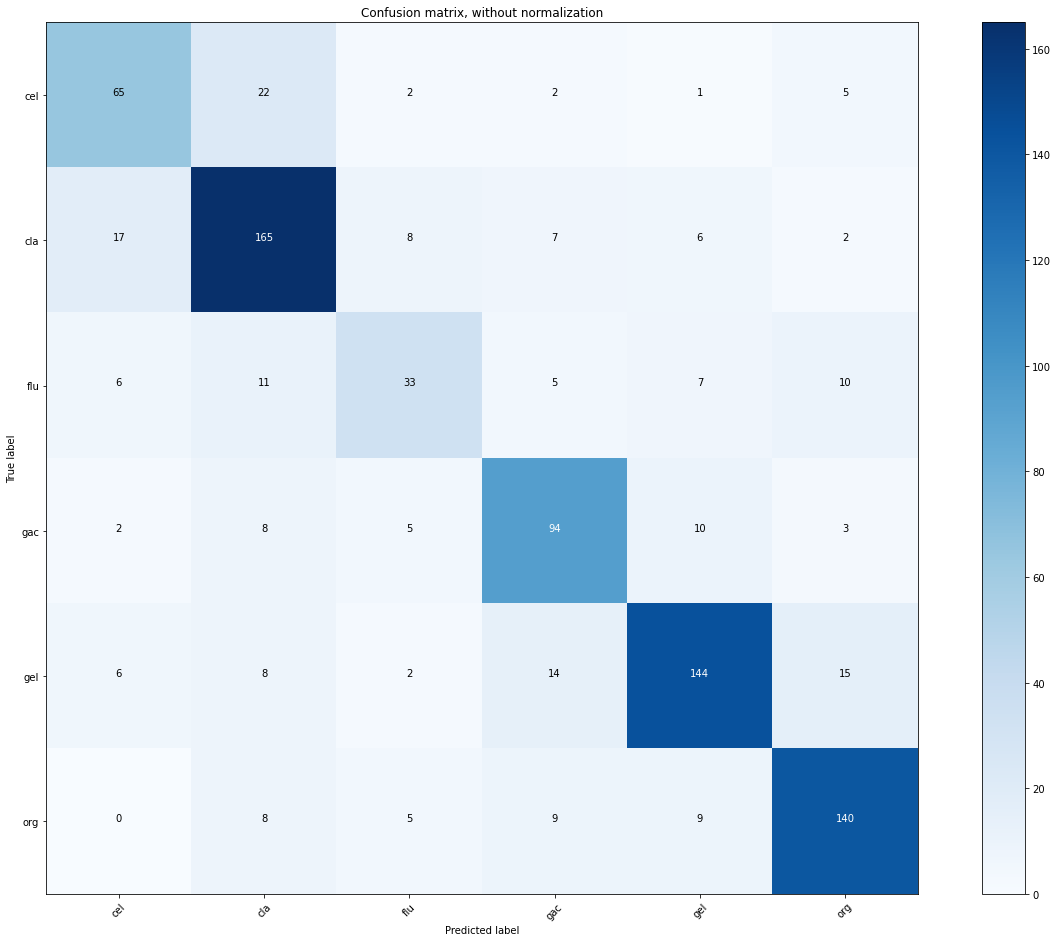

In [77]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [96]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

In [97]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['org' 'gac' 'cla' 'gel' 'flu' 'gac' 'gac' 'org' 'cel' 'gel' 'gel' 'gac'
 'flu' 'gel' 'org' 'flu' 'cel' 'cla' 'cla' 'cel' 'flu' 'gel' 'org' 'cla'
 'gel' 'org' 'gel' 'gac' 'gac' 'flu' 'cla' 'cel' 'cla' 'cla' 'cel' 'gel'
 'cla' 'org' 'flu' 'gel' 'org' 'gel' 'flu' 'gel' 'cel' 'cel' 'cel' 'gac'
 'cla' 'gel' 'org' 'flu' 'cel' 'gac' 'gel' 'cla' 'flu' 'org' 'cla' 'cel'
 'flu' 'gac' 'flu' 'org' 'gel' 'org' 'cel' 'cel' 'org' 'gel' 'cla' 'flu'
 'flu' 'flu' 'cla' 'cel' 'cla' 'cel' 'flu' 'gac' 'gac' 'flu' 'org' 'org'
 'cla' 'flu' 'gel' 'flu' 'gel' 'org' 'org' 'gac' 'flu' 'gac' 'cla' 'flu'
 'flu' 'flu' 'flu' 'gel' 'flu' 'org' 'gel' 'gel' 'cel' 'cel' 'gel' 'cla'
 'cla' 'gel' 'gac' 'cla' 'flu' 'gel' 'flu' 'gel' 'gac' 'cel' 'flu' 'cla'
 'gel' 'cel' 'cla' 'cla' 'gel' 'gel' 'cel' 'gac' 'cla' 'org' 'gac' 'gel'
 'cel' 'cla' 'gac' 'cla' 'flu' 'org' 'gac' 'flu' 'org' 'cel' 'gac' 'cla'
 'gel' 'cla' 'gel' 'gel' 'cel' 'cla' 'cel' 'gel' 'gel' 'org' 'gel' 'flu'
 'cel' 'cel' 'cel' 'cel' 'gac' 'flu' 'cel' 'org' 'f